1. Download and plot 3 apparently related sets of data with at least. Each set should contain at least two related variables. You should explain *how* variables in each set of data are related. Plot each set using the scatter plot function *and* the line graph function. For example, you might the obseved rate of unemployement and the natural rate of unemployment in the same graph. To find data, search for data at FRED and use the code associated with the data. For example, the [CPI measure that includes urban items](https://fred.stlouisfed.org/series/CPIAUCSL) is identified by the code, *CPIAUCSL*.

2. Create a correlation matrix for quarterly observations of Nominal GDP, Real GDP, the Price Level (CPI or GDP Deflator), the quantity of currency in circulation and the federal funds rate for as large of a date range as possible. Then, calculate the year-over-year percent change for each each variable and save the results as variables in the same dataframe. Create a correlation matrix for these new variables.

How has the correlation between each variable changed? Why do you think the correlation changes after calculate the year-over-year percent change?

In [1]:
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader.data as web
import datetime
from stats import *

def gather_data(data_codes, 
                start, 
                end = datetime.datetime.today(), 
                freq = "M"):
    i = 0
    # dct.items() calls key and value that key points to
    for key, val in data_codes.items():
        if i == 0:
            # Create dataframe for first variable, then rename column
            df = web.DataReader(
                val, "fred", start, end).resample(freq).mean()
            df.rename(columns = {val:key}, inplace = True) 
            # setting i to None will cause the next block of code to execute,
            # placing data within df instead of creating a new dataframe for
            # each variable
            i = None
        else:
            # If dataframe already exists, add new column
            df[key] = web.DataReader(val, "fred", start, end).resample(freq).mean()

    return df

def gather_statistics(df, sample = False):
    dct = {key:{} for key in df}
    for key, val in df.items():
        # drop any missing observations from dataframe
        val = val.dropna(axis=0)
        dct[key]["mean"] = round(mean(val),3)
        dct[key]["median"] = round(median(val),3)
        # skip mode. . .         dct[key]["mode"] = mode(val)
        dct[key]["variance"] = round(variance(val, sample),3)
        dct[key]["S.D."] = round(SD(val, sample) ,3)
        dct[key]["skewness"] = round(skewness(val, sample),3)
        dct[key]["kurtosis"] = round(kurtosis(val, sample),3)
    stats_df = pd.DataFrame(dct)
    return stats_df

def plot_lines(df, 
               linewidth = 1, 
               figsize = (40,20),
               secondary_y = None, 
               legend=True, 
               pp = None, 
               save_fig = False):
    
    fig, ax = plt.subplots(figsize = figsize)    
    # If no secondary_y (axis), plot all variables at once
    df.dropna(axis = 0, how = "all").plot.line(
        linewidth = linewidth, 
        ax = ax, 
        secondary_y=secondary_y, 
        legend = legend)
    # Turn the text on the x-axis so that it reads vertically
    ax.tick_params(axis='x', rotation=90)
    # Get rid of tick lines perpendicular to the axis for aesthetic
    ax.tick_params('both', length=0, which='both')
    # transform y-axis values from sci notation to integers
    vals = ax.get_yticks()
    ax.set_yticklabels([round(x,2) for x in vals])
    
def color_dim_scatter(data):  
    # function uses color as dimension in scatter plot  
    for key1 in data:  
        for key2 in data:  
            # do not use same variable for x and y dimension  
            for key3 in data:  
                    # do not create visualization if key1 or key2  
                    # equals key3  
                    if key1 != key2 and key1 != key3 and key2 != key3:  
                        print(key1,key2,key3)
                        # Choose figure size and save ax as object  
                        fig, ax = plt.subplots(figsize = (20, 20))  
                        # each point represents an observation with 3 different  
                        # values: key1 on the horiz ax, key2 on the vert ax,   
                        # and key3 as color  
                        data.plot.scatter(x = key1, y = key2, c = key3, s = 50,  
                                          alpha = .7, colormap = "viridis",  
                                          ax = ax)  
                        # Make values on x-axis vertical  
                        plt.xticks(rotation = 90)  
                        # Remove tick lines  
                        plt.setp(ax.get_xticklines(), visible = False)  
                        plt.setp(ax.get_yticklines(), visible = False)      

In [19]:
data_codes = {"Unemployment Rate":"UNRATE",
             "Noncyclical Rate of Unemployment":"NROU",
             "CPI": "CPIAUCSL",
             "Nonfarm Hires": "JTSHIL",
             "Real Disposable Personal Income": "DSPIC96"}
start = datetime.datetime(2002, 1, 1)

data = gather_data(data_codes = data_codes,
                  start = start,
                  end = datetime.datetime.today(),
                  freq = "Q")
data

Unemployment Rate  Noncyclical Rate of Unemployment         CPI  \
DATE                                                                          
2002-03-31           5.700000                          5.140615  178.066667   
2002-06-30           5.833333                          5.129905  179.466667   
2002-09-30           5.733333                          5.119209  180.433333   
2002-12-31           5.866667                          5.108562  181.500000   
2003-03-31           5.866667                          5.097990  183.366667   
...                       ...                               ...         ...   
2022-03-31           3.800000                          4.445137  284.893667   
2022-06-30           3.600000                          4.440214  291.535667   
2022-09-30           3.566667                          4.435784  295.495667   
2022-12-31           3.600000                          4.431760  298.525000   
2023-03-31           3.400000                          4.428064  300.536000   

            Nonfarm Hires  Real Disposable Personal Income  
DATE                                                        
2002-03-31    4787.333333                      9963.933333  
2002-06-30    4884.666667                     10044.533333  
2002-09-30    4898.666667                     10059.466667  
2002-12-31    4827.666667                     10123.400000  
2003-03-31    4747.333333                     10117.566667  
...                   ...                              ...  
2022-03-31    6634.333333                     15109.133333  
2022-06-30    6496.666667                     15021.566667  
2022-09-30    6222.666667                     15140.666667  
2022-12-31    6103.333333                     15317.833333  
2023-03-31            NaN                     15567.900000  

[85 rows x 5 columns]

Unemployment Rate Noncyclical Rate of Unemployment CPI
Unemployment Rate Noncyclical Rate of Unemployment Nonfarm Hires
Unemployment Rate Noncyclical Rate of Unemployment Real Disposable Personal Income
Unemployment Rate CPI Noncyclical Rate of Unemployment
Unemployment Rate CPI Nonfarm Hires
Unemployment Rate CPI Real Disposable Personal Income
Unemployment Rate Nonfarm Hires Noncyclical Rate of Unemployment
Unemployment Rate Nonfarm Hires CPI
Unemployment Rate Nonfarm Hires Real Disposable Personal Income
Unemployment Rate Real Disposable Personal Income Noncyclical Rate of Unemployment
Unemployment Rate Real Disposable Personal Income CPI
Unemployment Rate Real Disposable Personal Income Nonfarm Hires
Noncyclical Rate of Unemployment Unemployment Rate CPI
Noncyclical Rate of Unemployment Unemployment Rate Nonfarm Hires
Noncyclical Rate of Unemployment Unemployment Rate Real Disposable Personal Income
Noncyclical Rate of Unemployment CPI Unemployment Rate
Noncyclical Rate of Unemploy

C:\Users\Bryce Grabanski\AppData\Local\Temp\ipykernel_11240\743522911.py:81: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize = (20, 20))


Noncyclical Rate of Unemployment Real Disposable Personal Income Nonfarm Hires
CPI Unemployment Rate Noncyclical Rate of Unemployment
CPI Unemployment Rate Nonfarm Hires
CPI Unemployment Rate Real Disposable Personal Income
CPI Noncyclical Rate of Unemployment Unemployment Rate
CPI Noncyclical Rate of Unemployment Nonfarm Hires
CPI Noncyclical Rate of Unemployment Real Disposable Personal Income
CPI Nonfarm Hires Unemployment Rate
CPI Nonfarm Hires Noncyclical Rate of Unemployment
CPI Nonfarm Hires Real Disposable Personal Income
CPI Real Disposable Personal Income Unemployment Rate
CPI Real Disposable Personal Income Noncyclical Rate of Unemployment
CPI Real Disposable Personal Income Nonfarm Hires
Nonfarm Hires Unemployment Rate Noncyclical Rate of Unemployment
Nonfarm Hires Unemployment Rate CPI
Nonfarm Hires Unemployment Rate Real Disposable Personal Income
Nonfarm Hires Noncyclical Rate of Unemployment Unemployment Rate
Nonfarm Hires Noncyclical Rate of Unemployment CPI
Nonfarm Hi

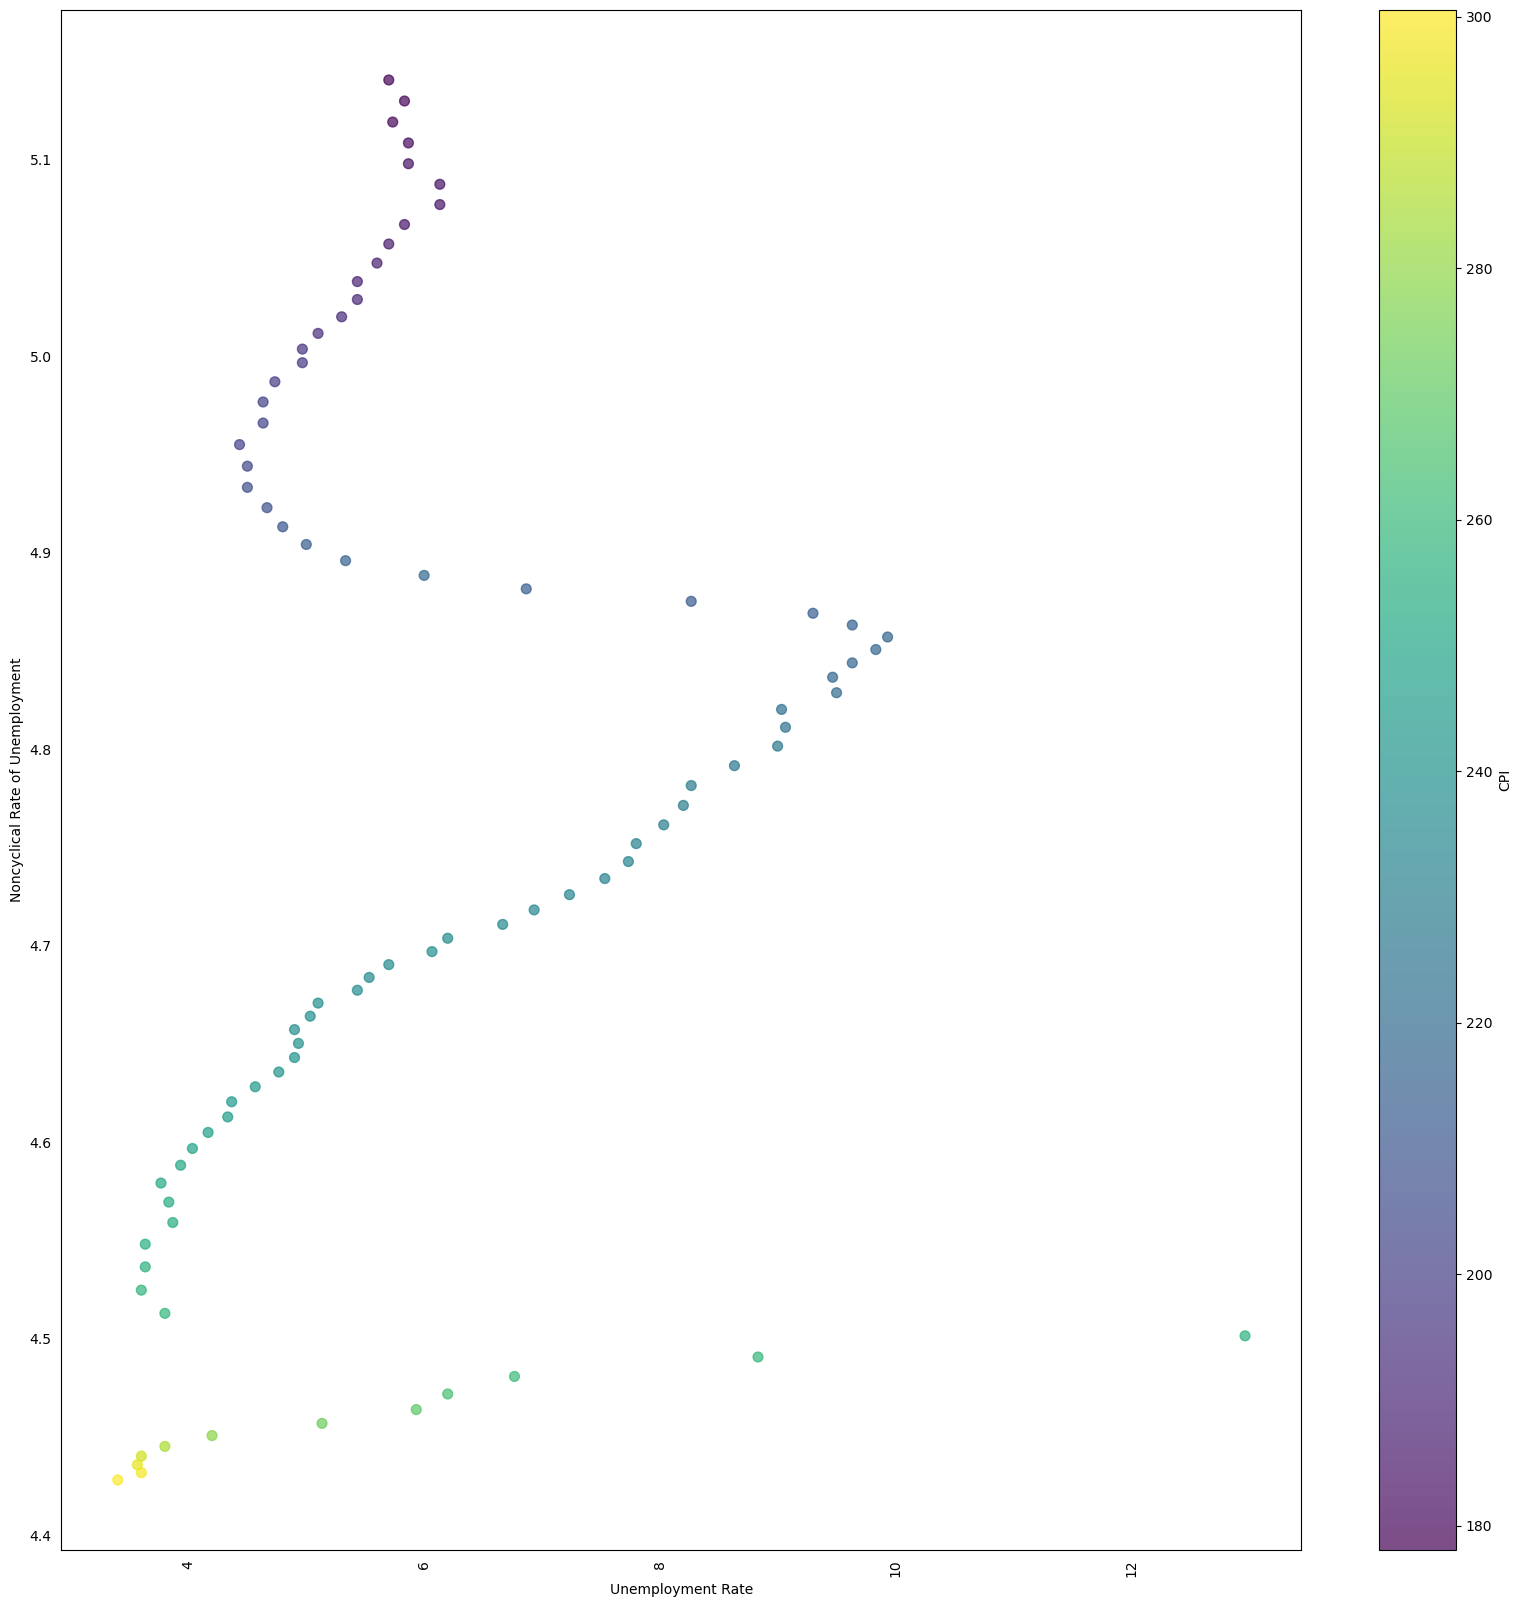

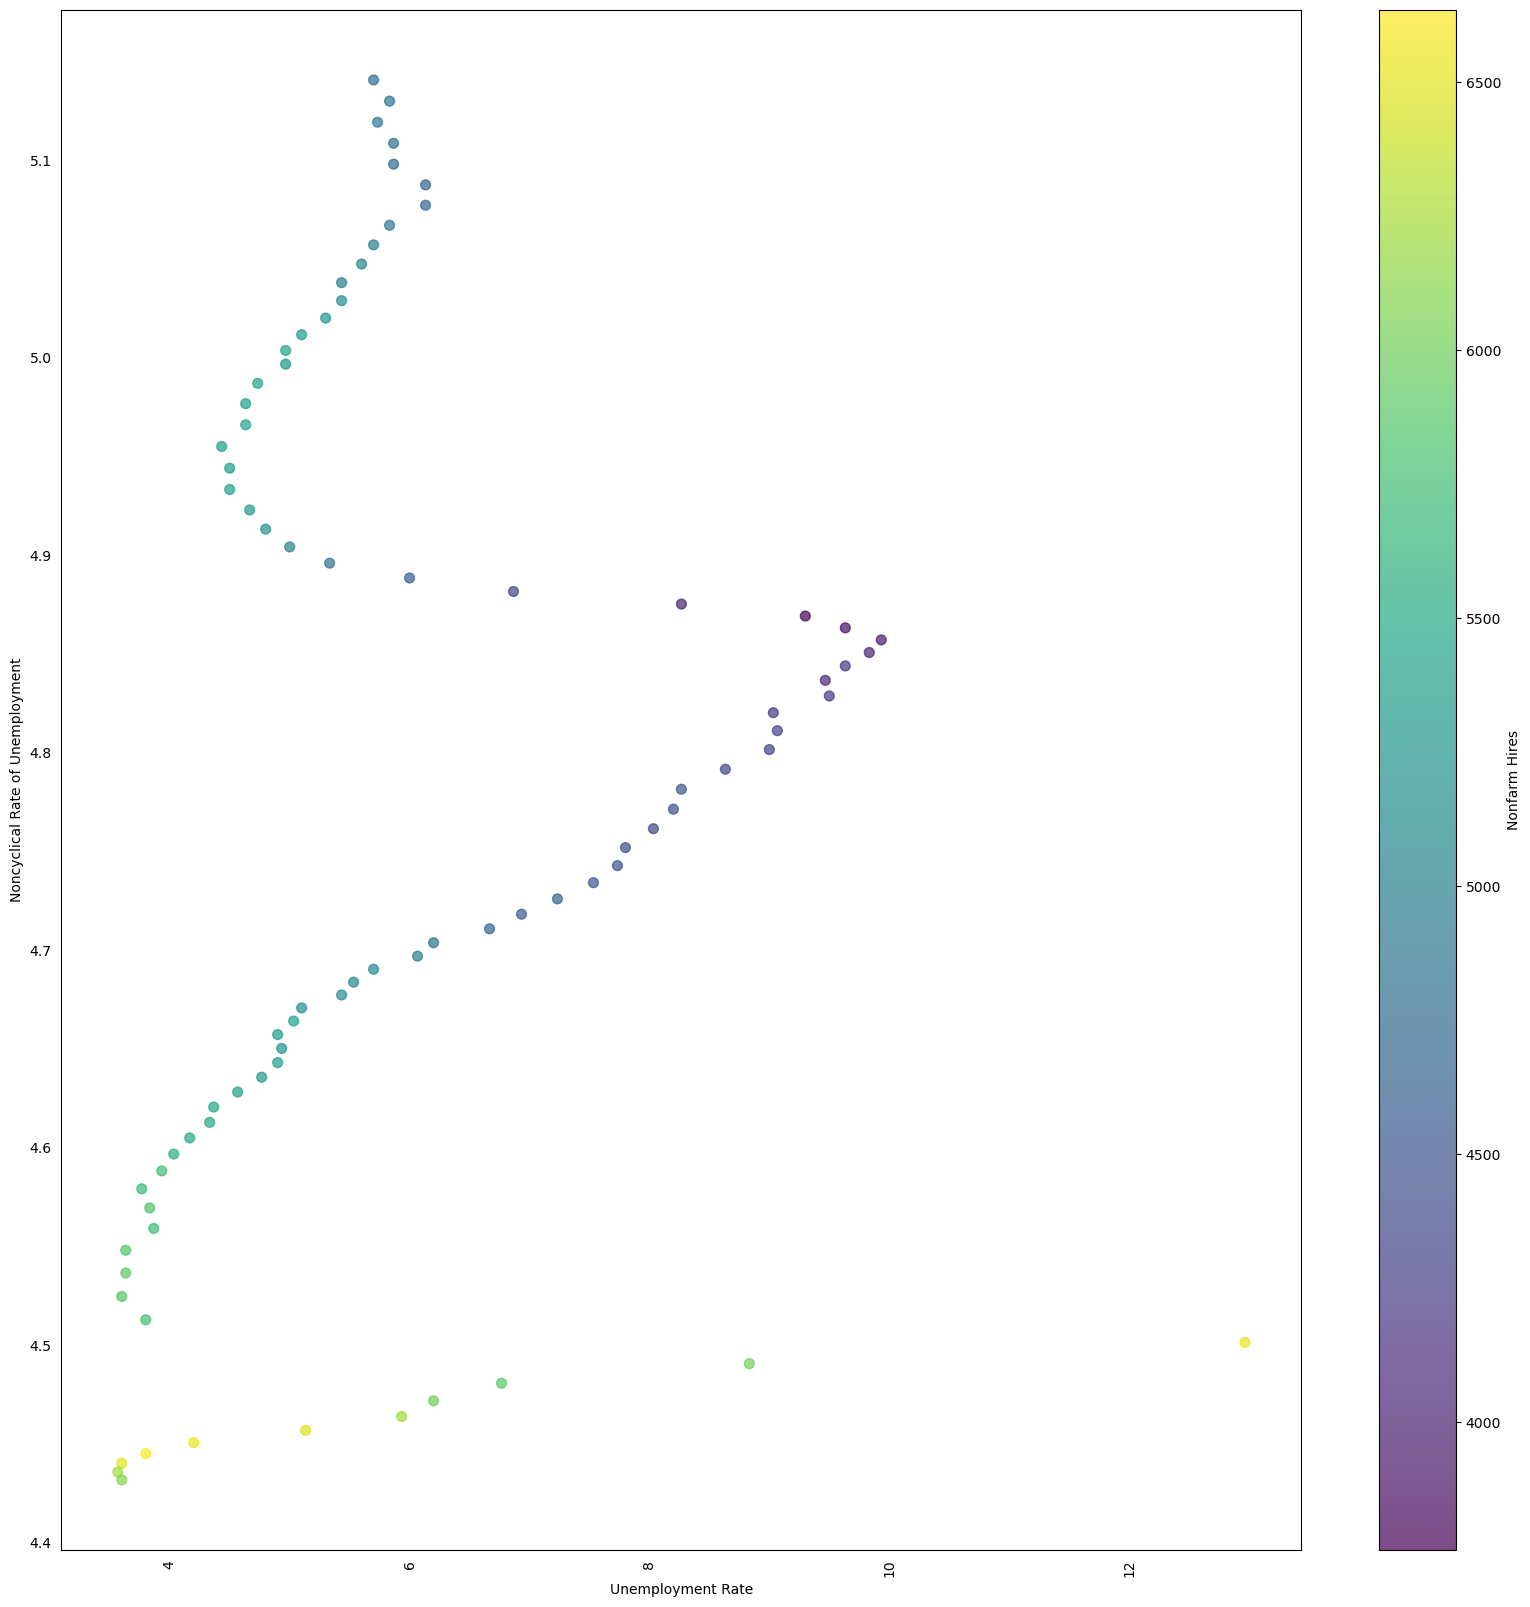

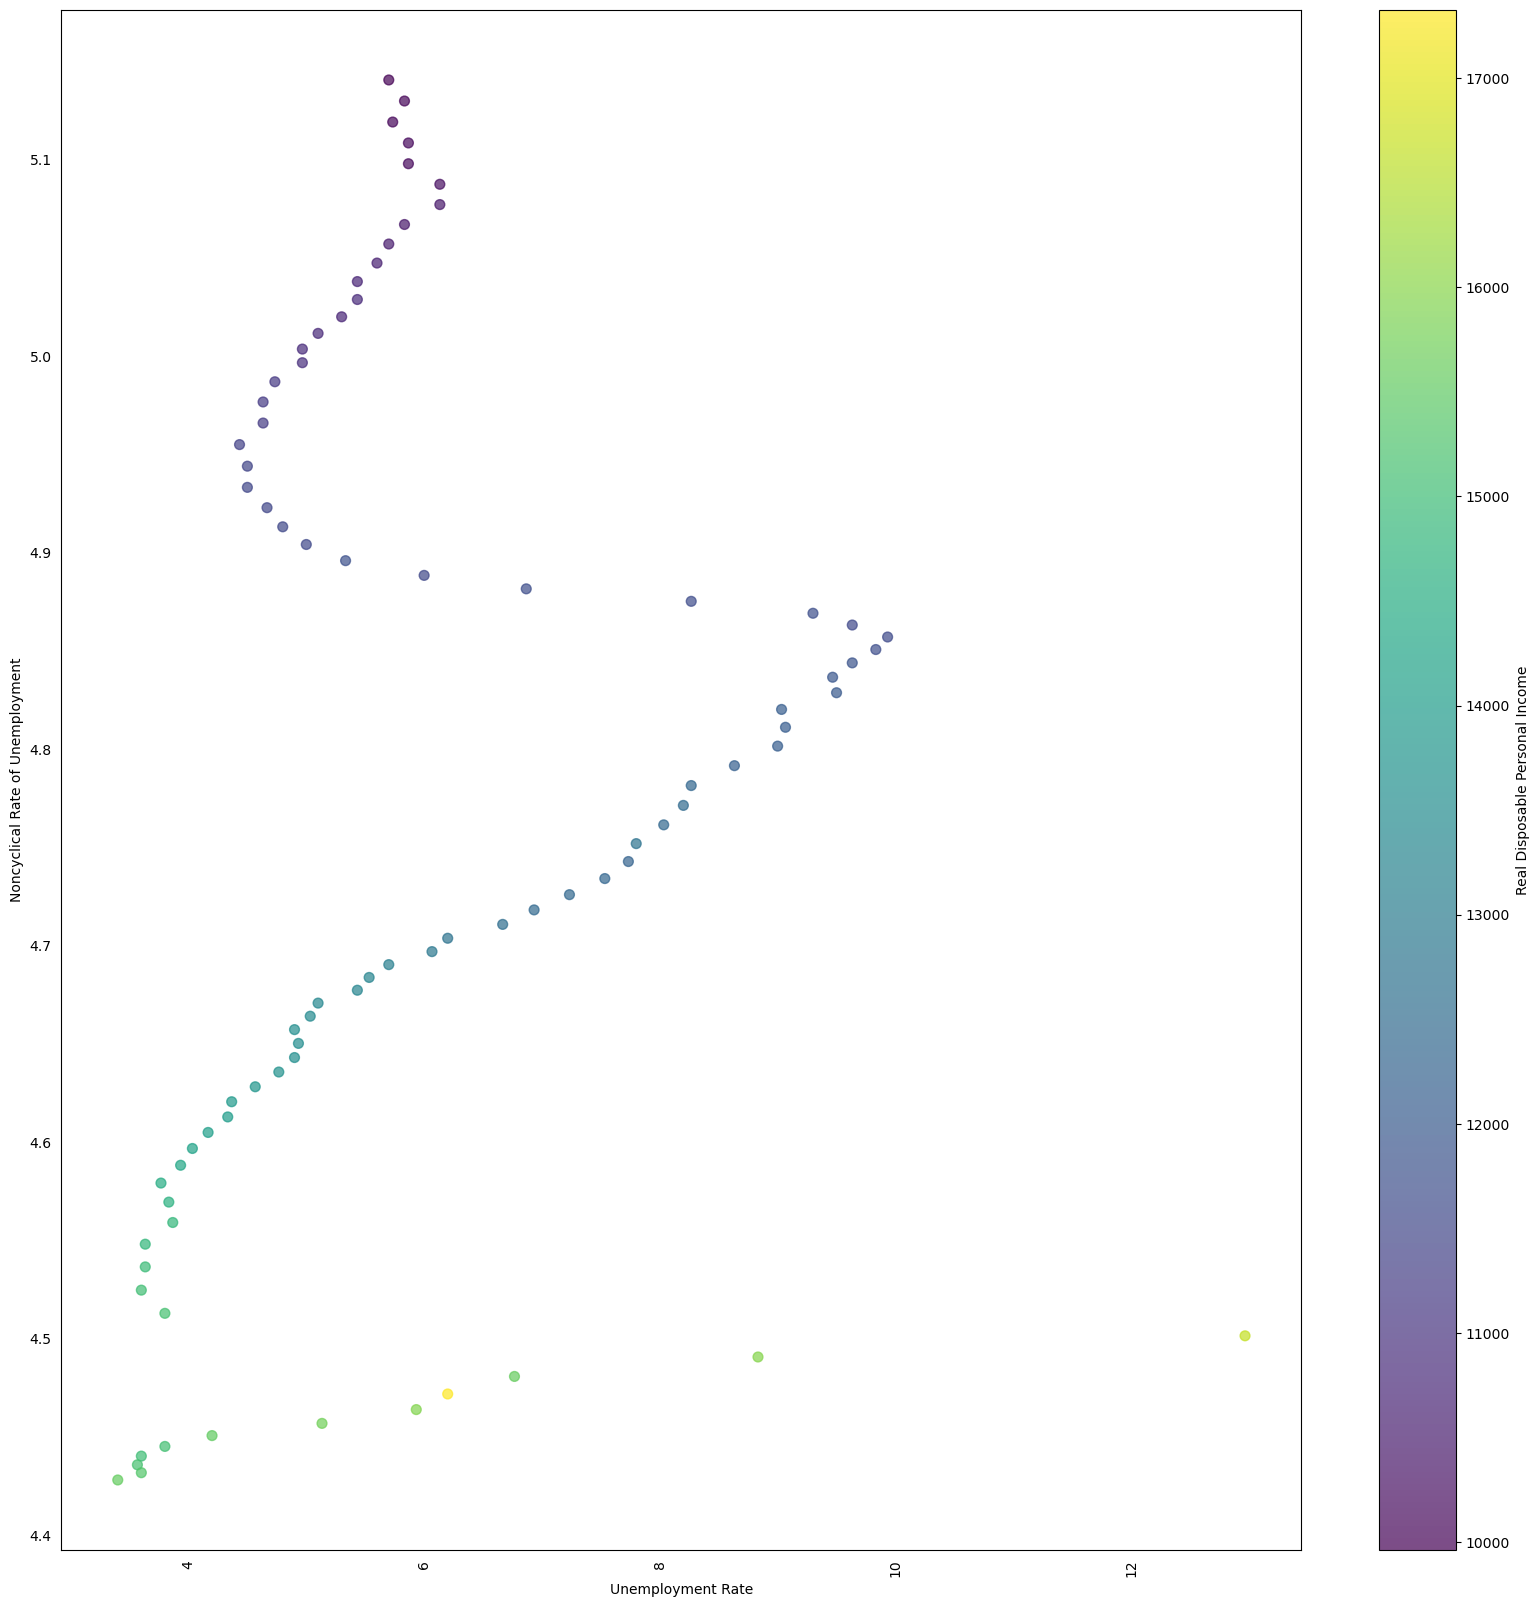

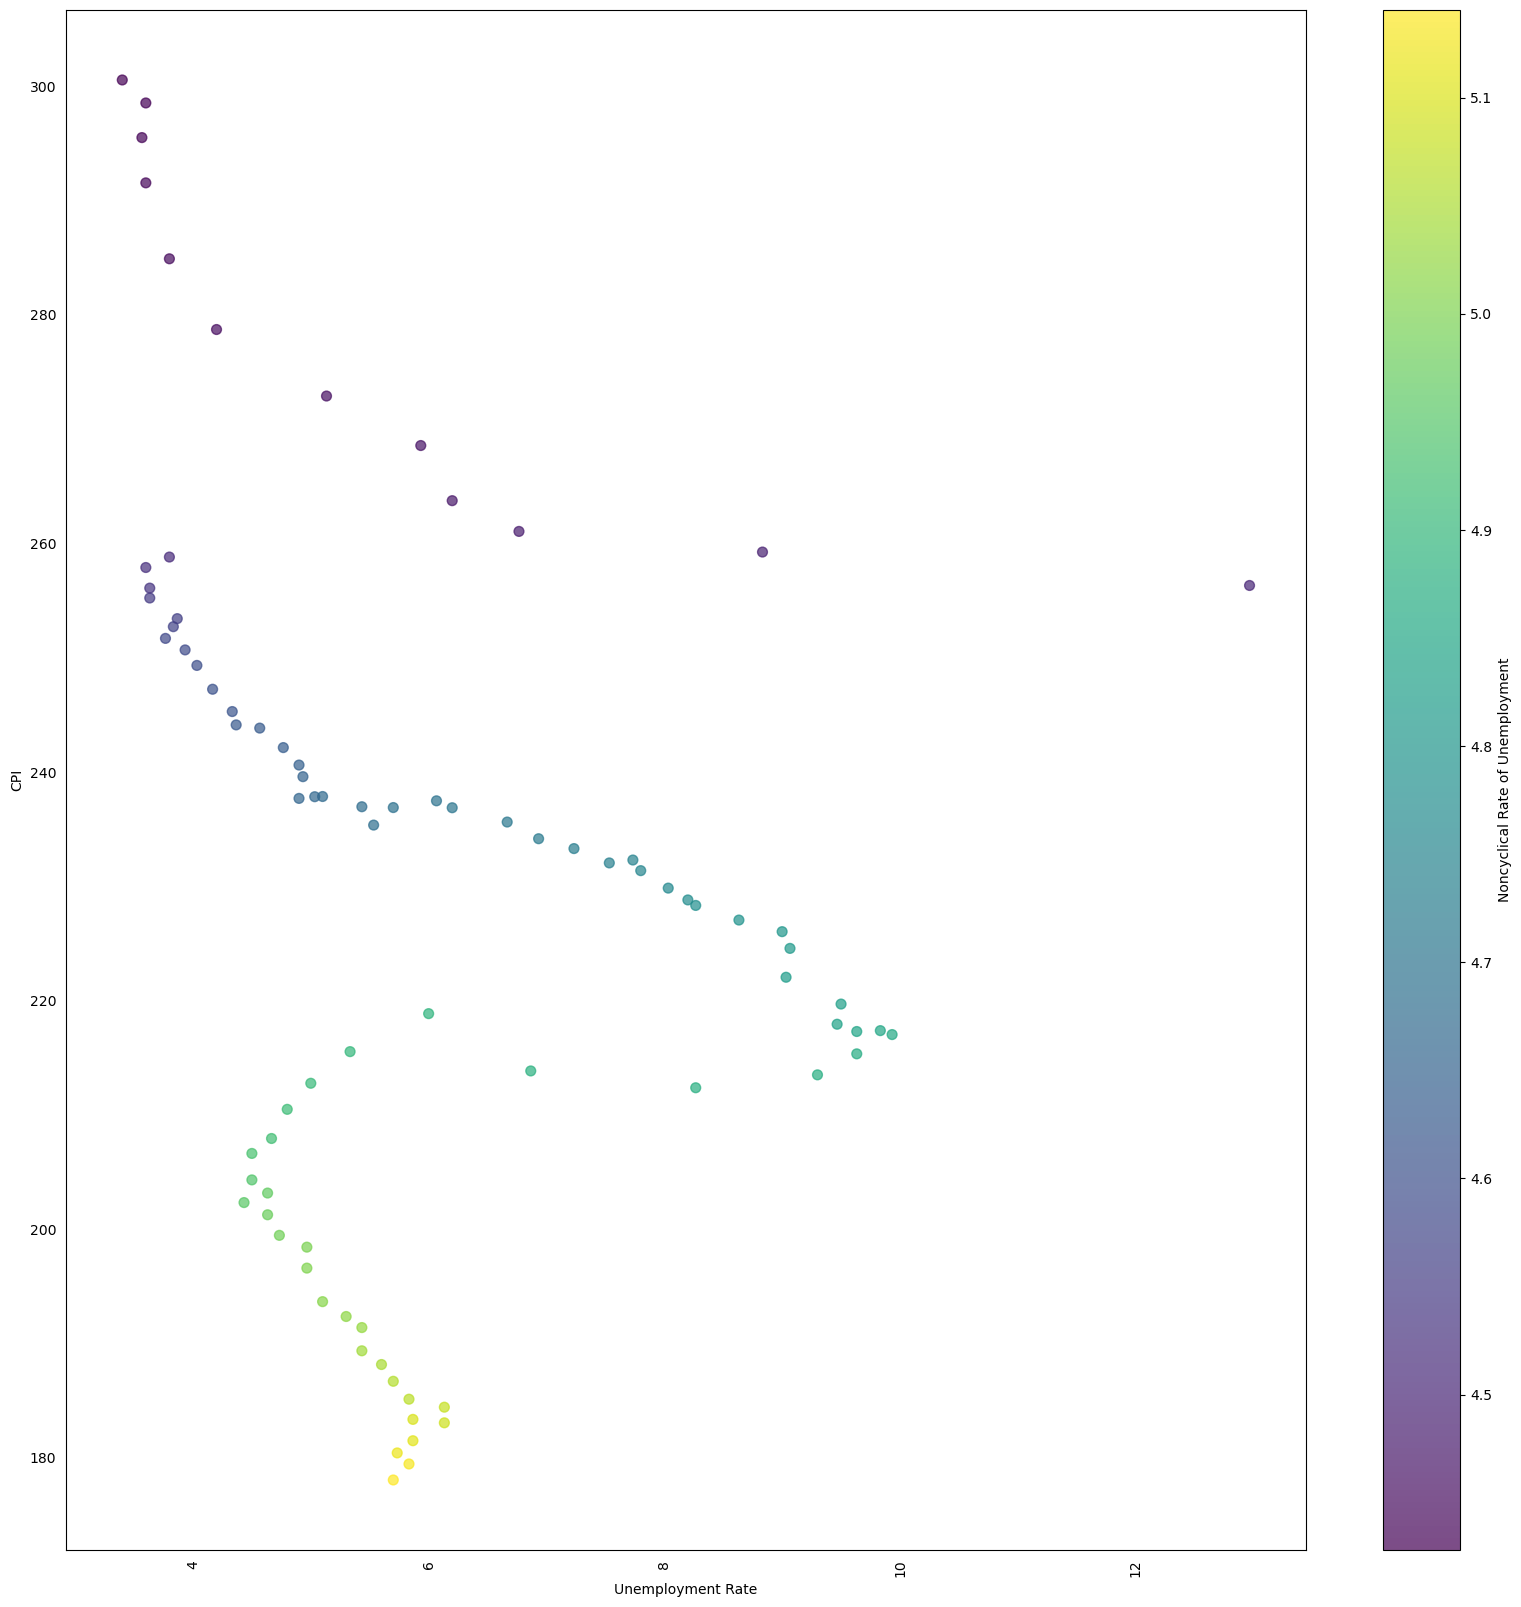

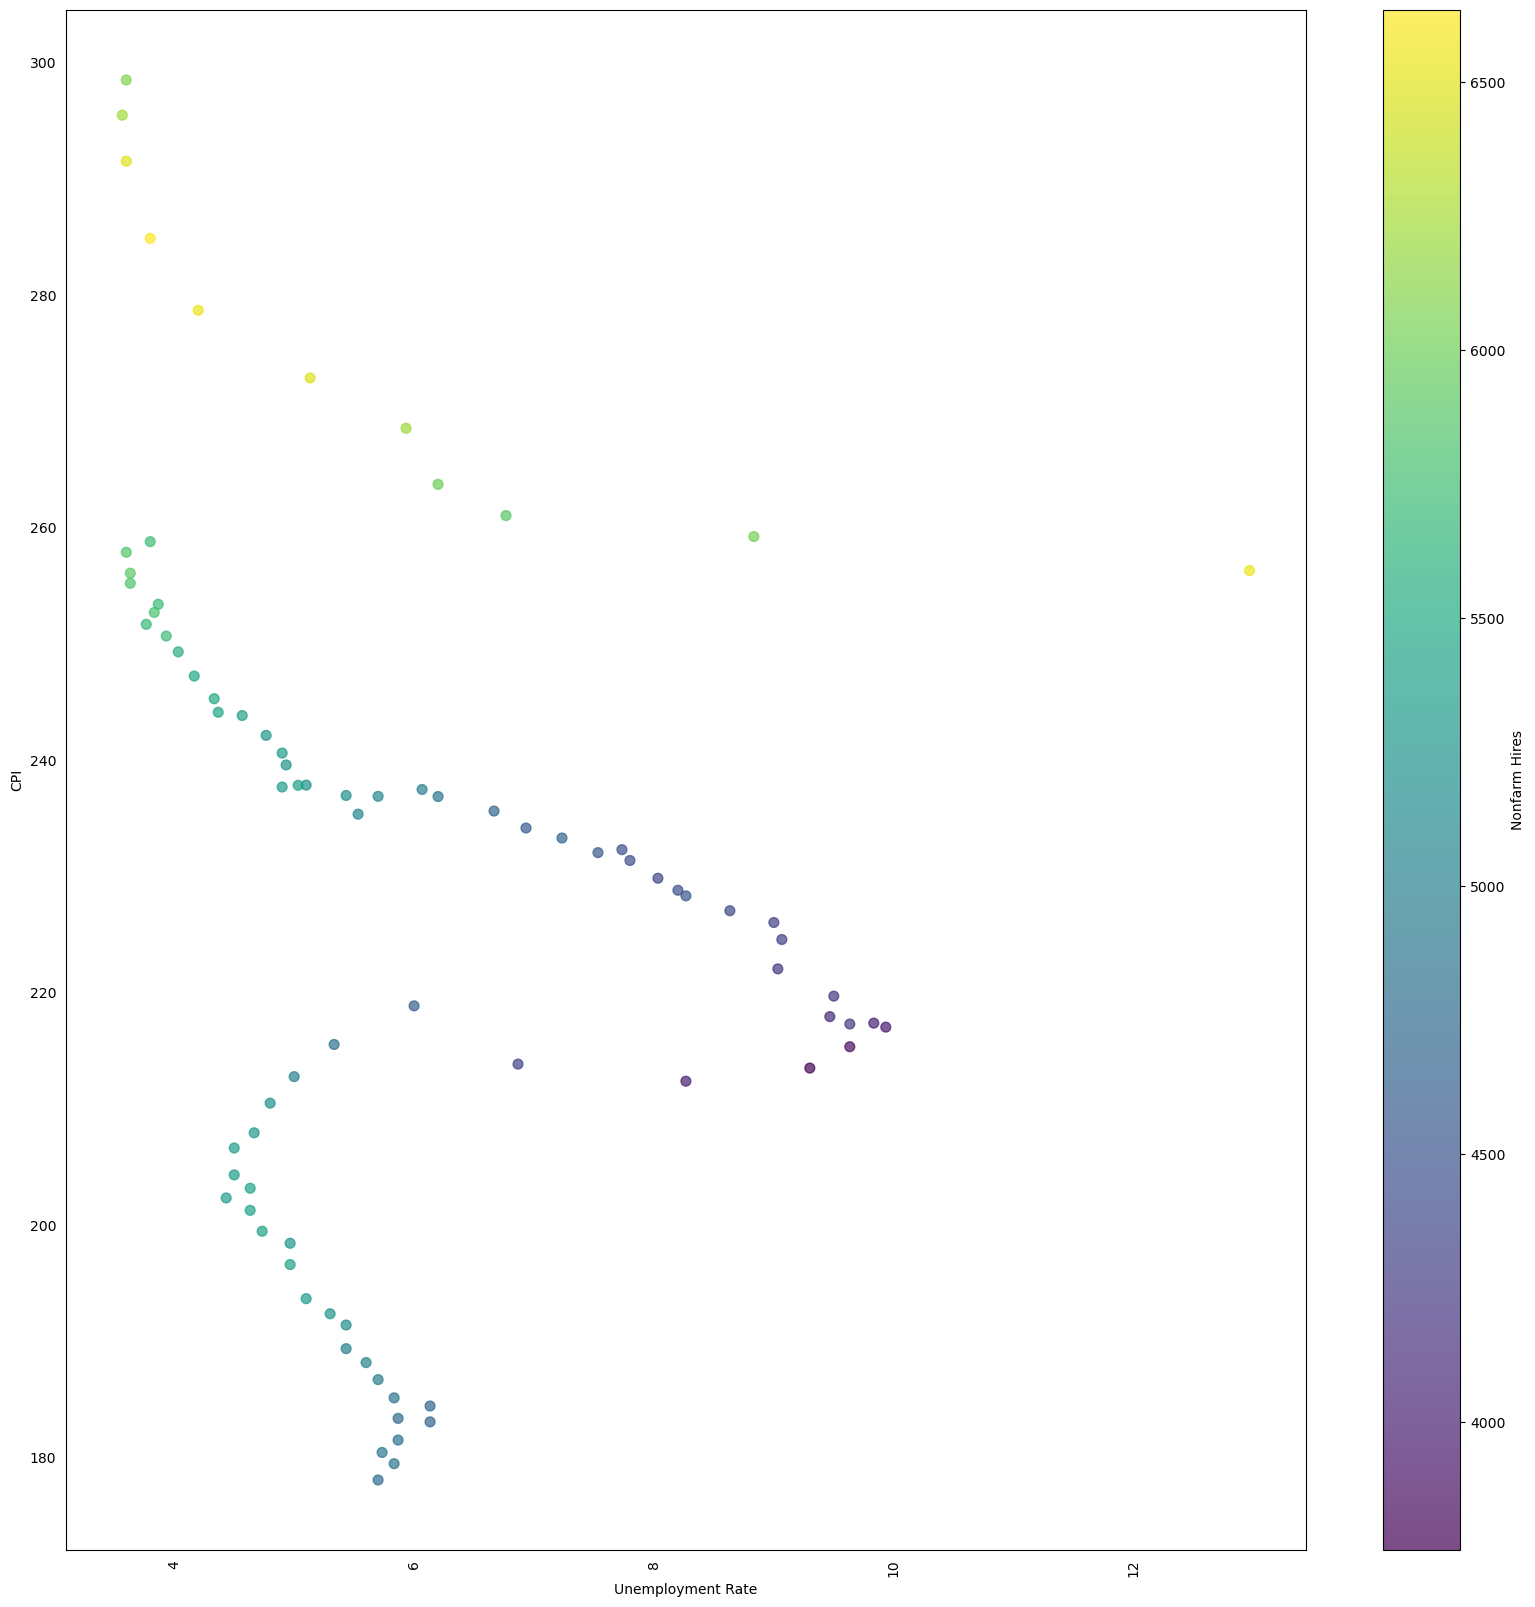

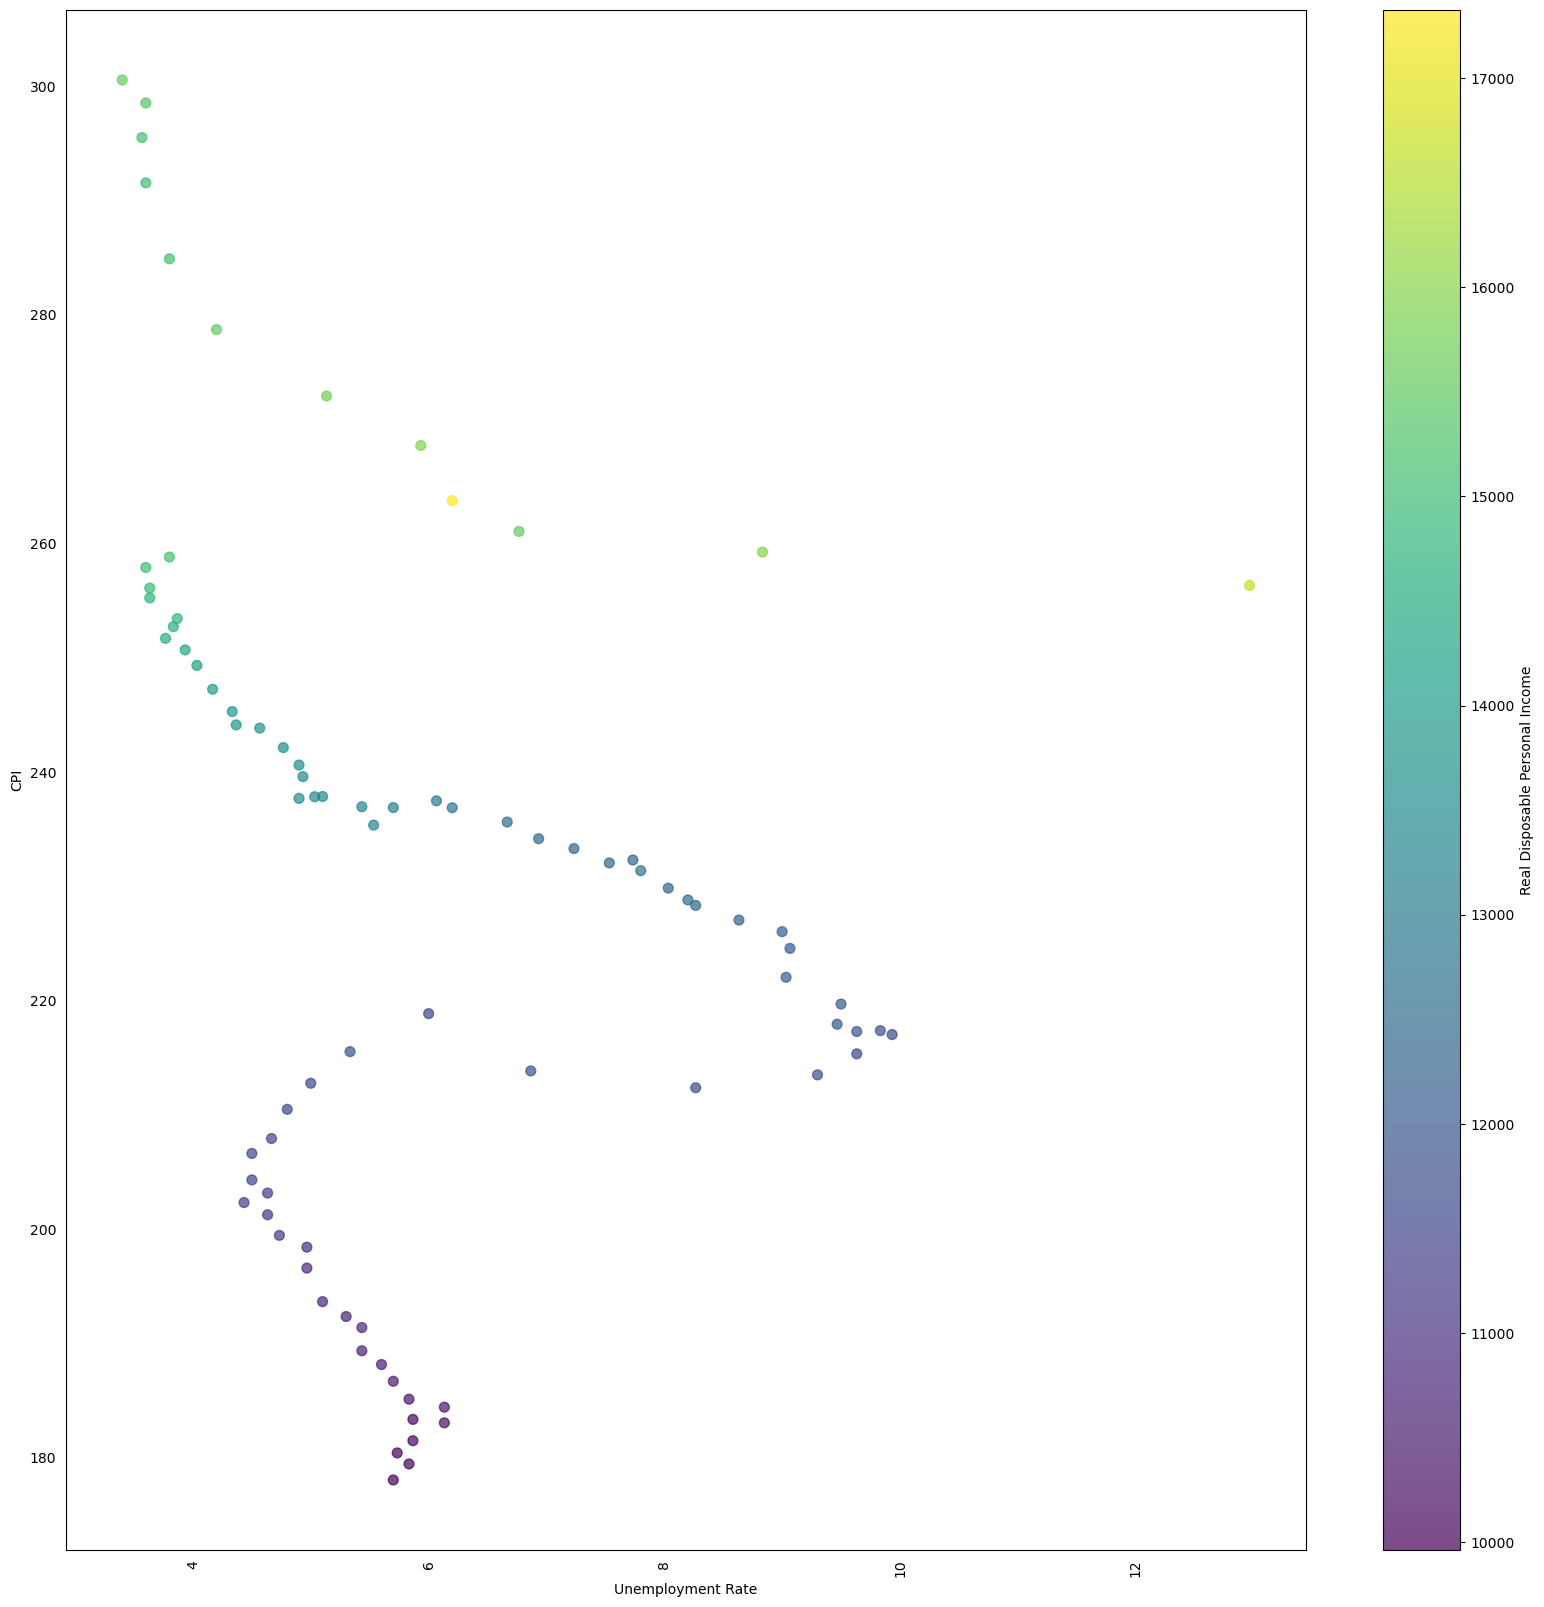

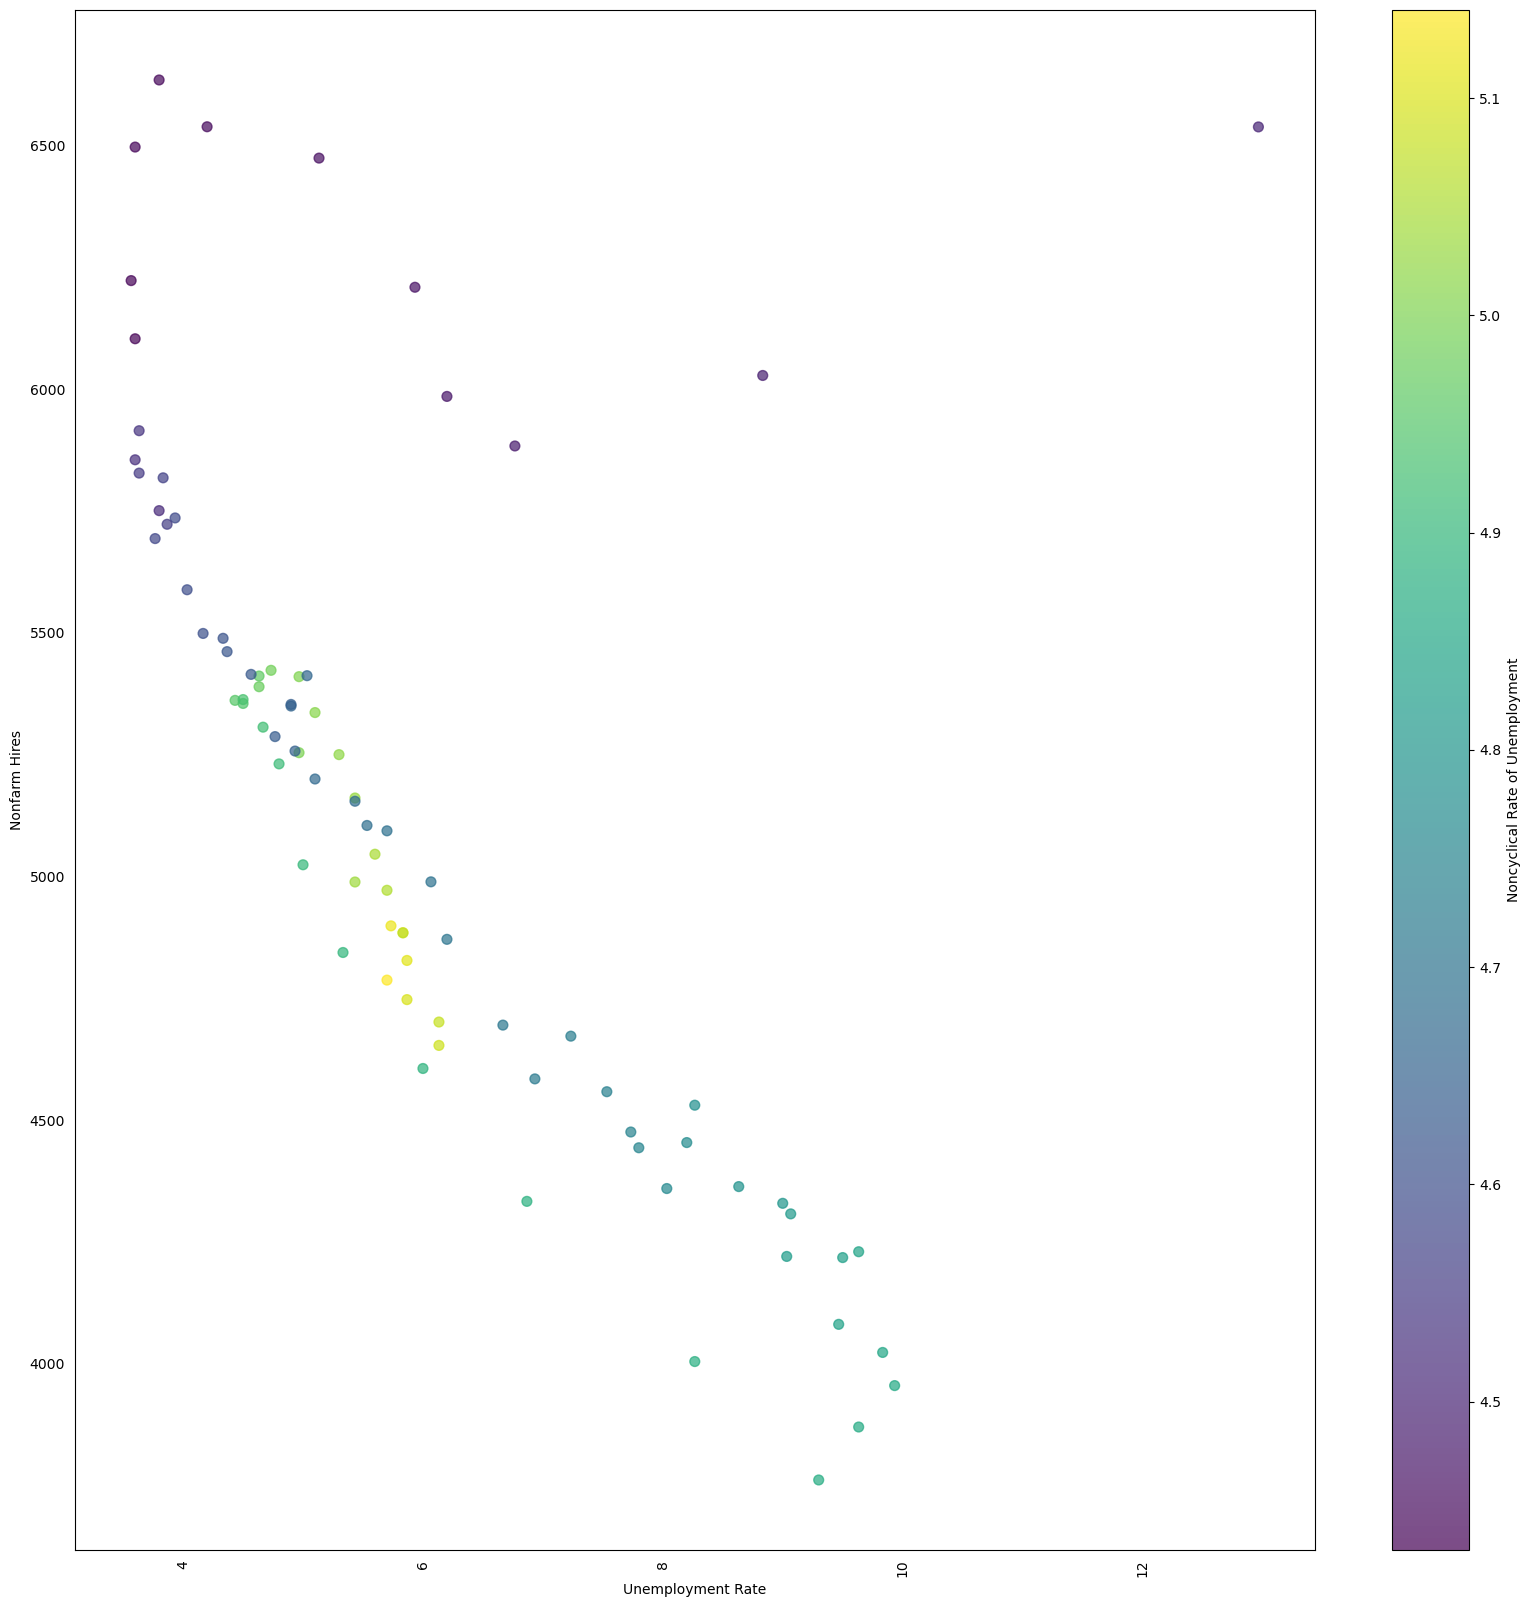

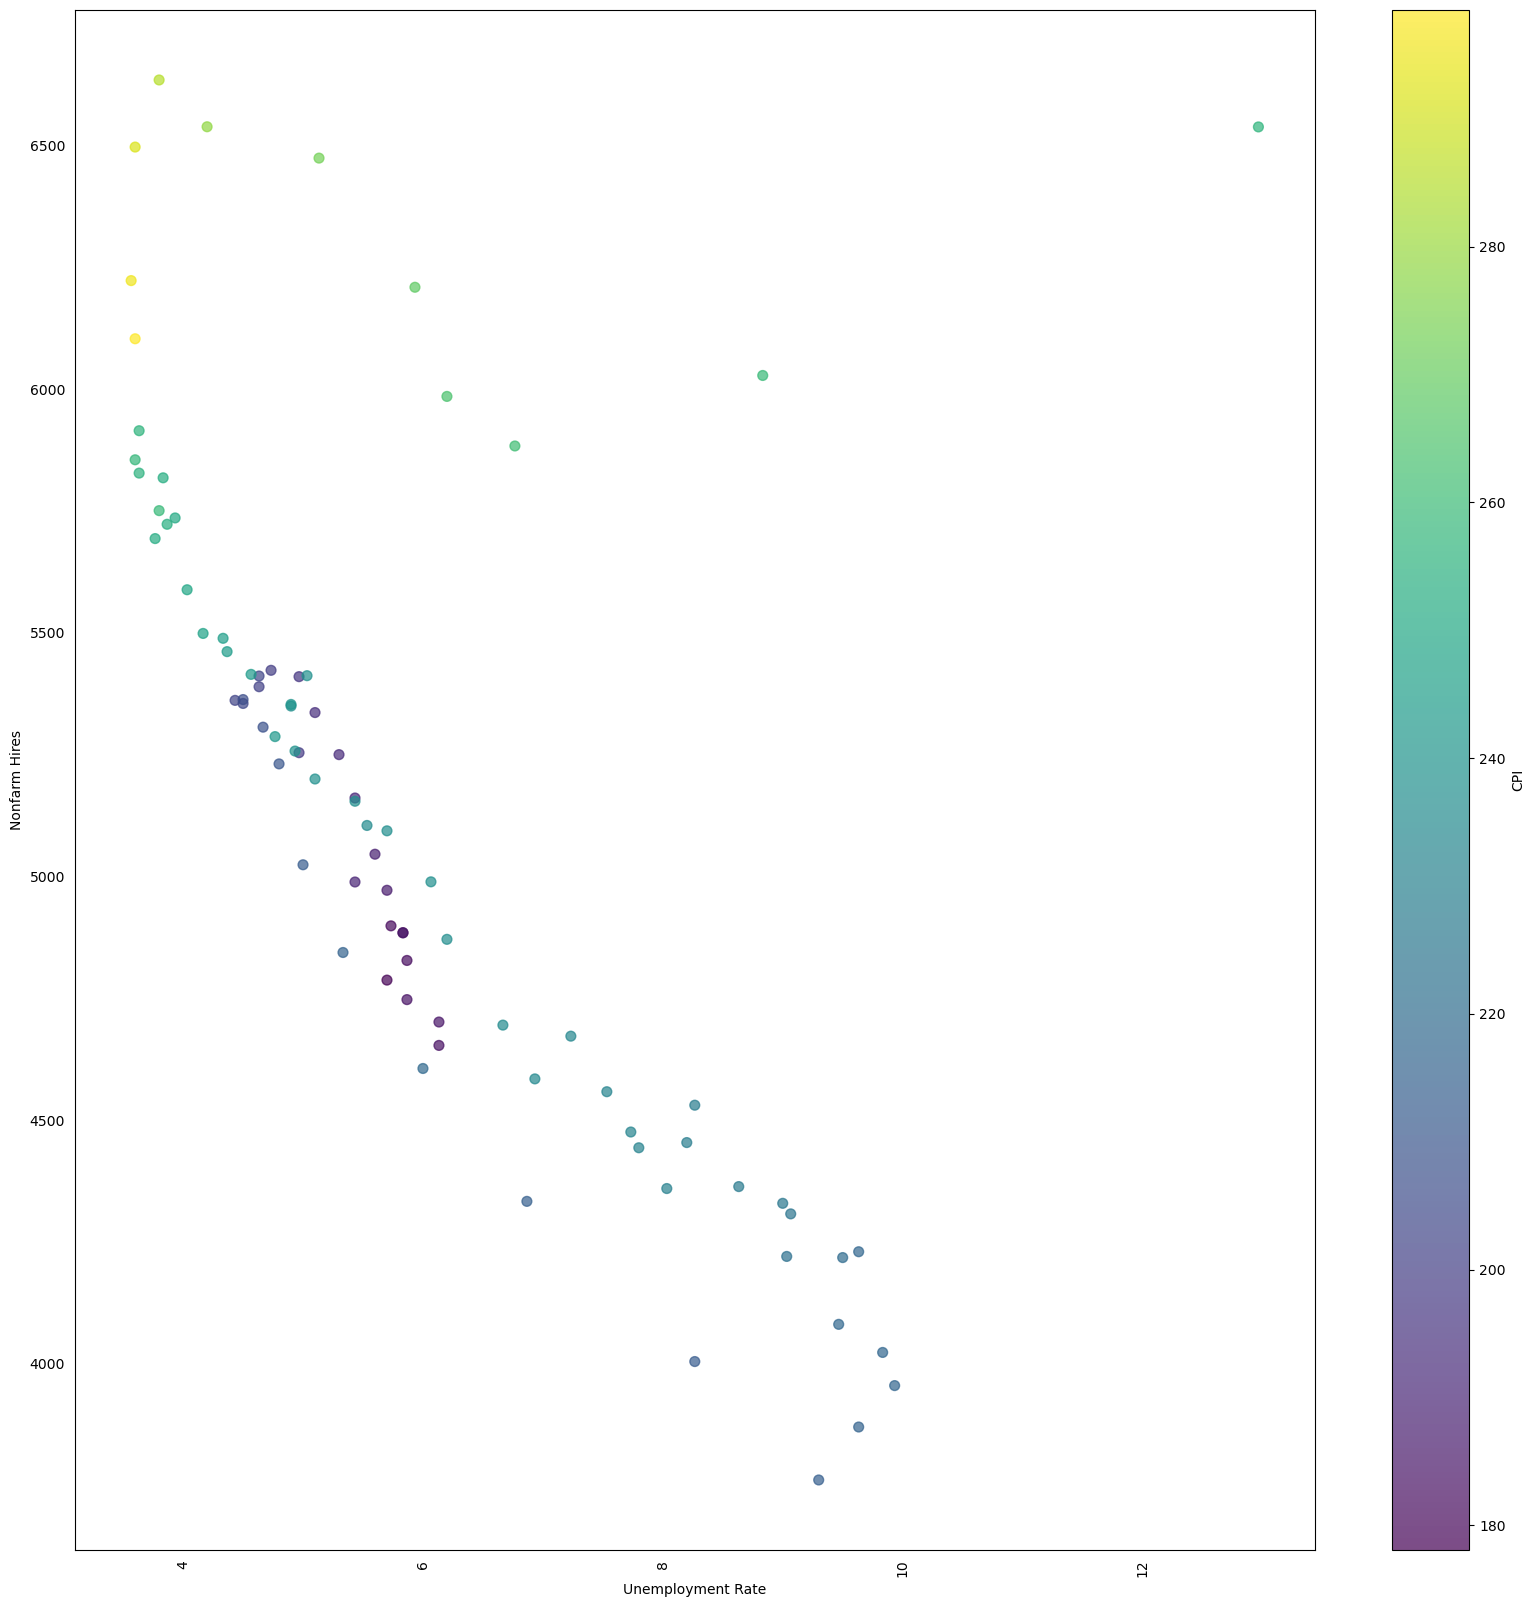

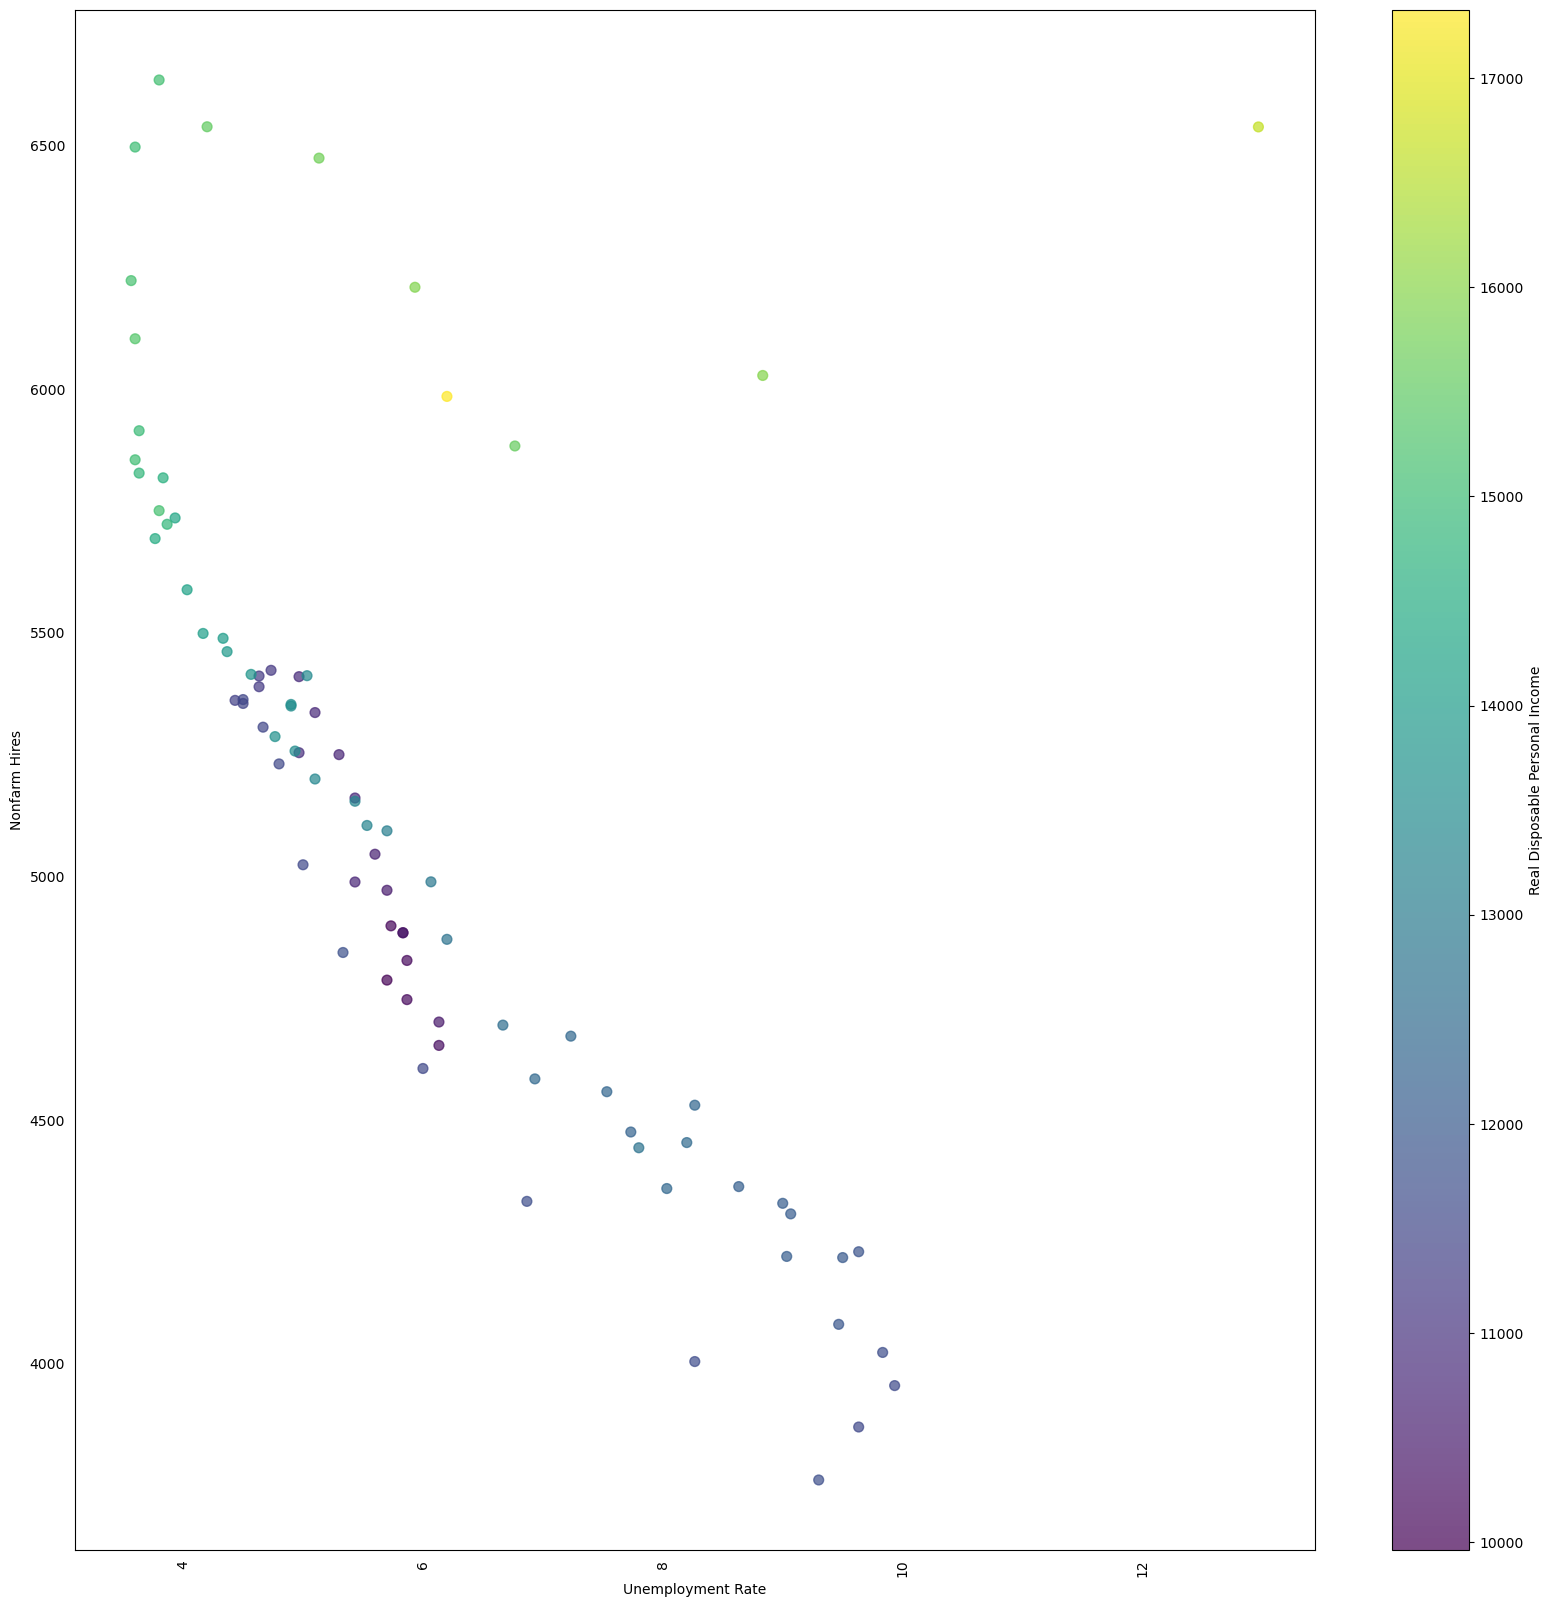

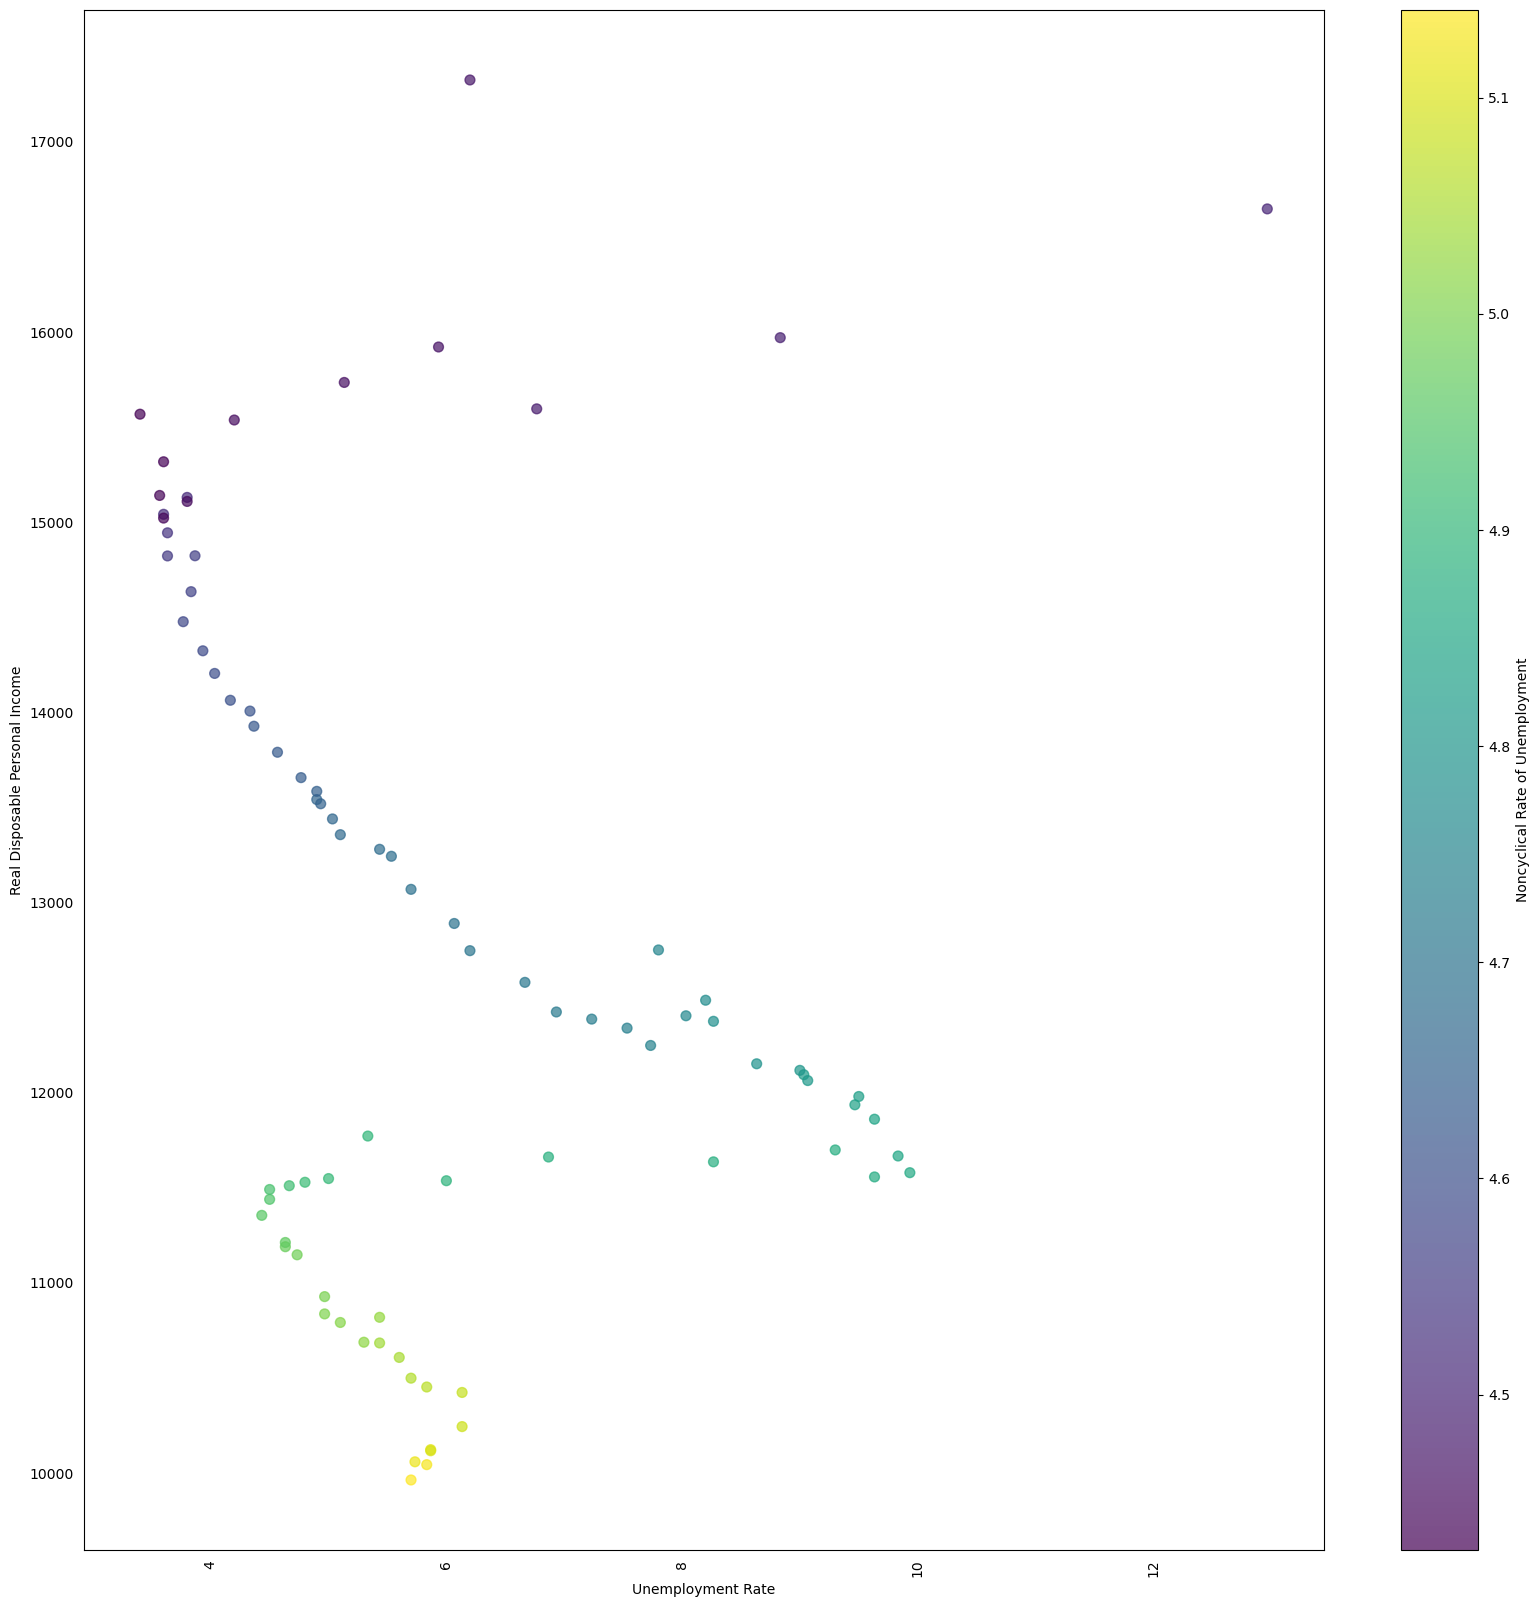

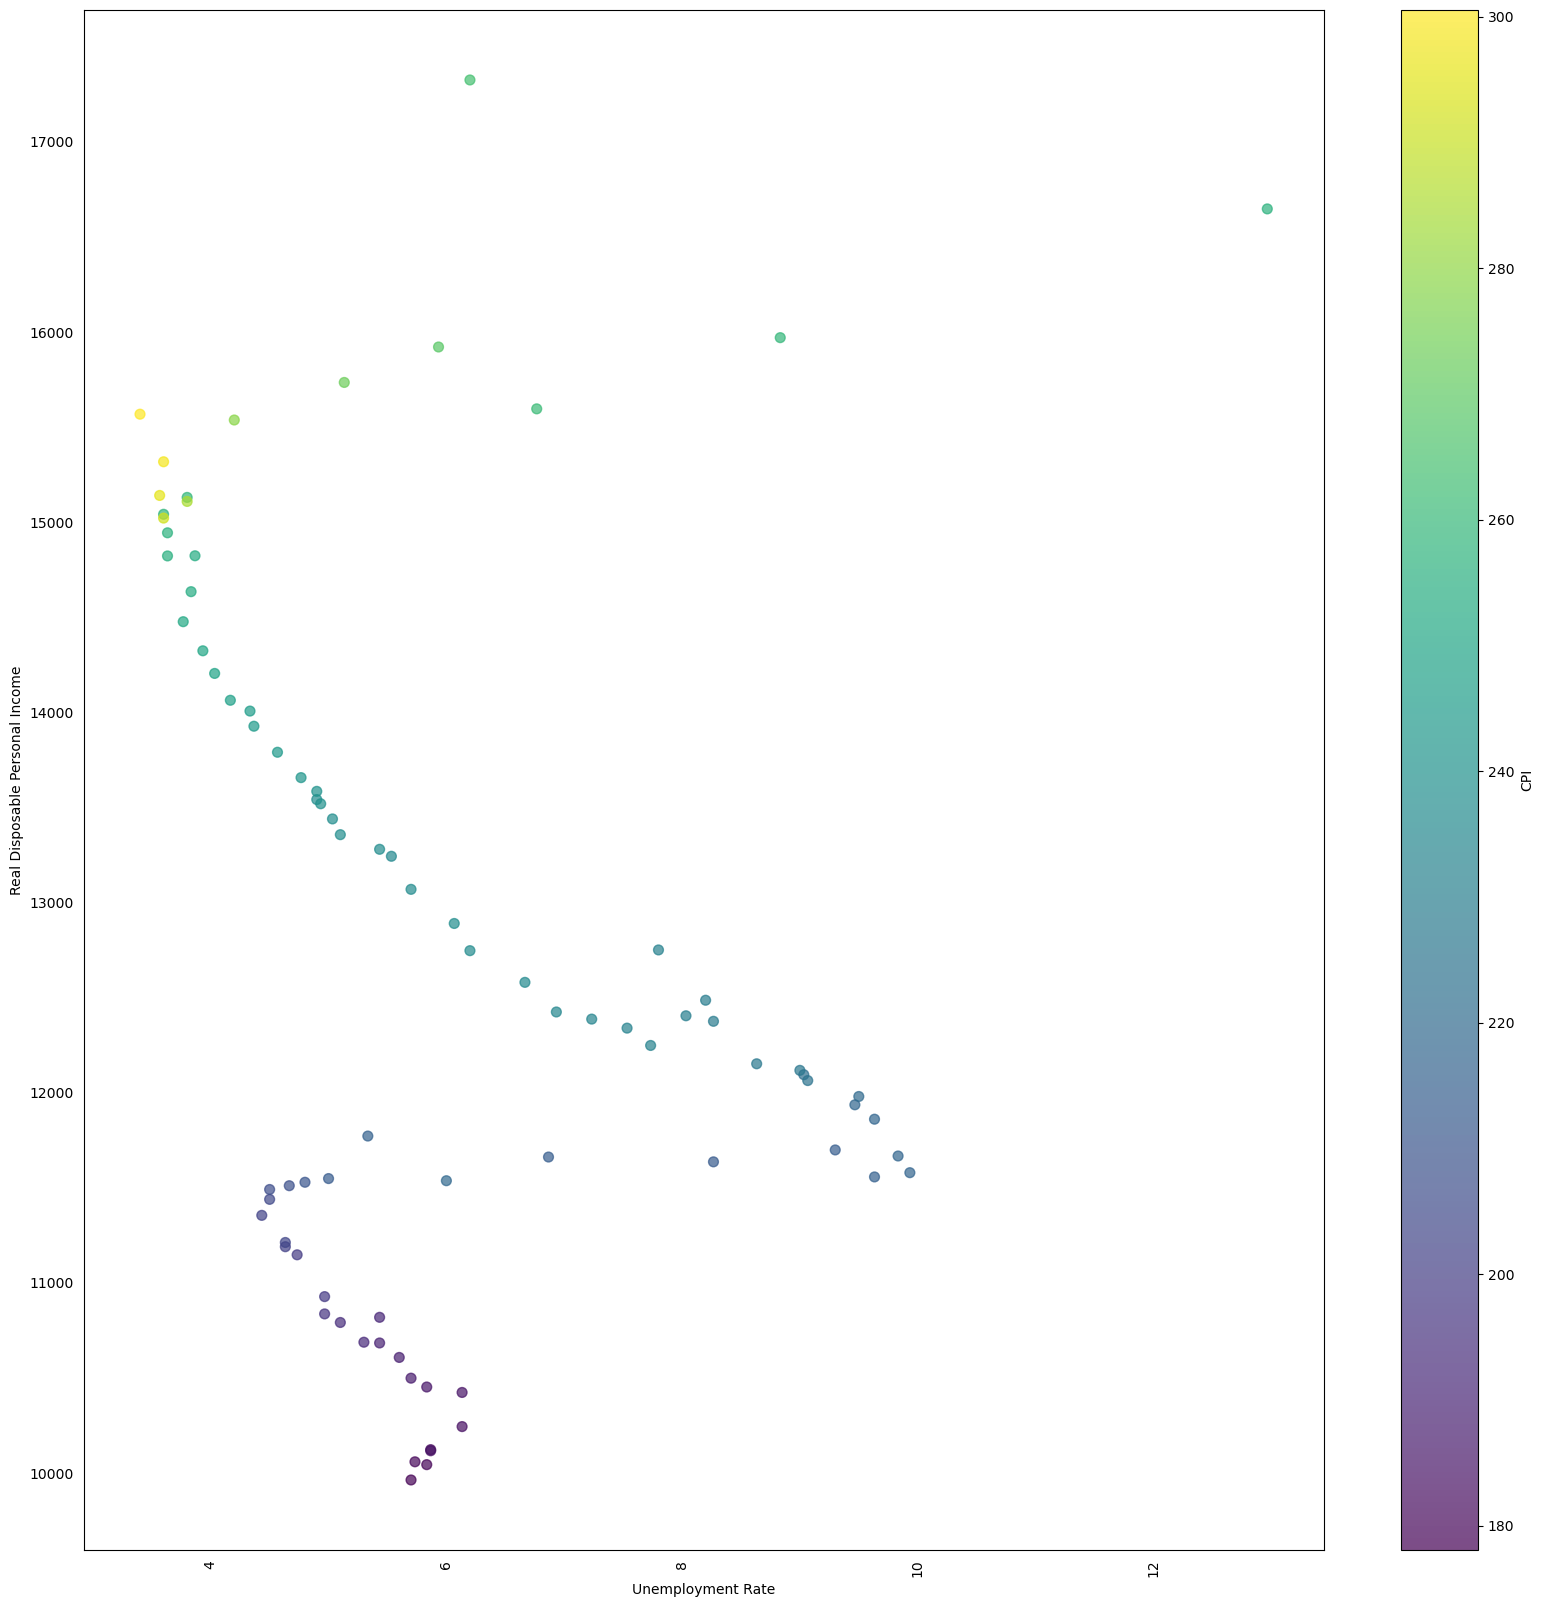

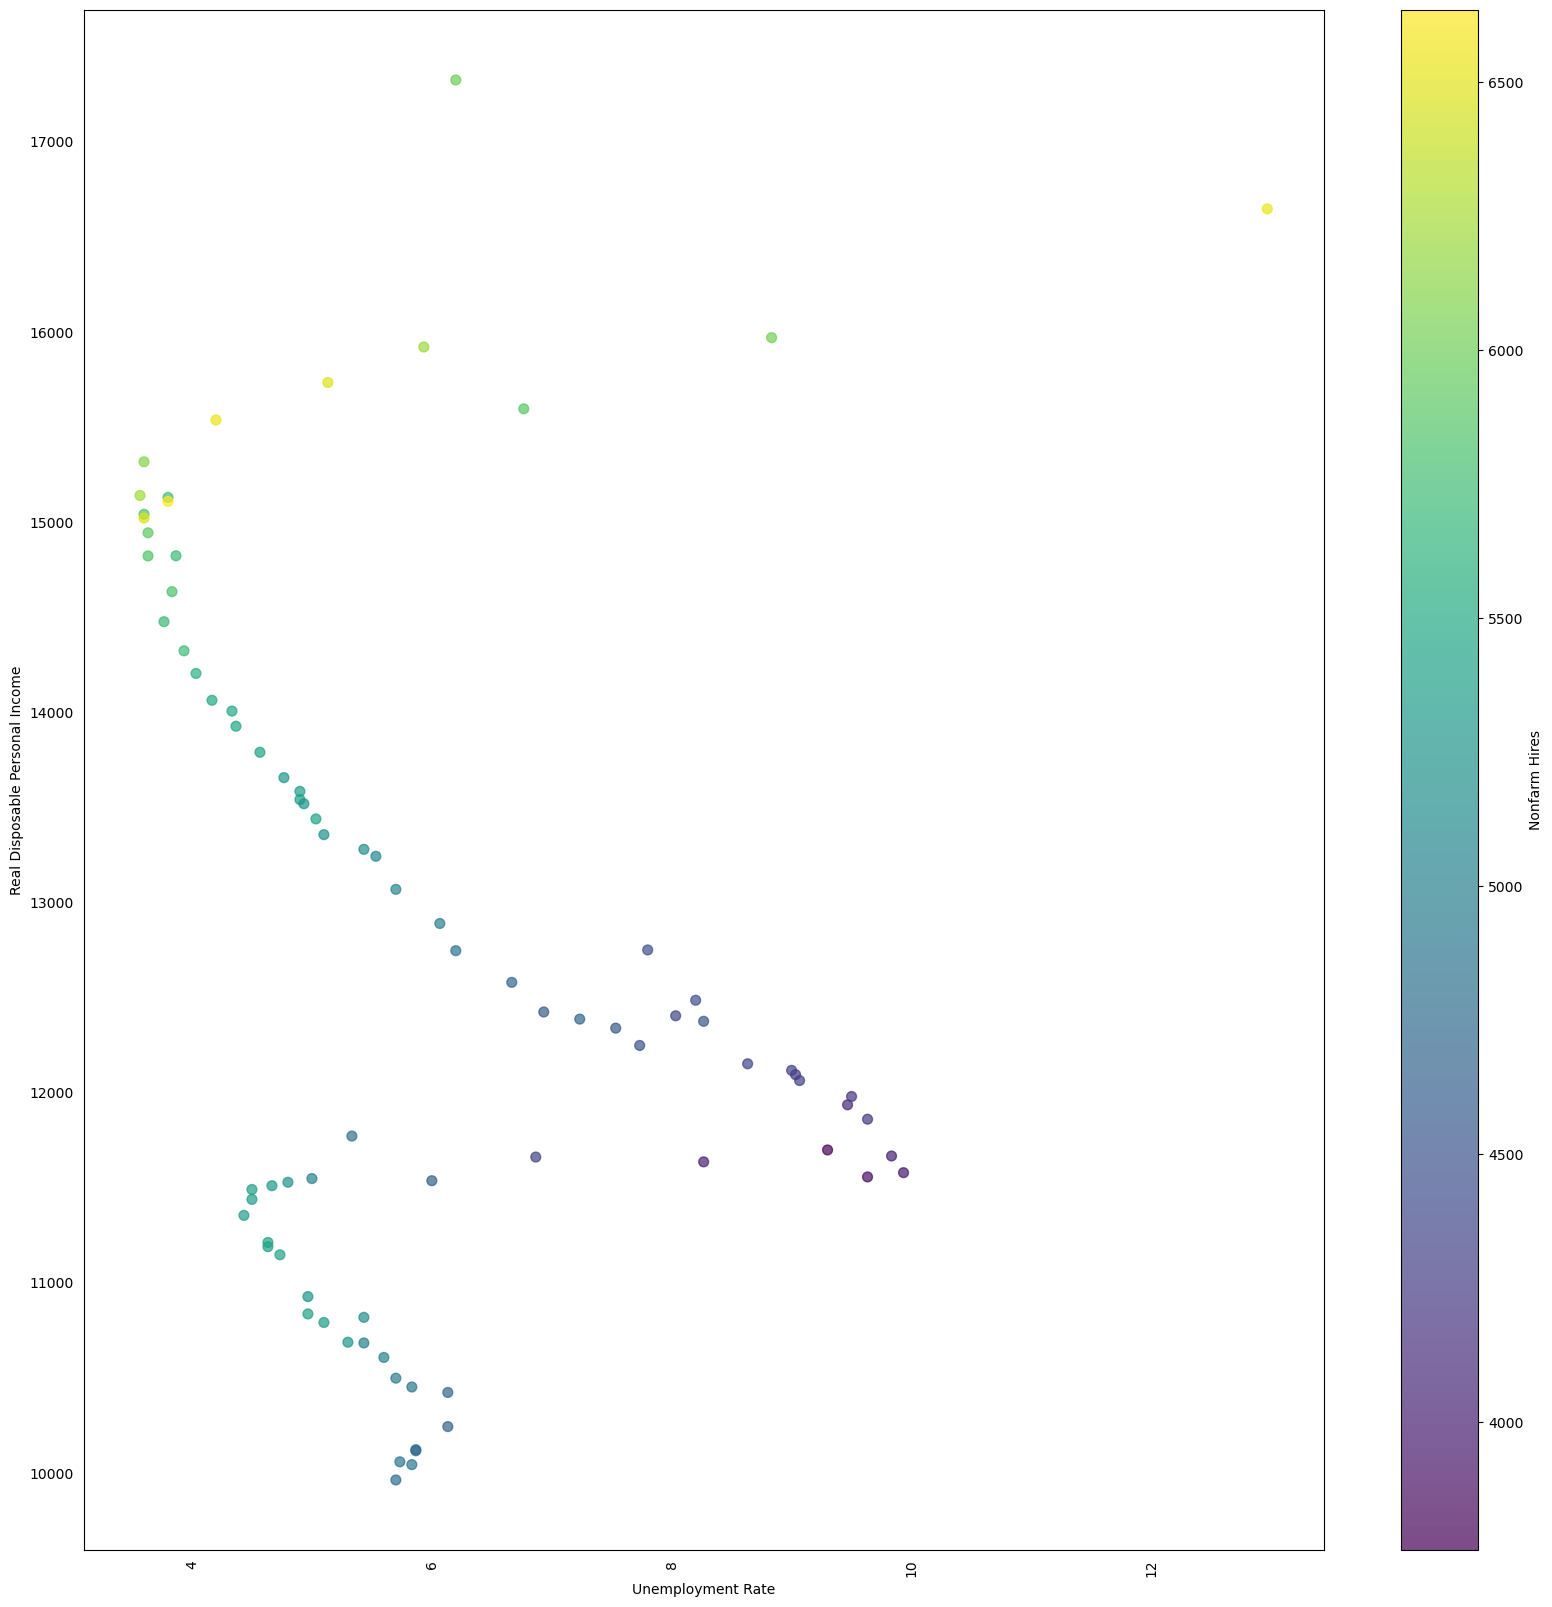

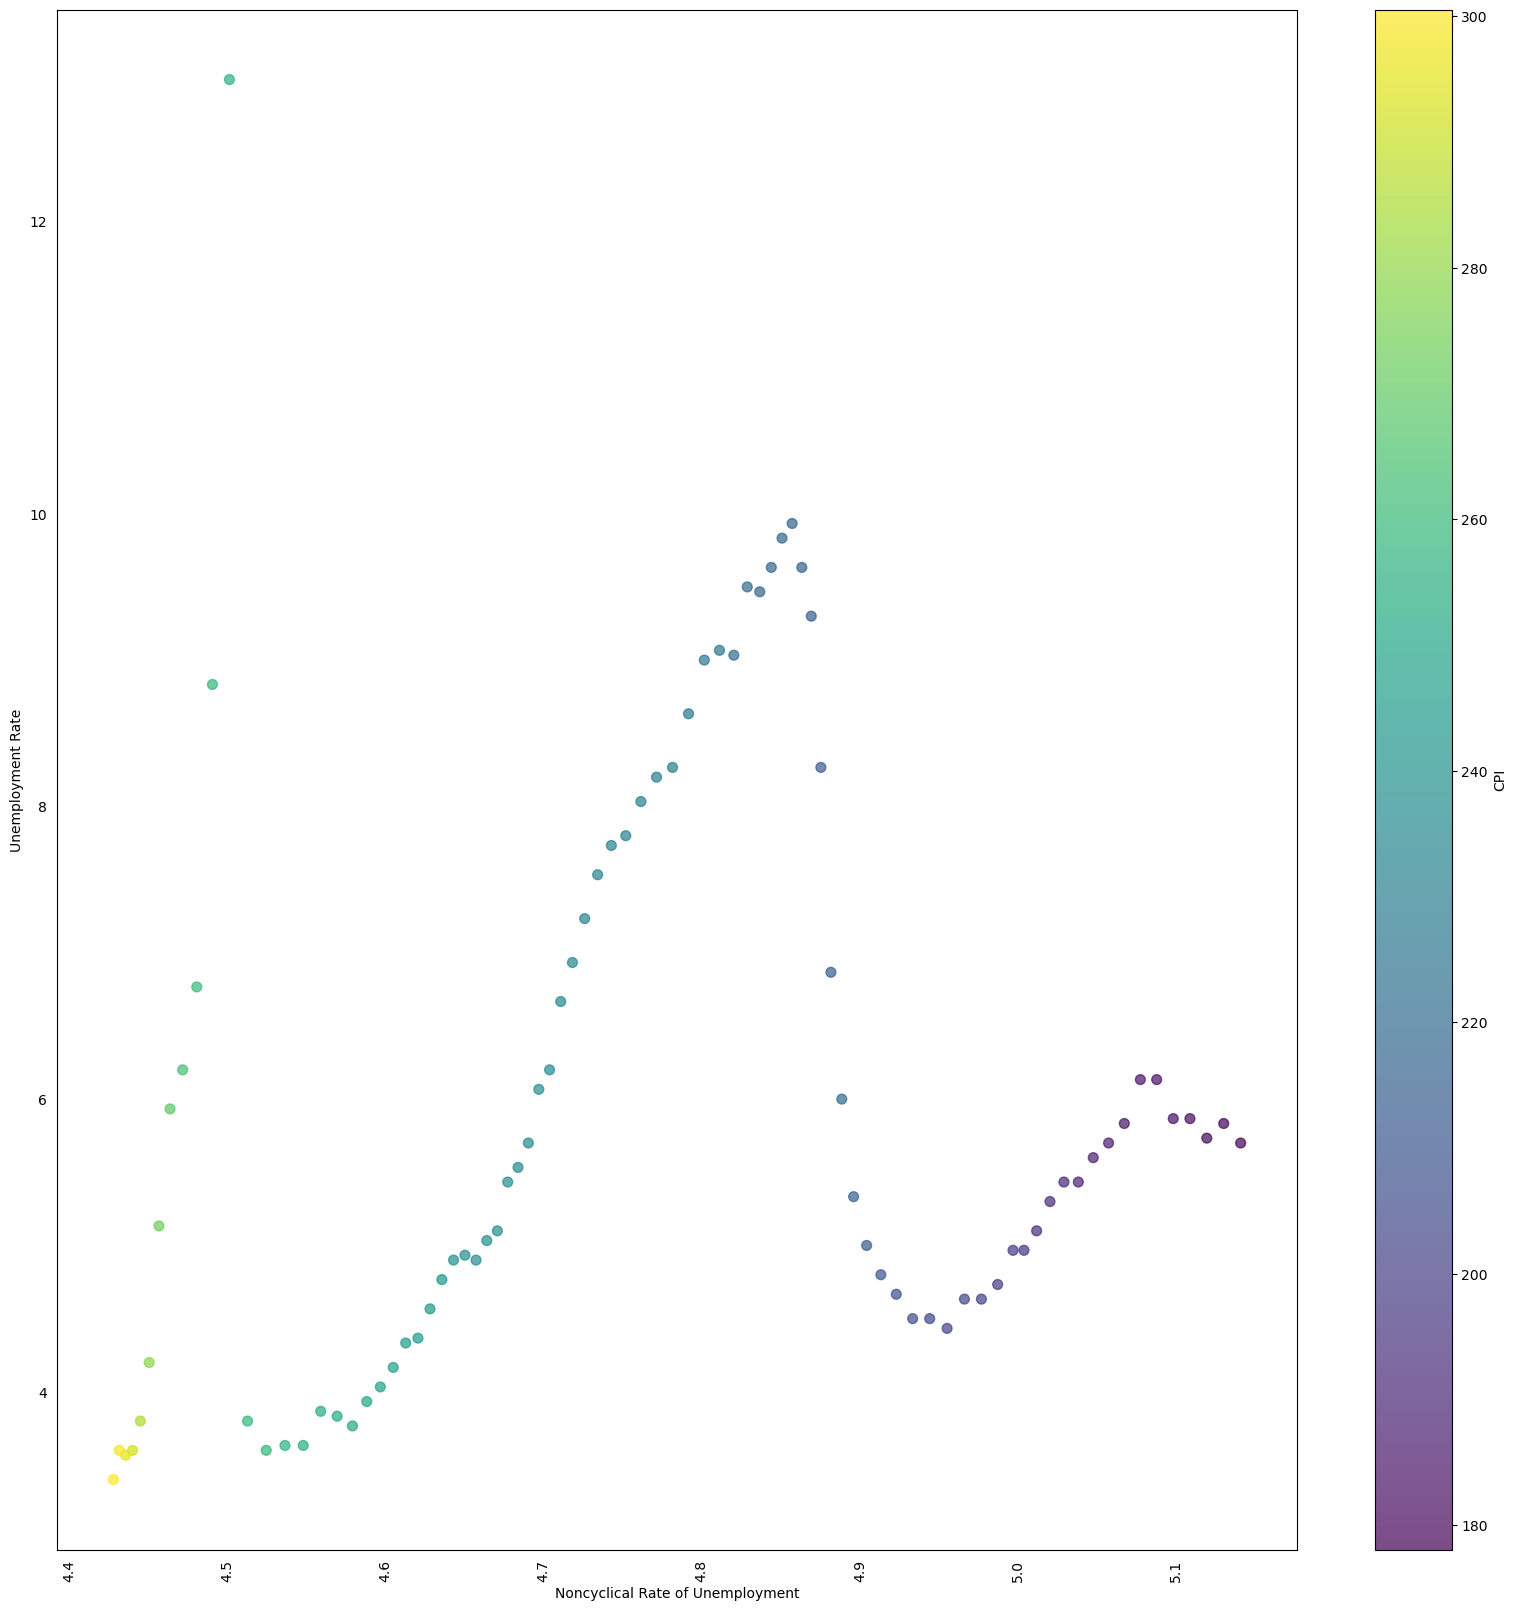

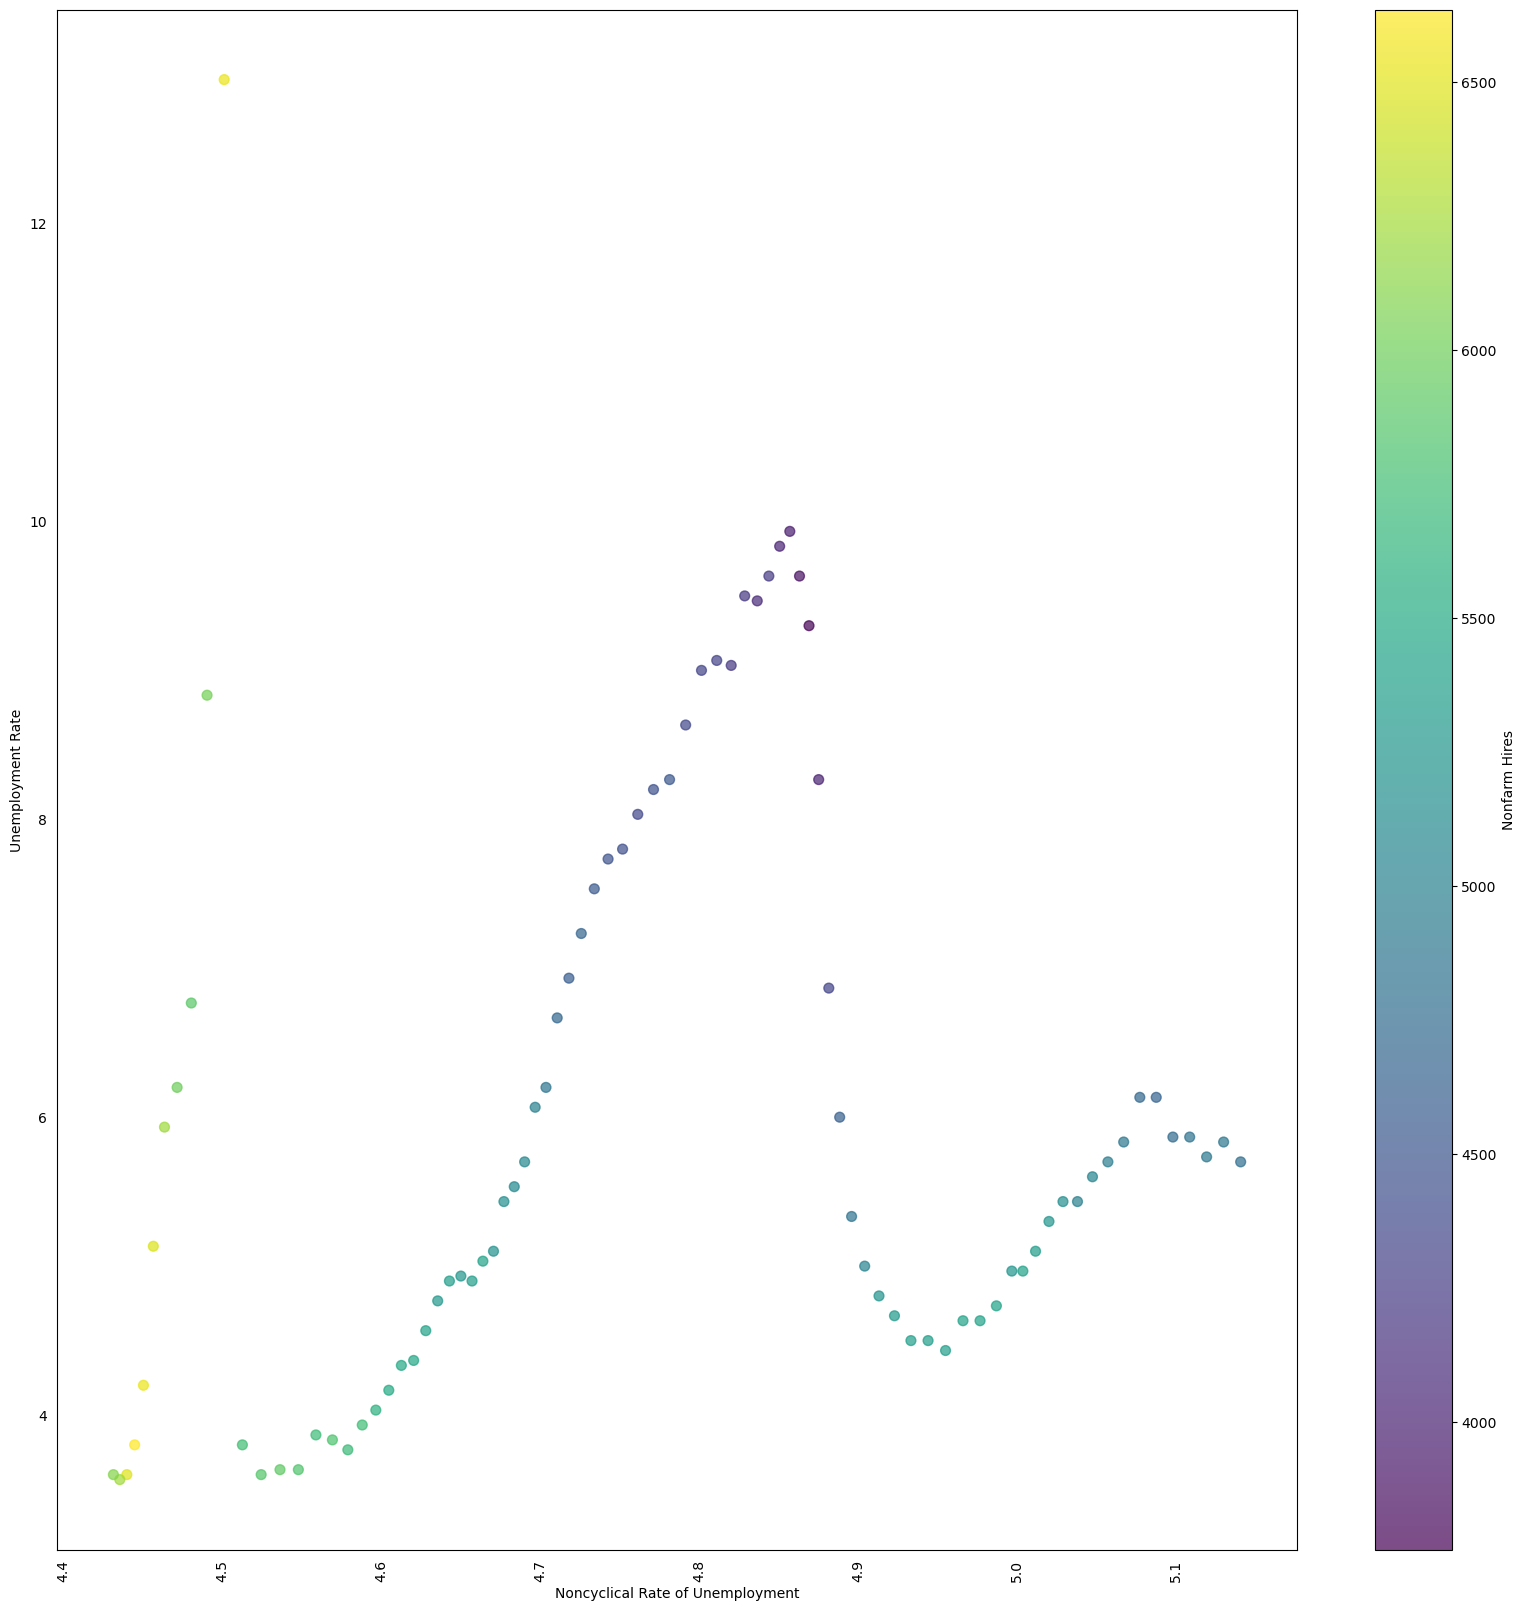

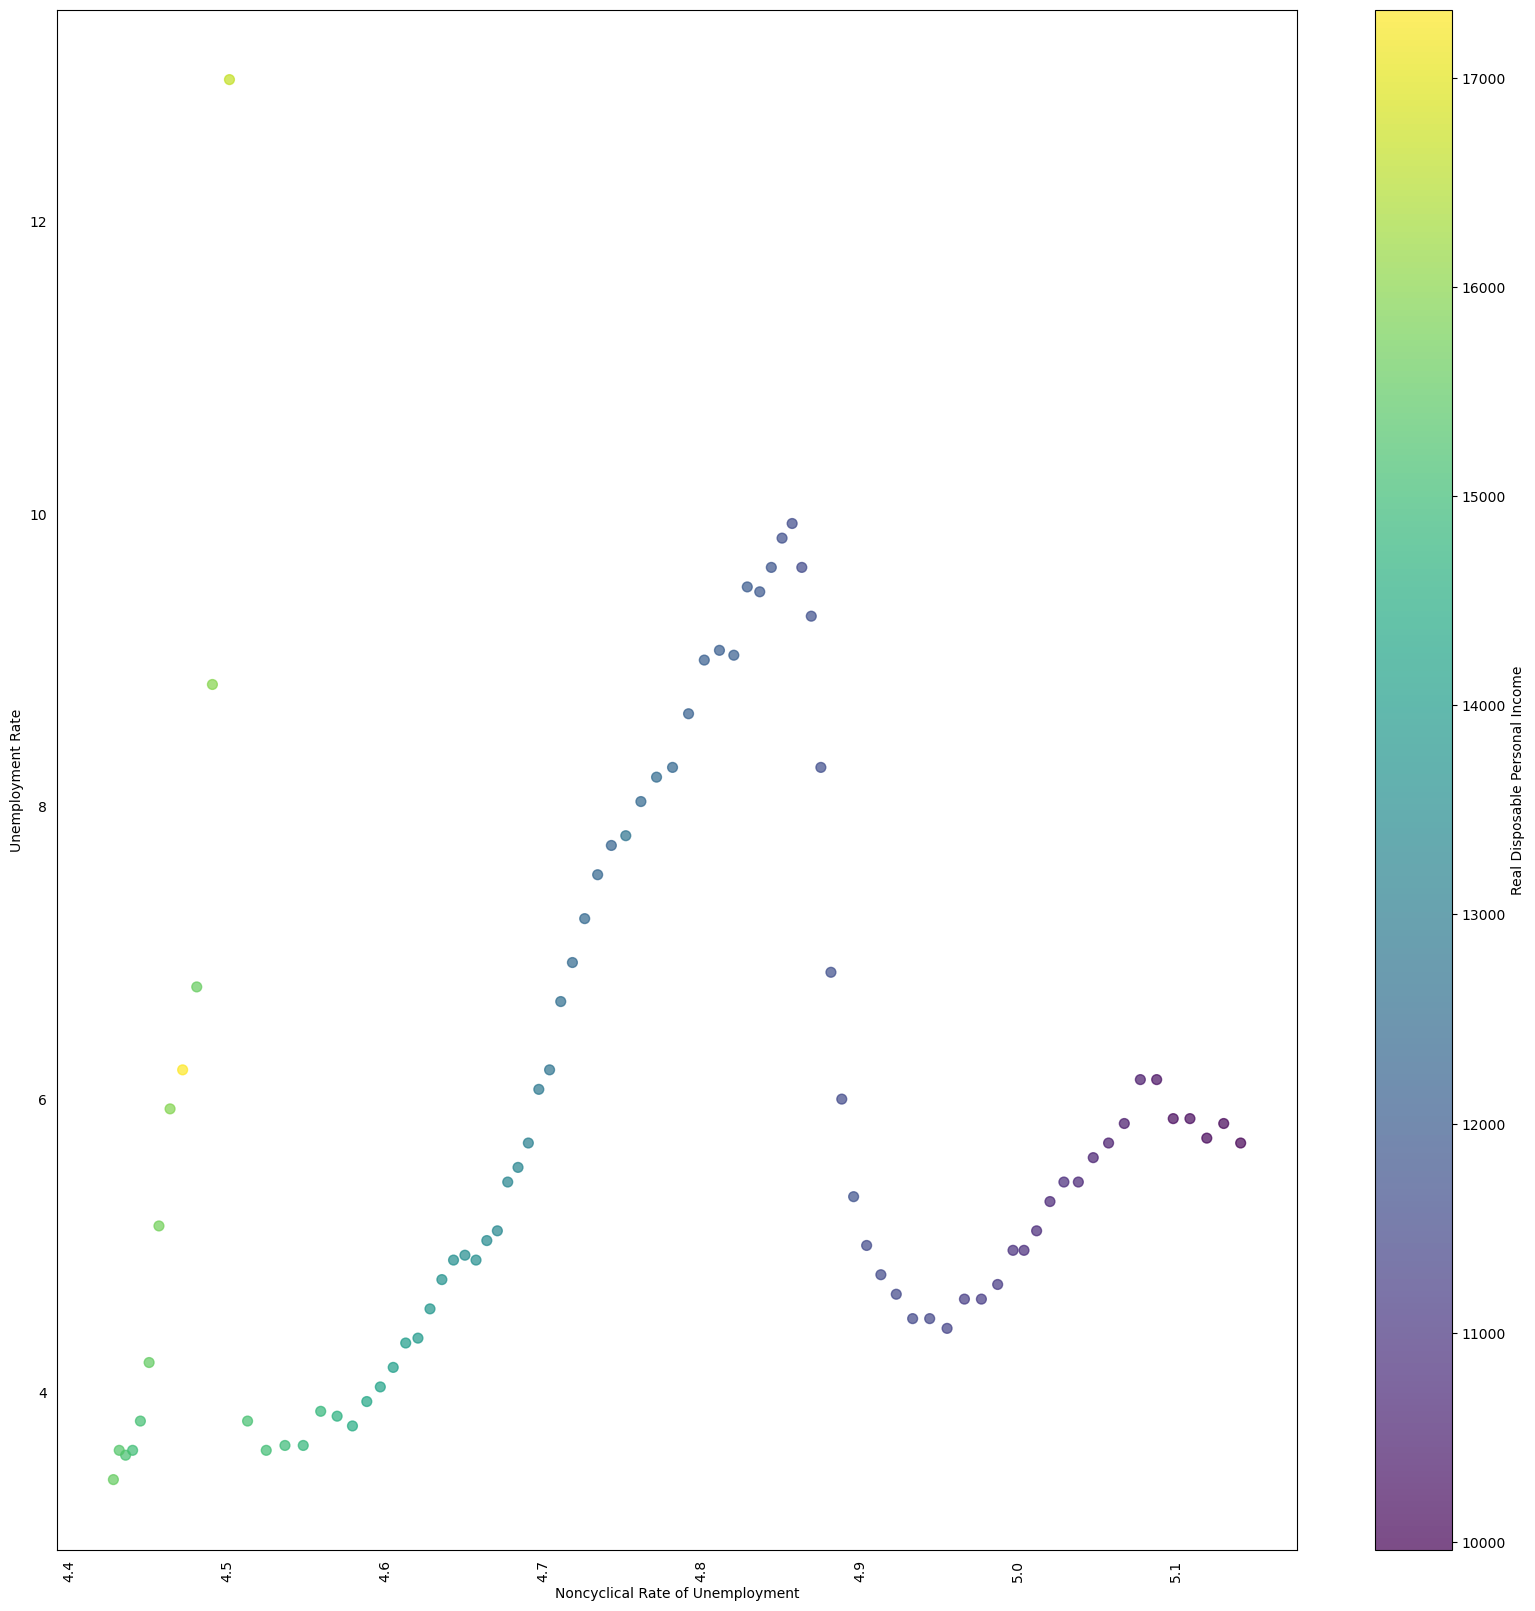

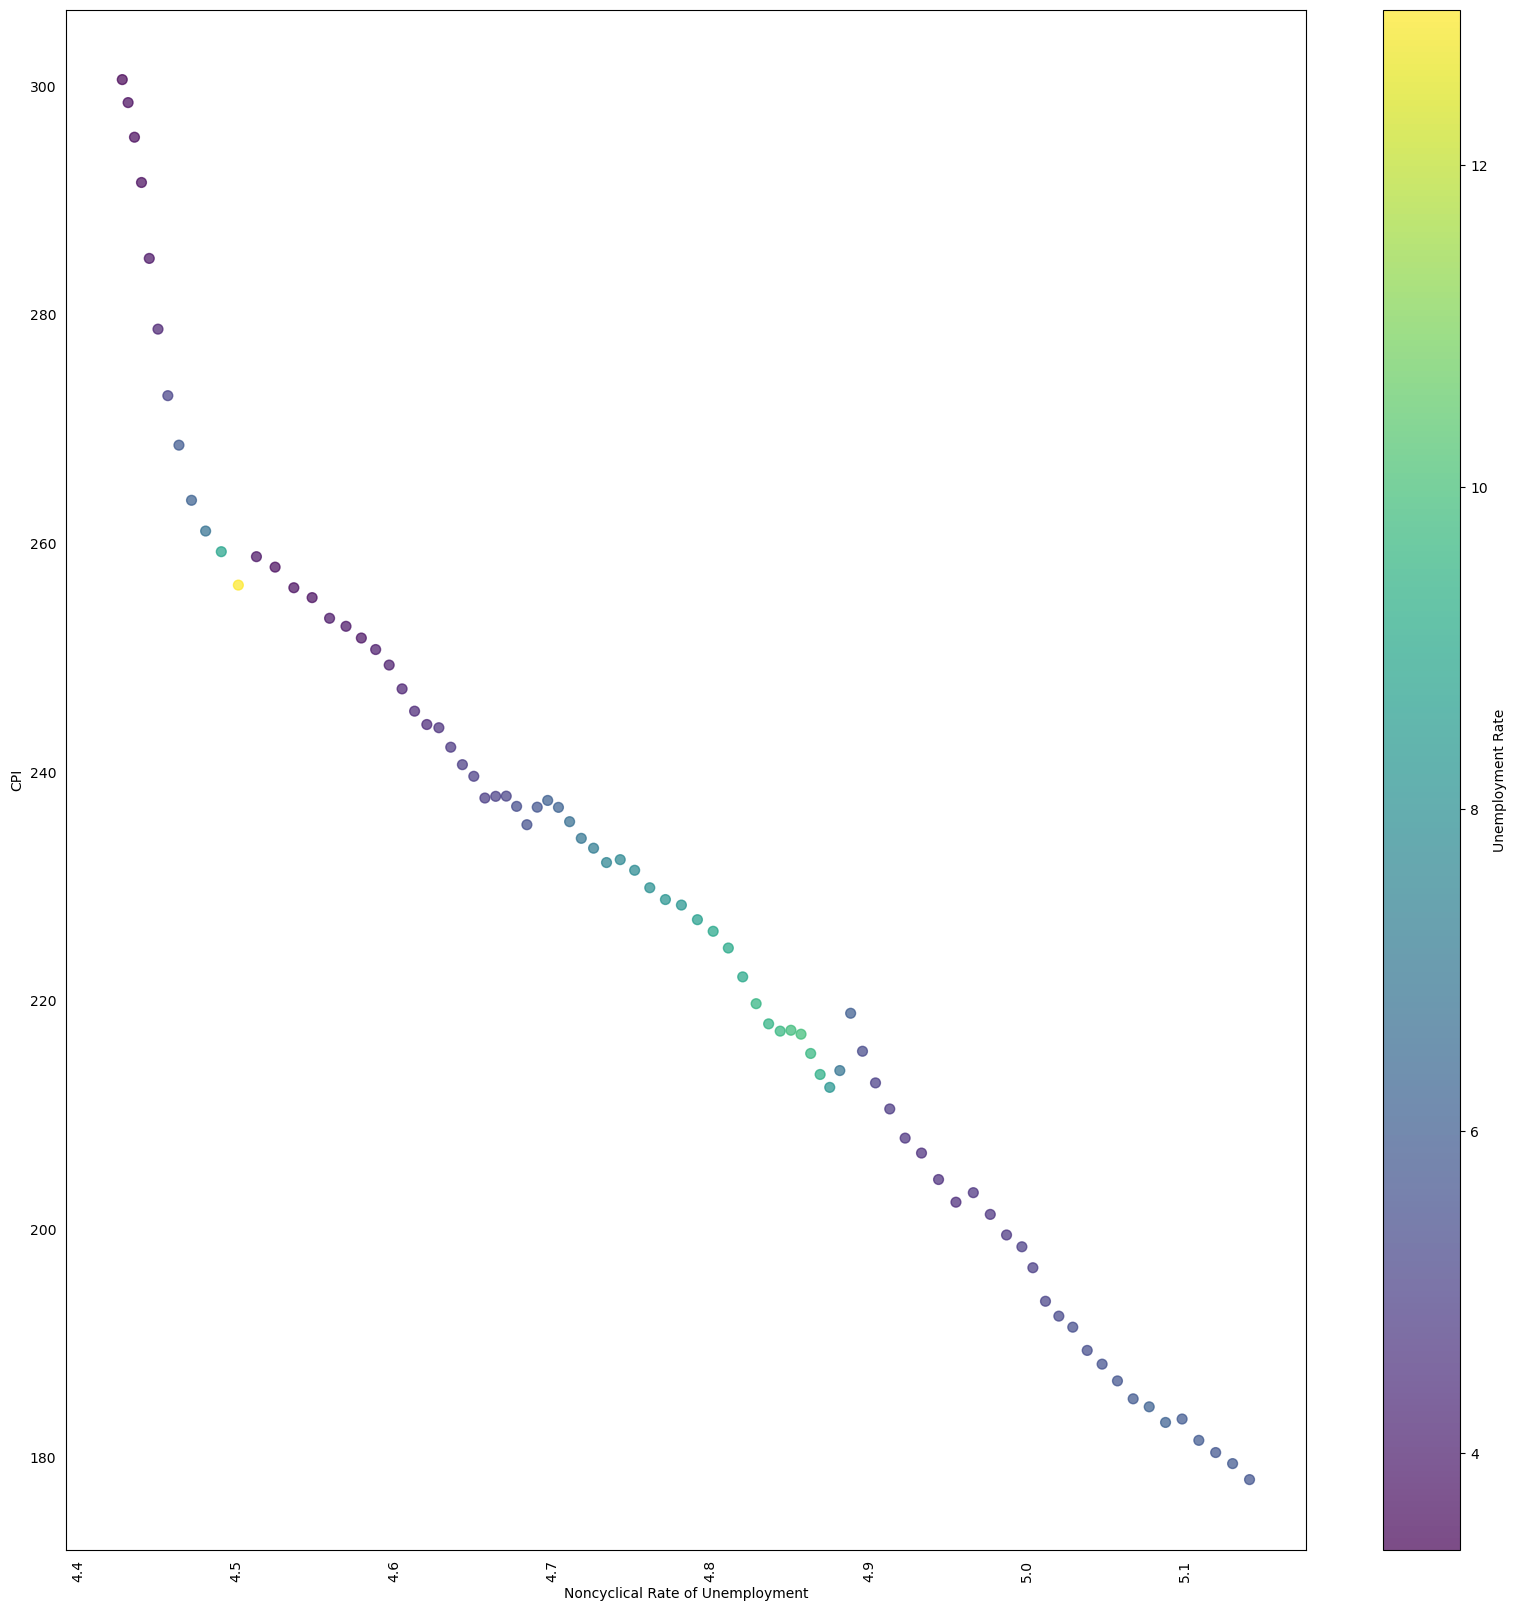

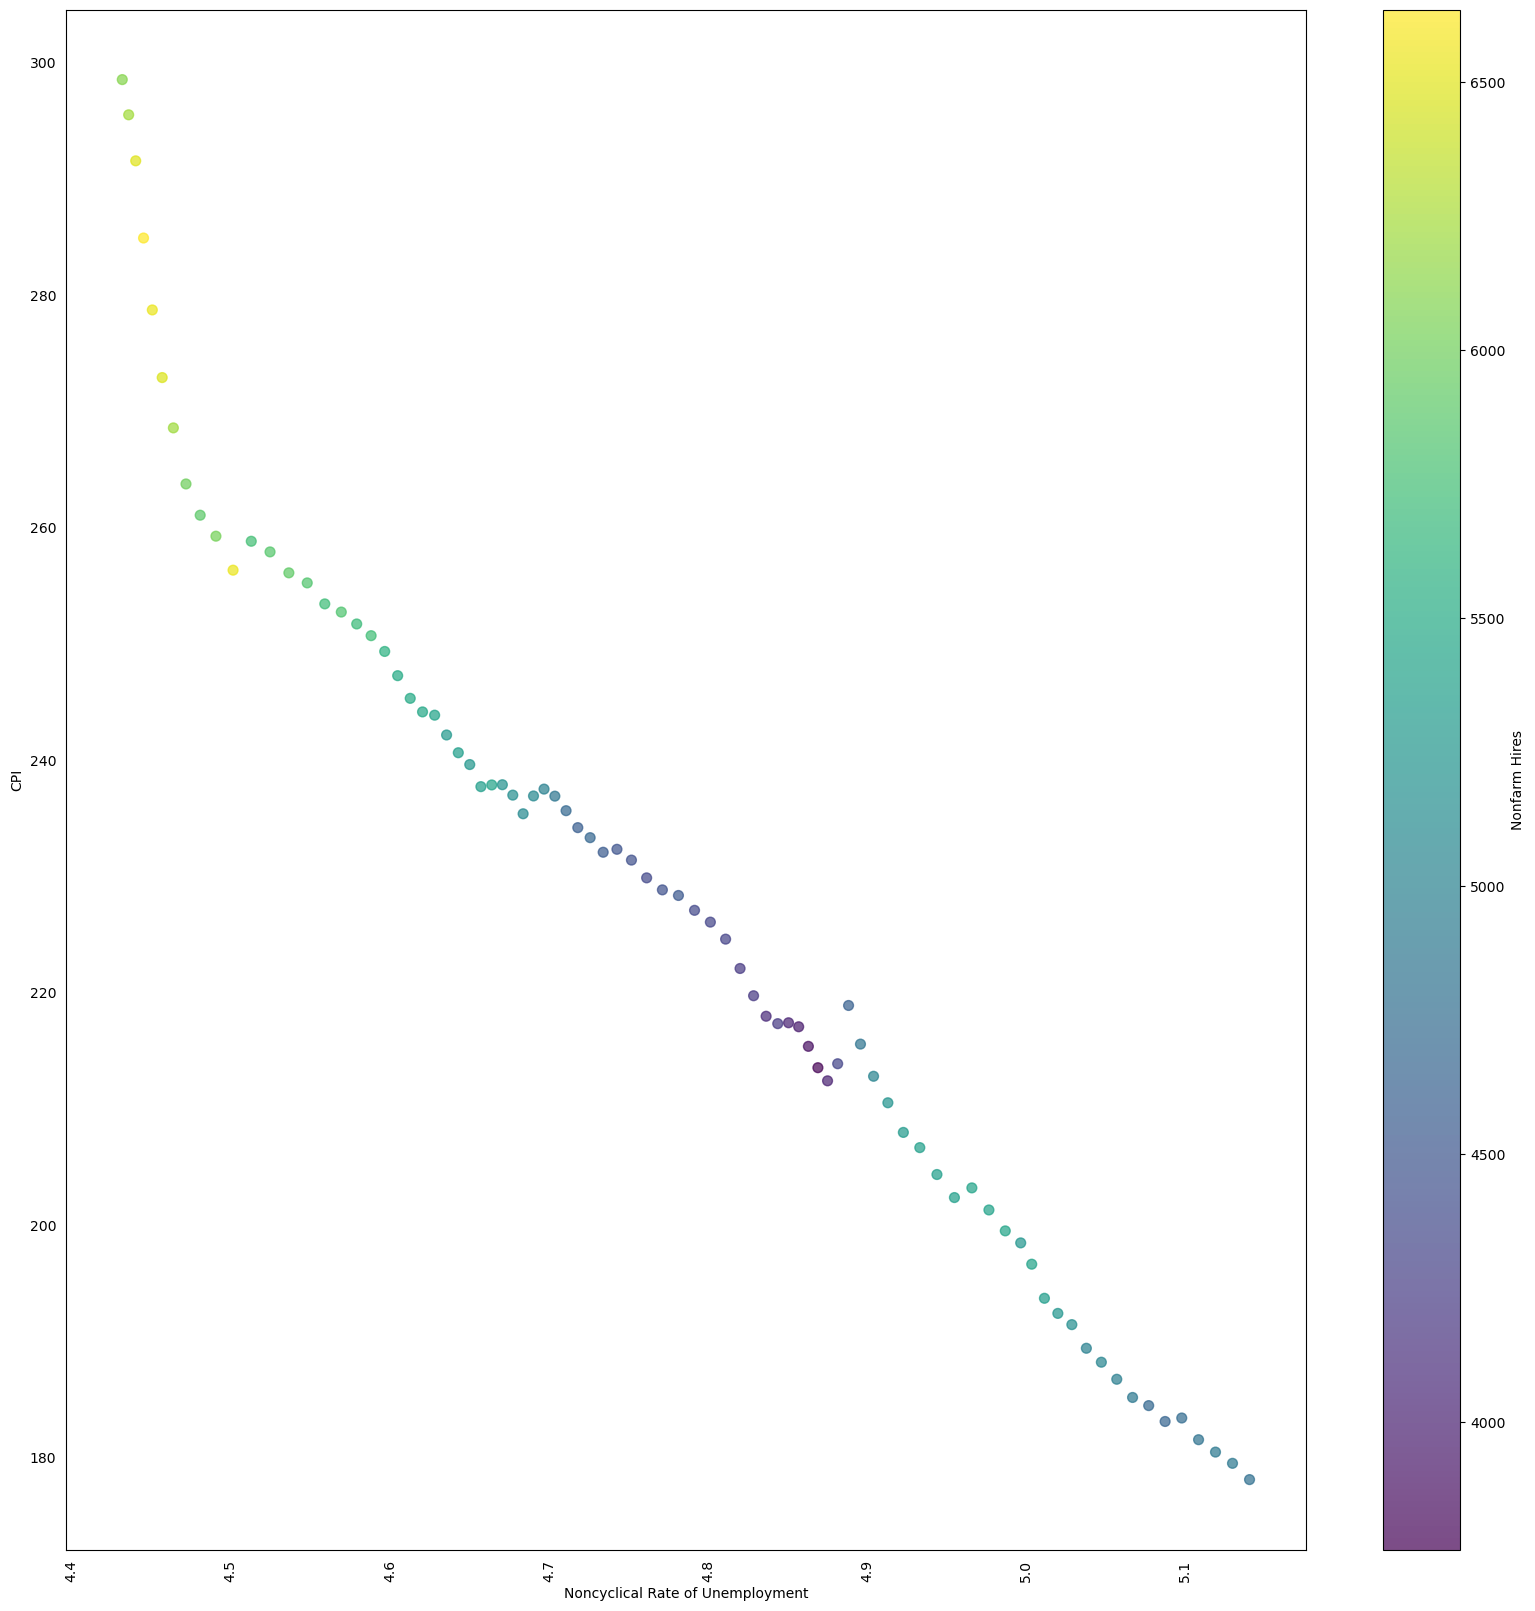

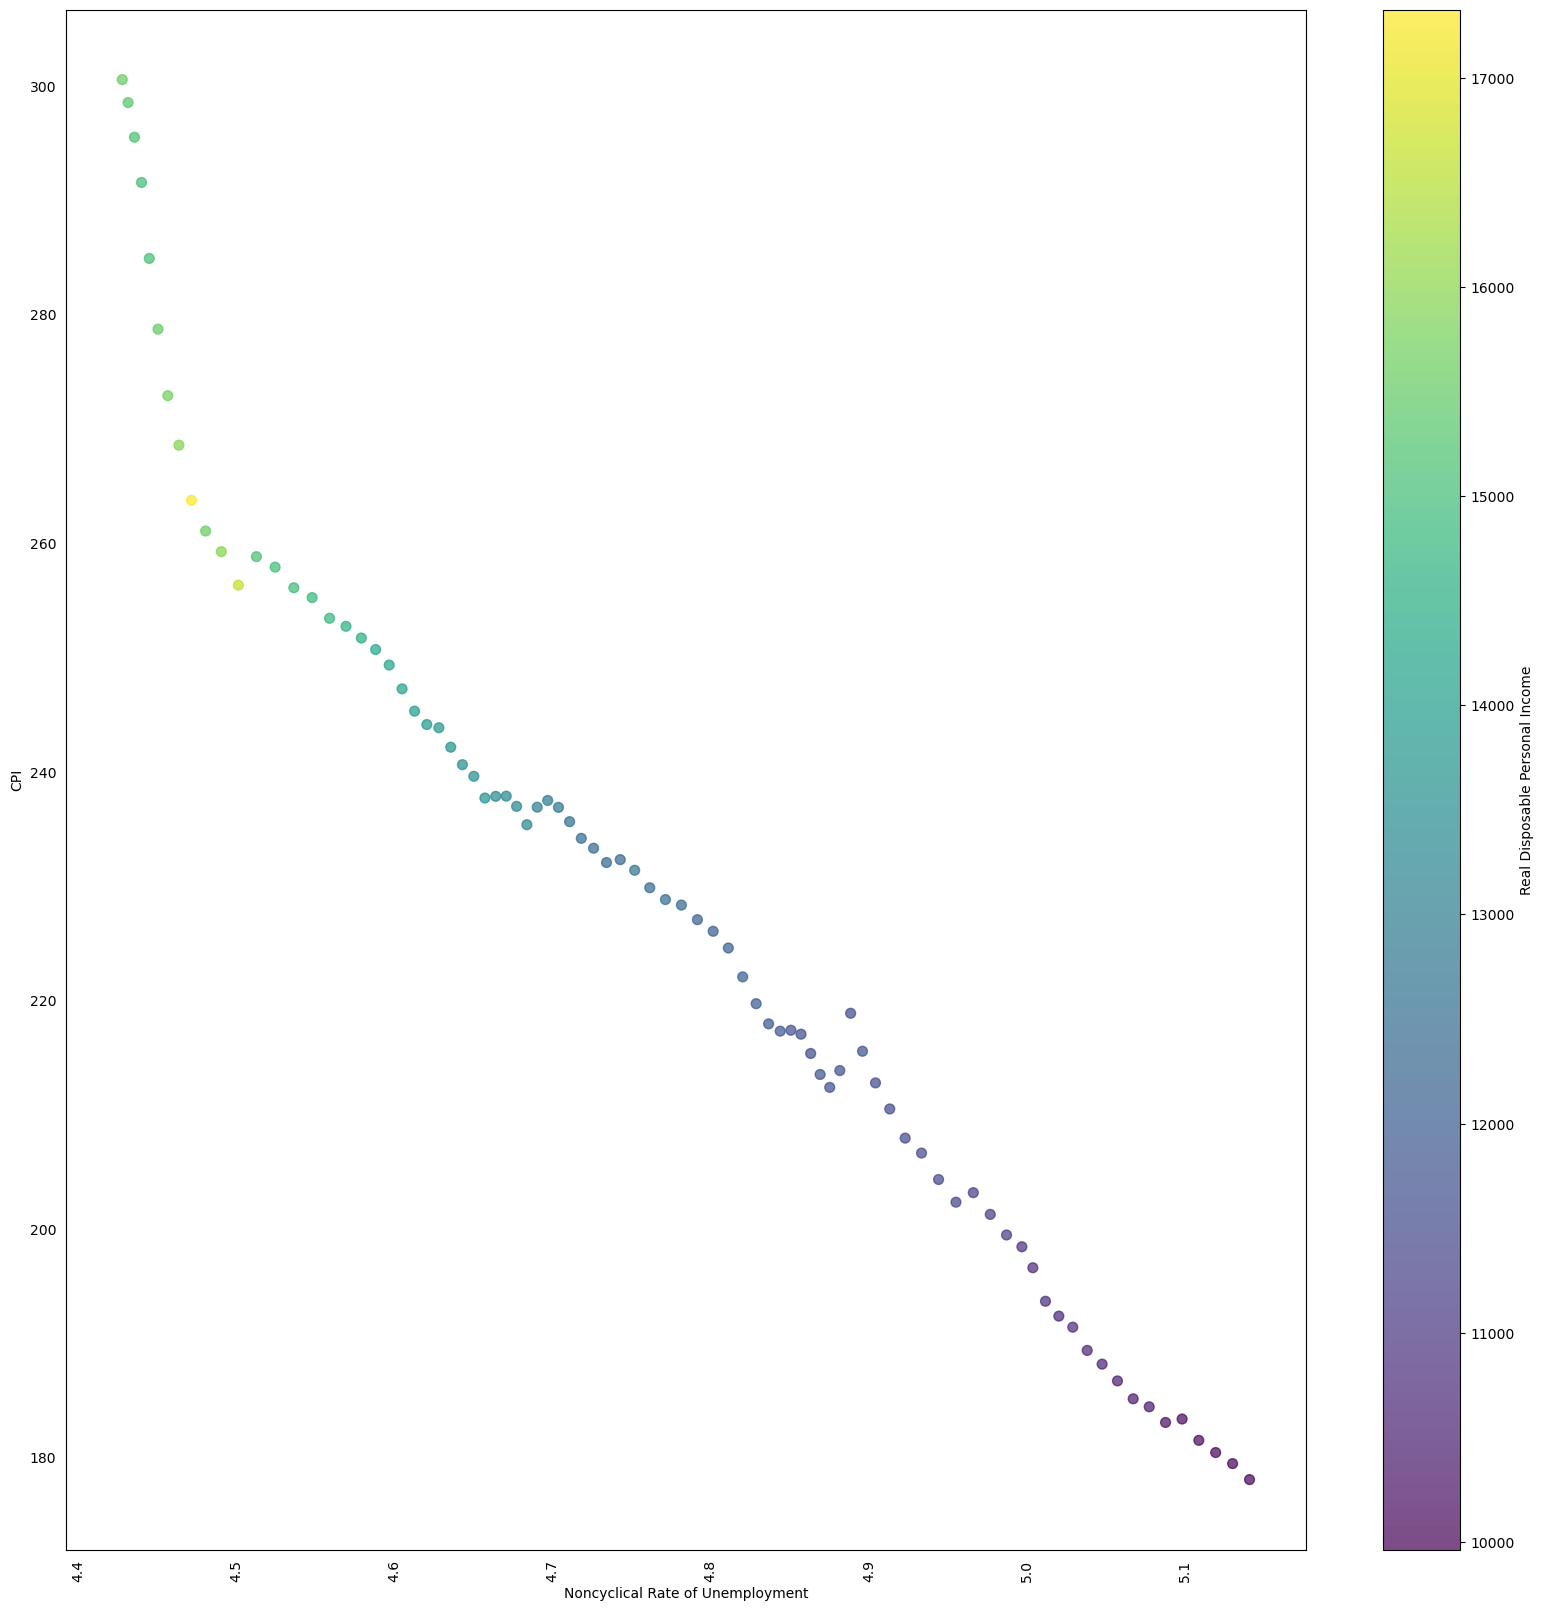

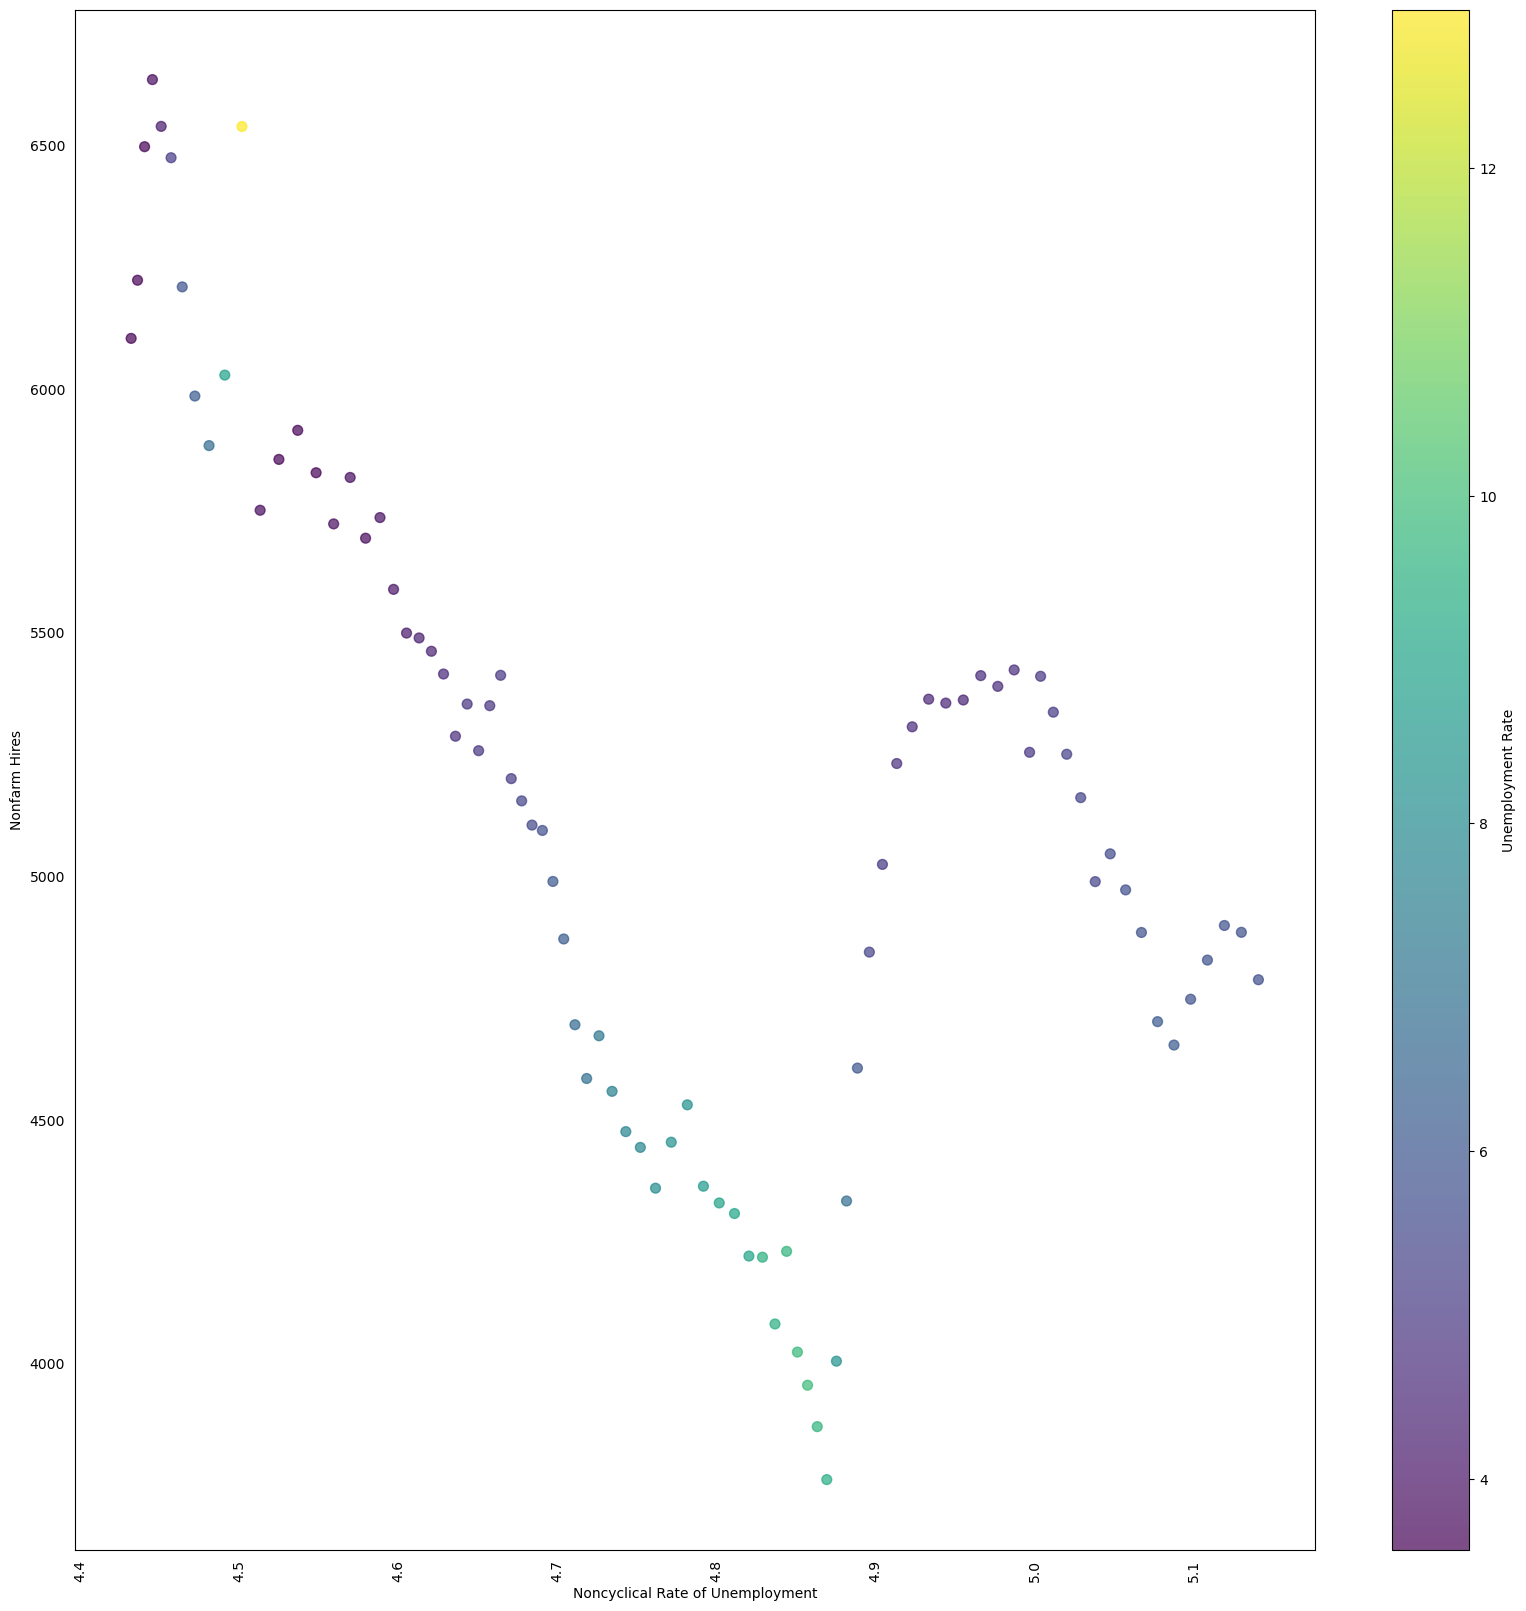

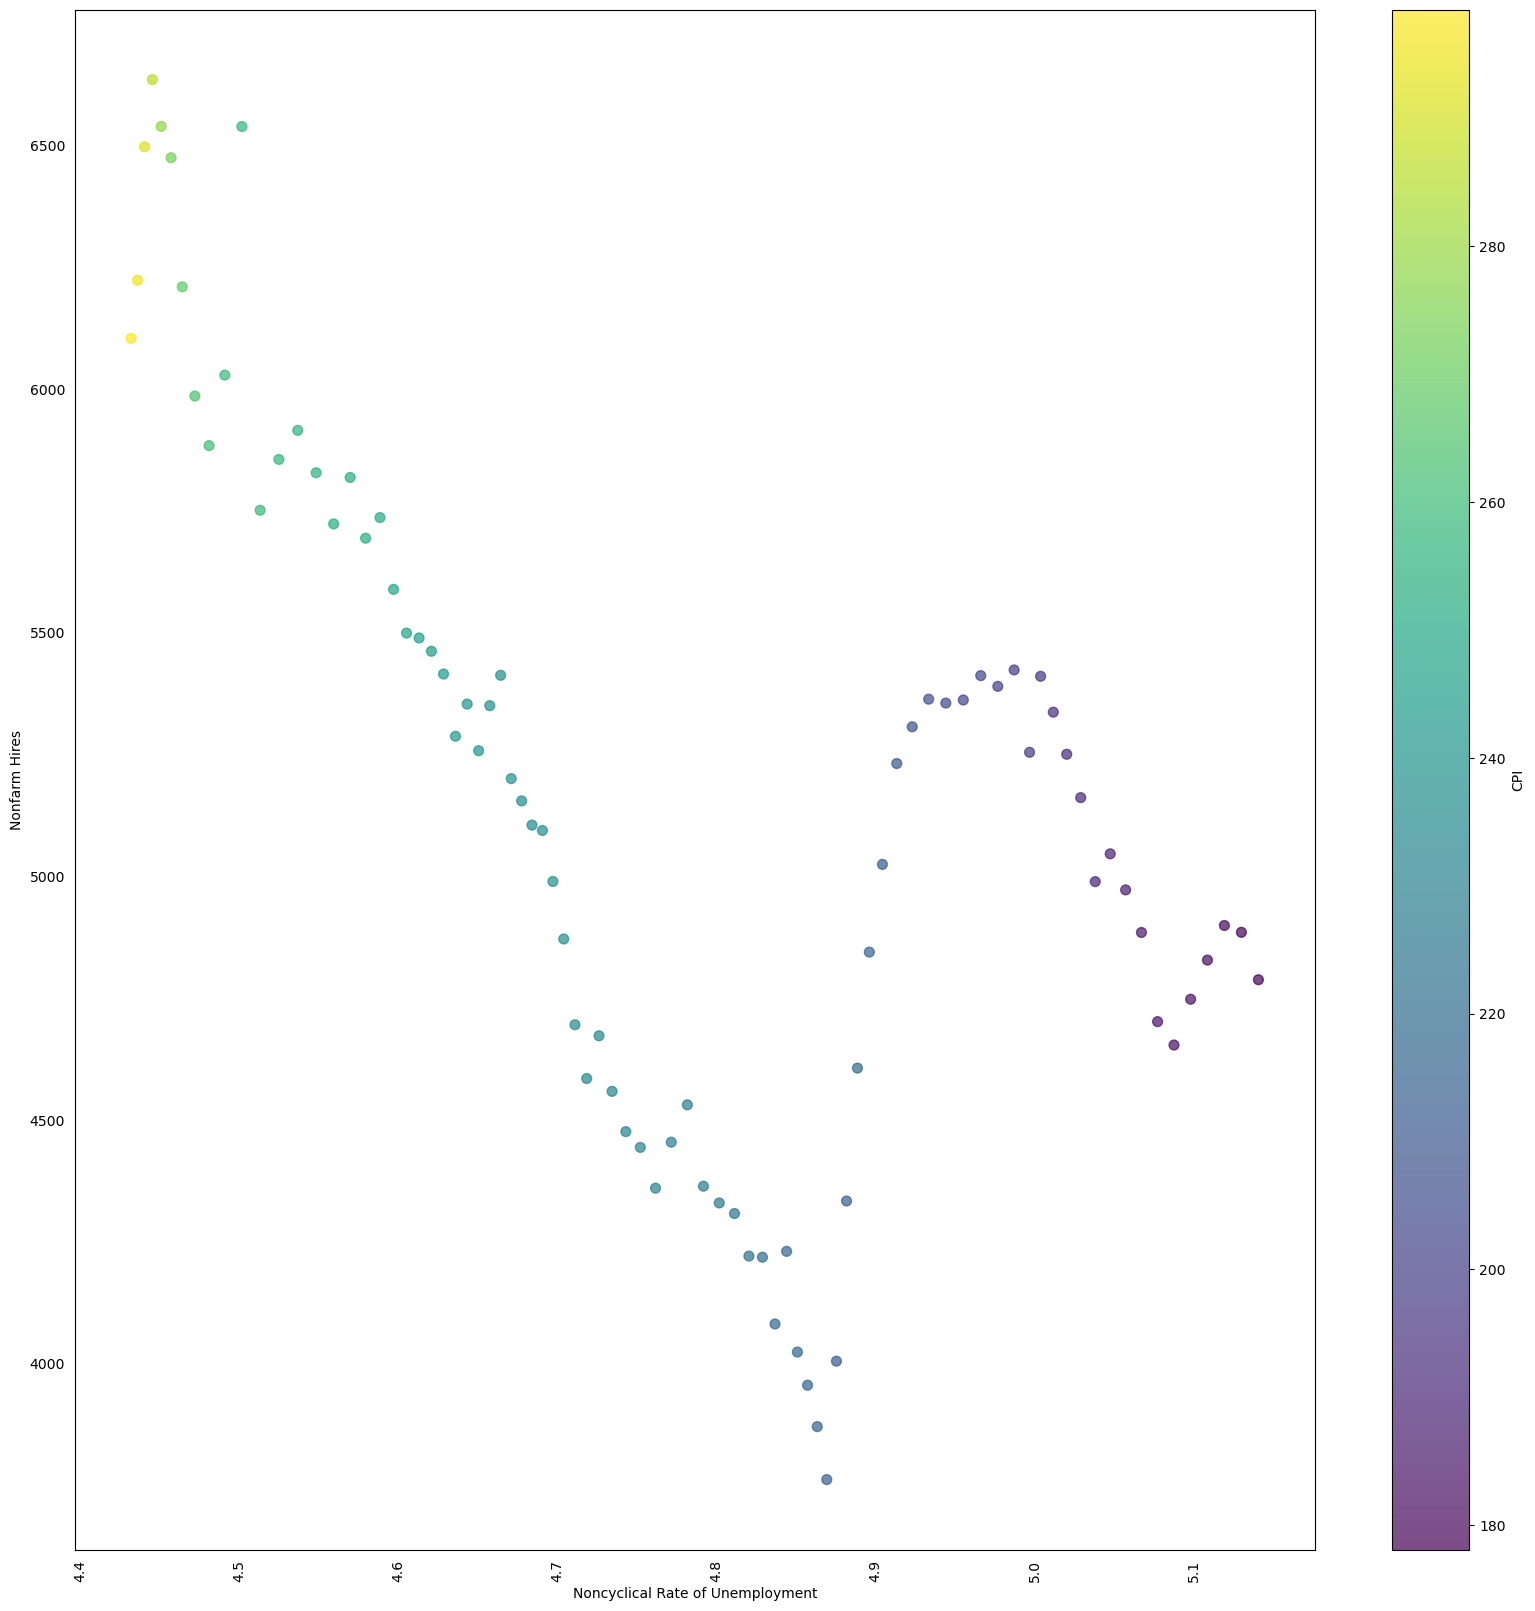

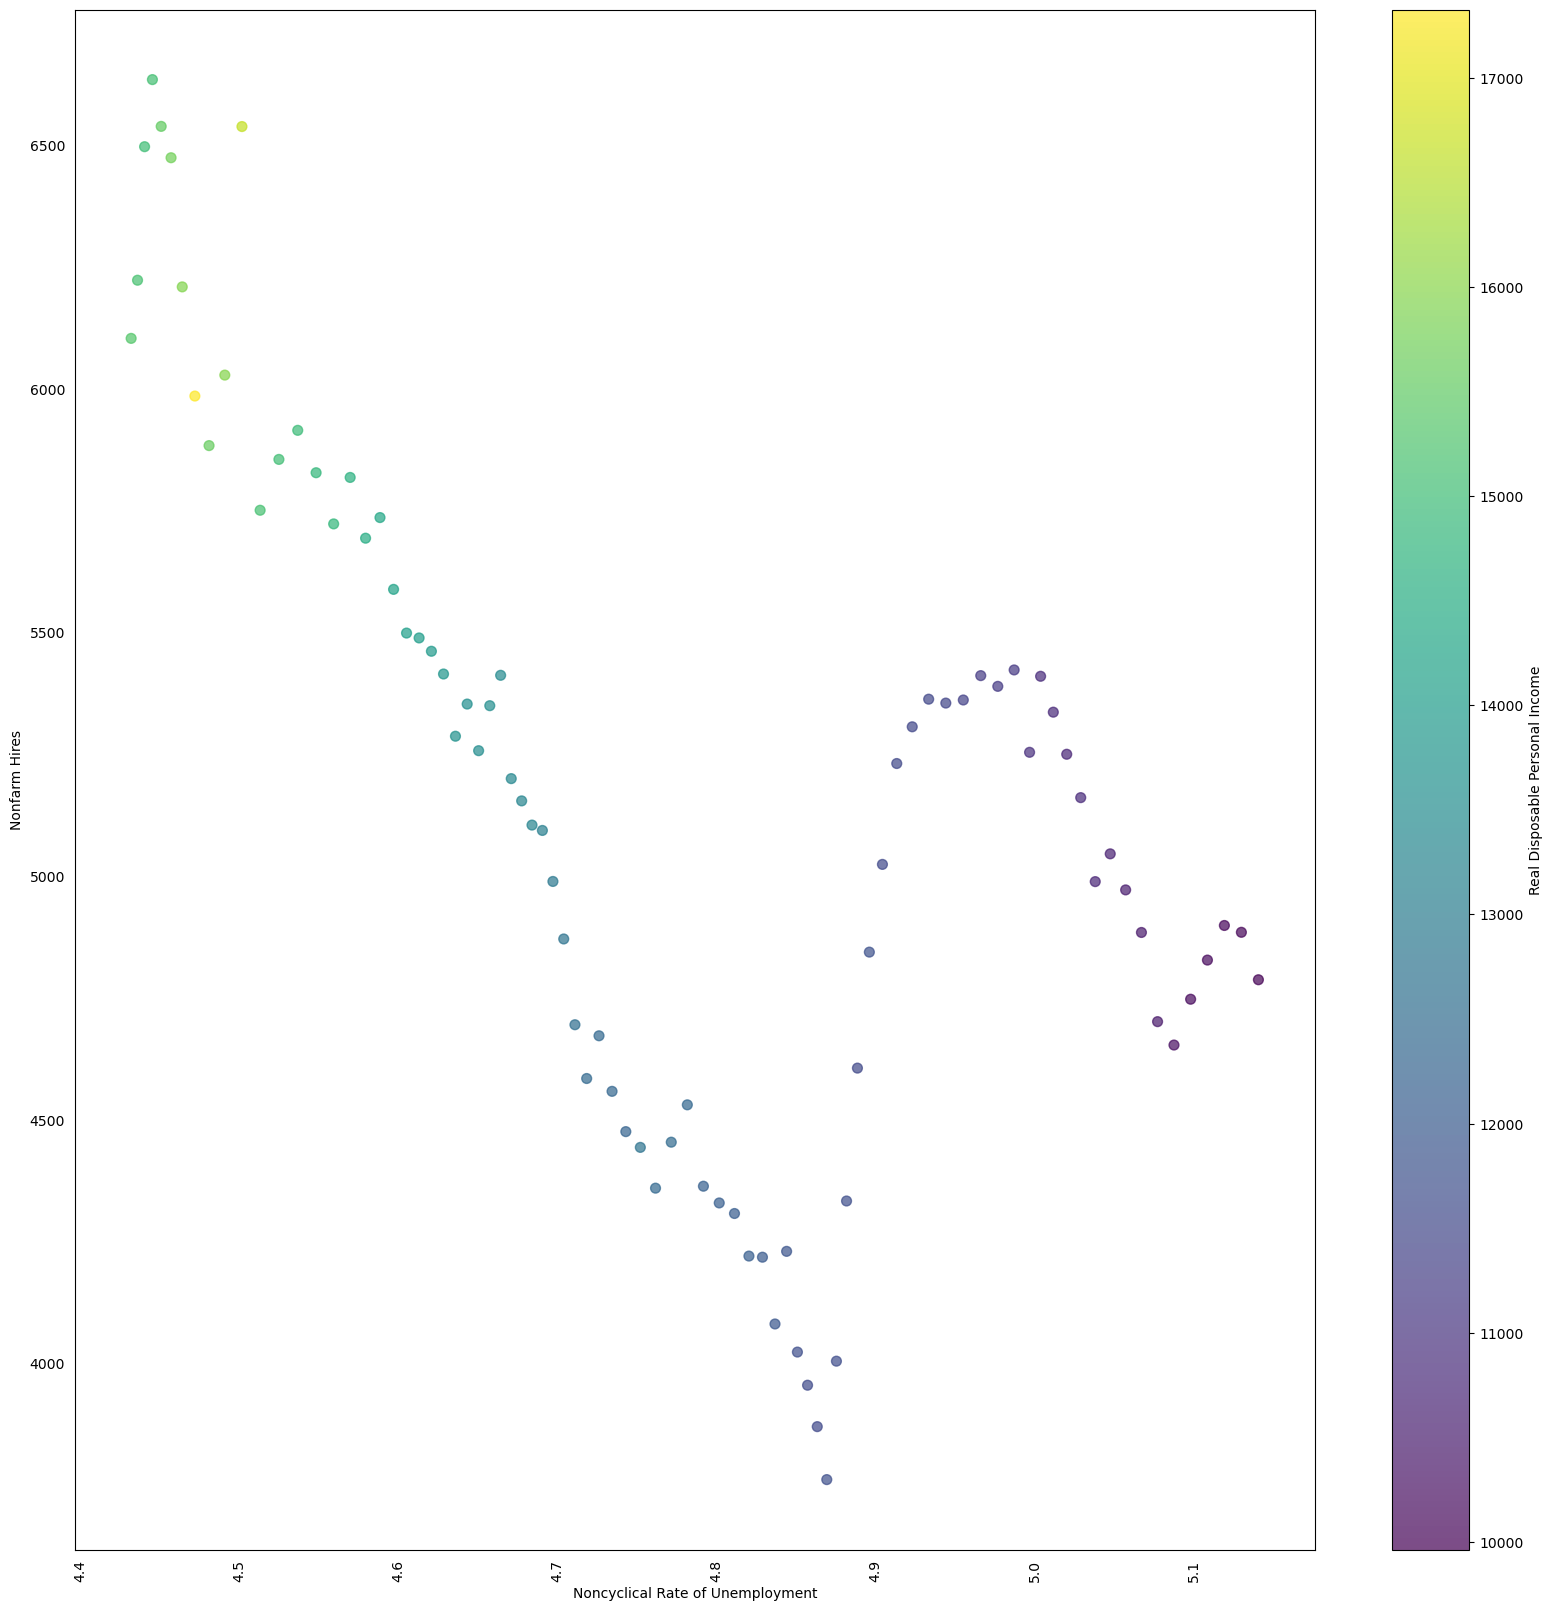

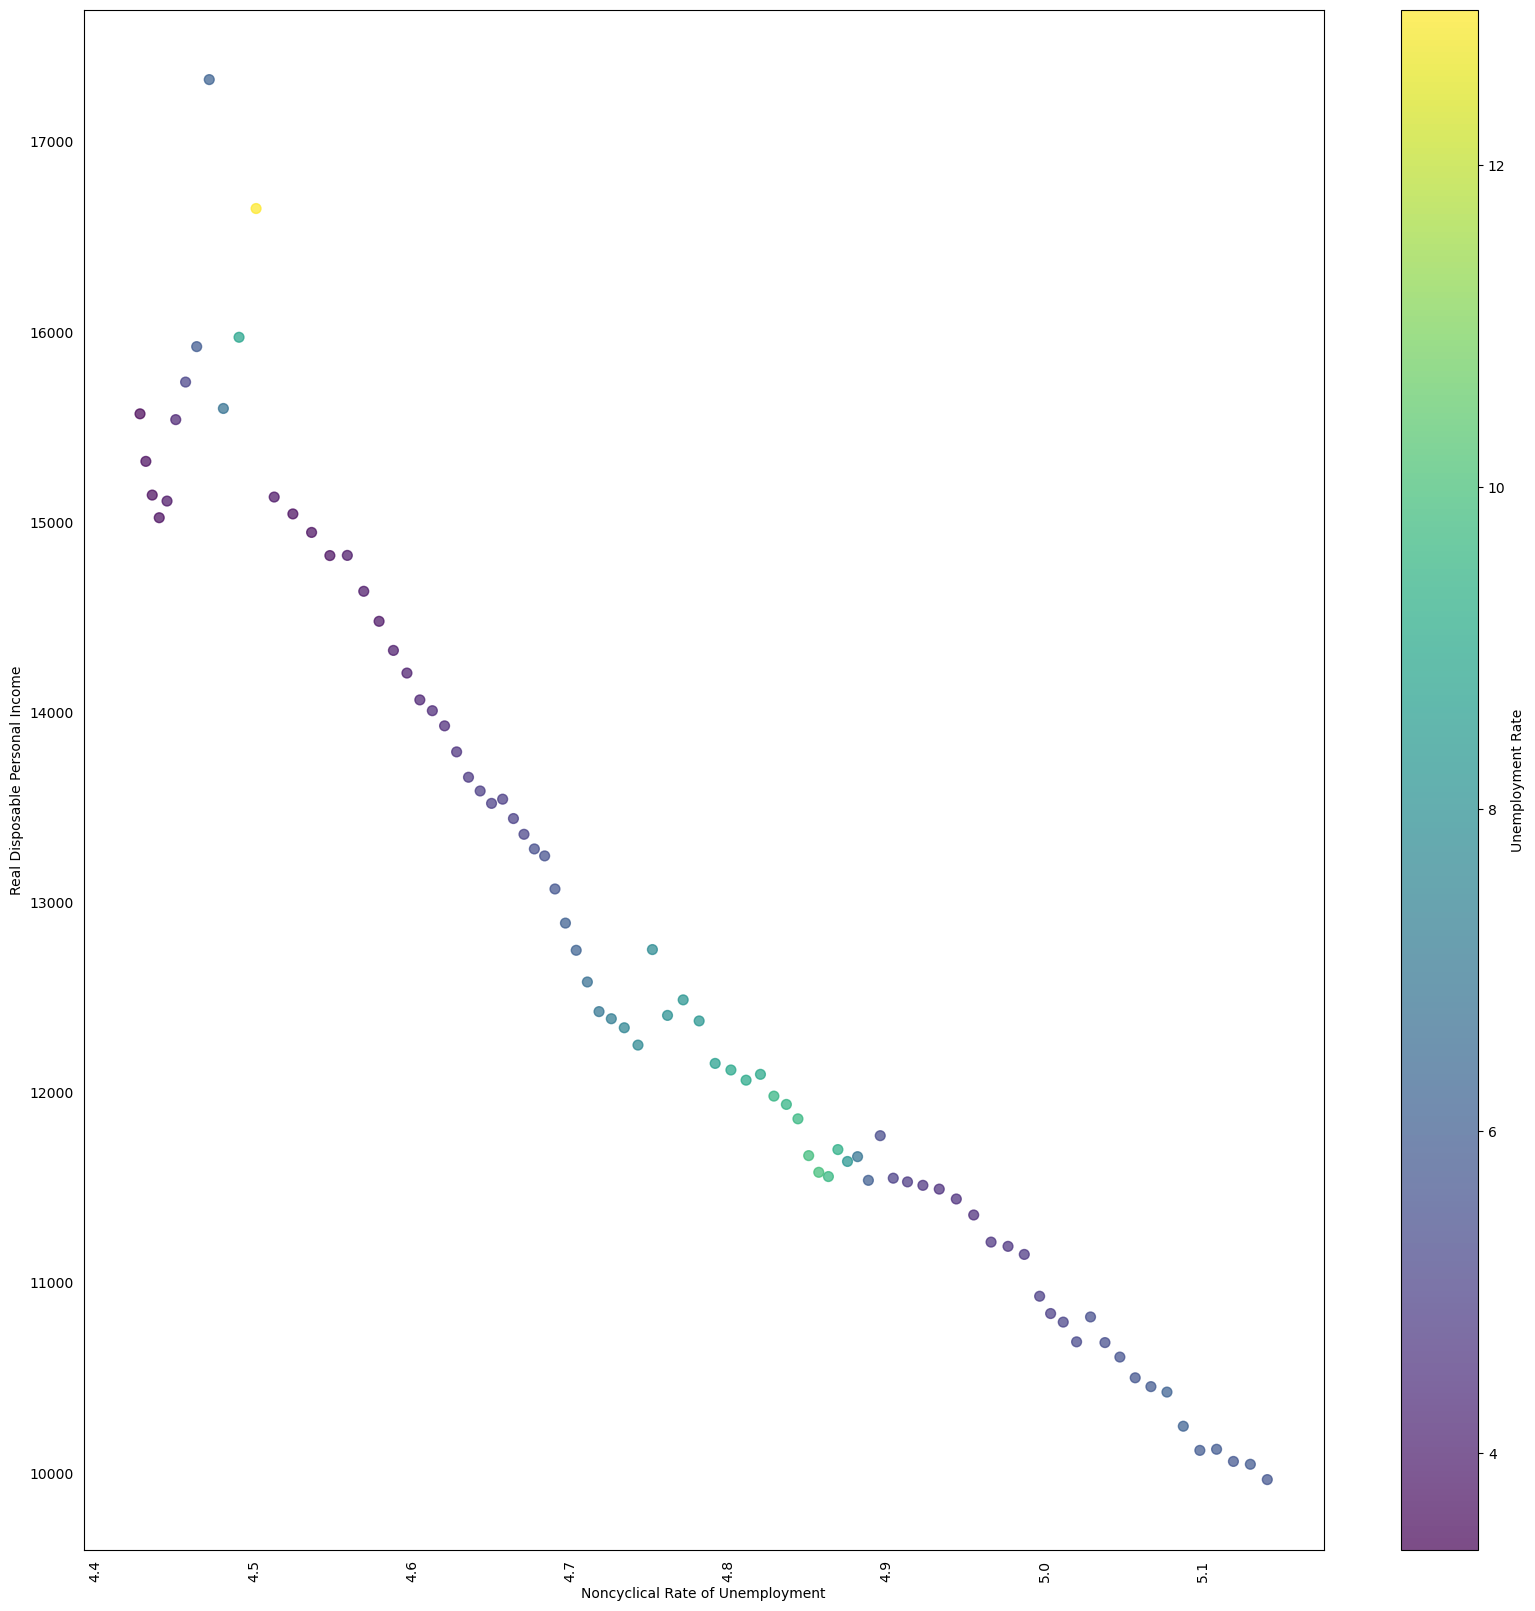

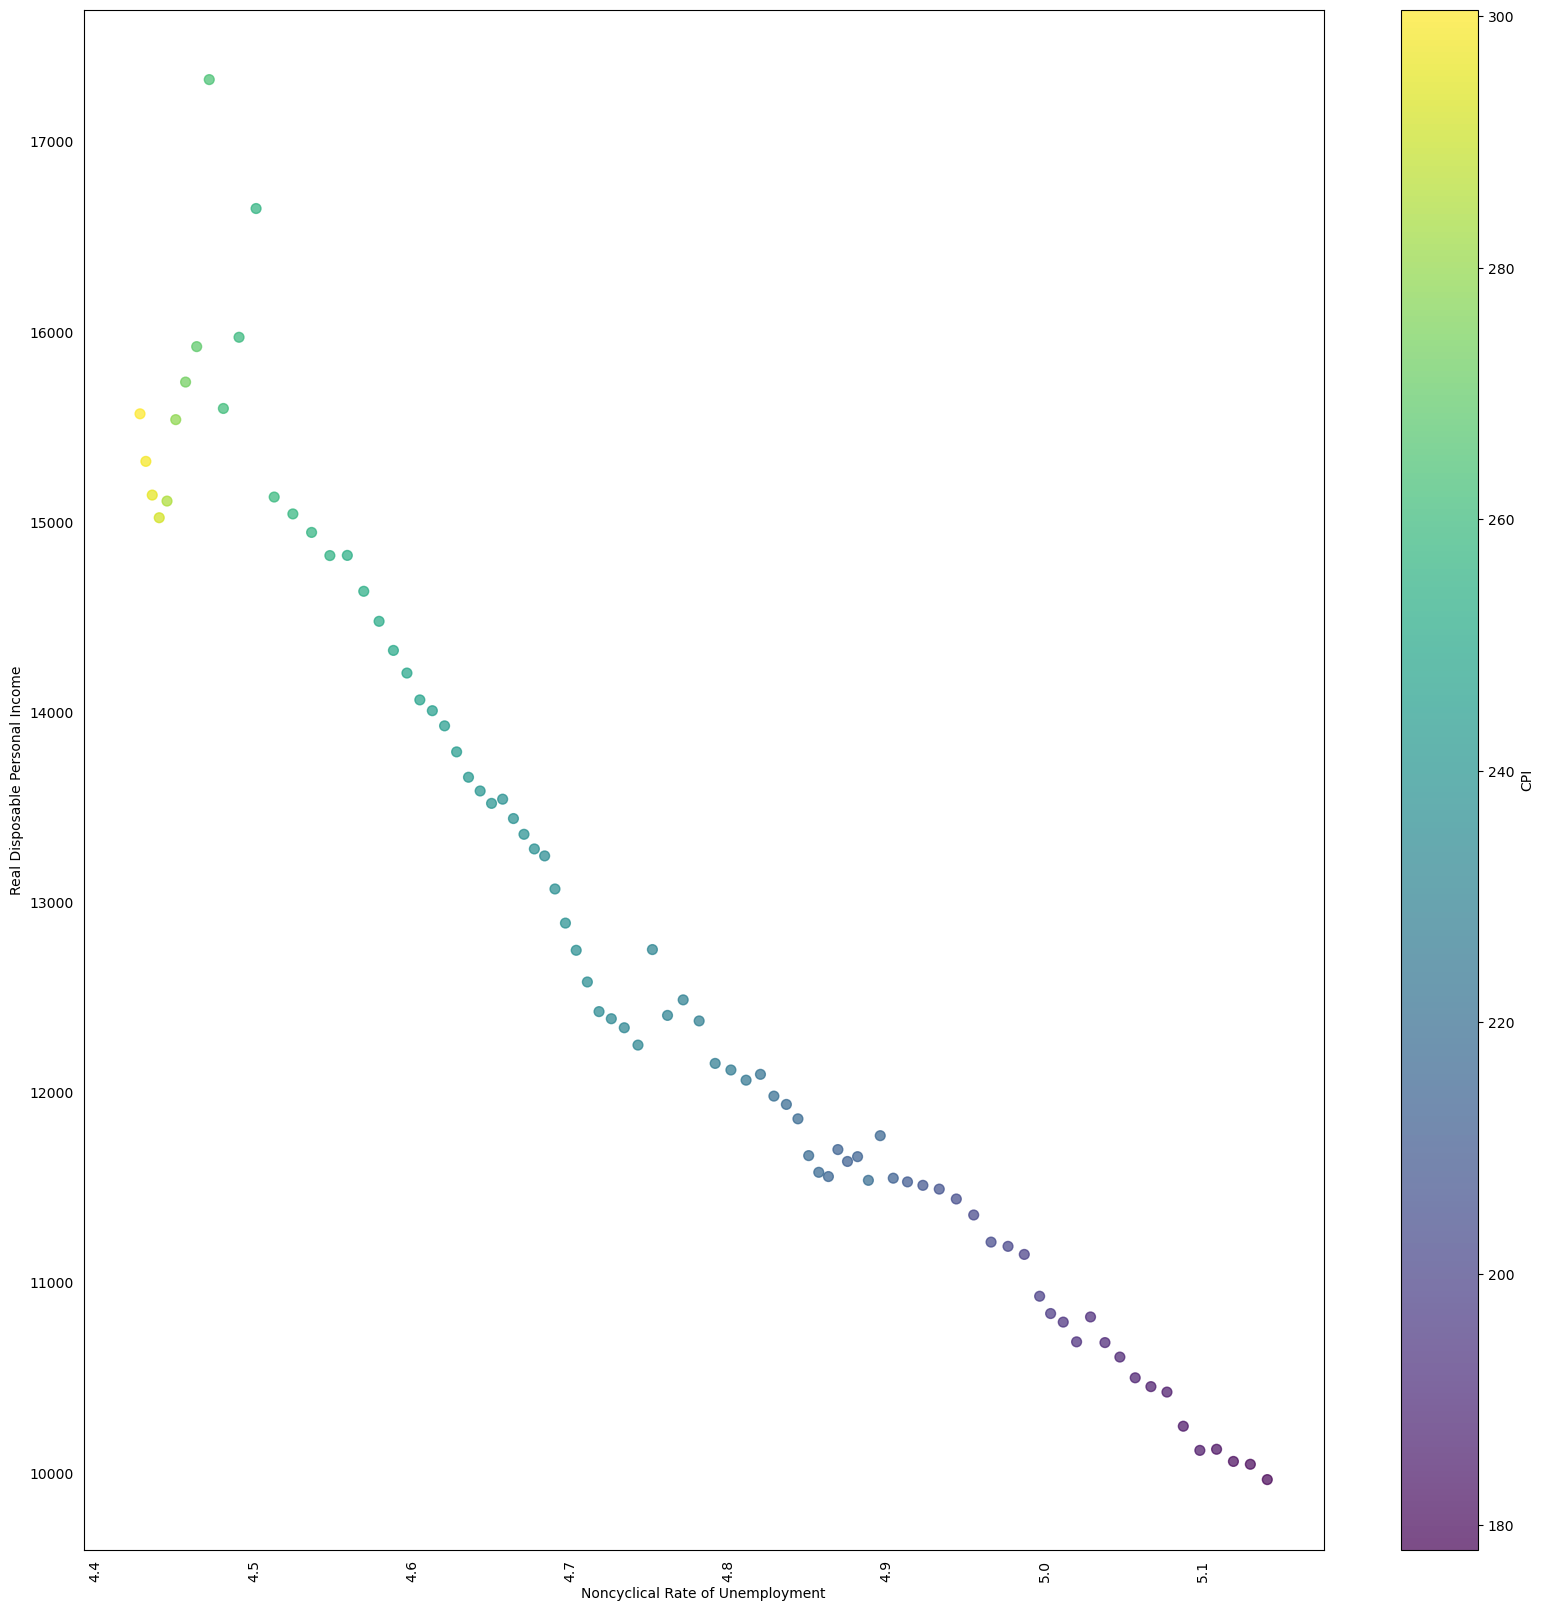

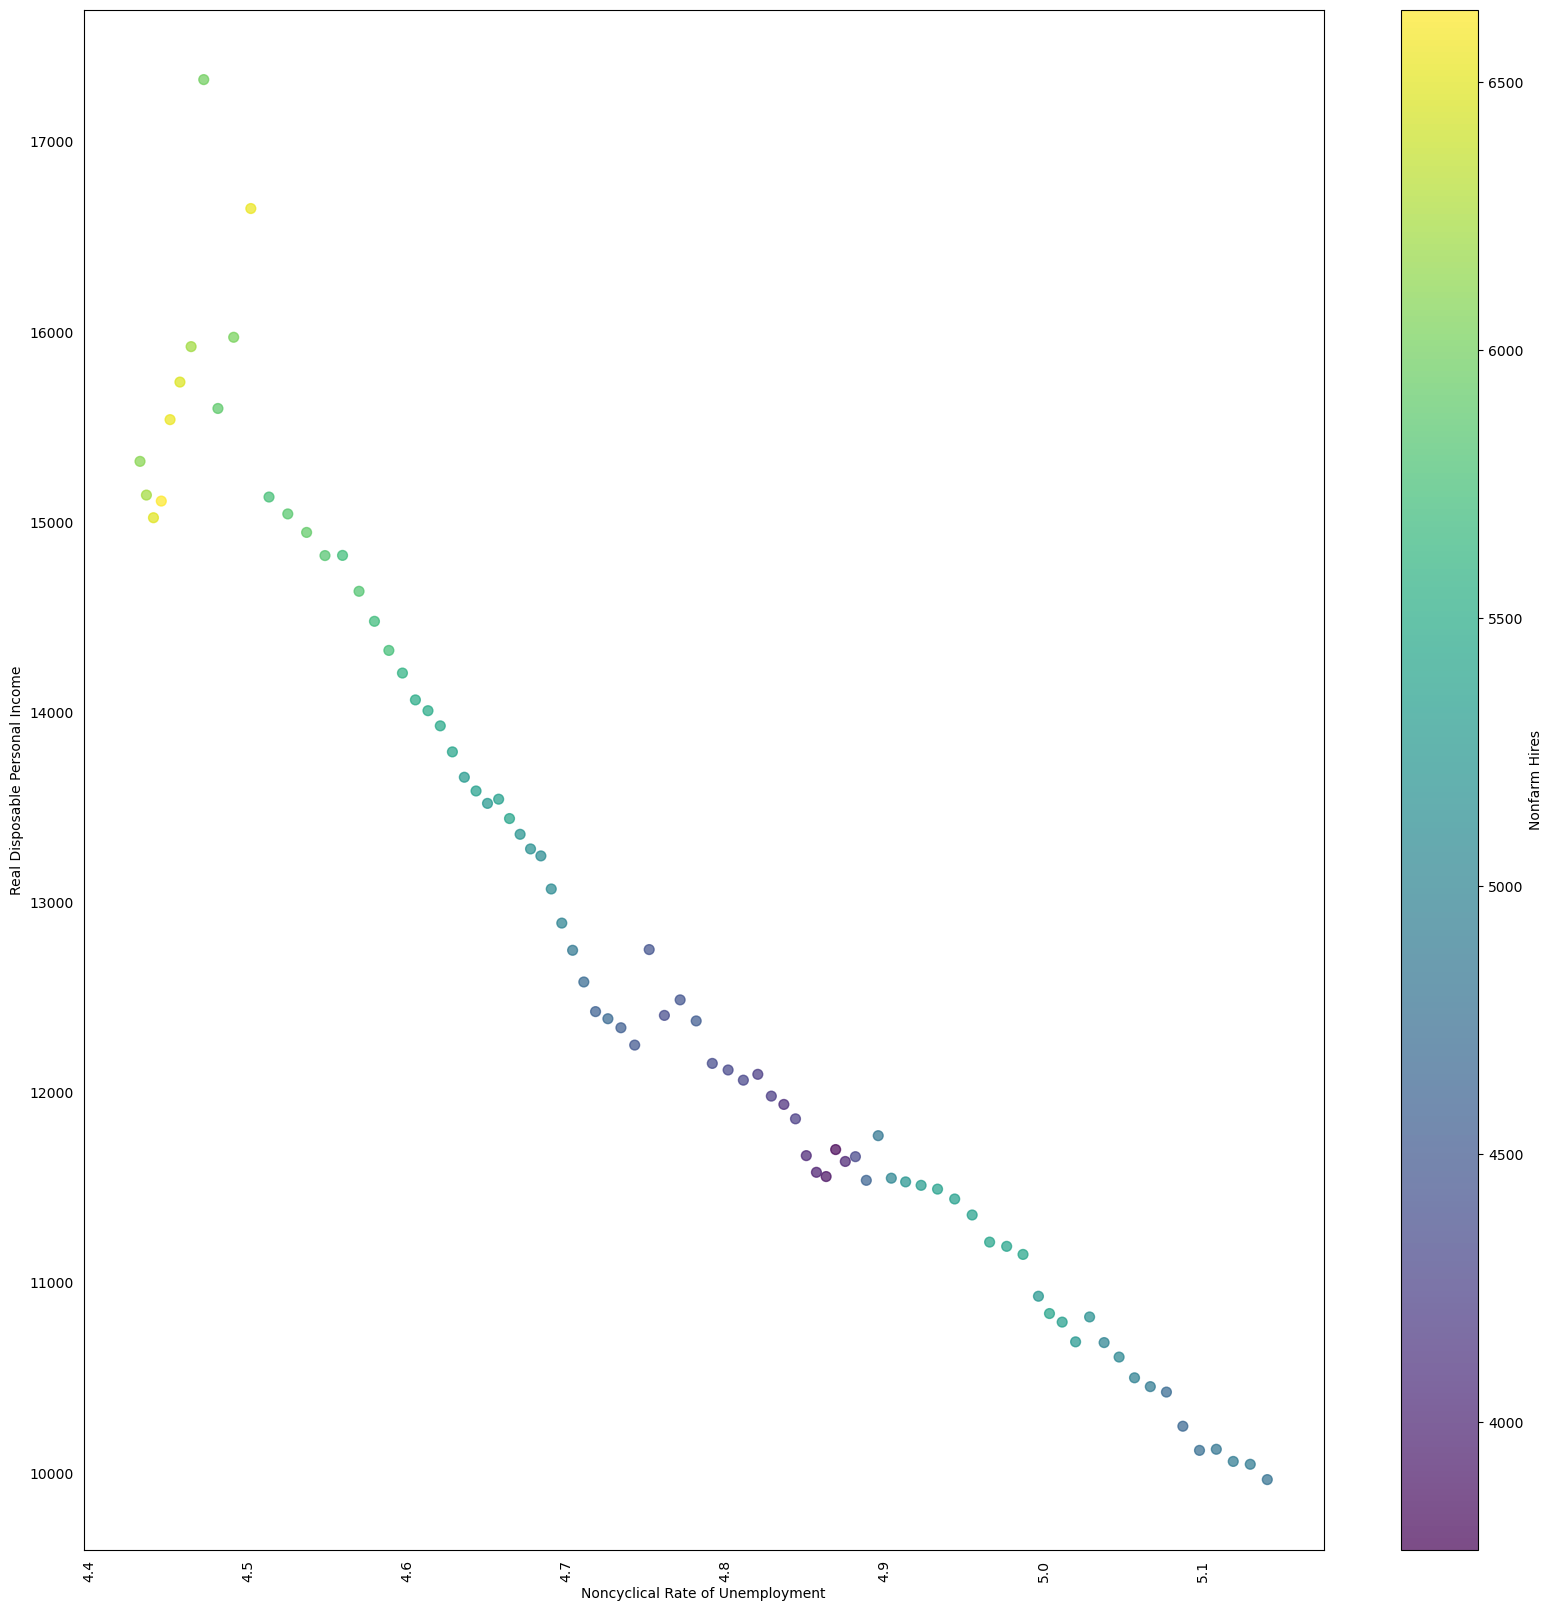

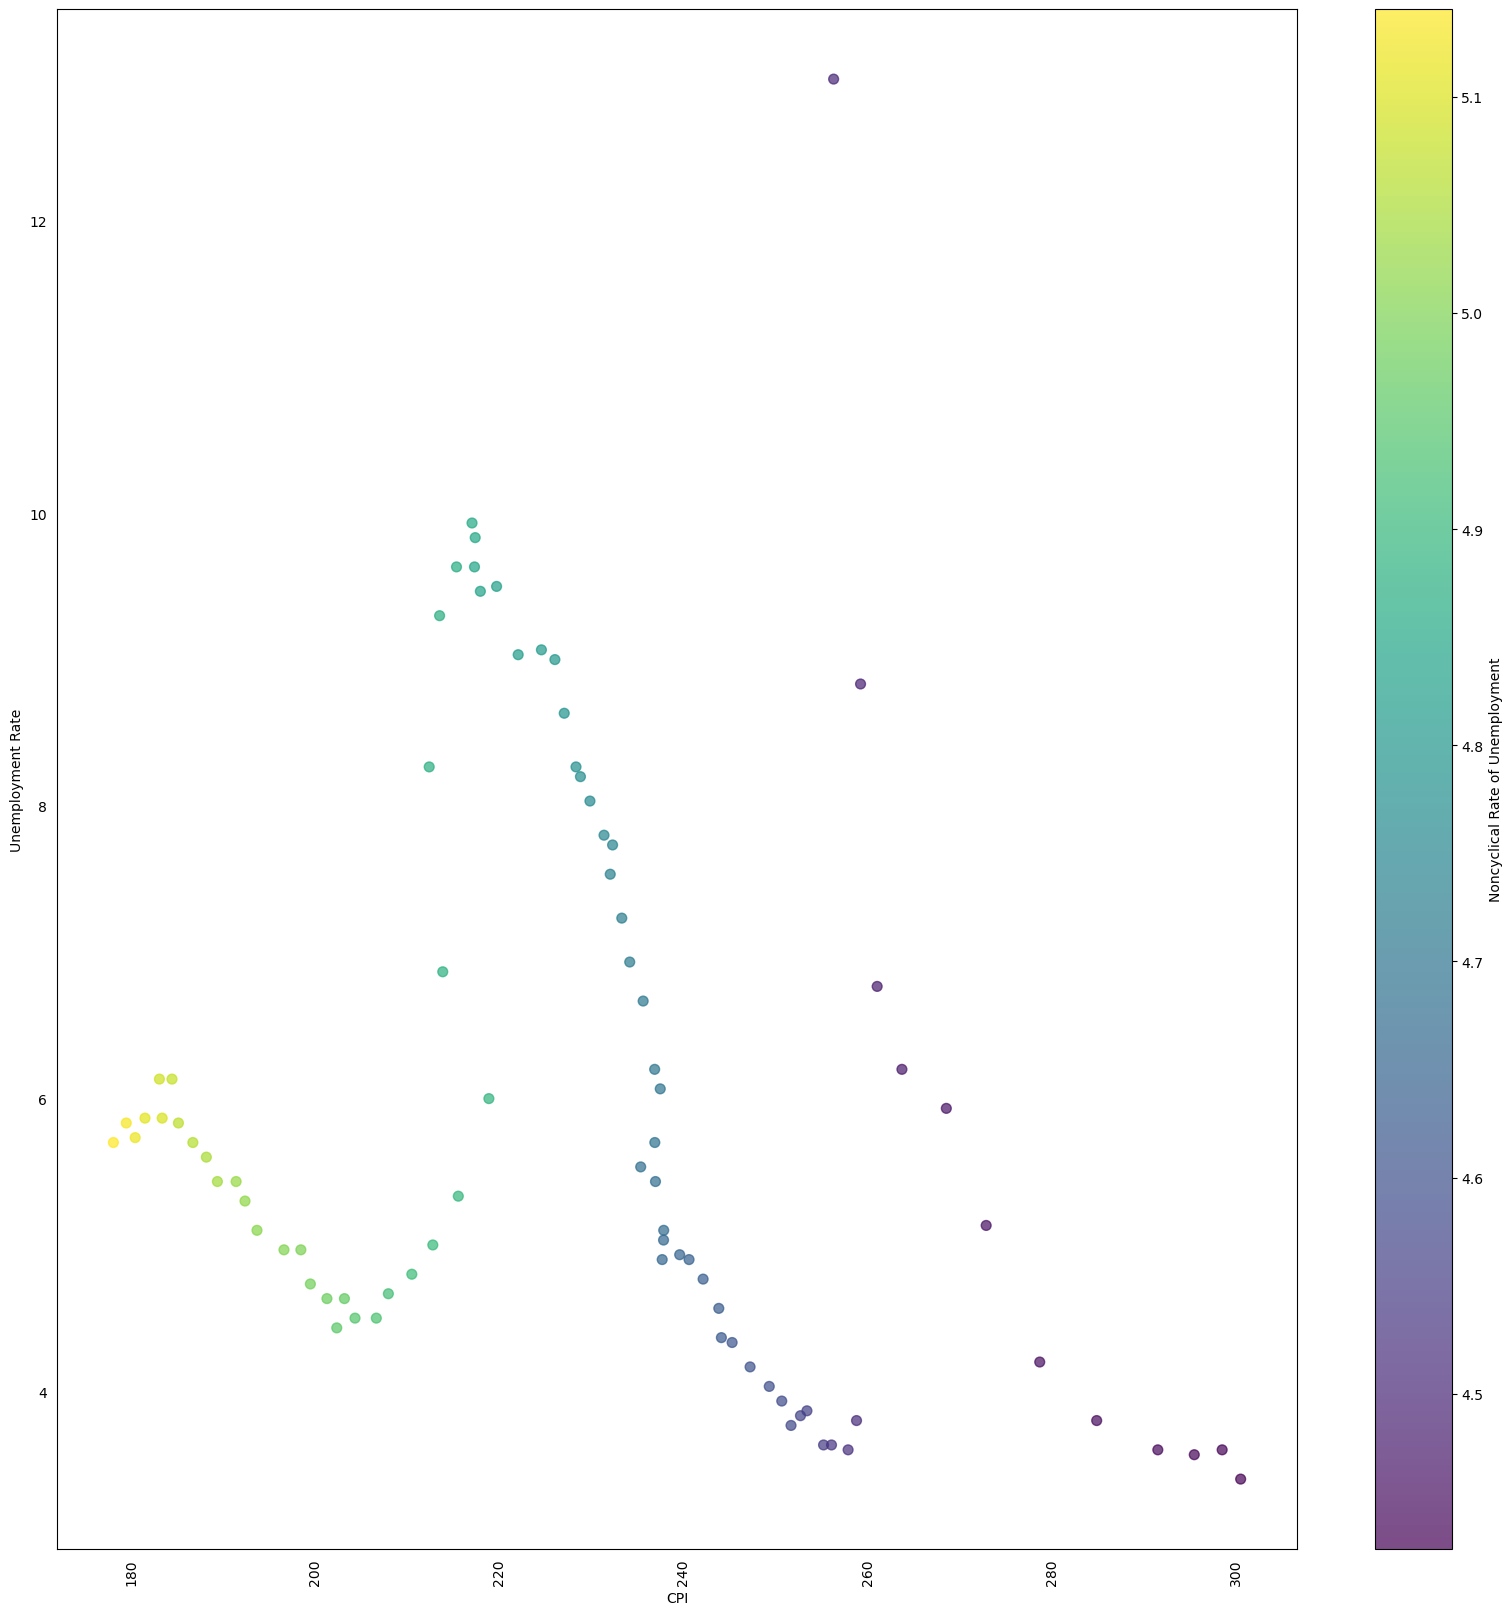

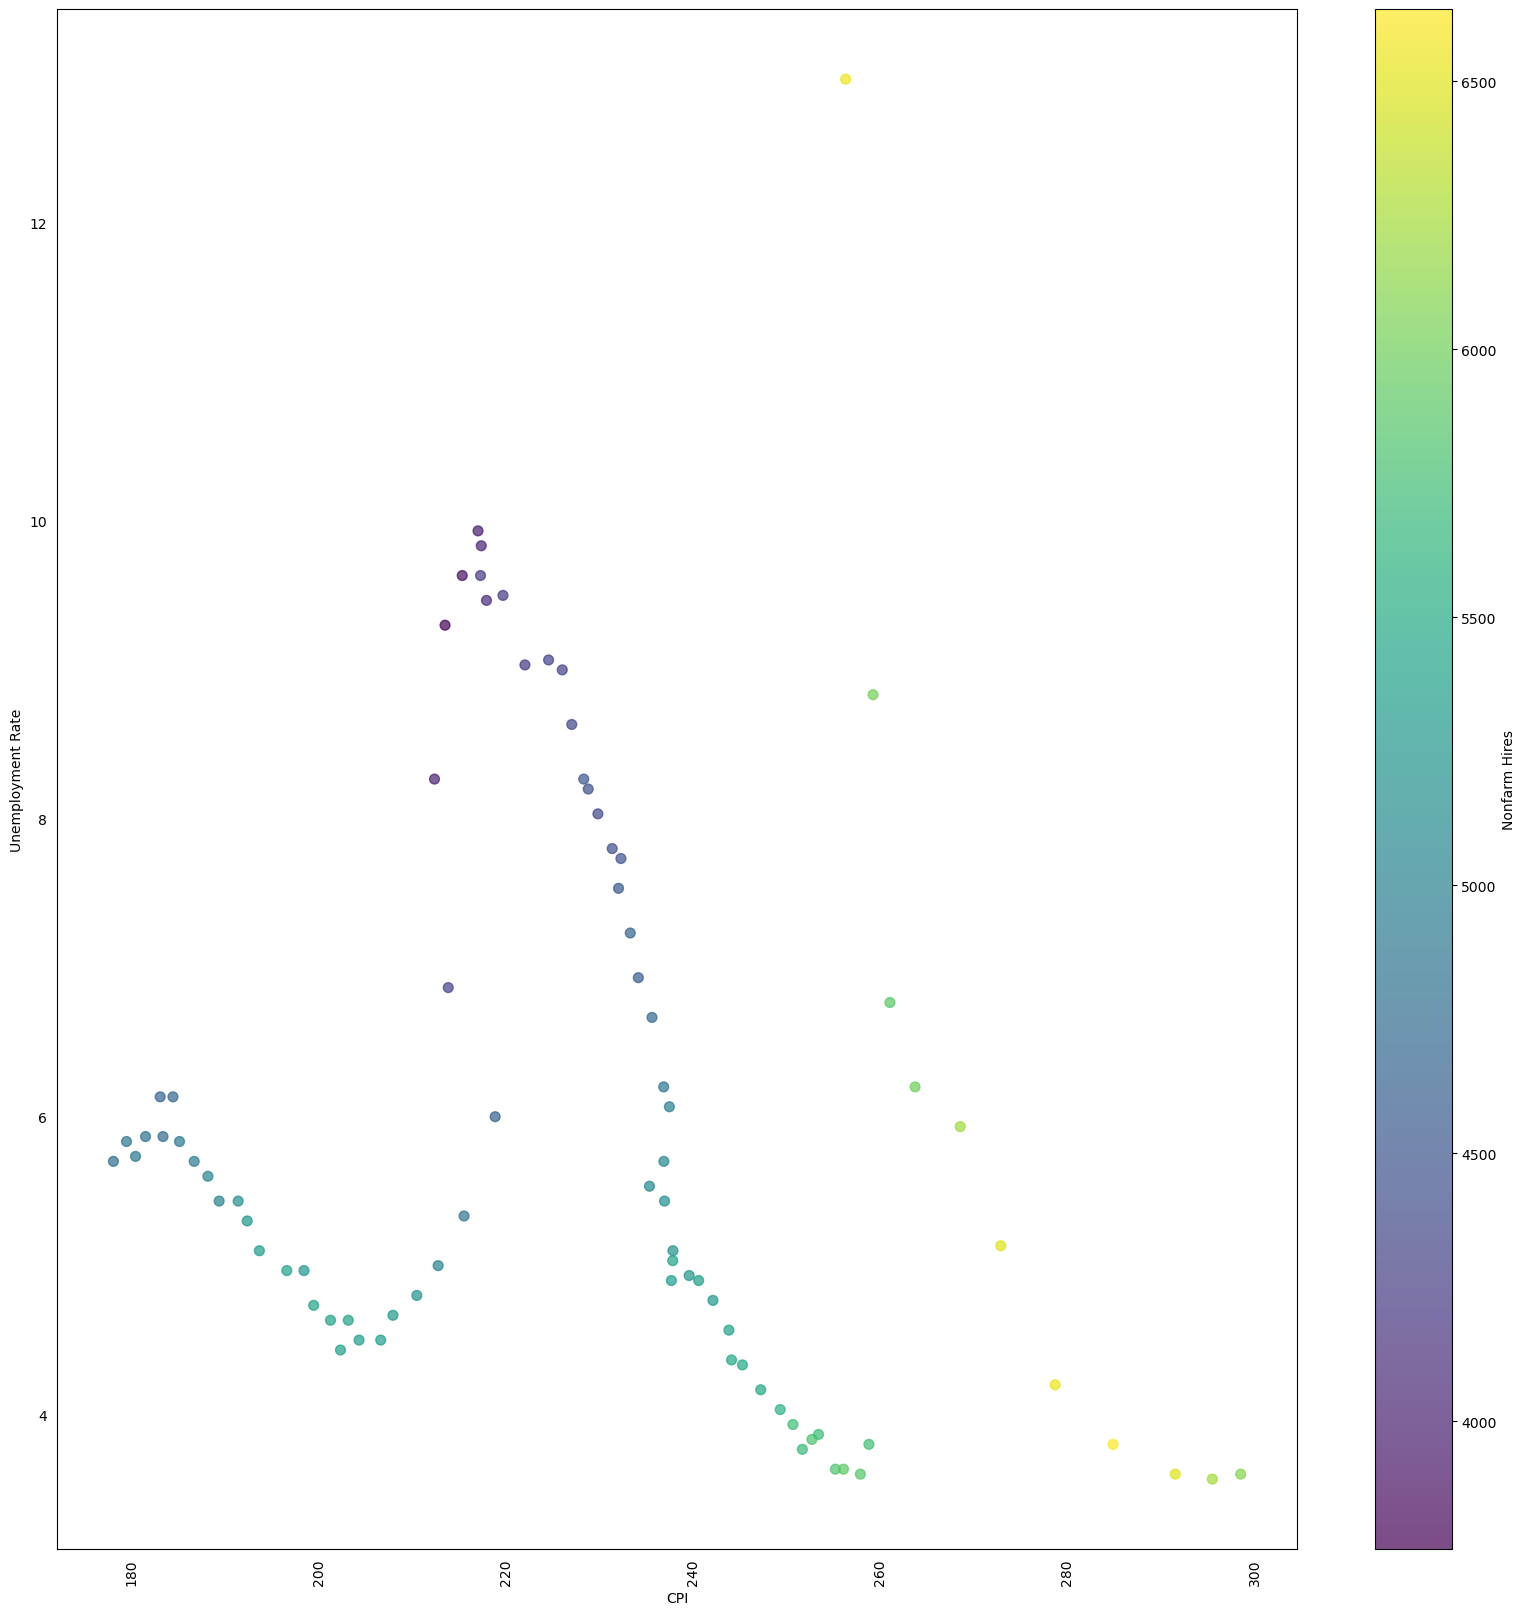

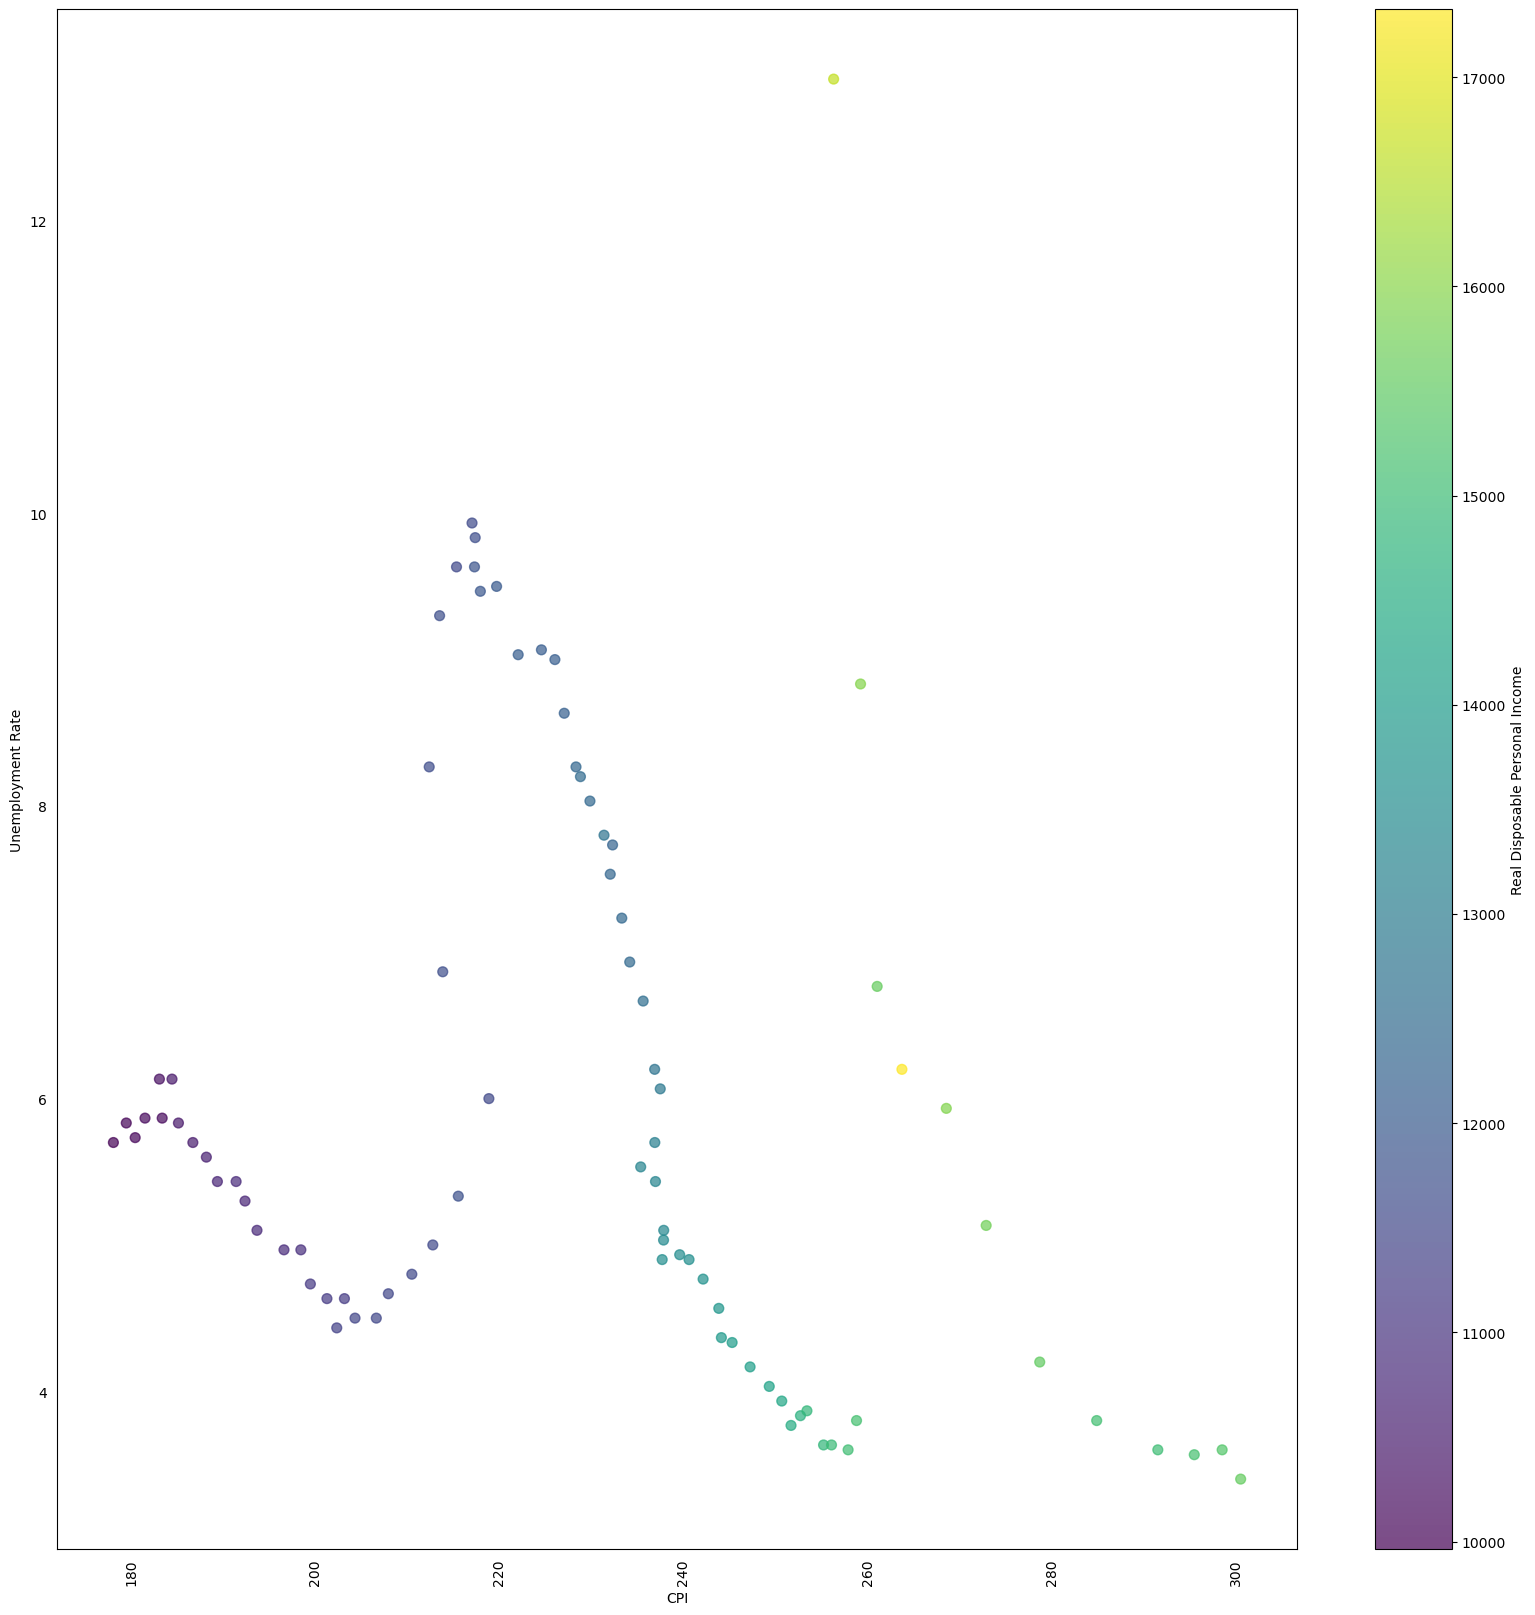

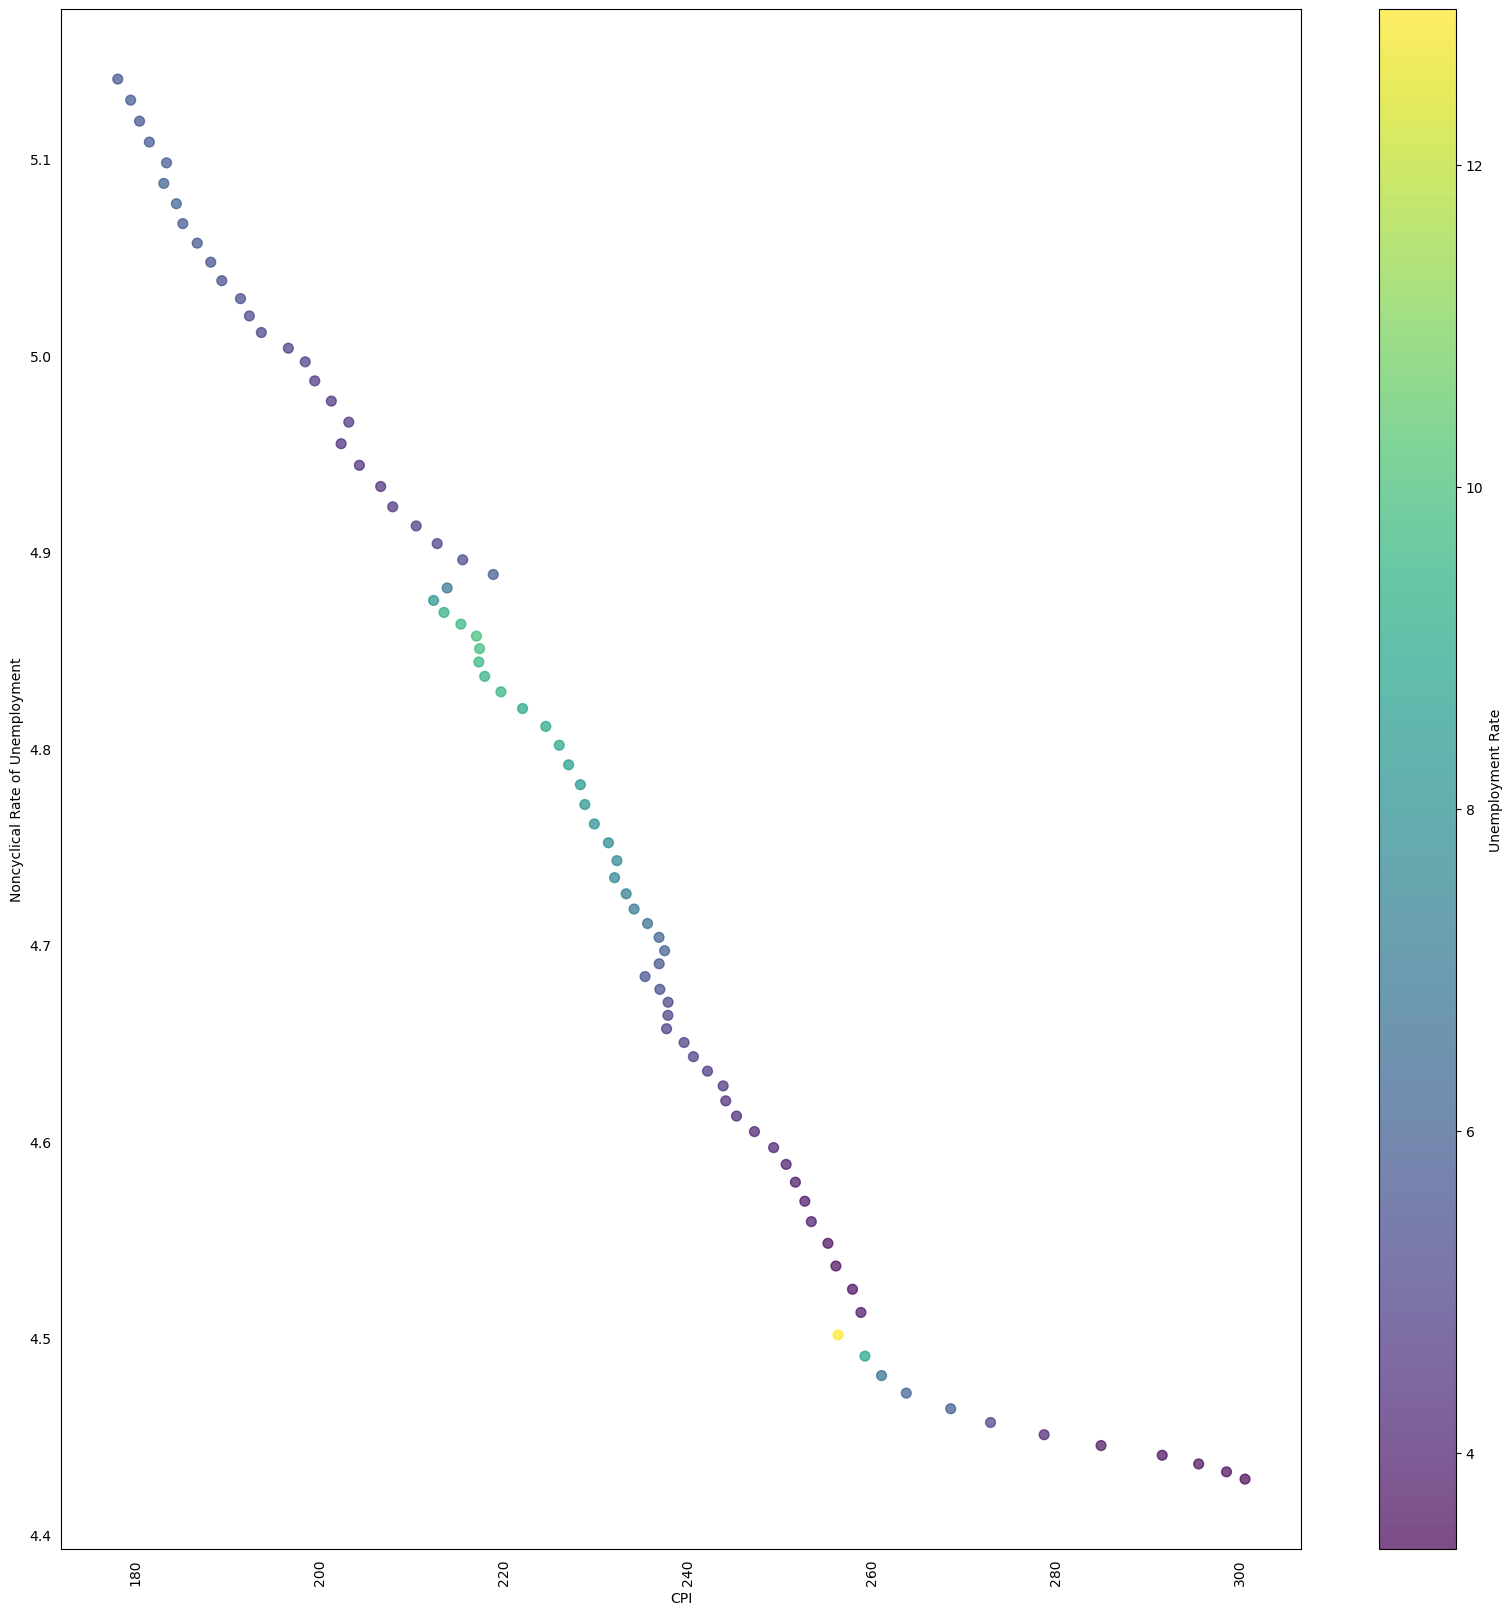

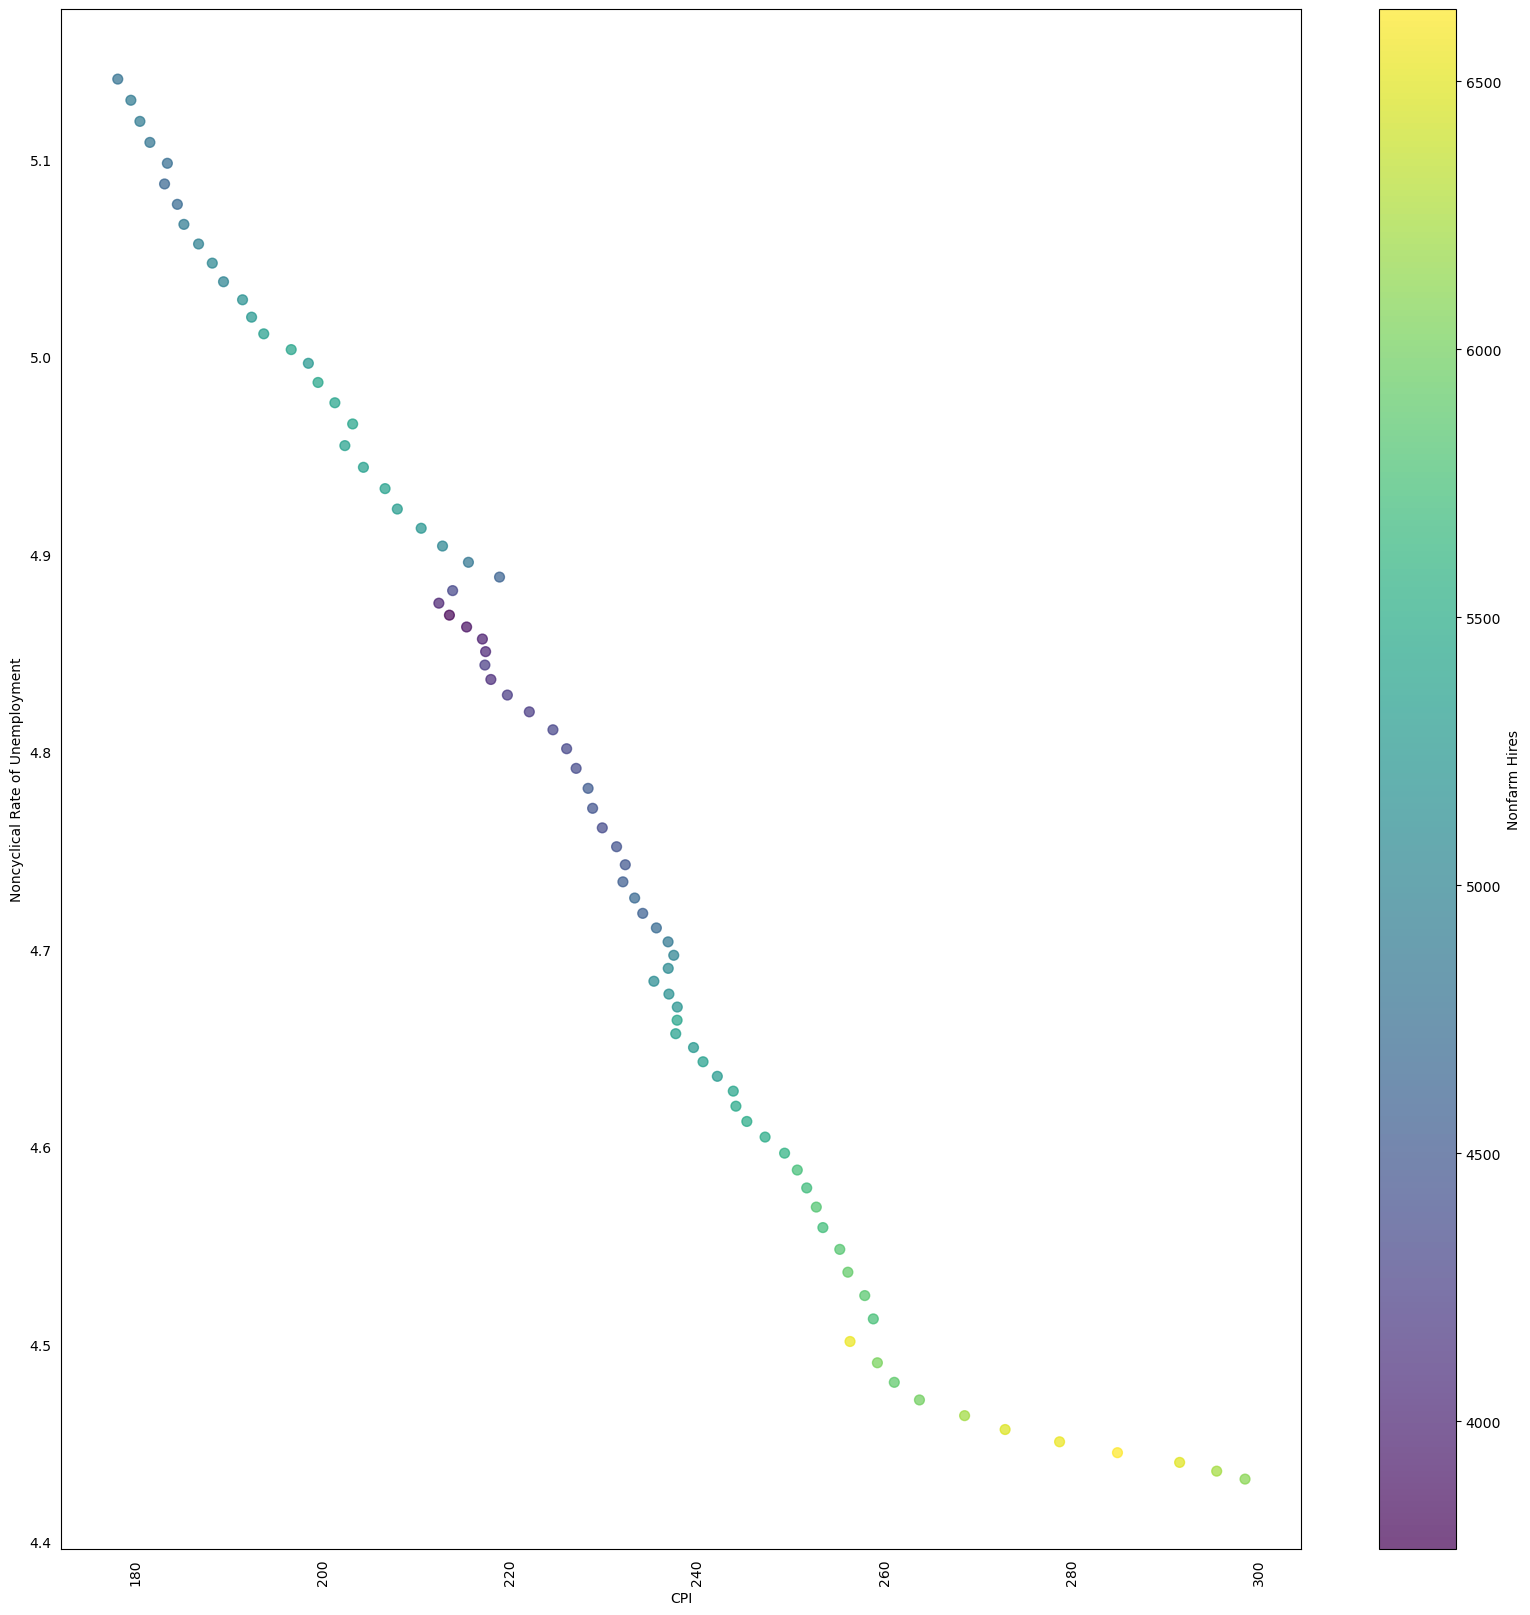

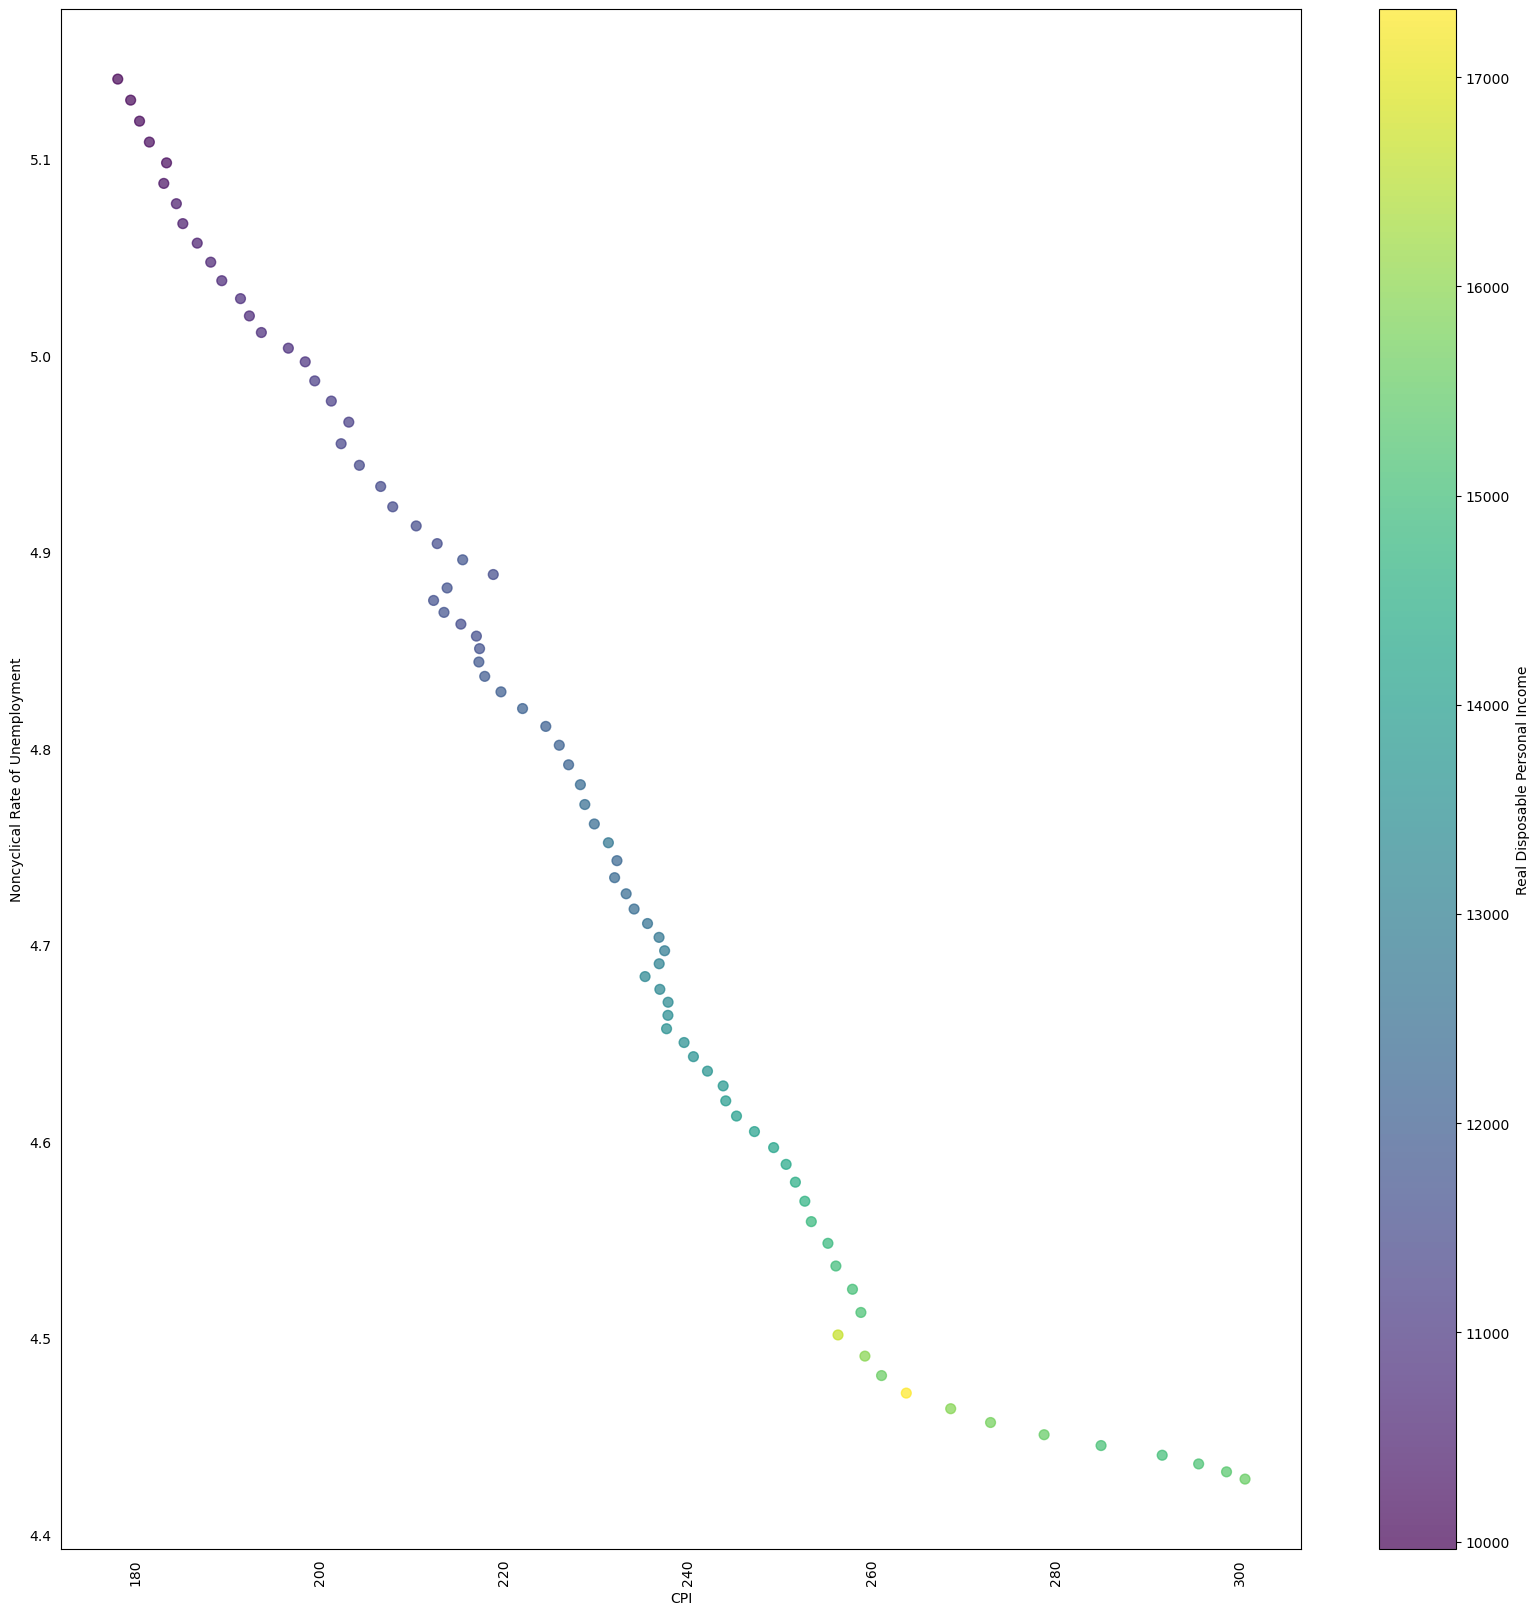

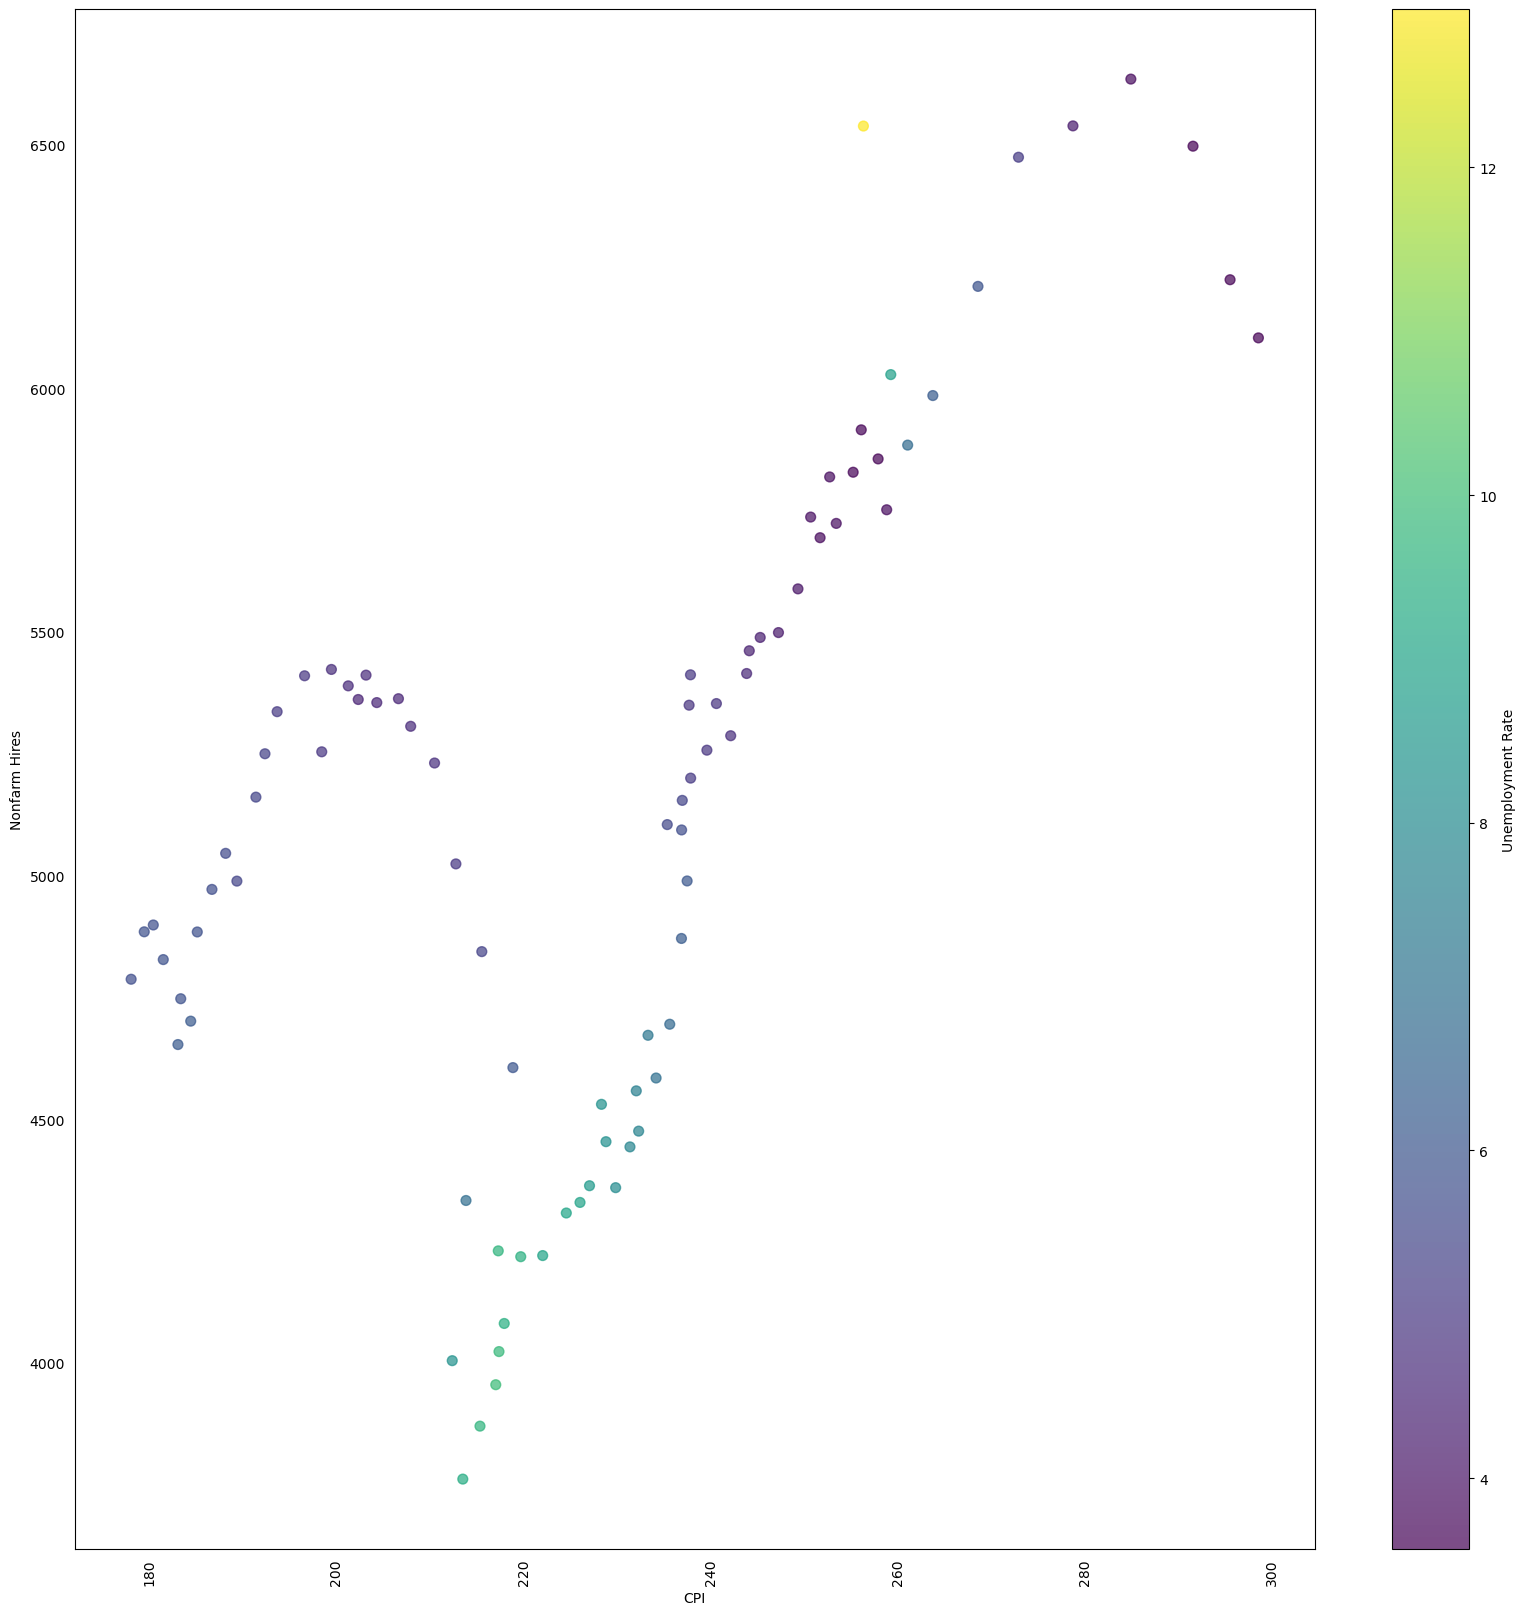

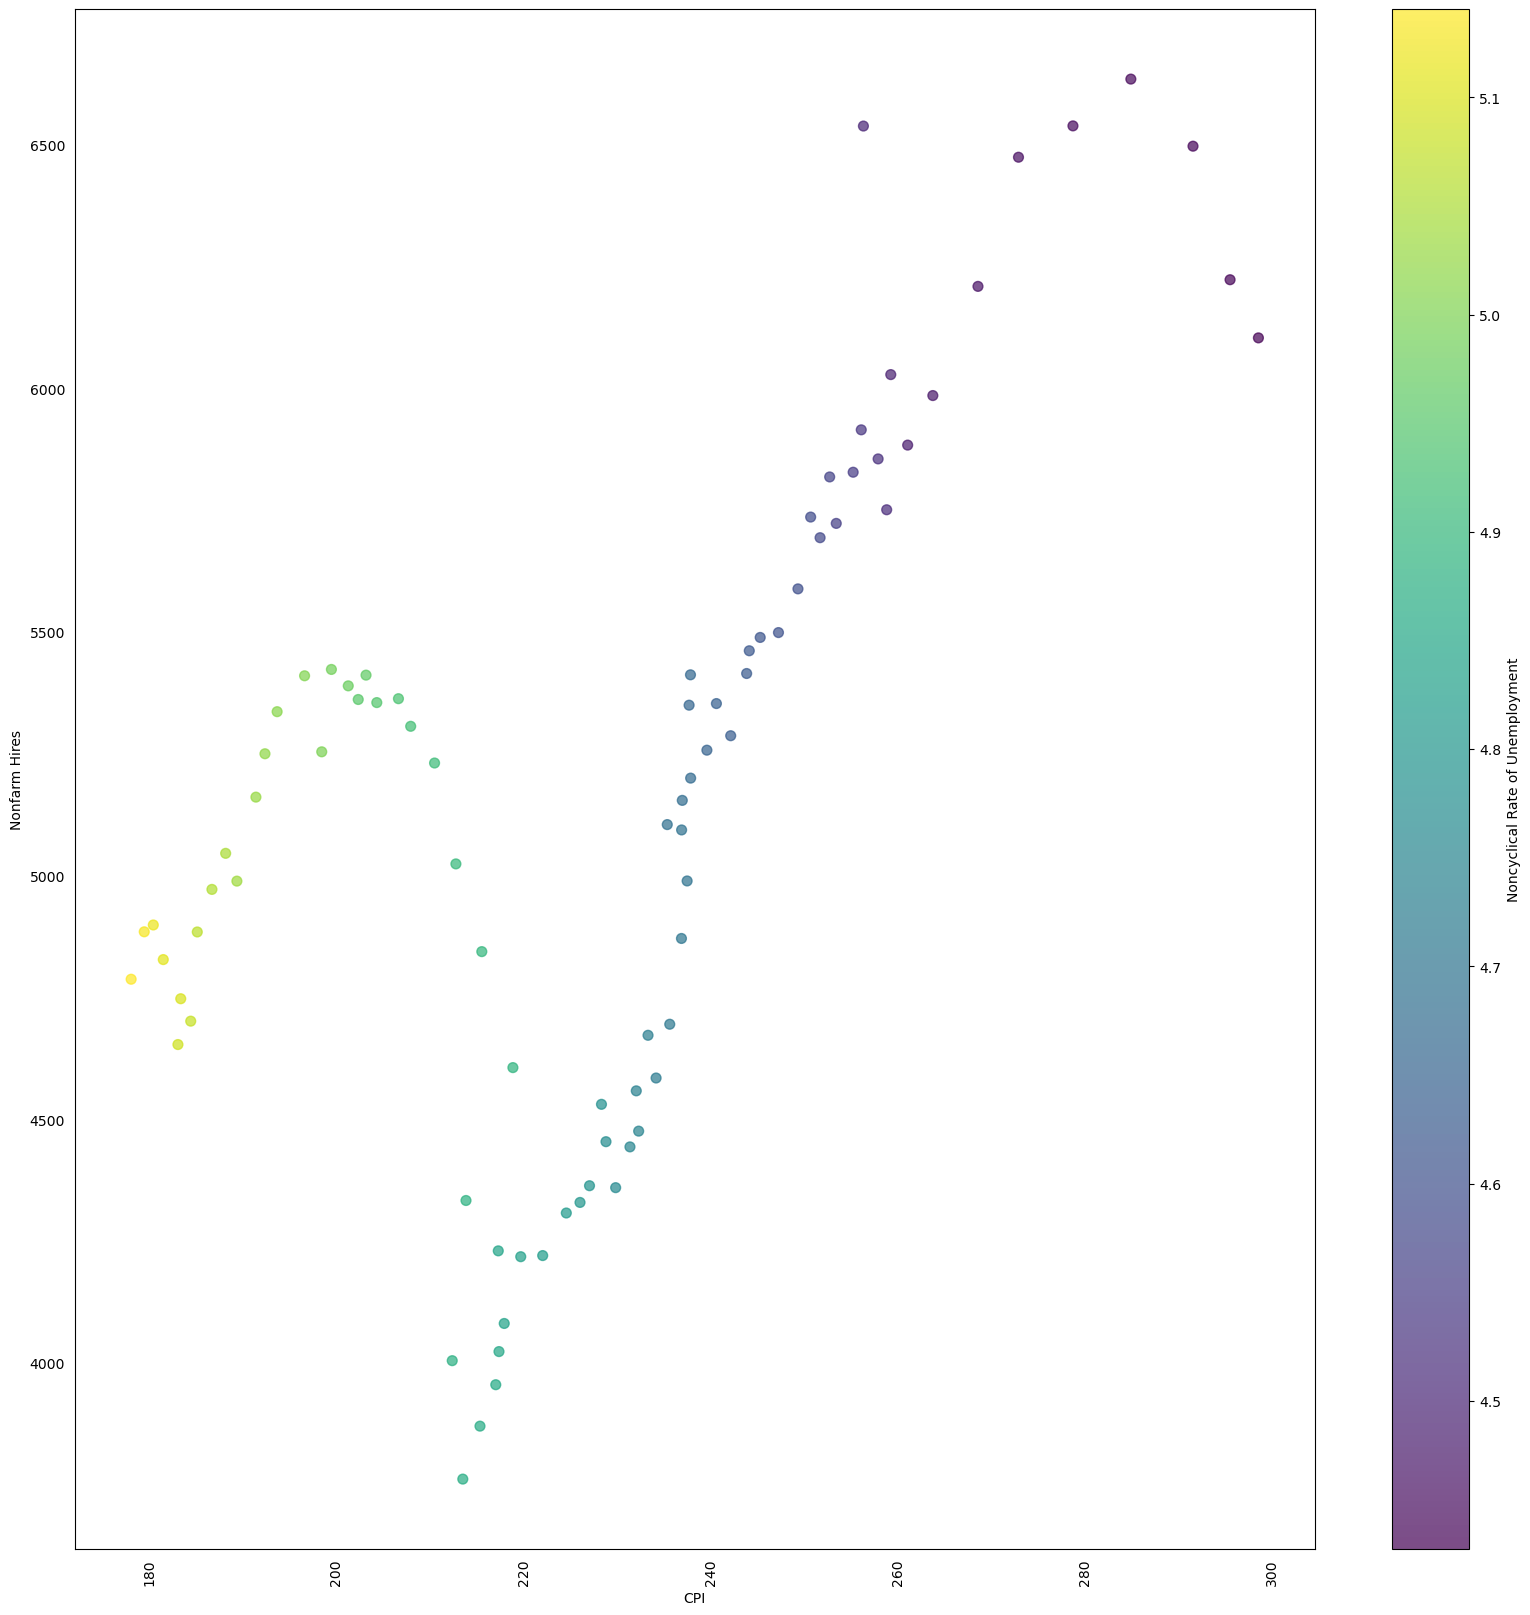

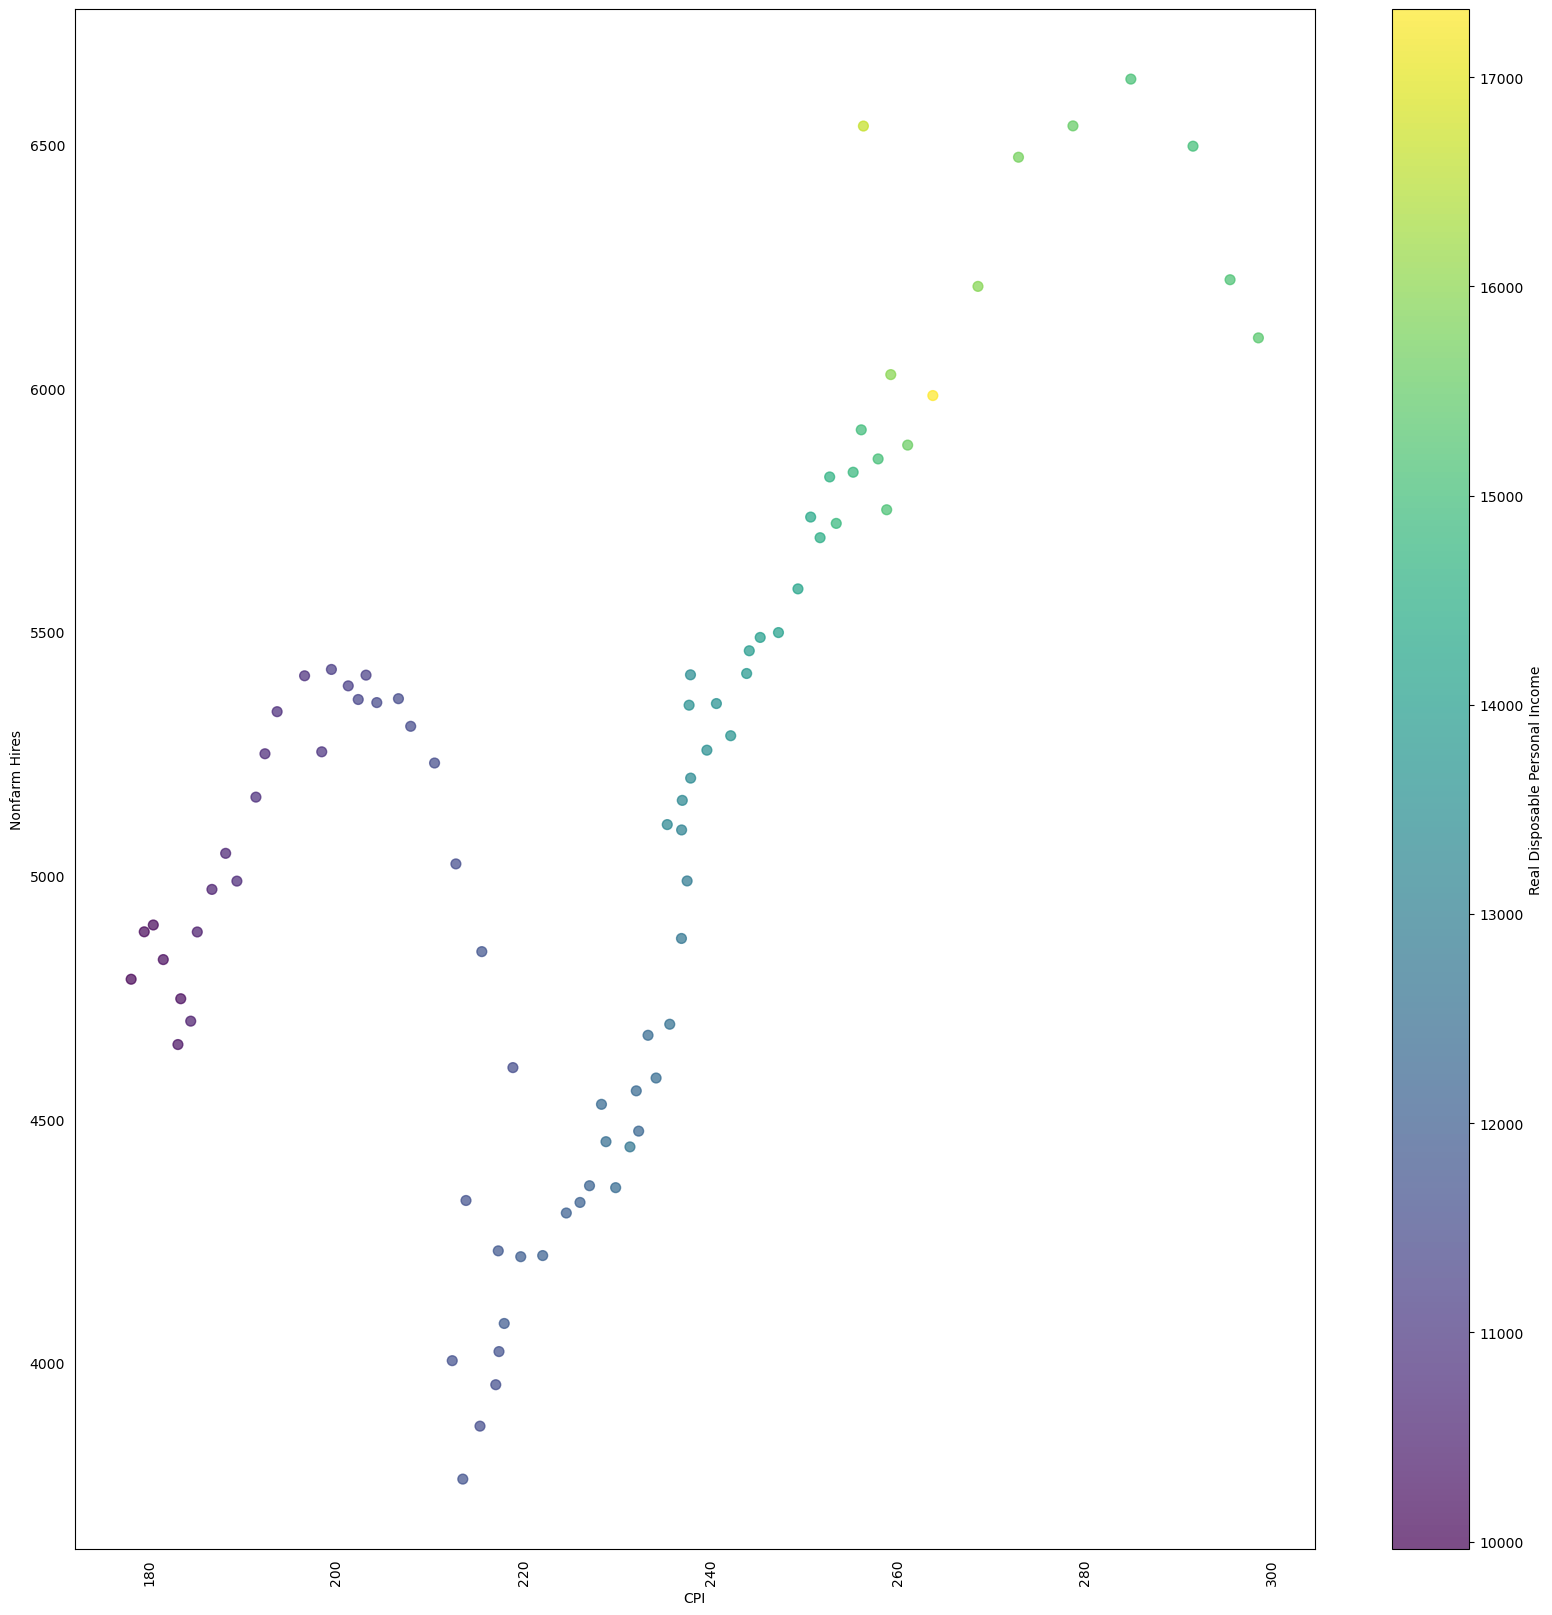

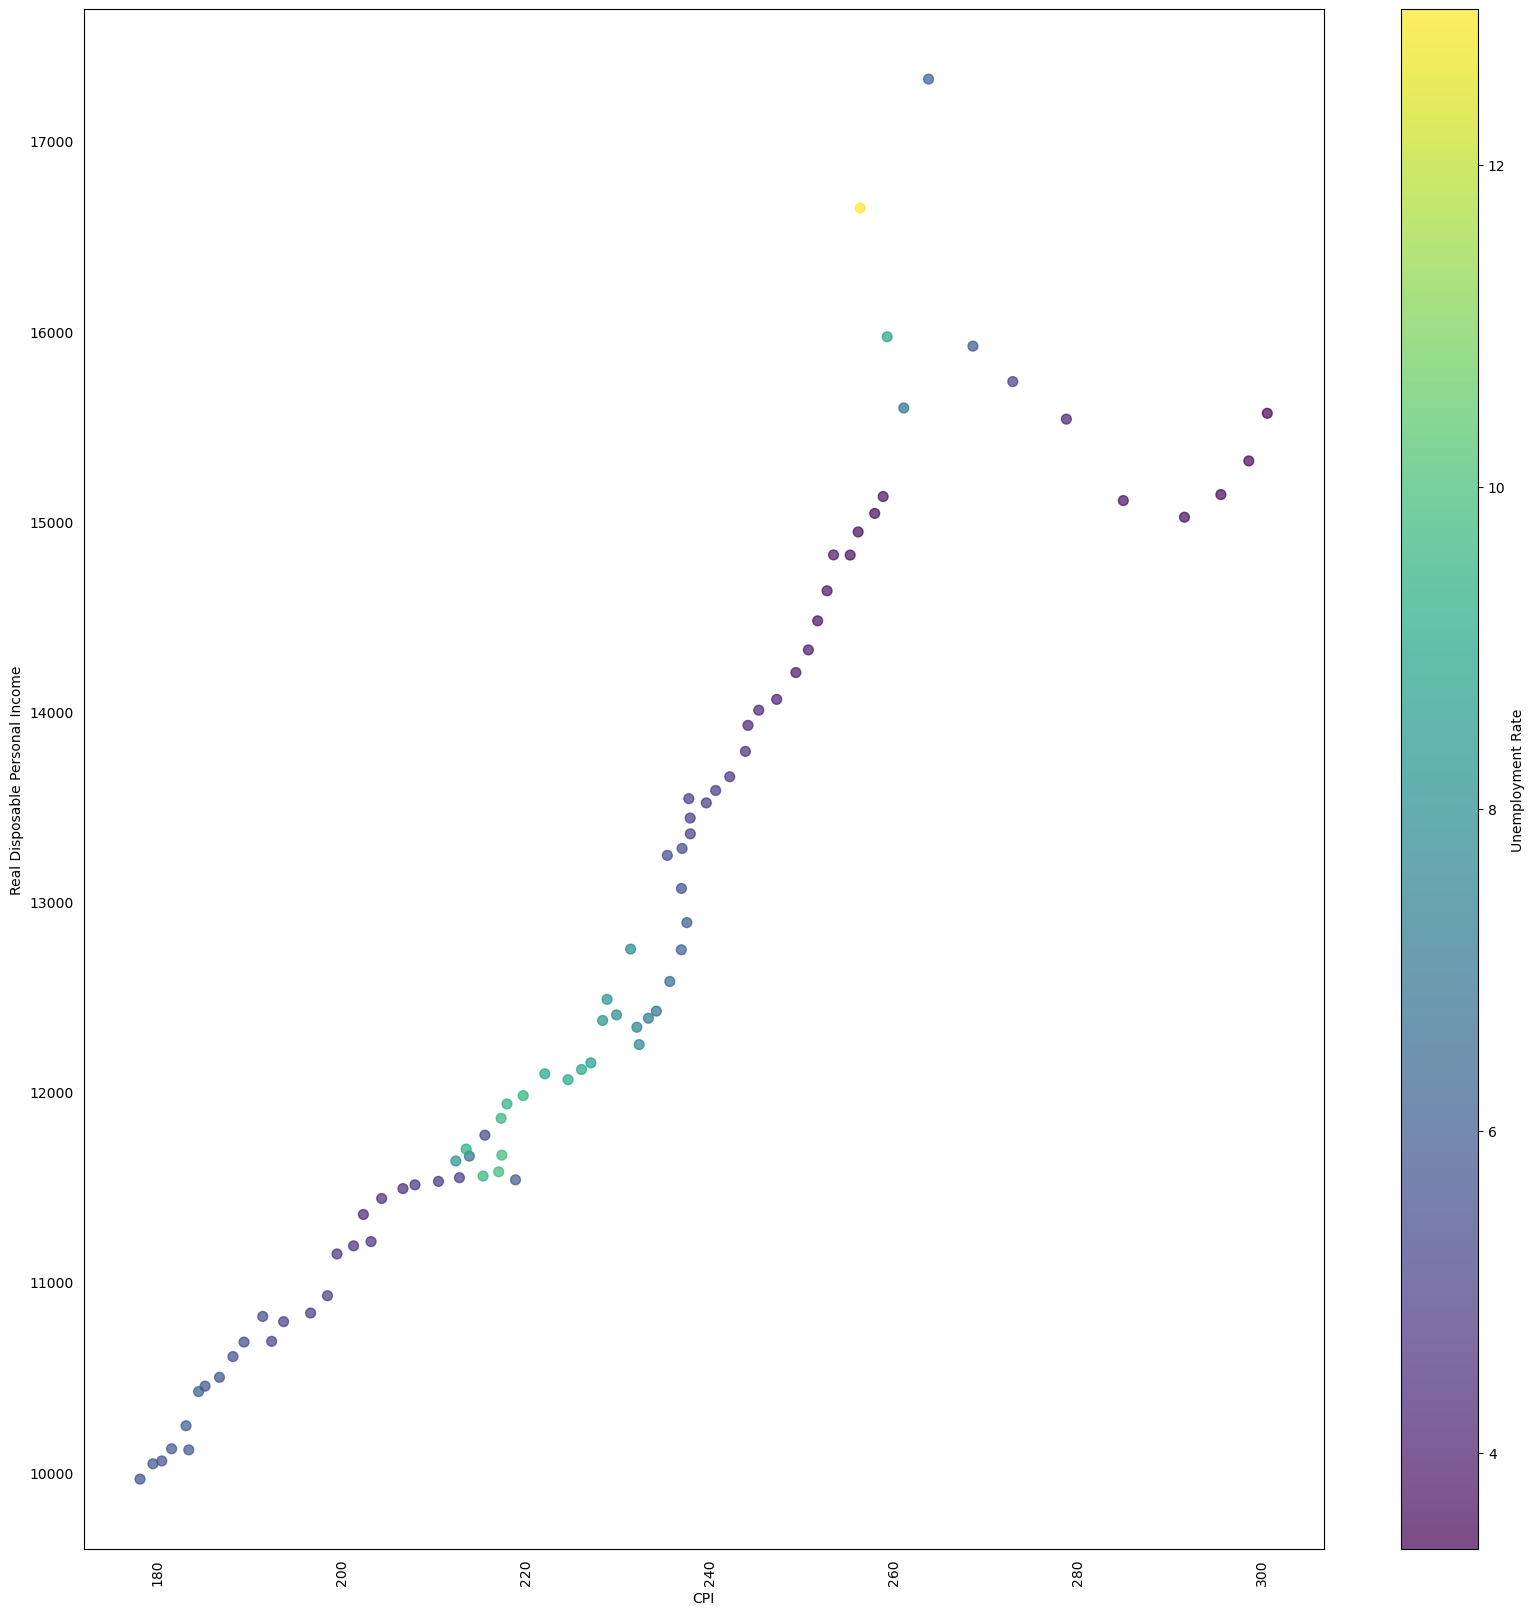

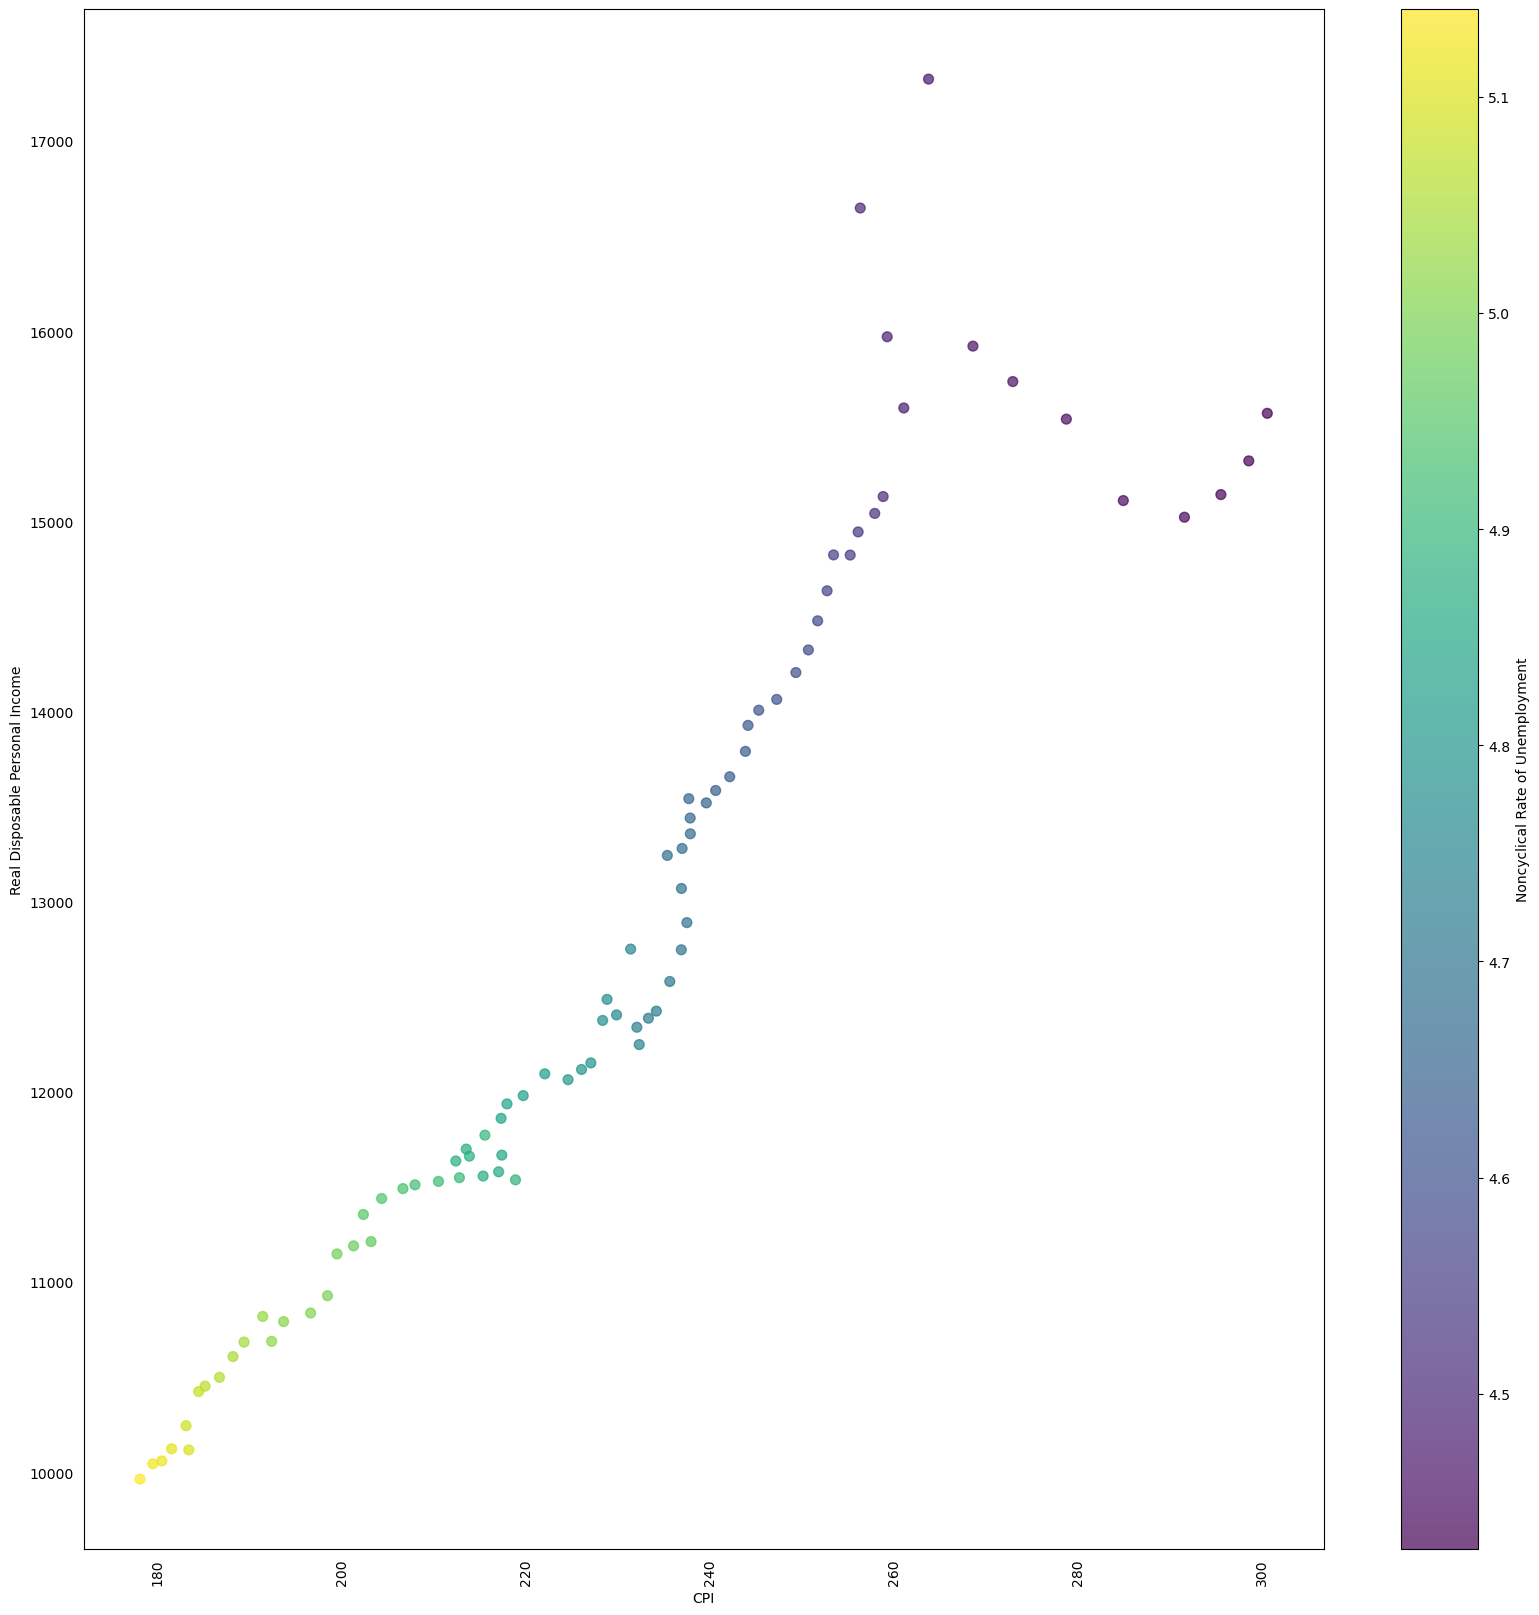

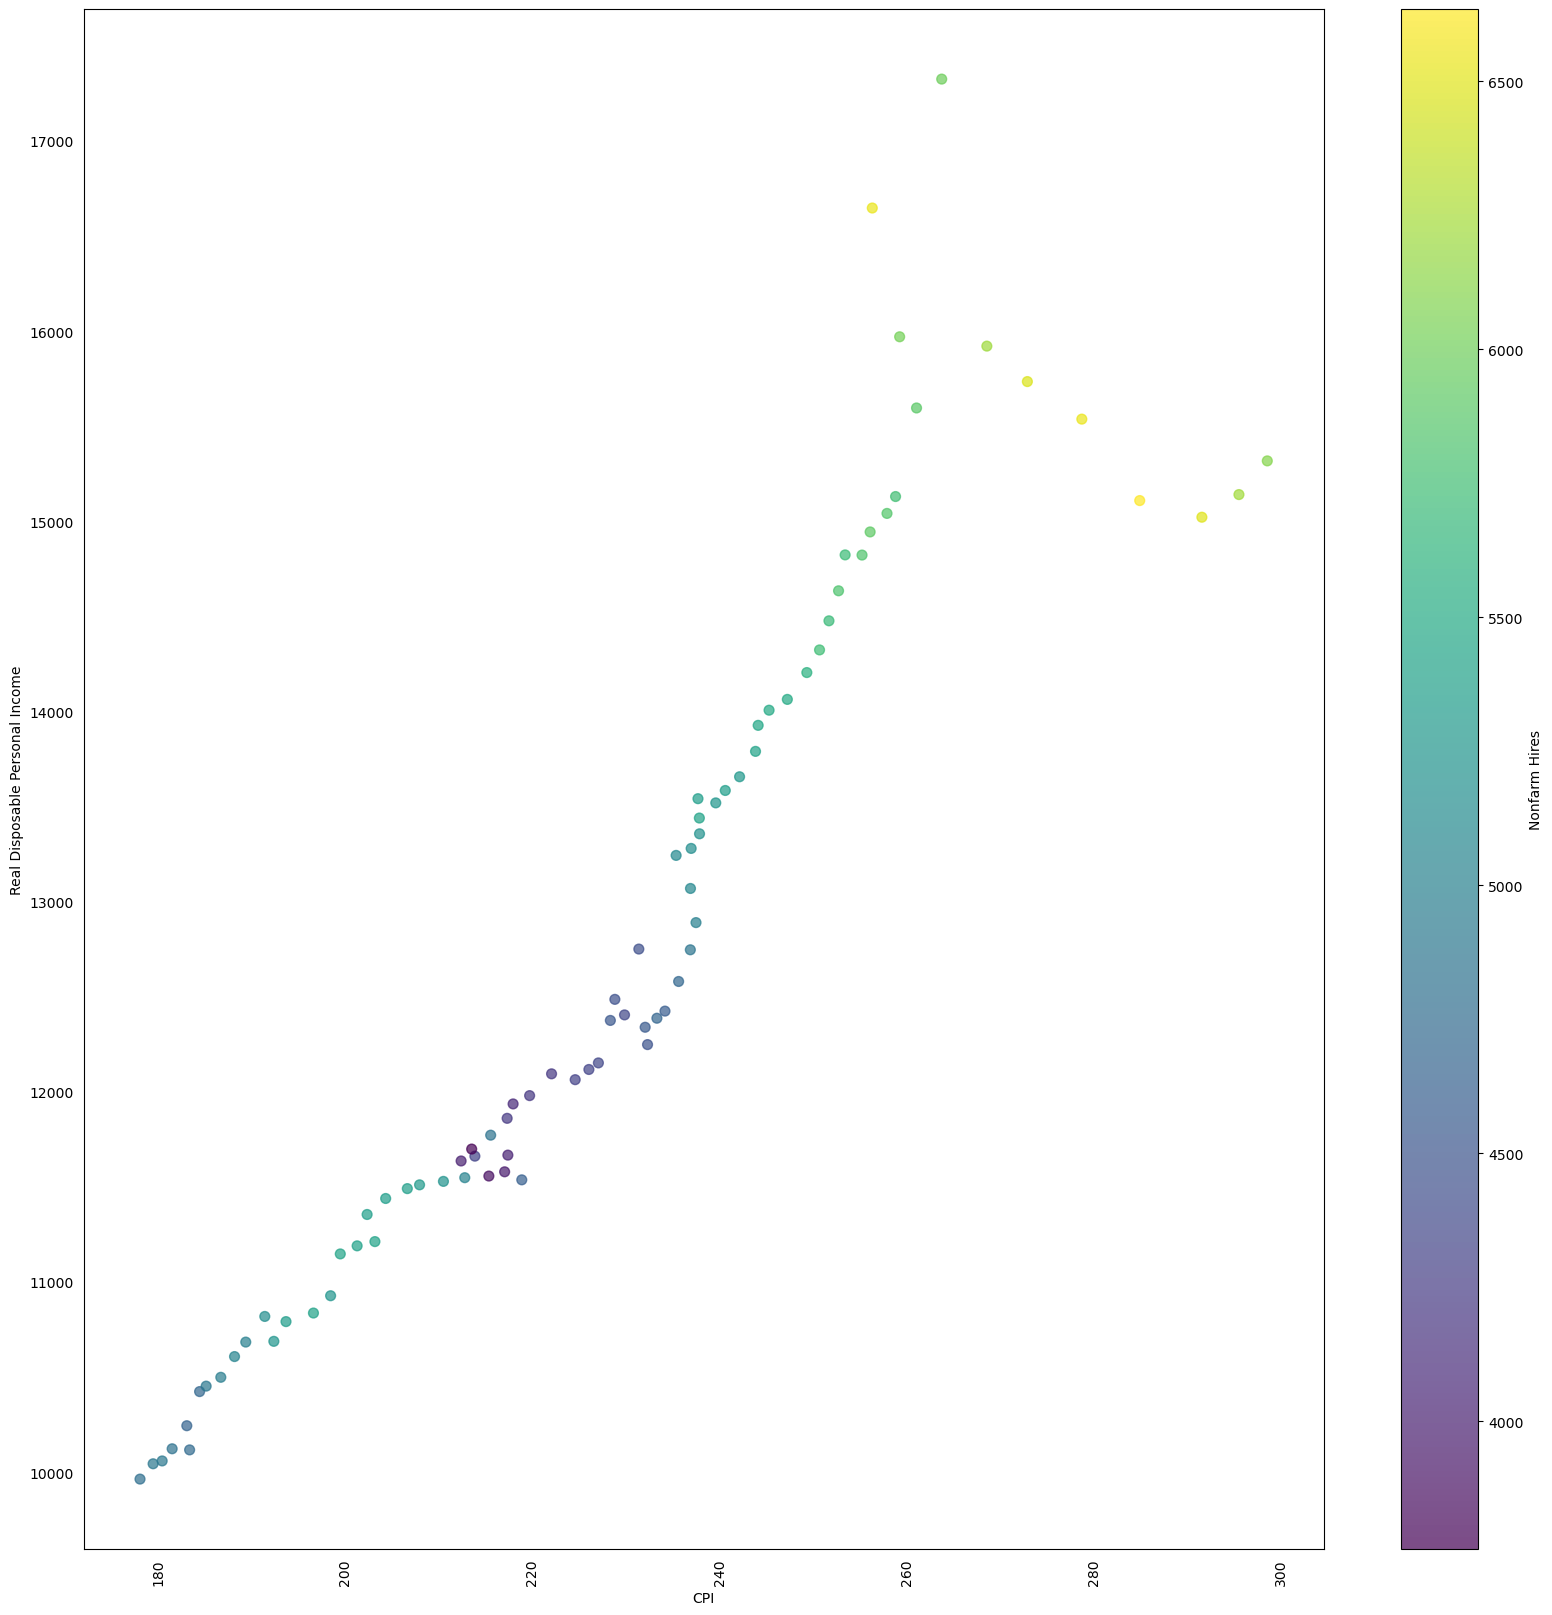

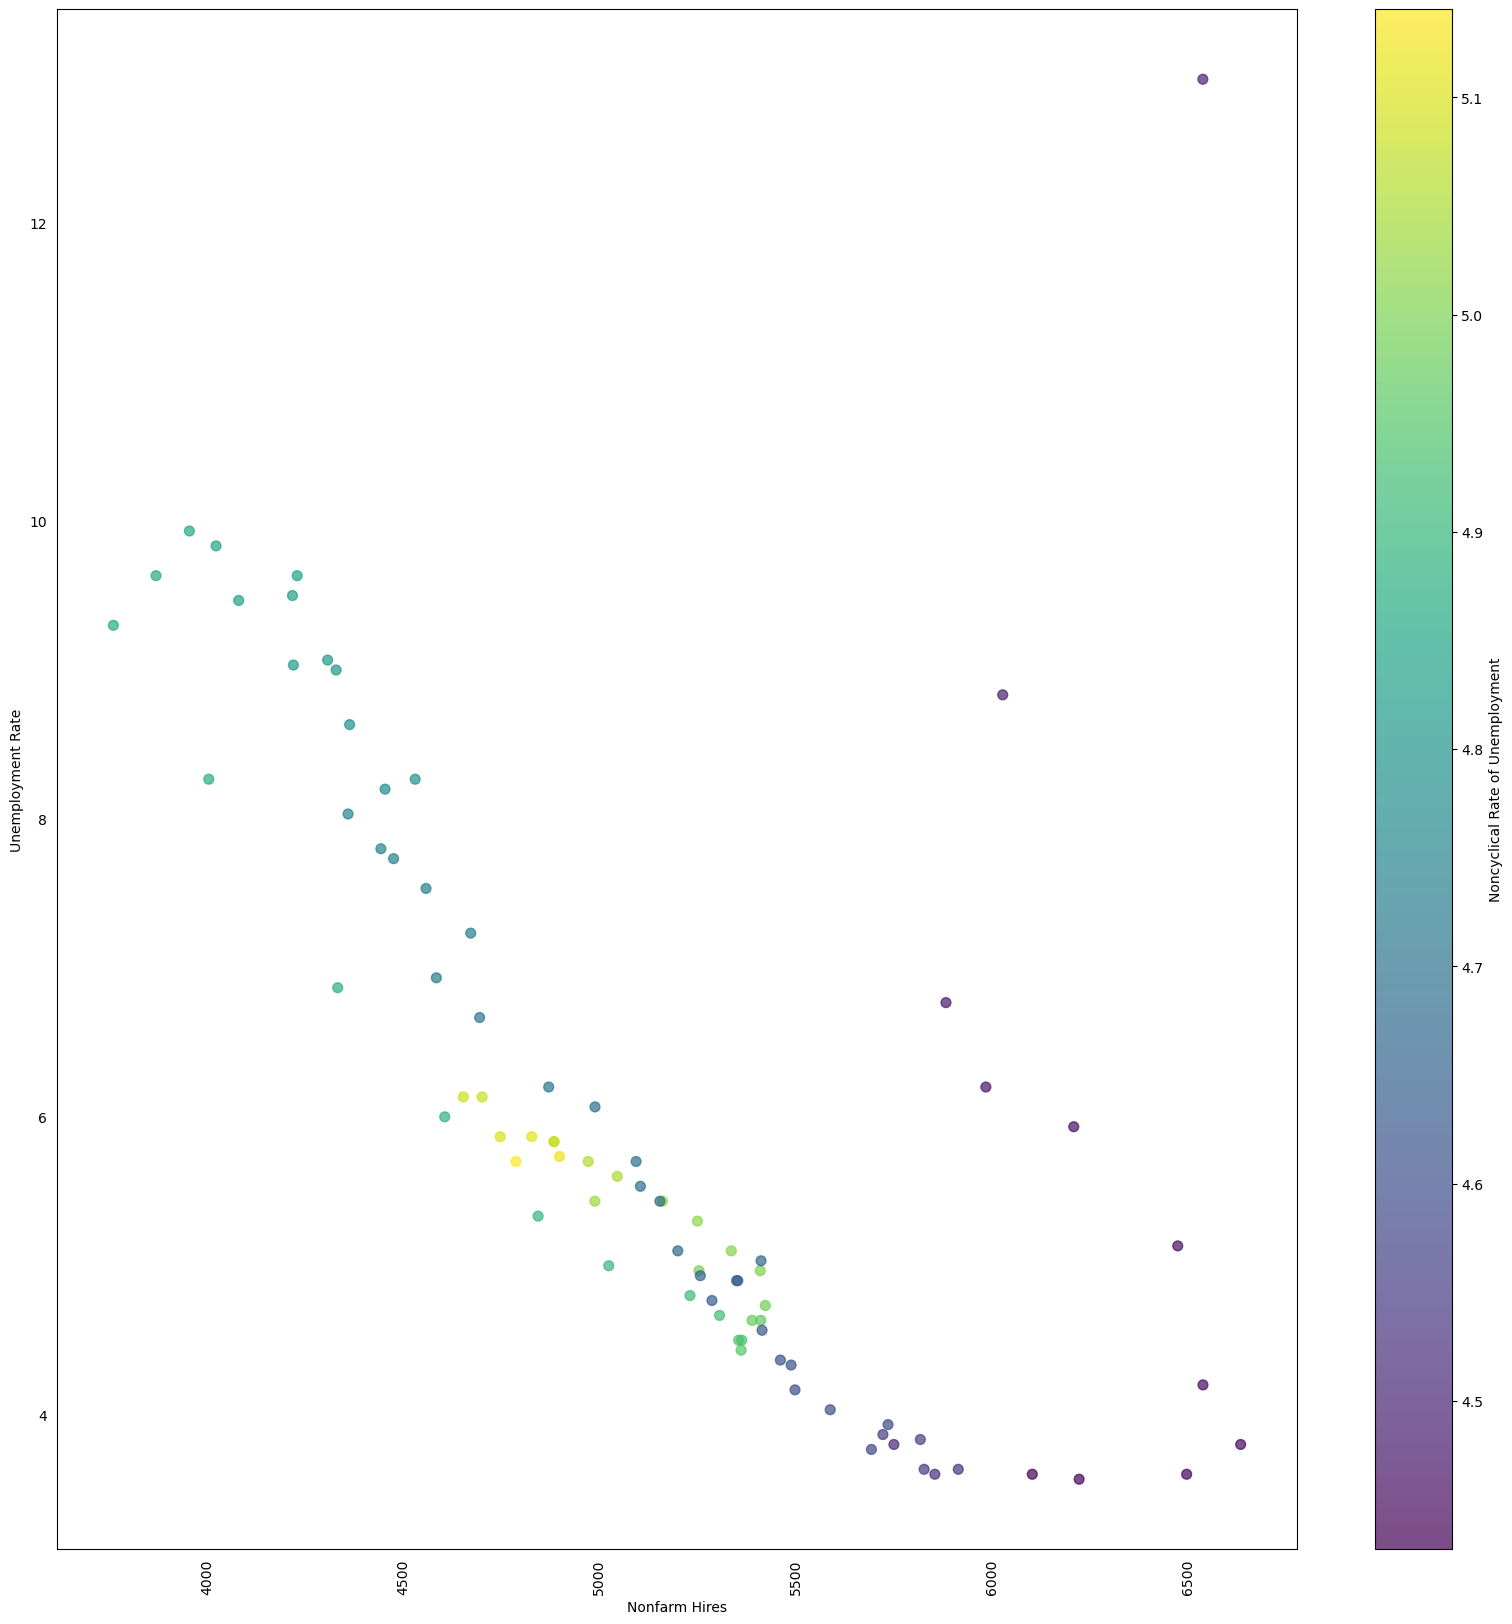

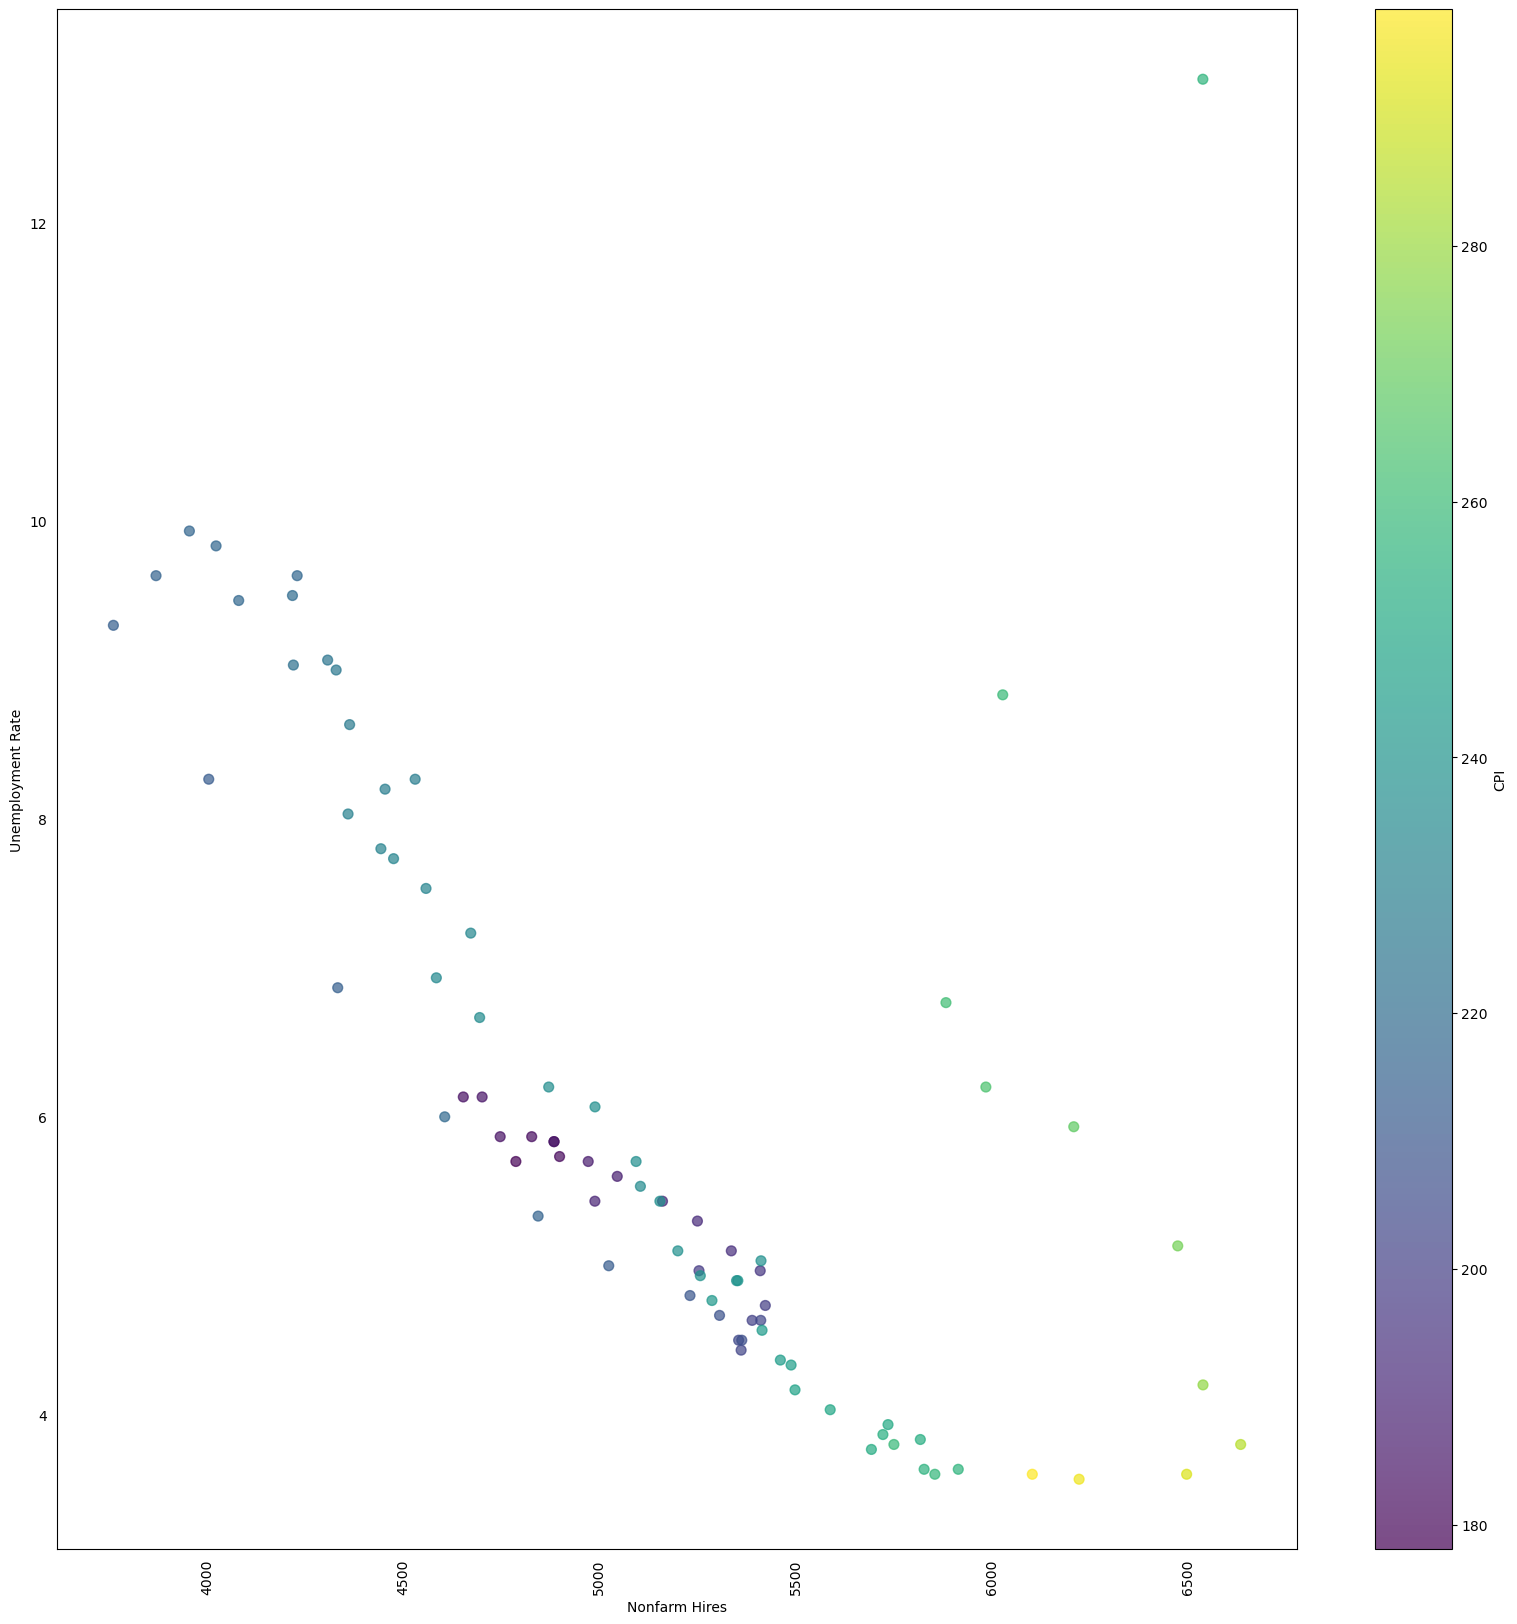

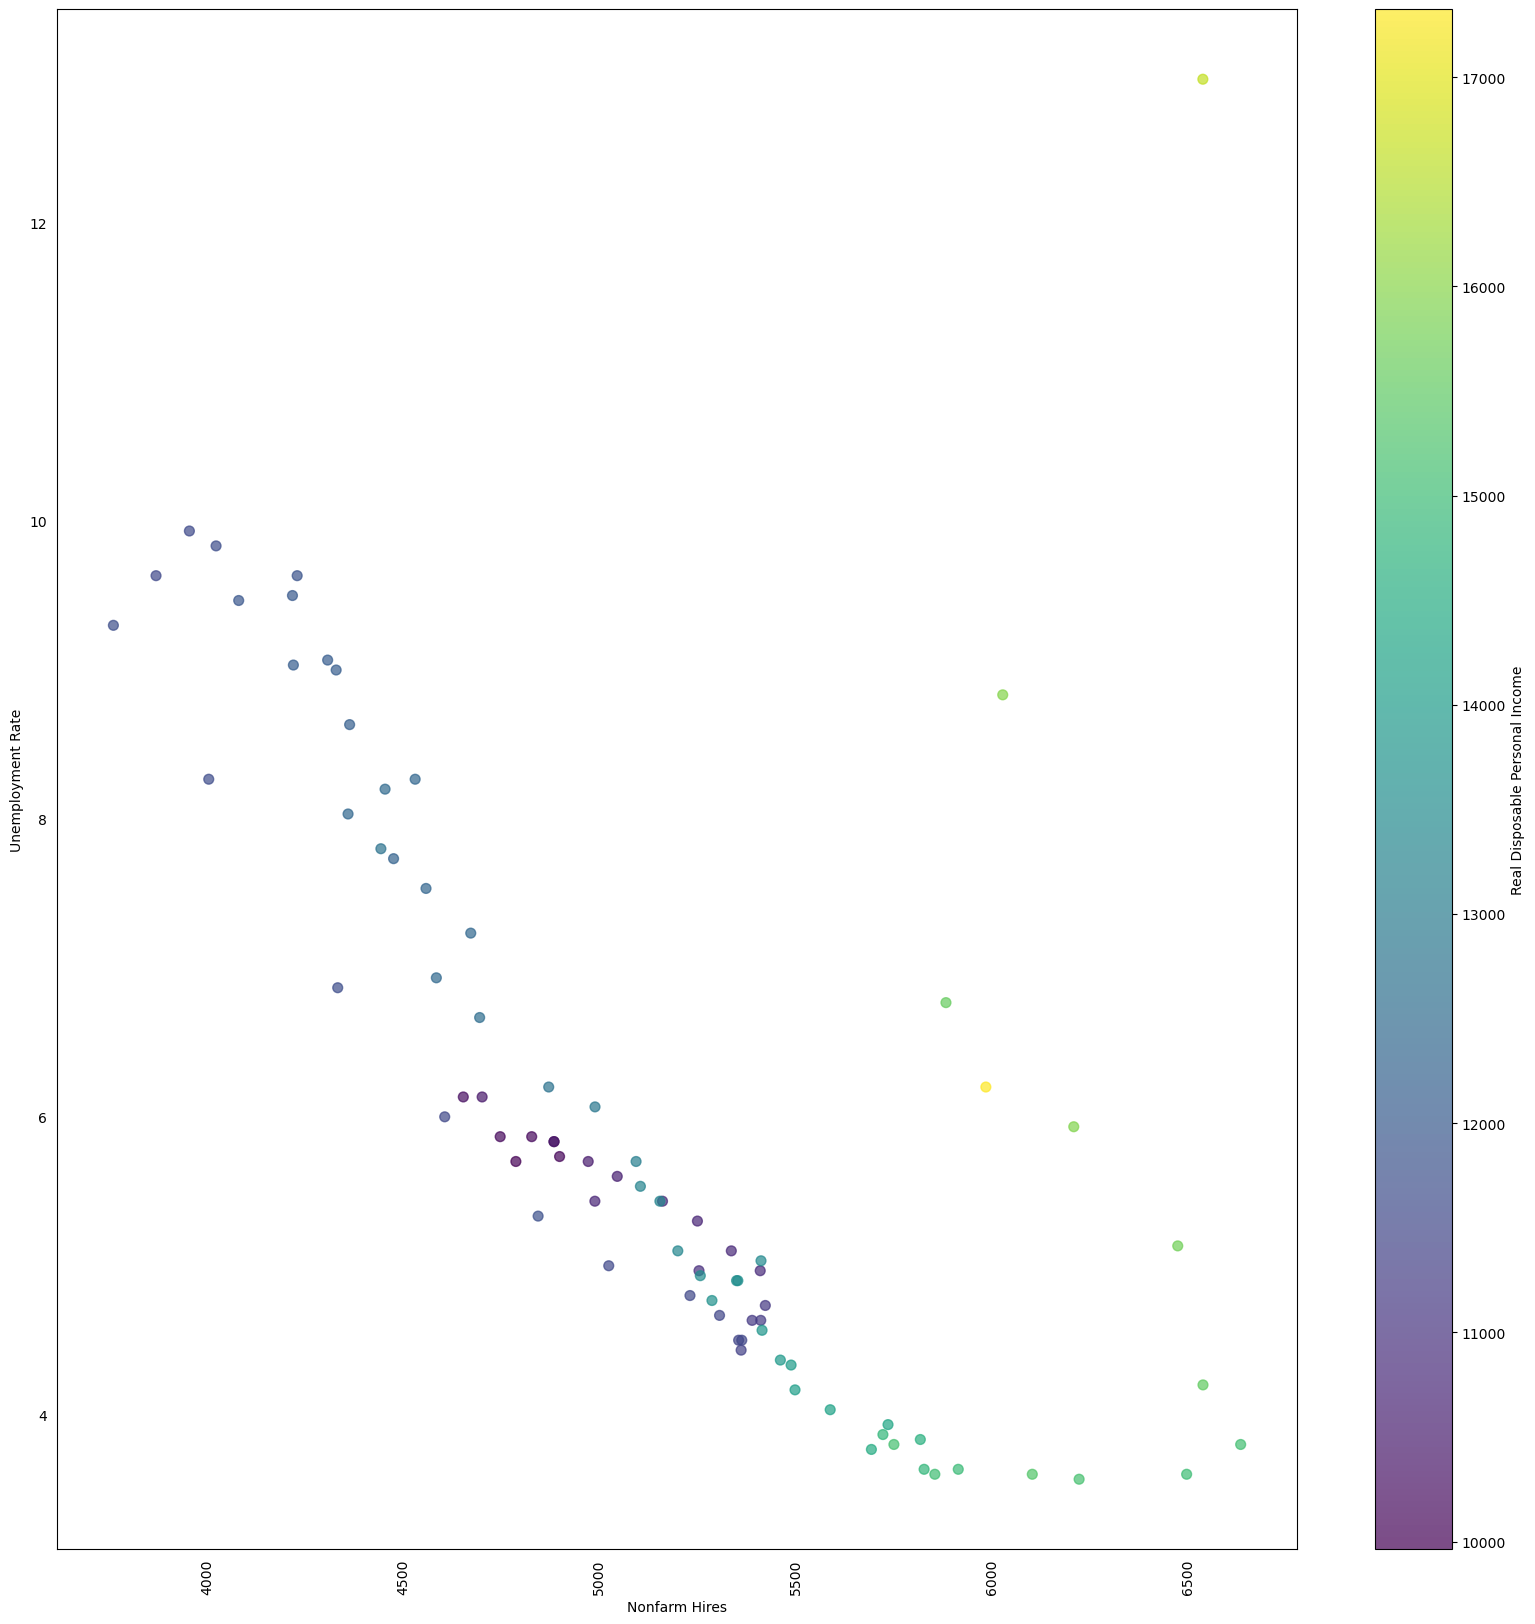

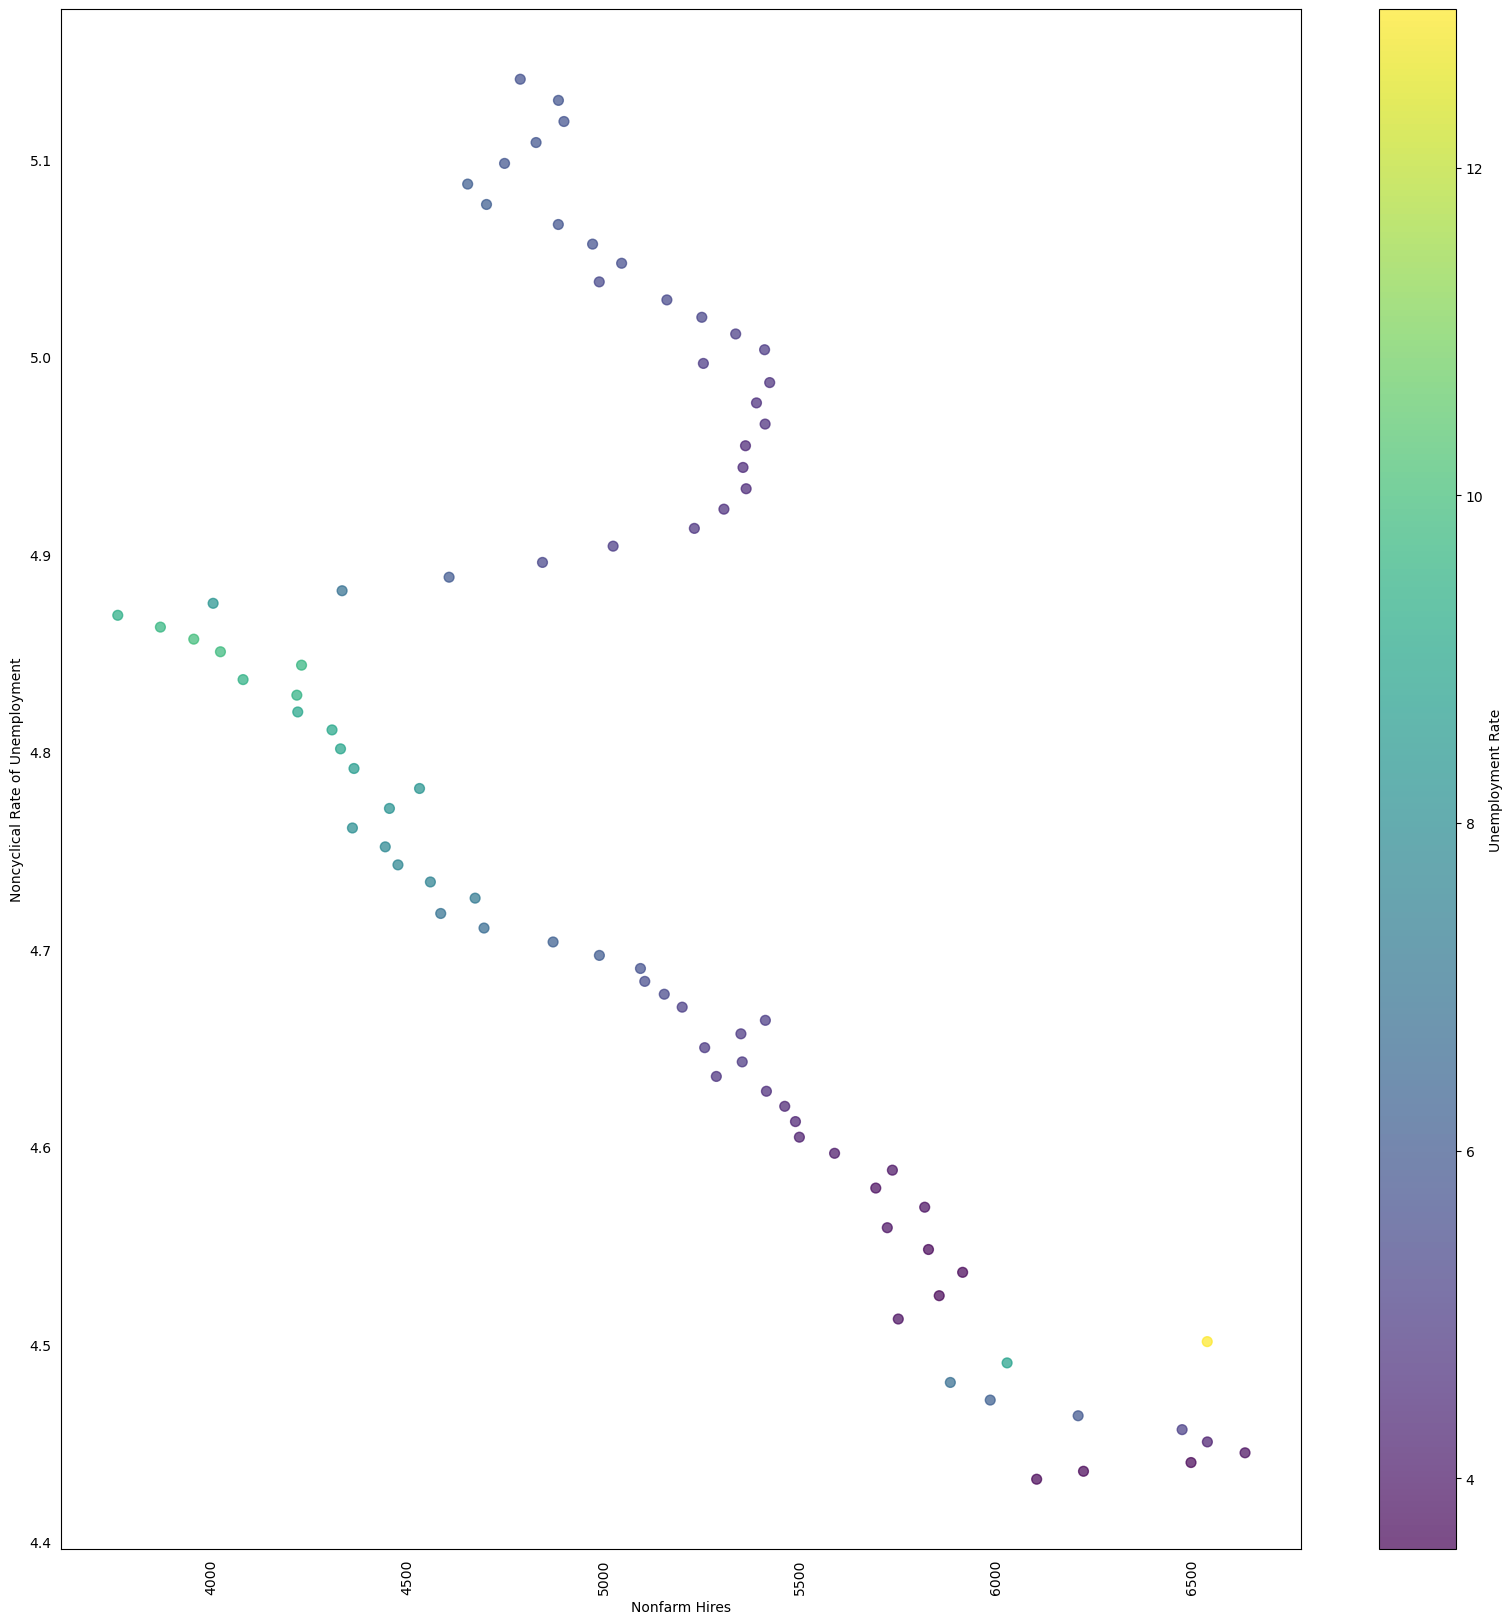

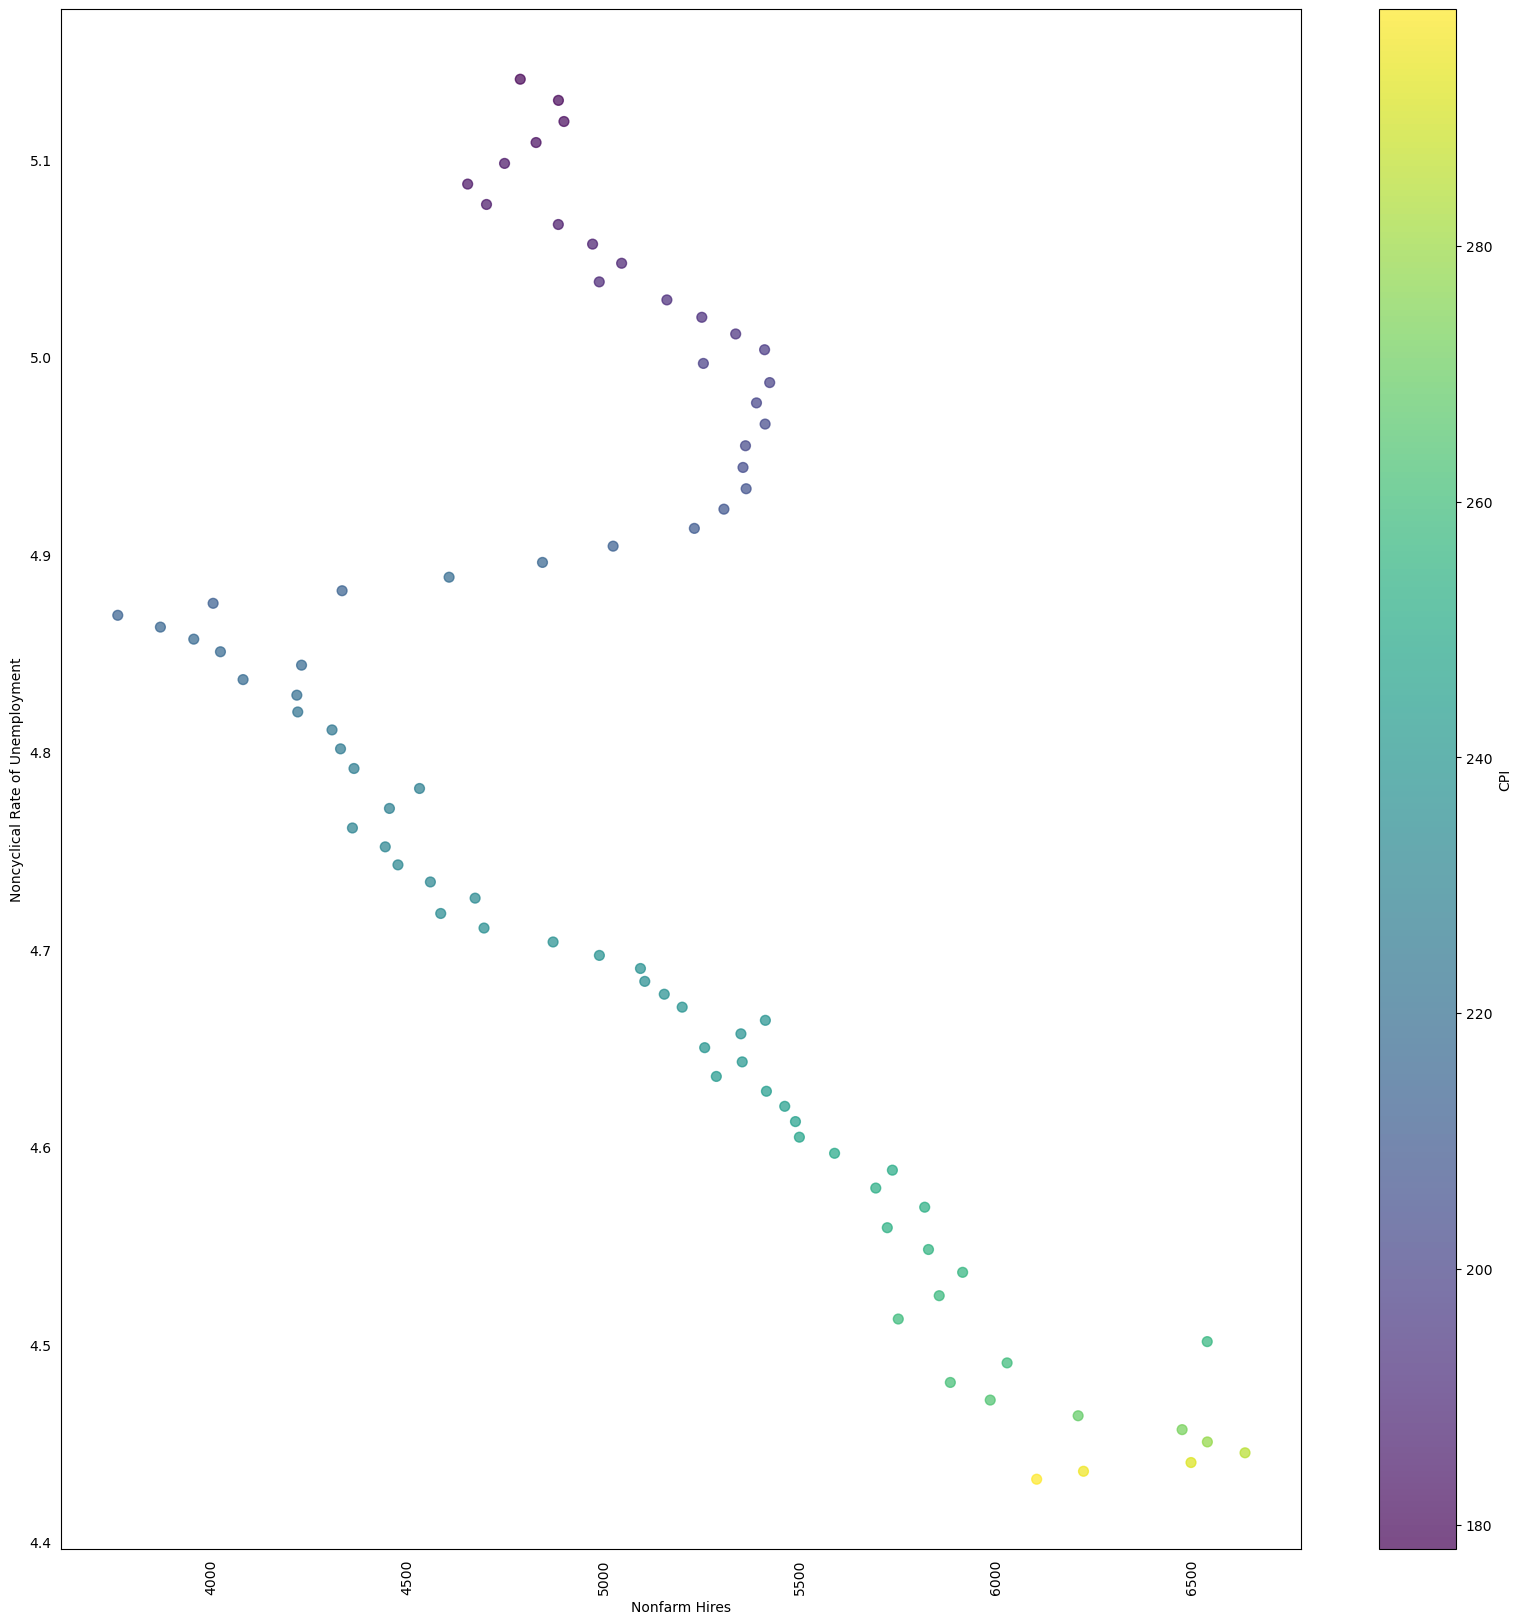

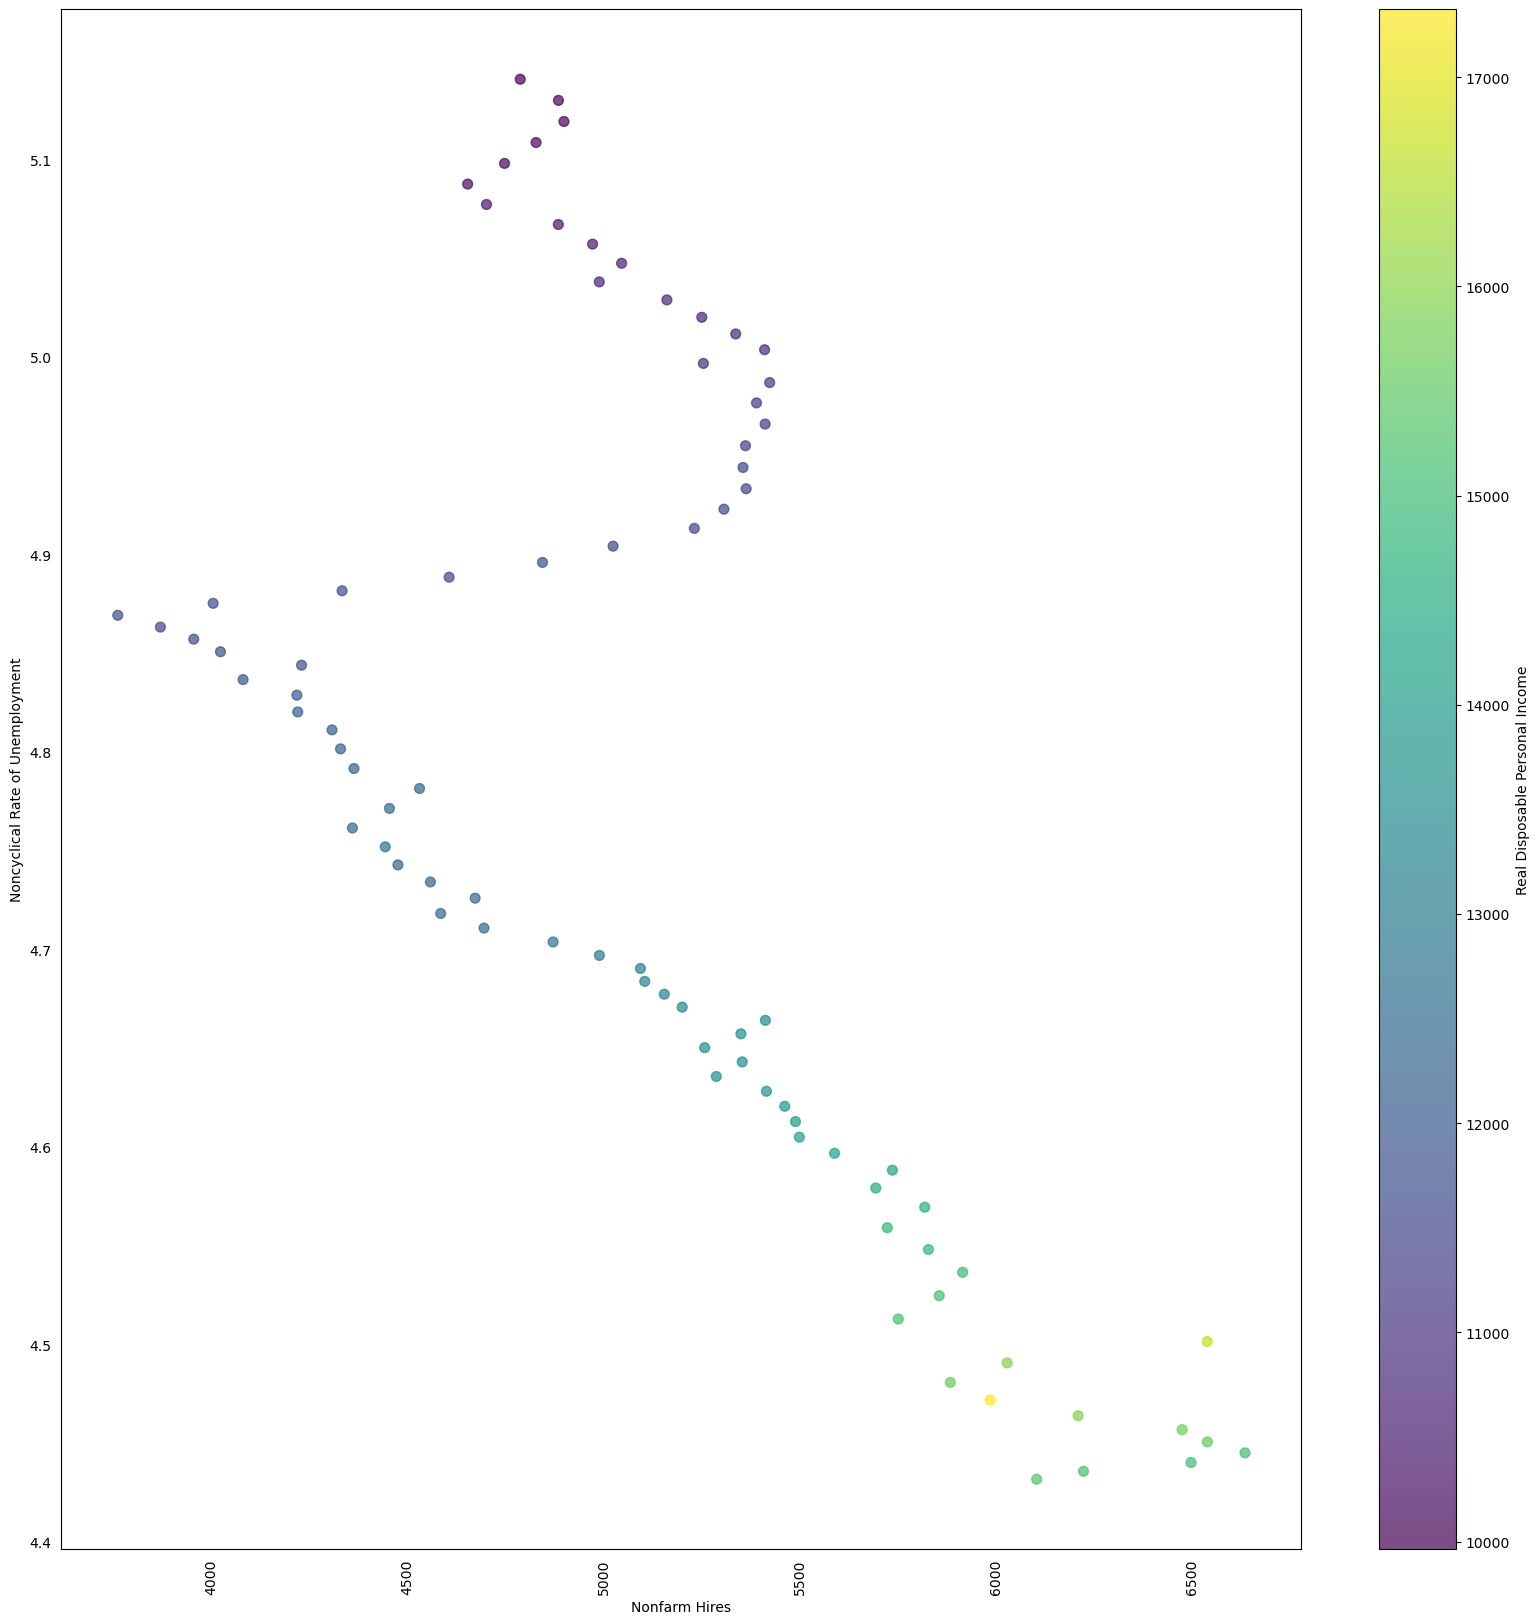

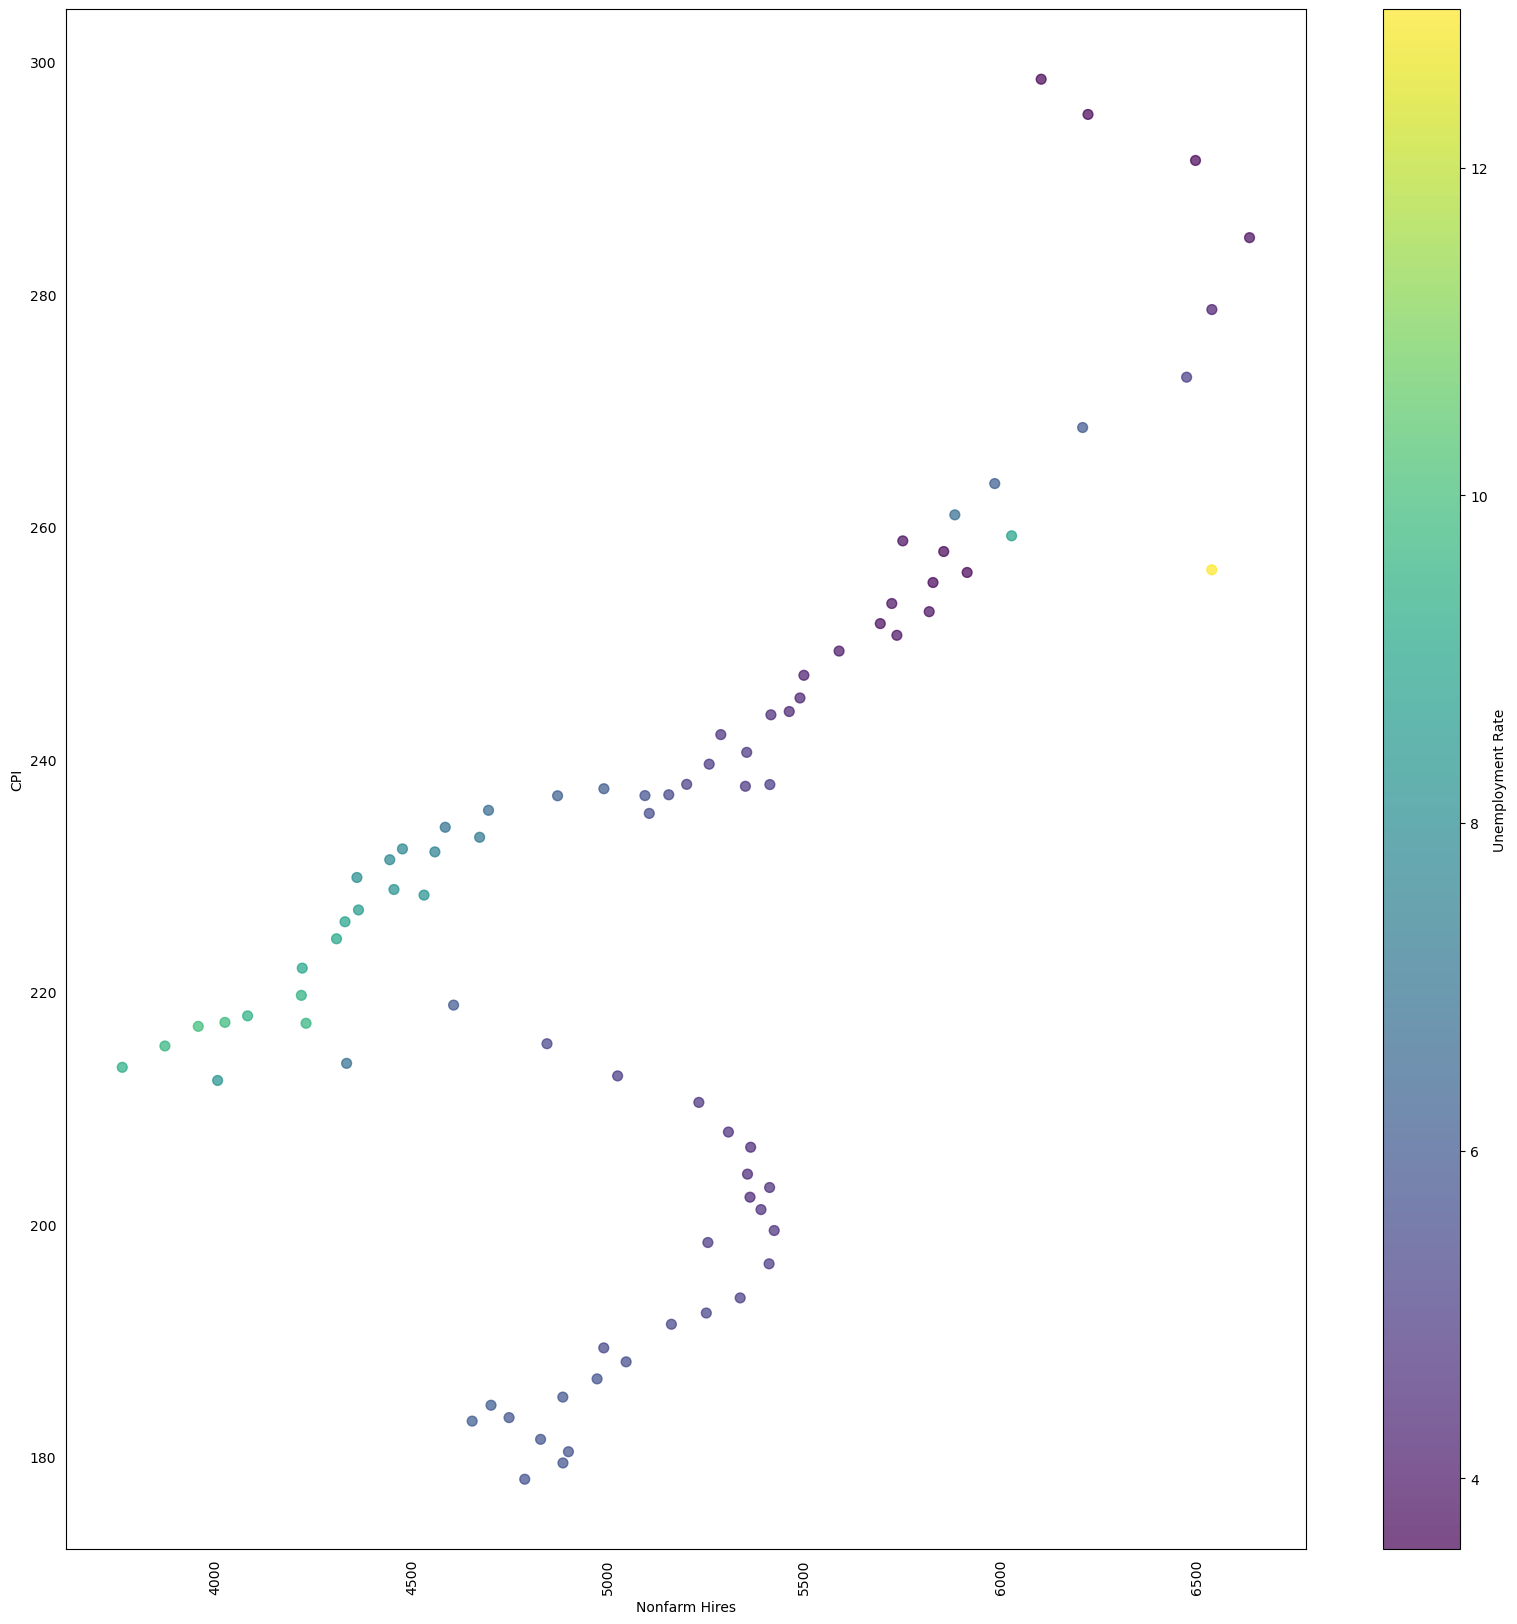

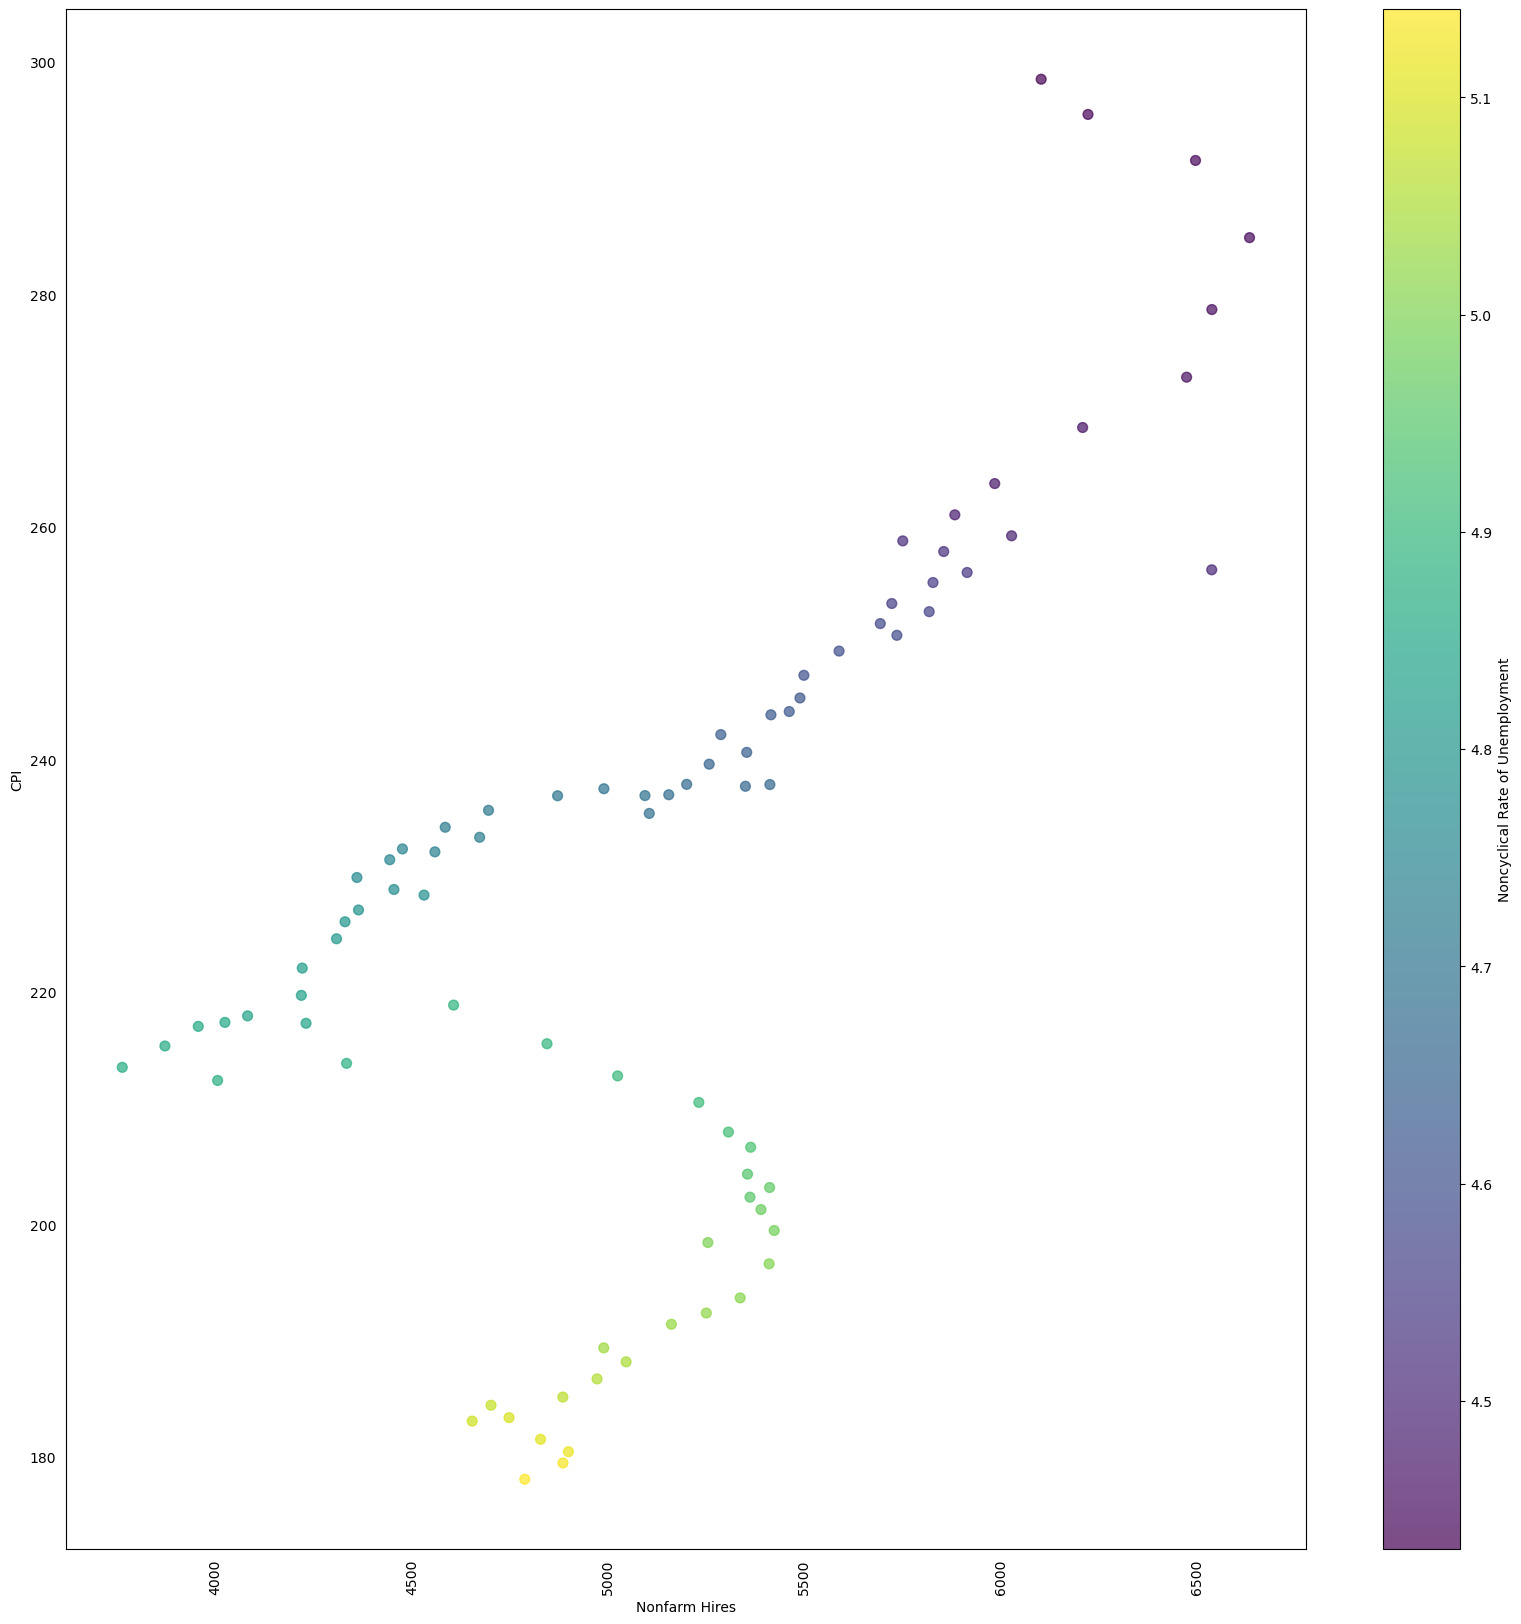

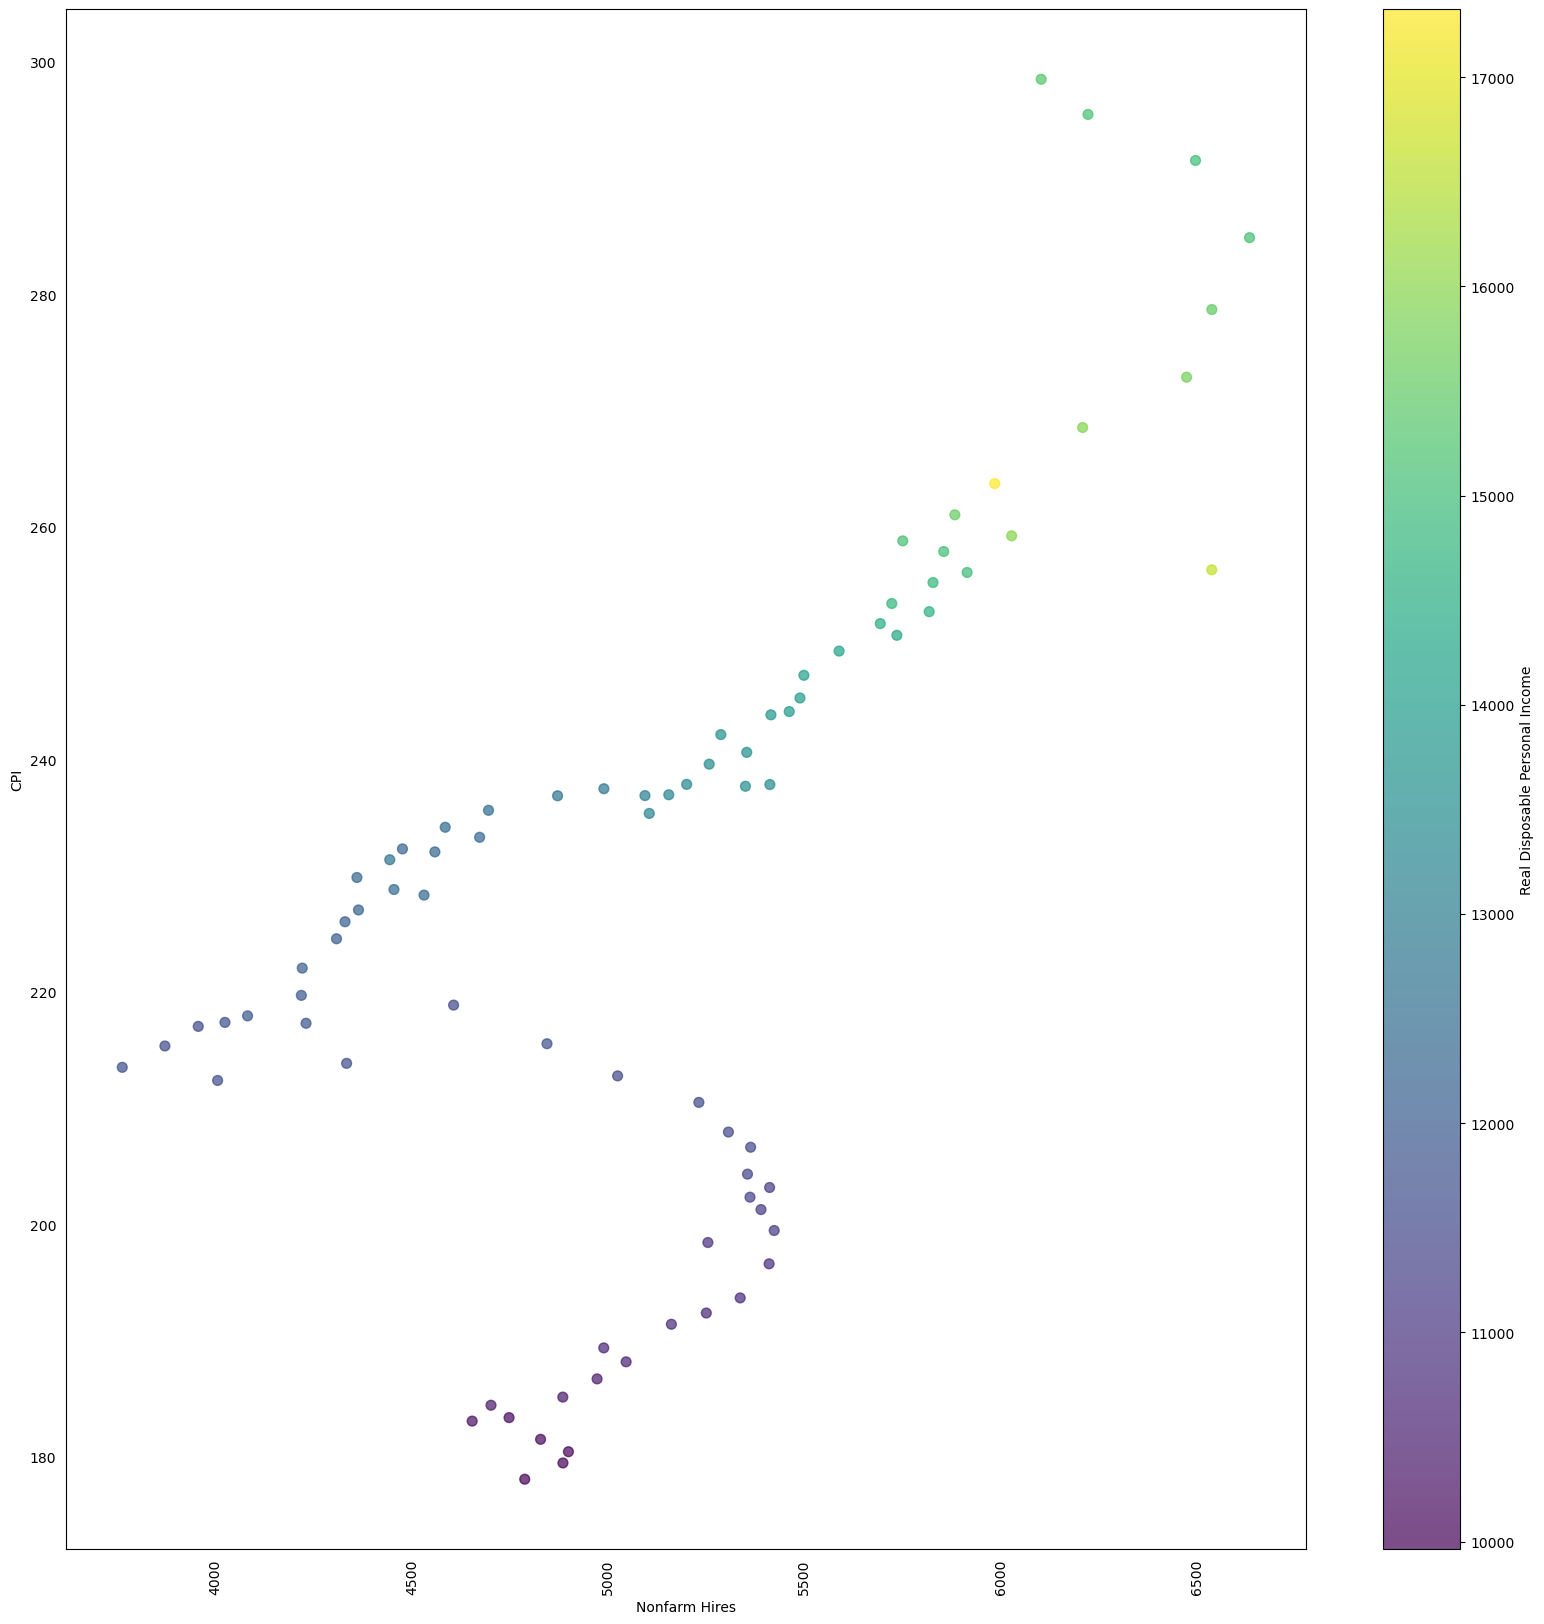

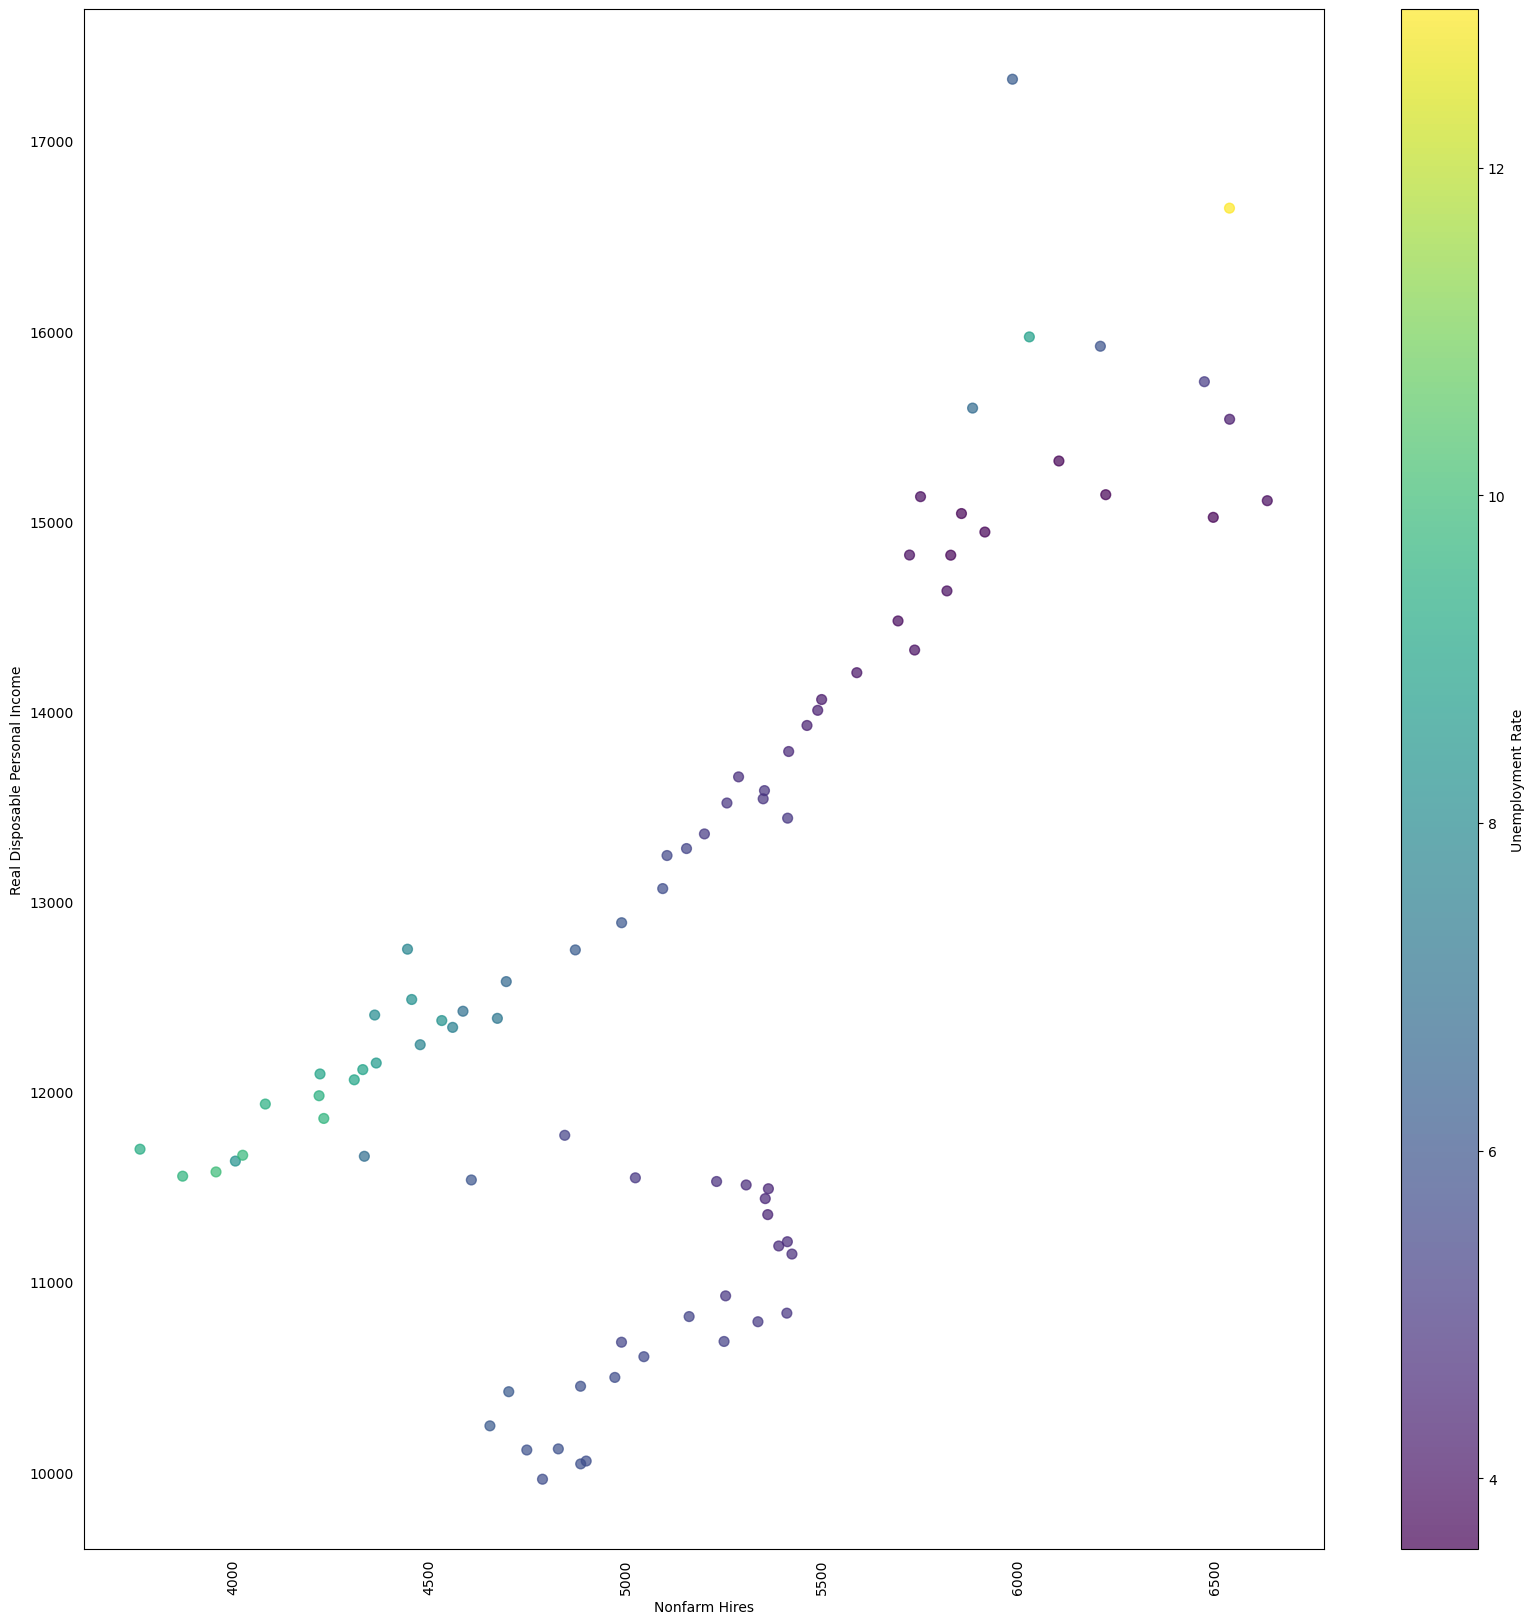

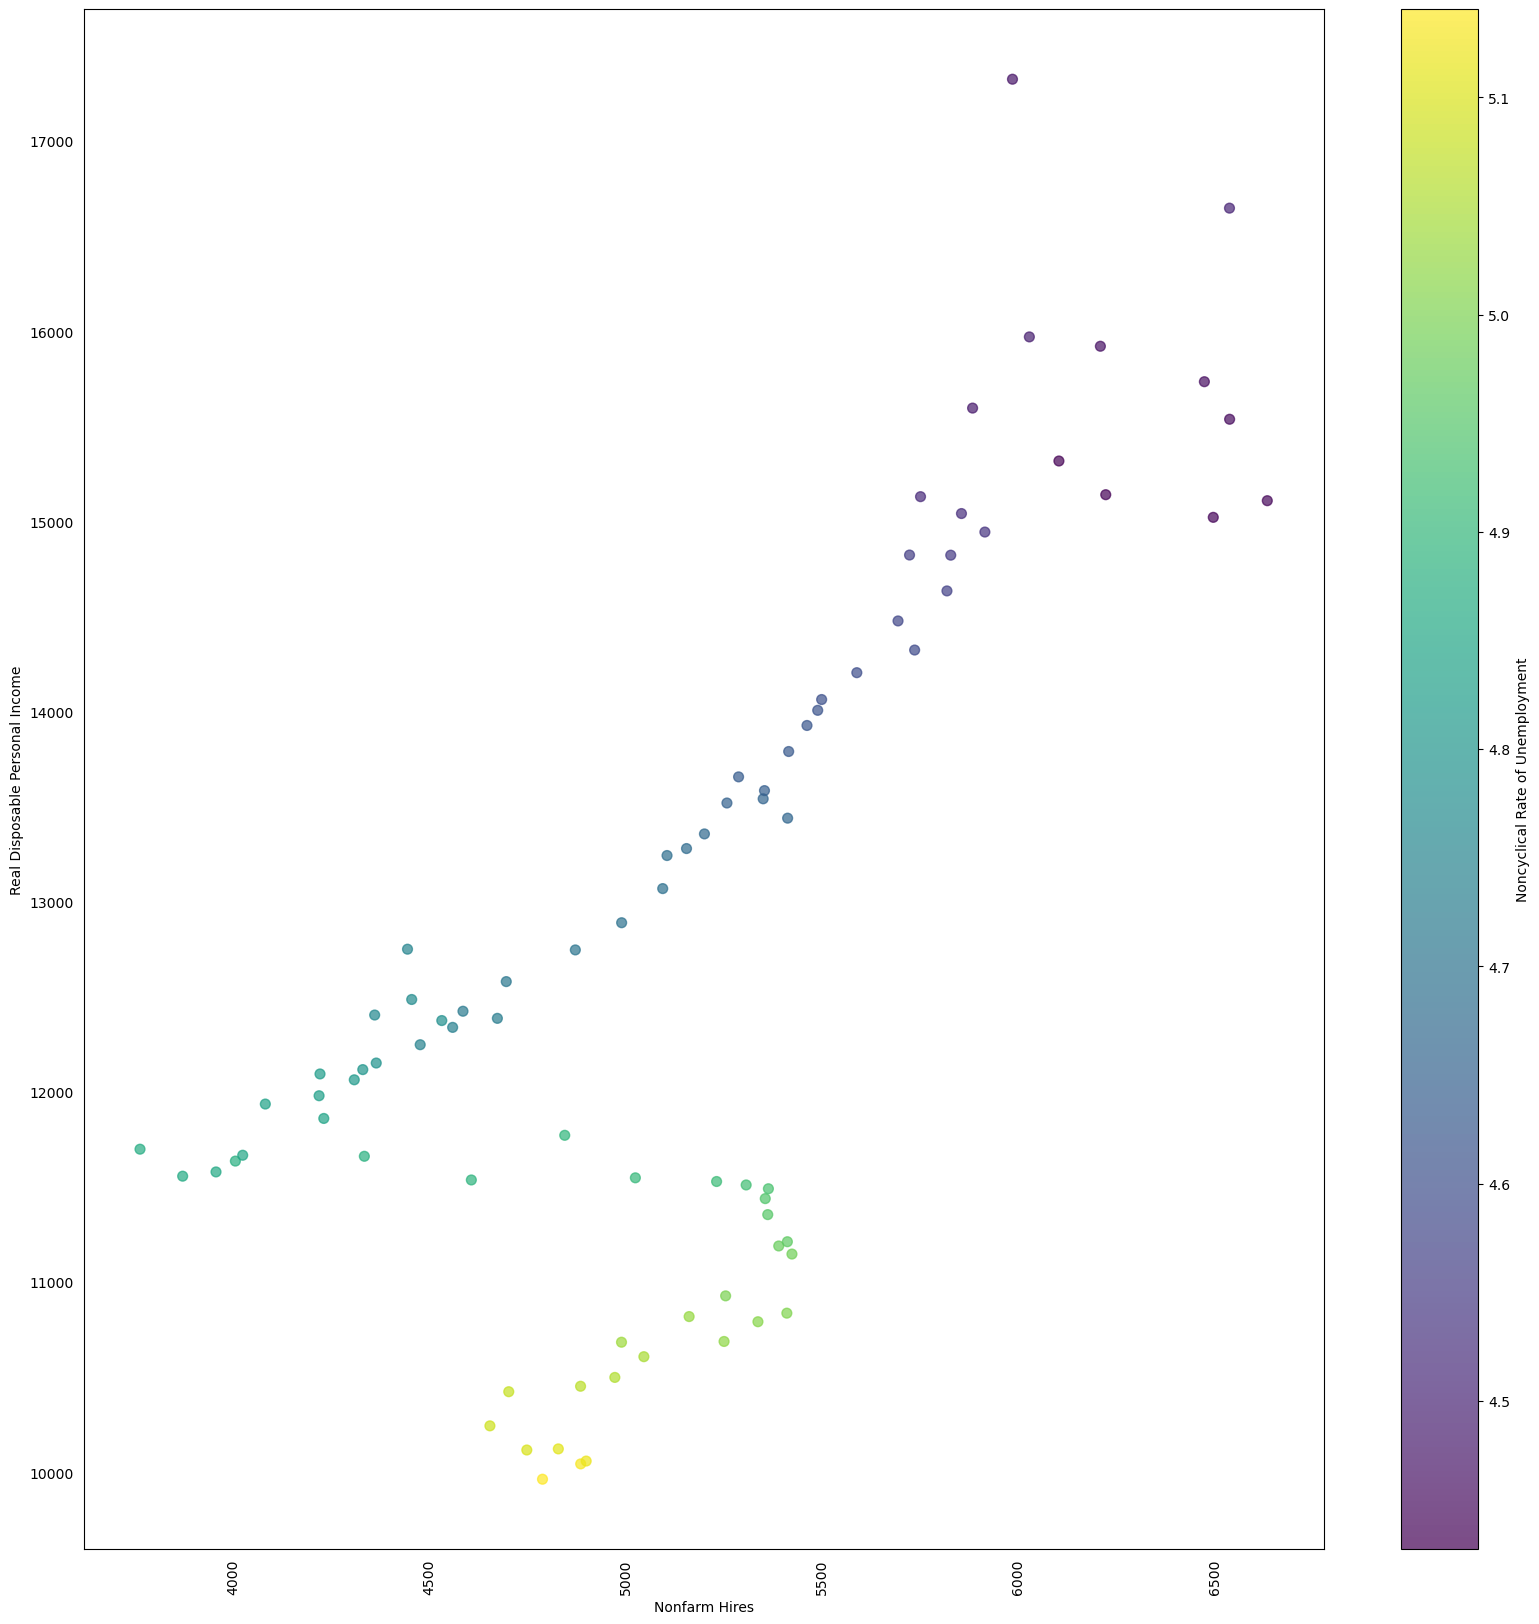

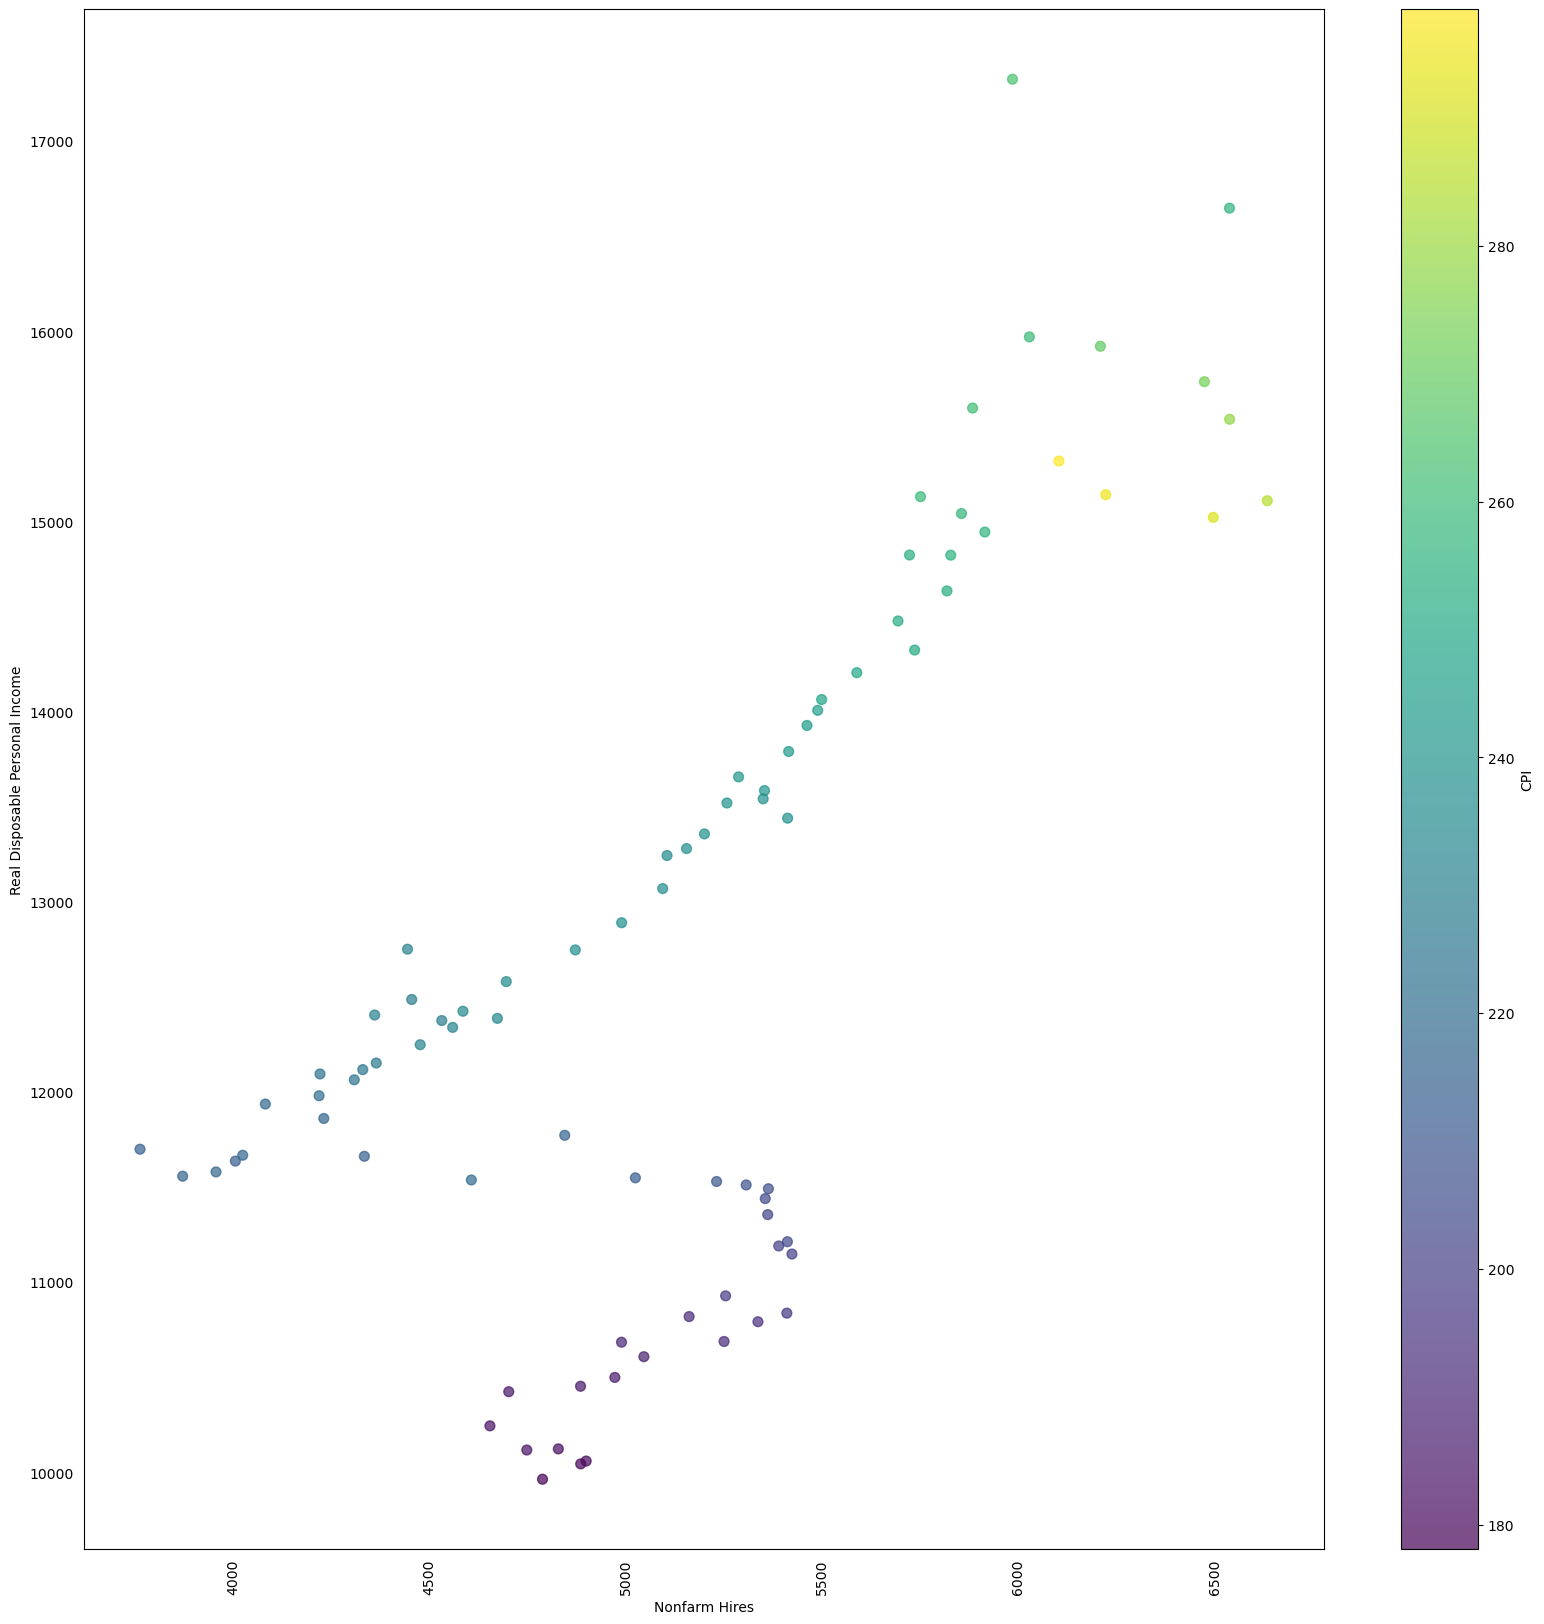

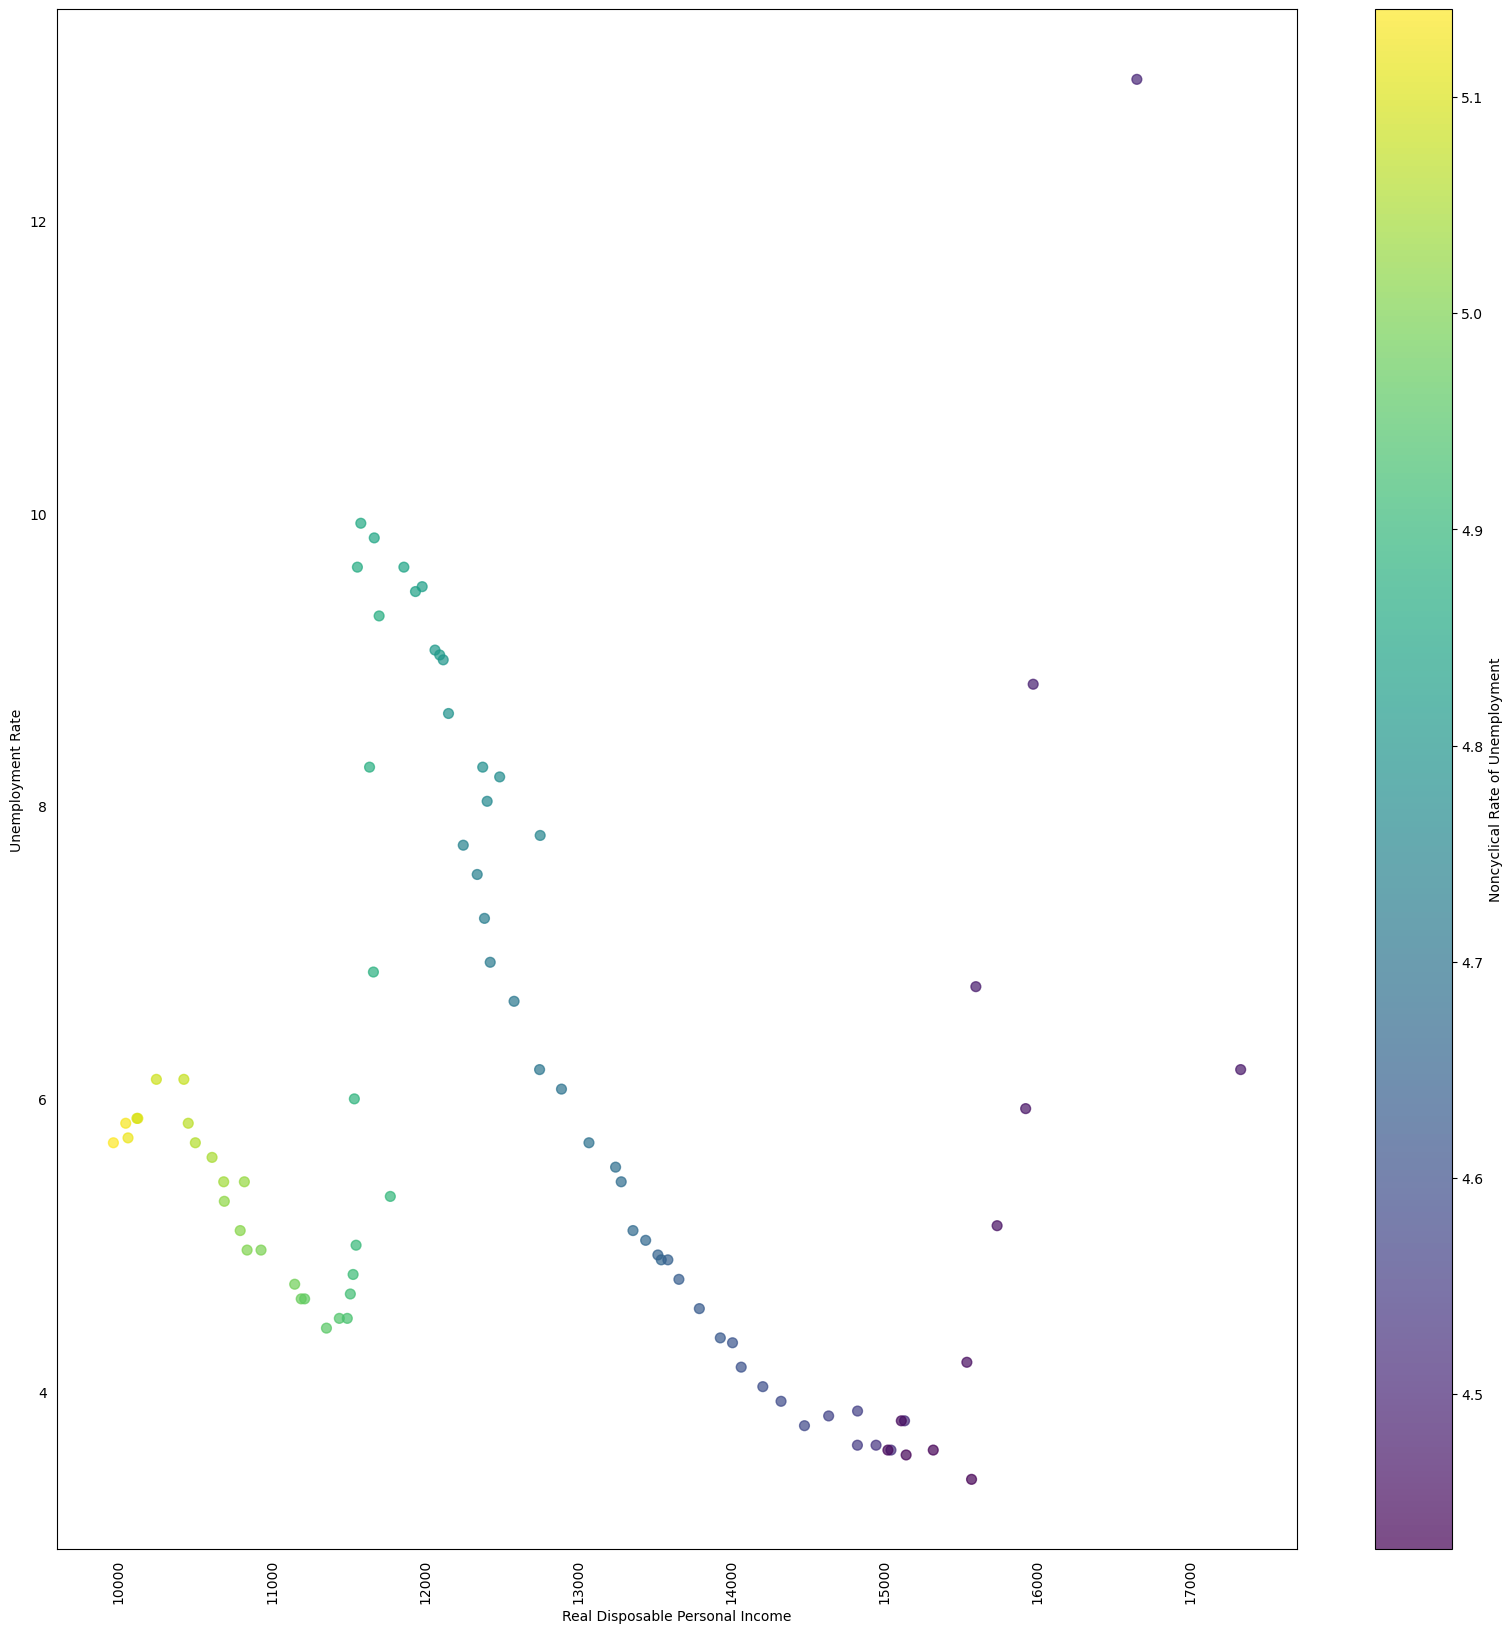

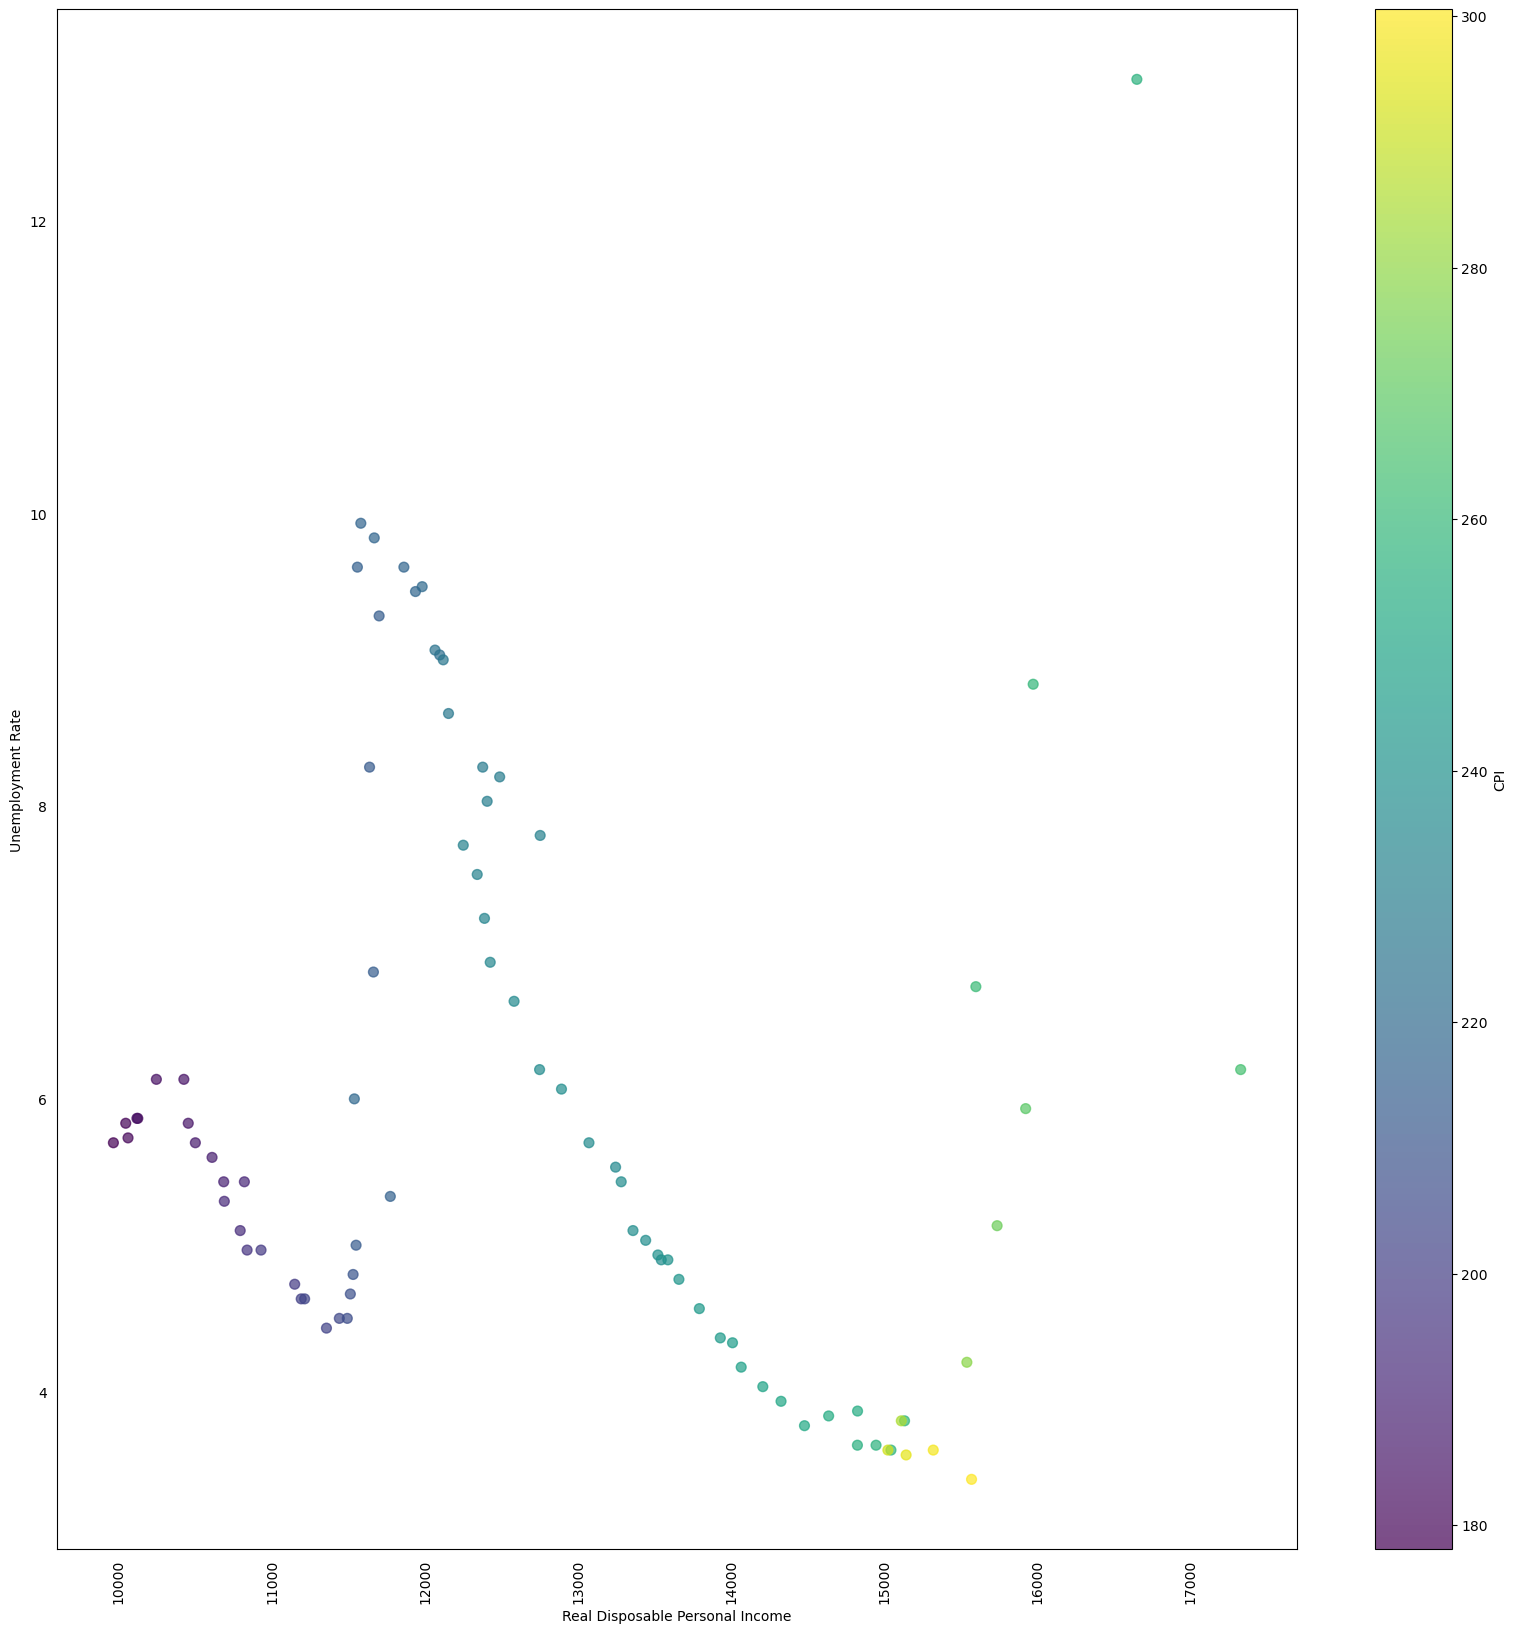

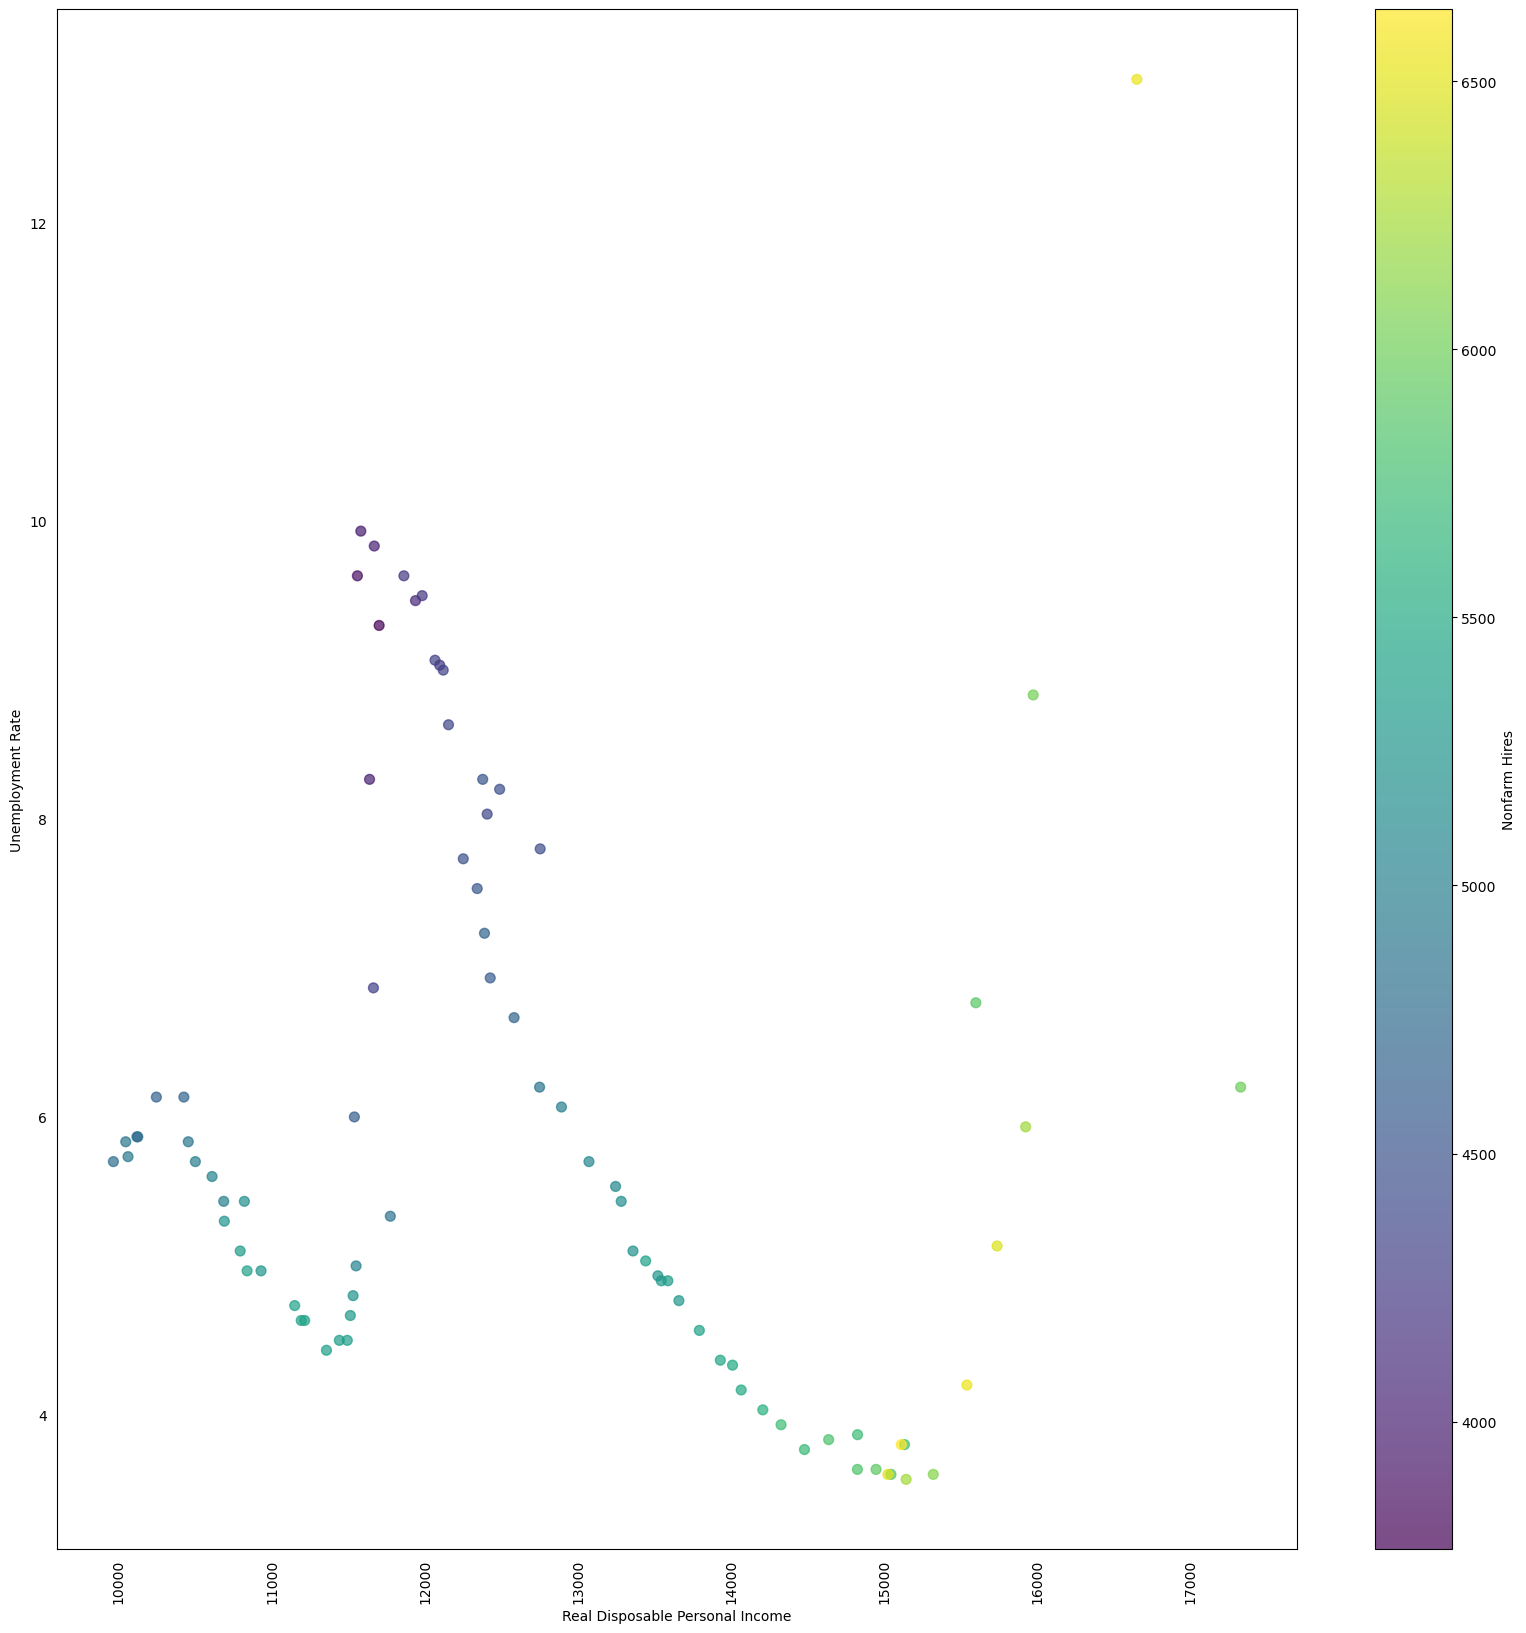

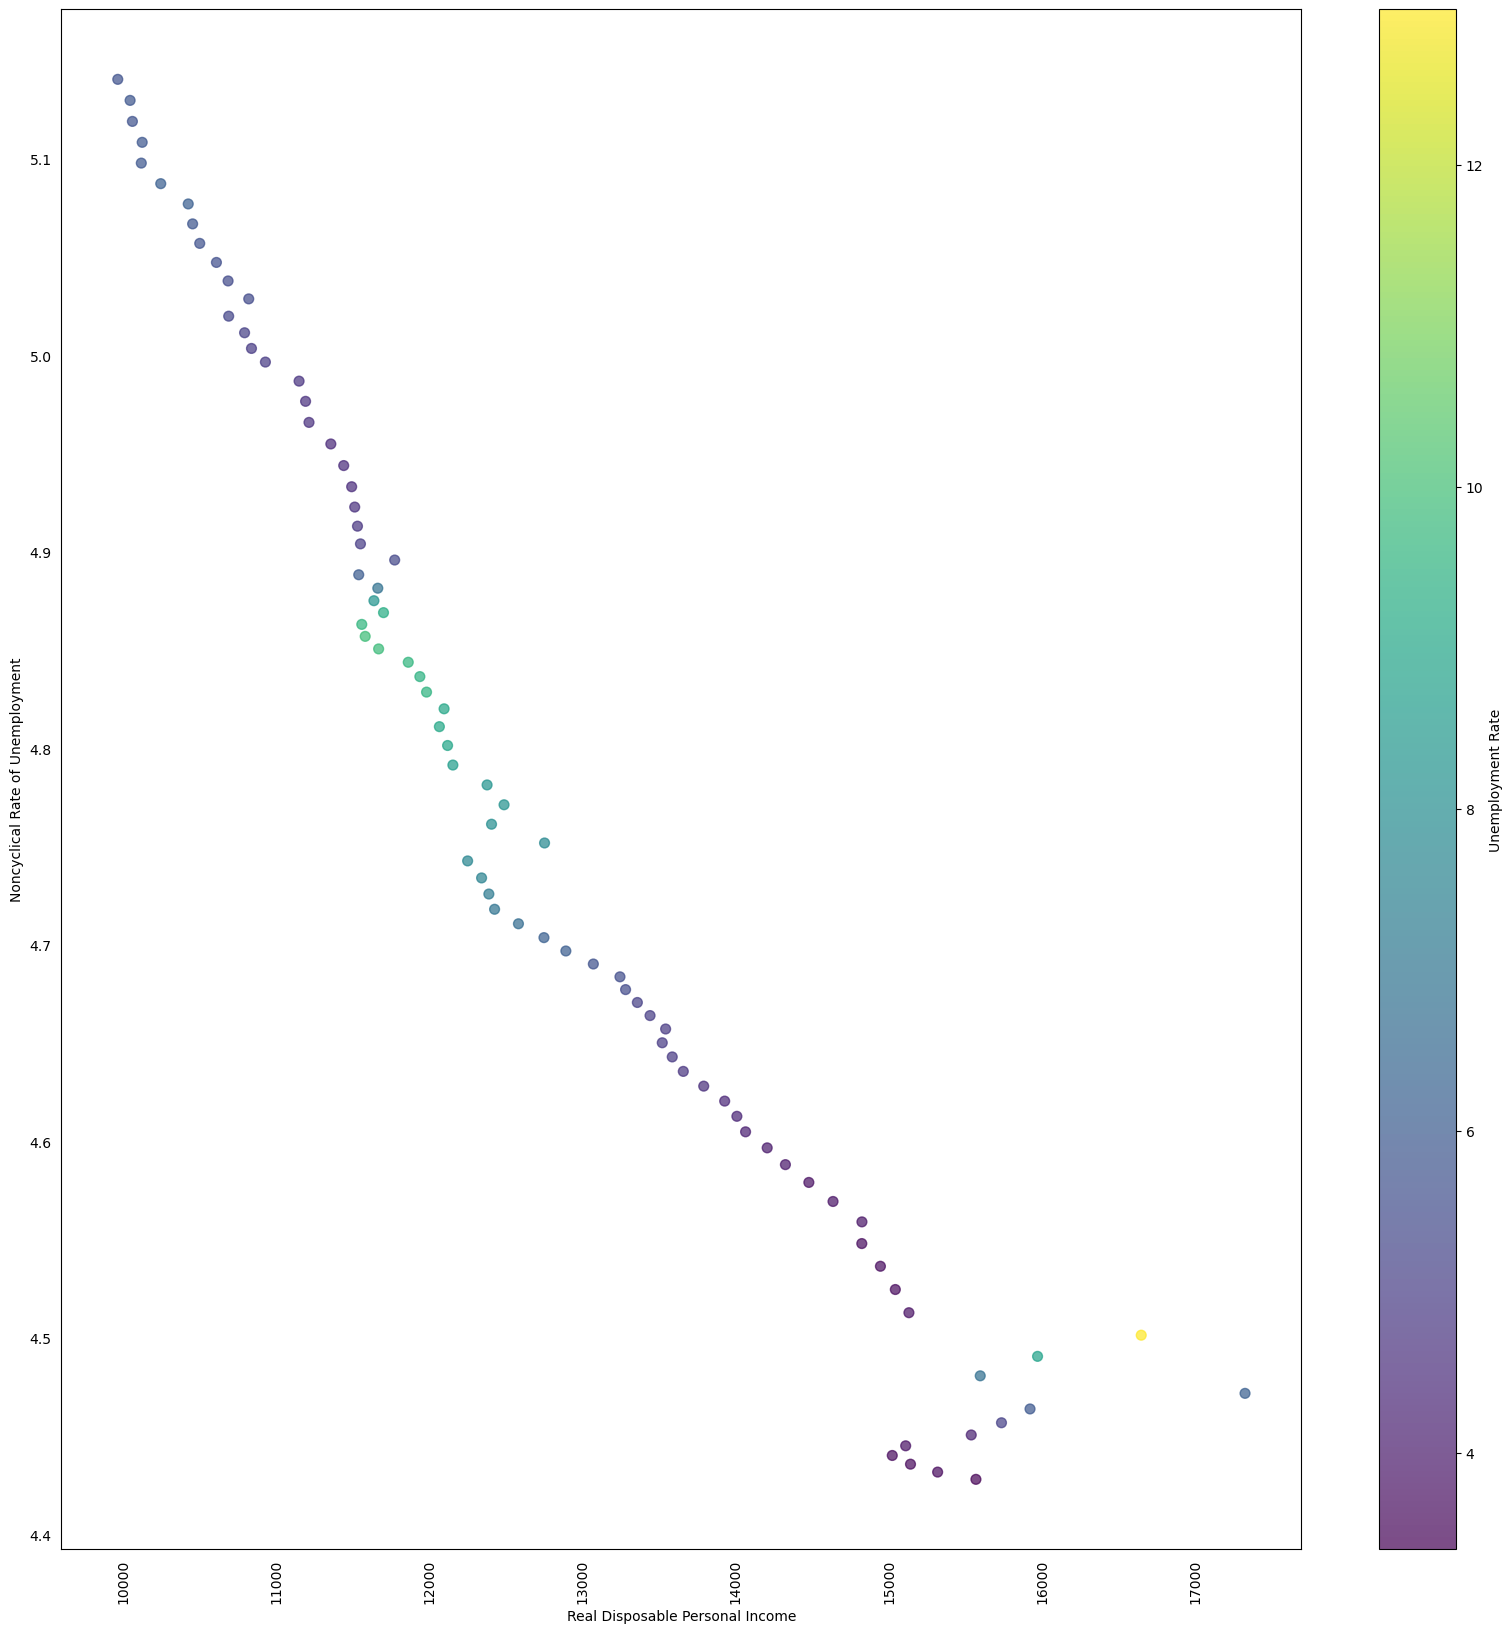

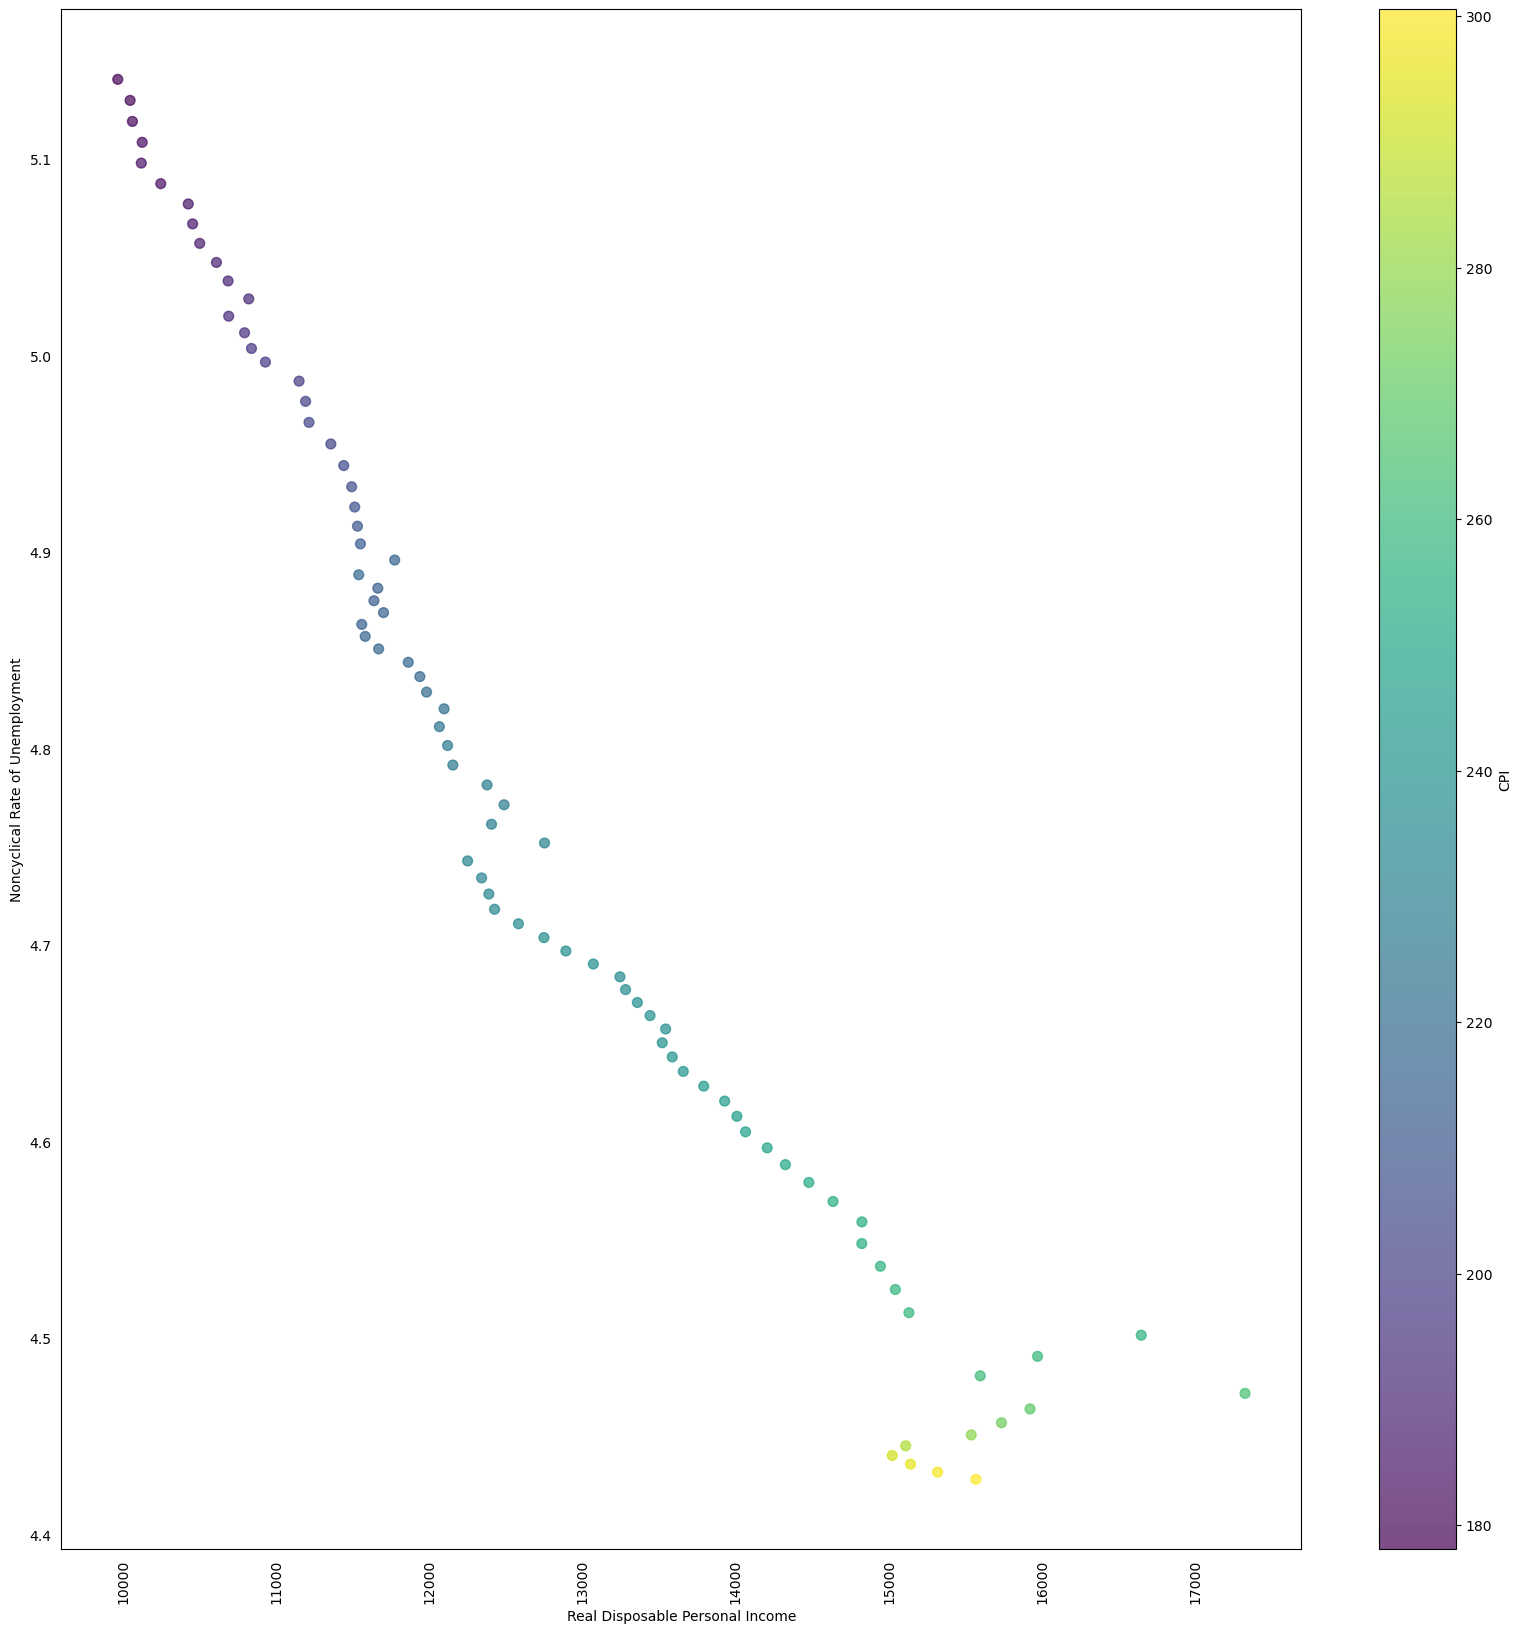

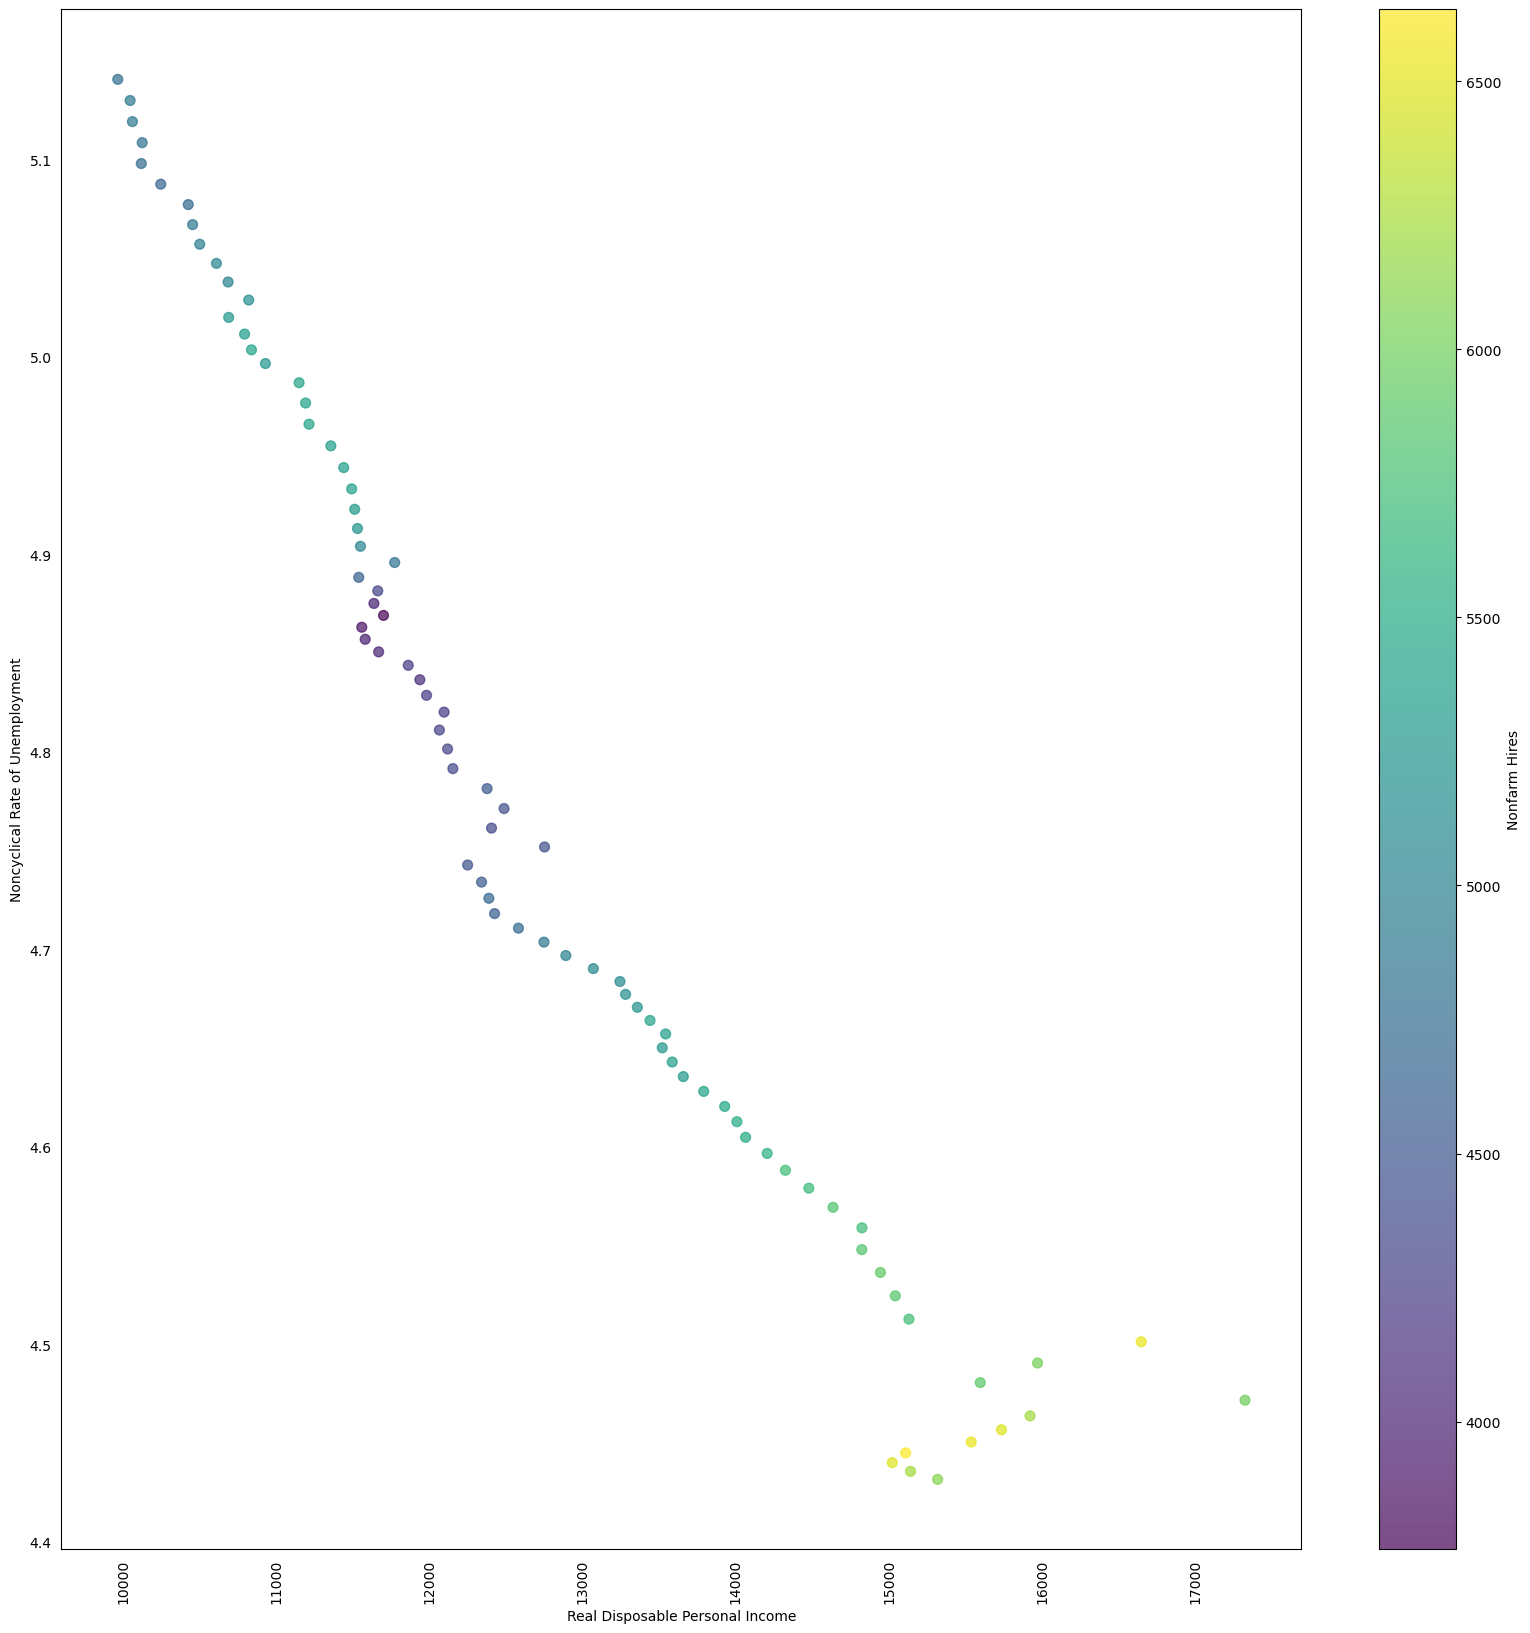

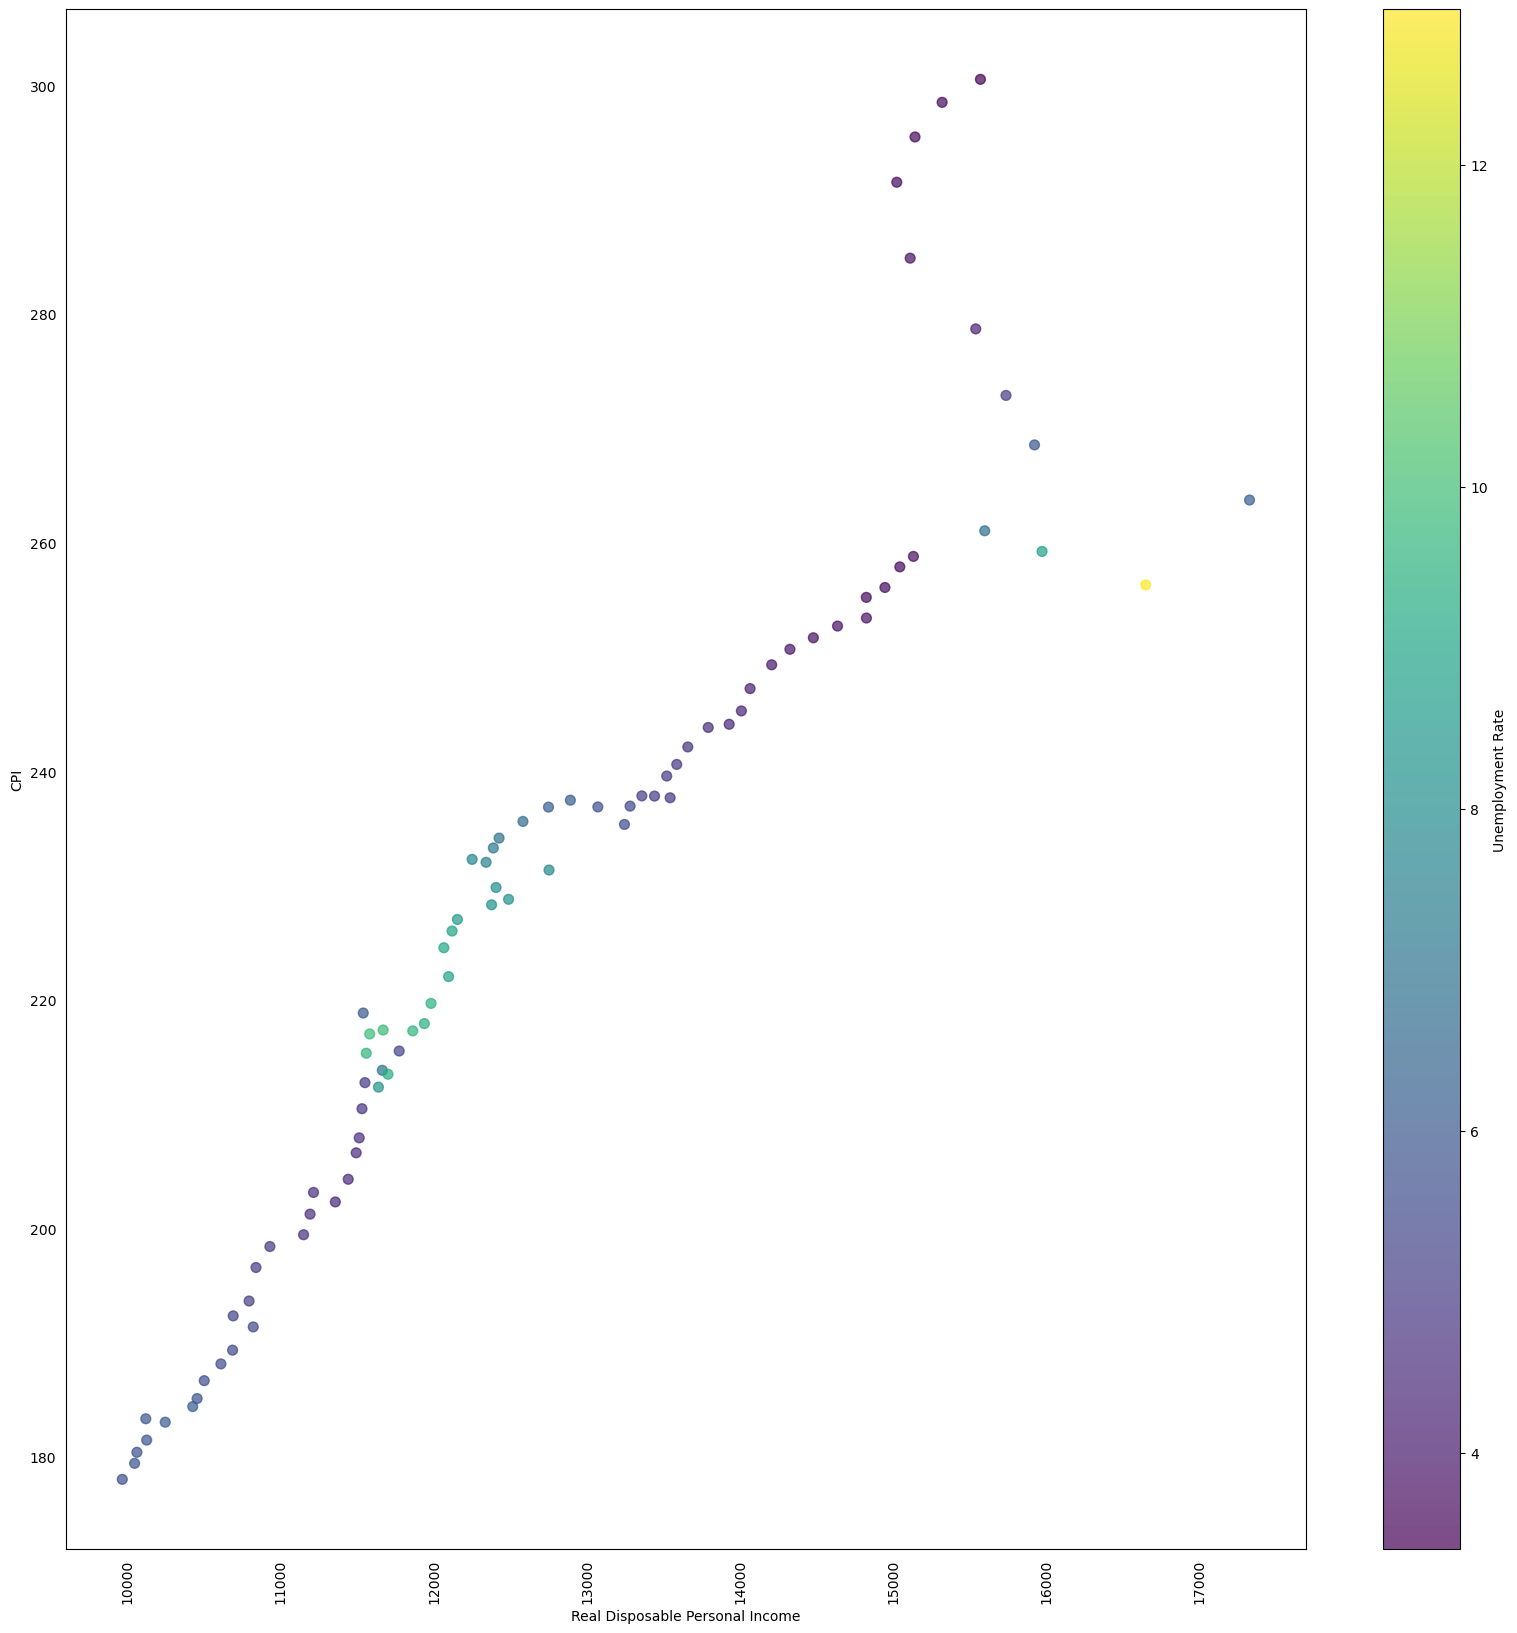

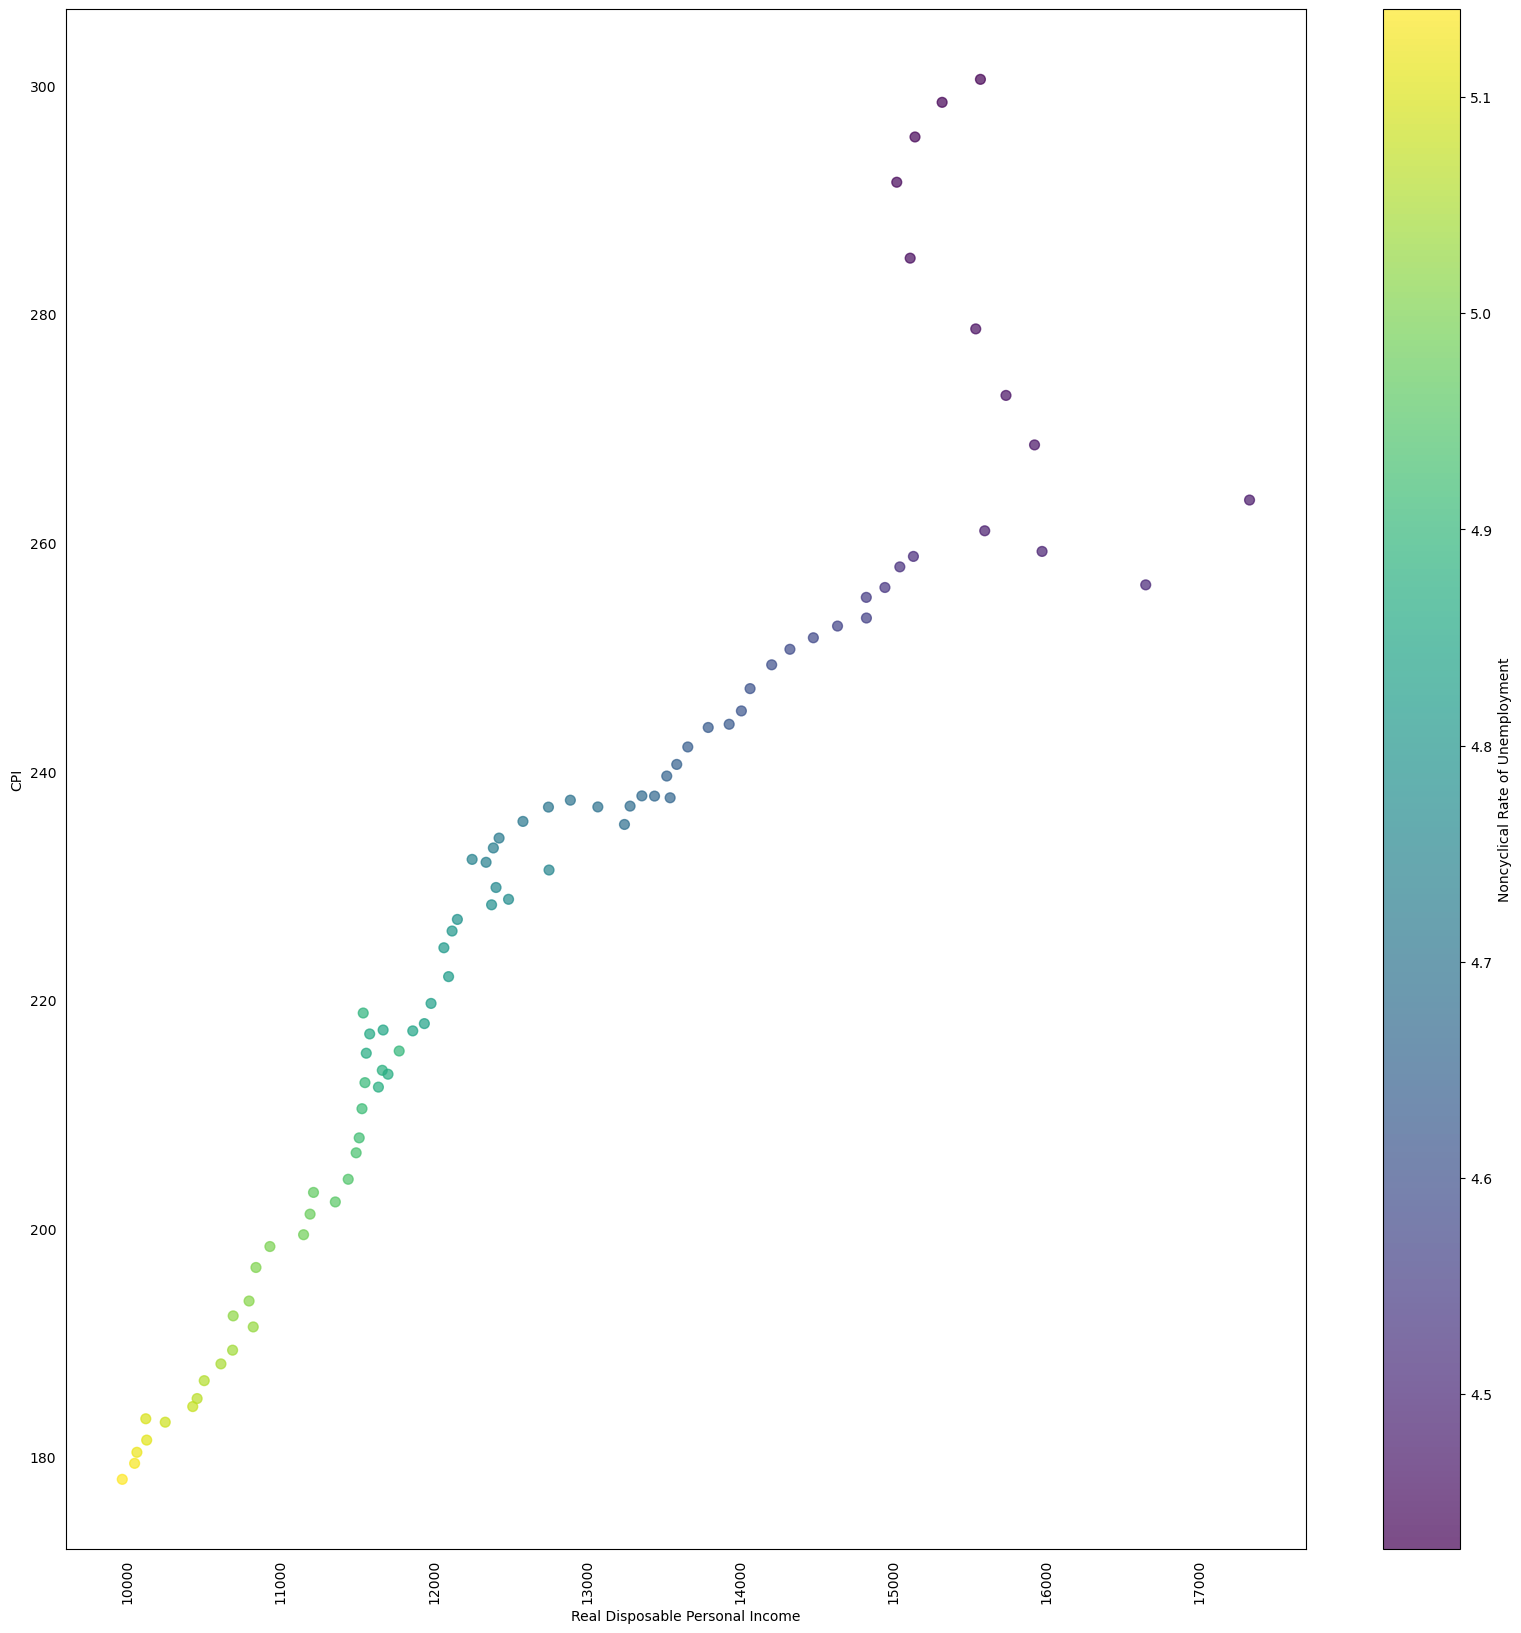

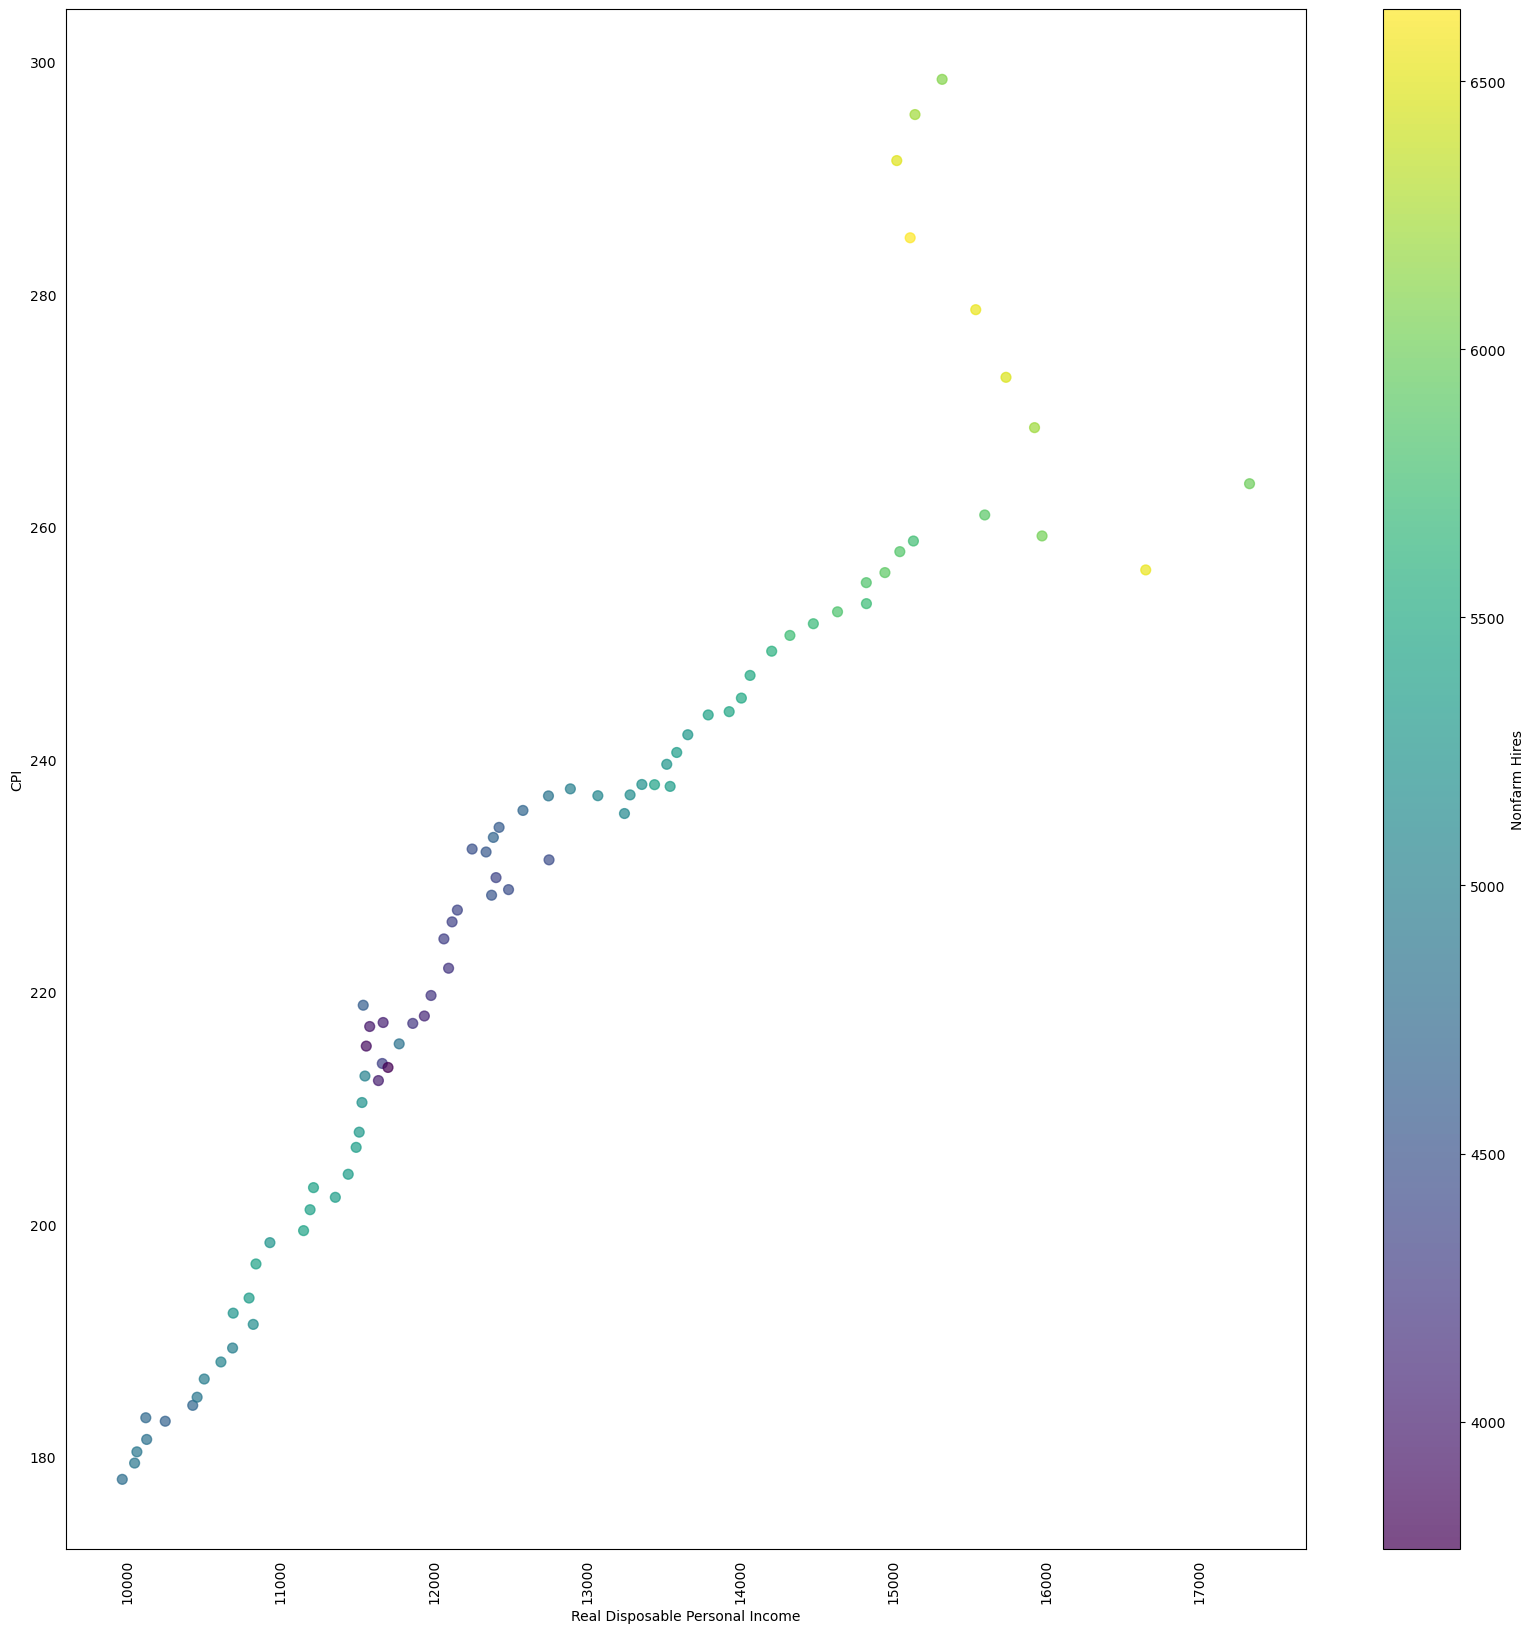

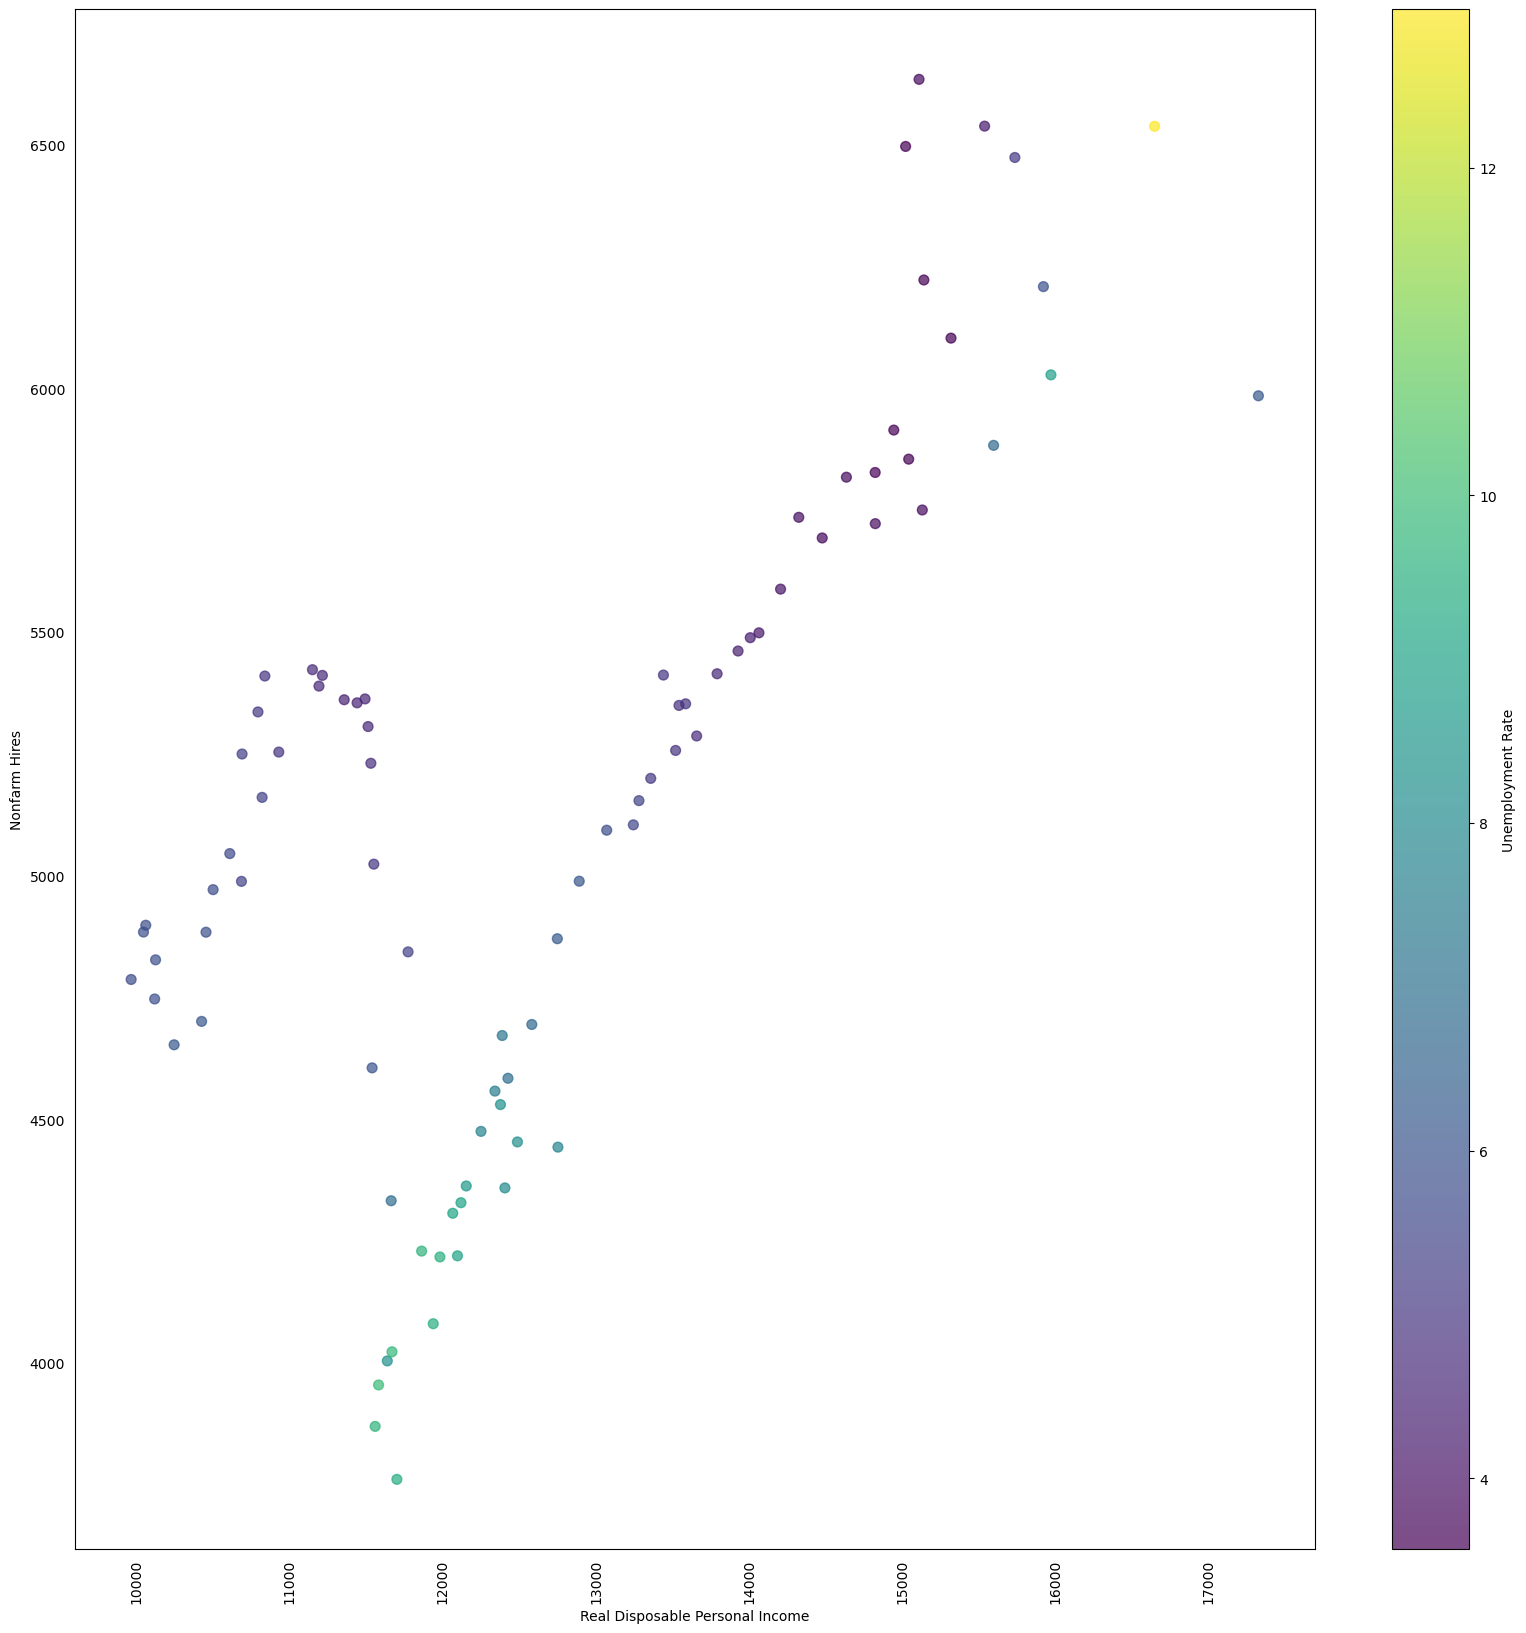

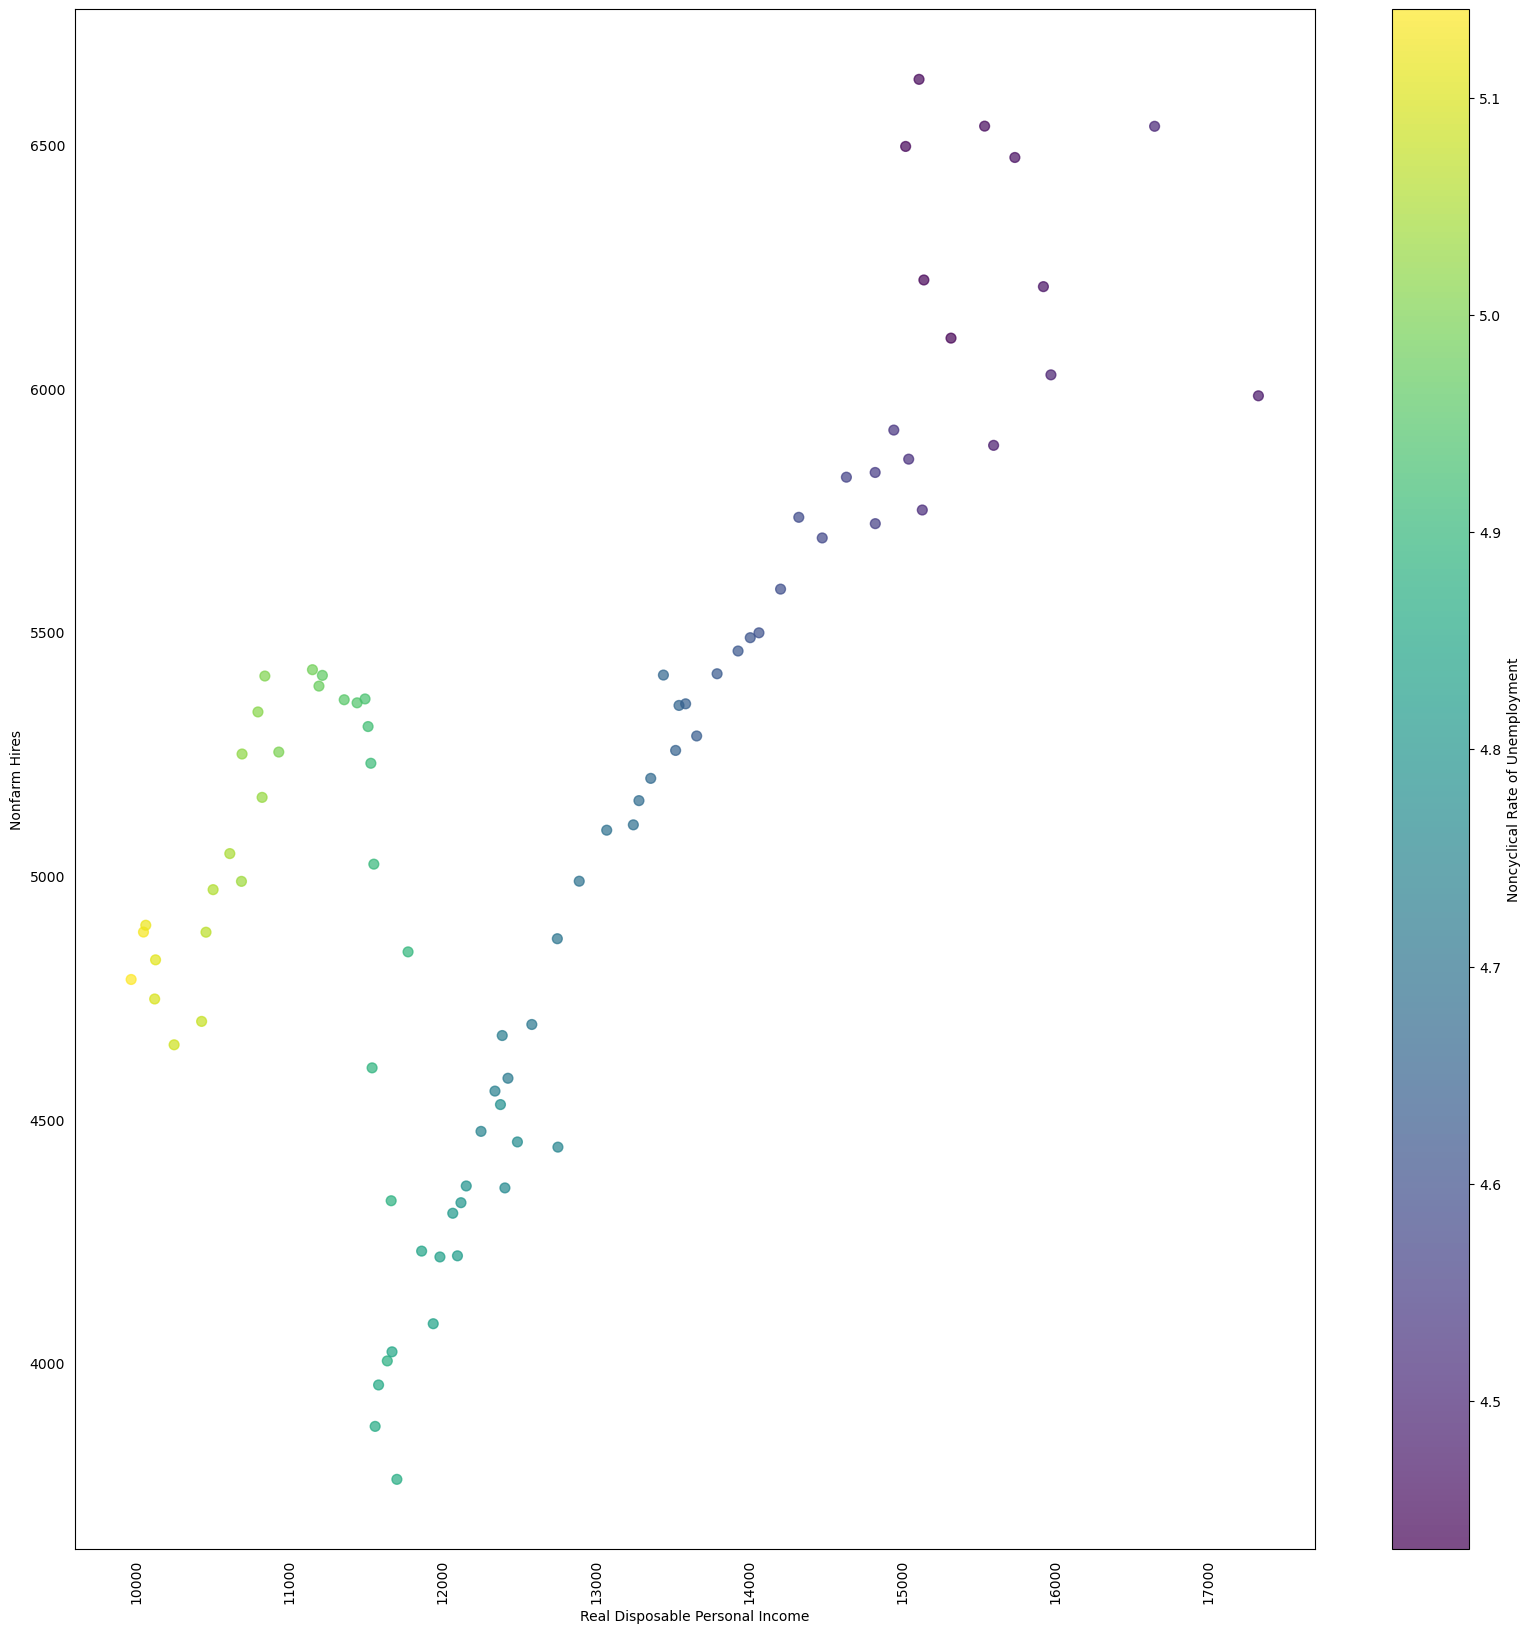

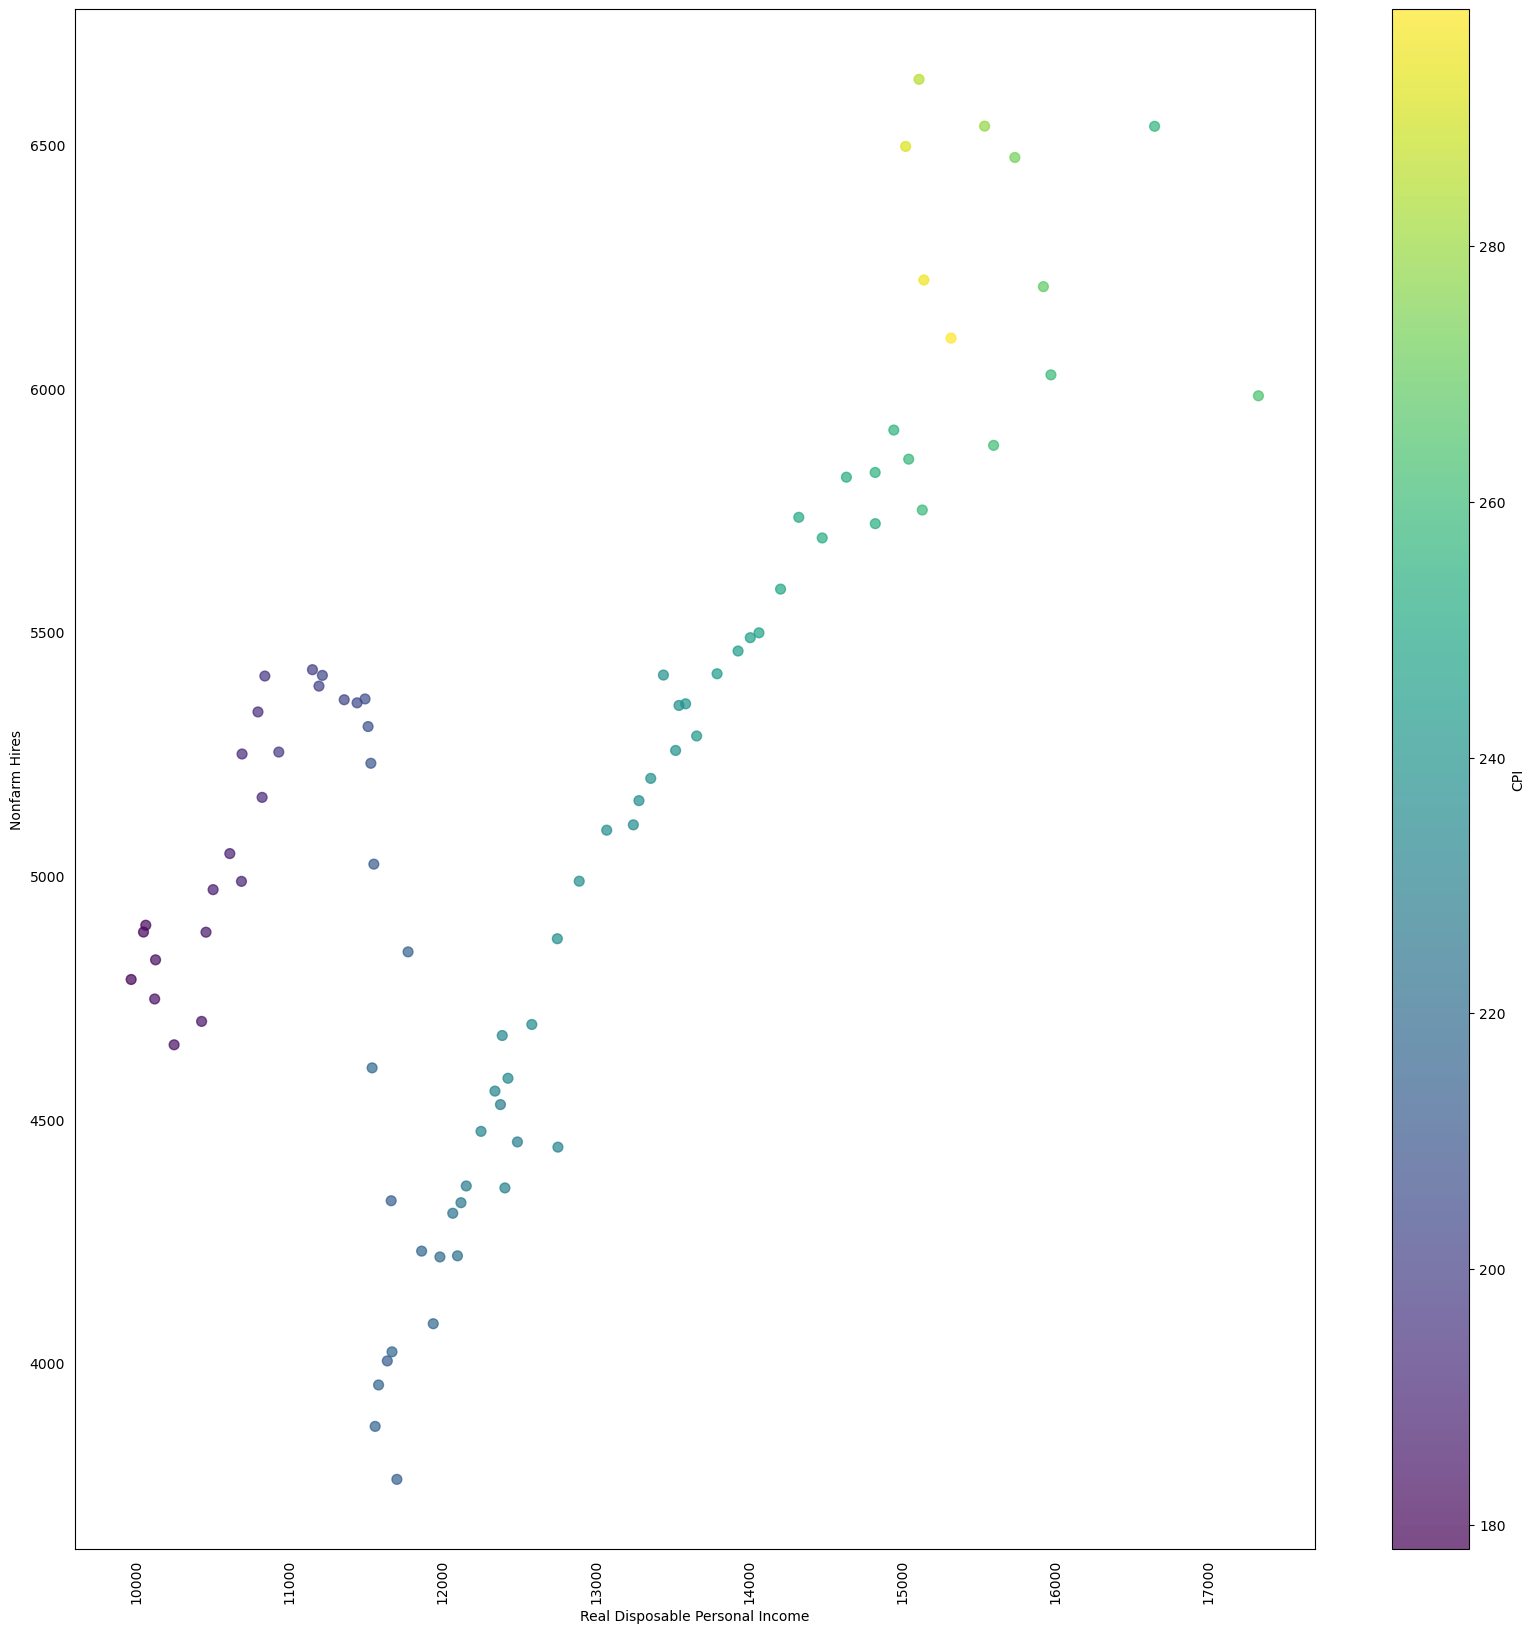

In [3]:
color_dim_scatter(data)

# Dataframe Interpretations

Nonfarm Hires & Unemployment Rate have a very close relationship. This is likely because they follow each other directly. The less people that are hired the higher unemployment rate should theoretically go, and we see that relationship very closely in the above scatter

Noncyclical Rate of Unemployment & the Unemployment Rate follow the same trend, except the noncyclical rate of unemployment is smoothed over time to just be decreasing consistently. You can see a spike in 2009 and 2020 where unemployment spiked. My theory is that this is due to spiking interest rates as well as economic unrest over recession. This would be backed up by the 2008 Housing crisis and the 2020.

CPI & Noncyclical Rate of Unemployment seem to be closely correlated, but this is likely just measuring time passing. Inflation has been consistent in the US, and since Noncyclical Rate of Unemployment is effectively a downward trend of unemployment, there appears to be a near-perfect relationship, but this most likely is just showing that over time less people are unemployed, and taking inflation as a casualty as time passes.

Real Disposable Income & Noncyclical Rate of Unemployment show a similar trend to CPI & NRoU, where it nearly has a perfect trend. The higher real disposable income gets, the lower it is. 




C:\Users\Bryce Grabanski\AppData\Local\Temp\ipykernel_11240\743522911.py:68: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


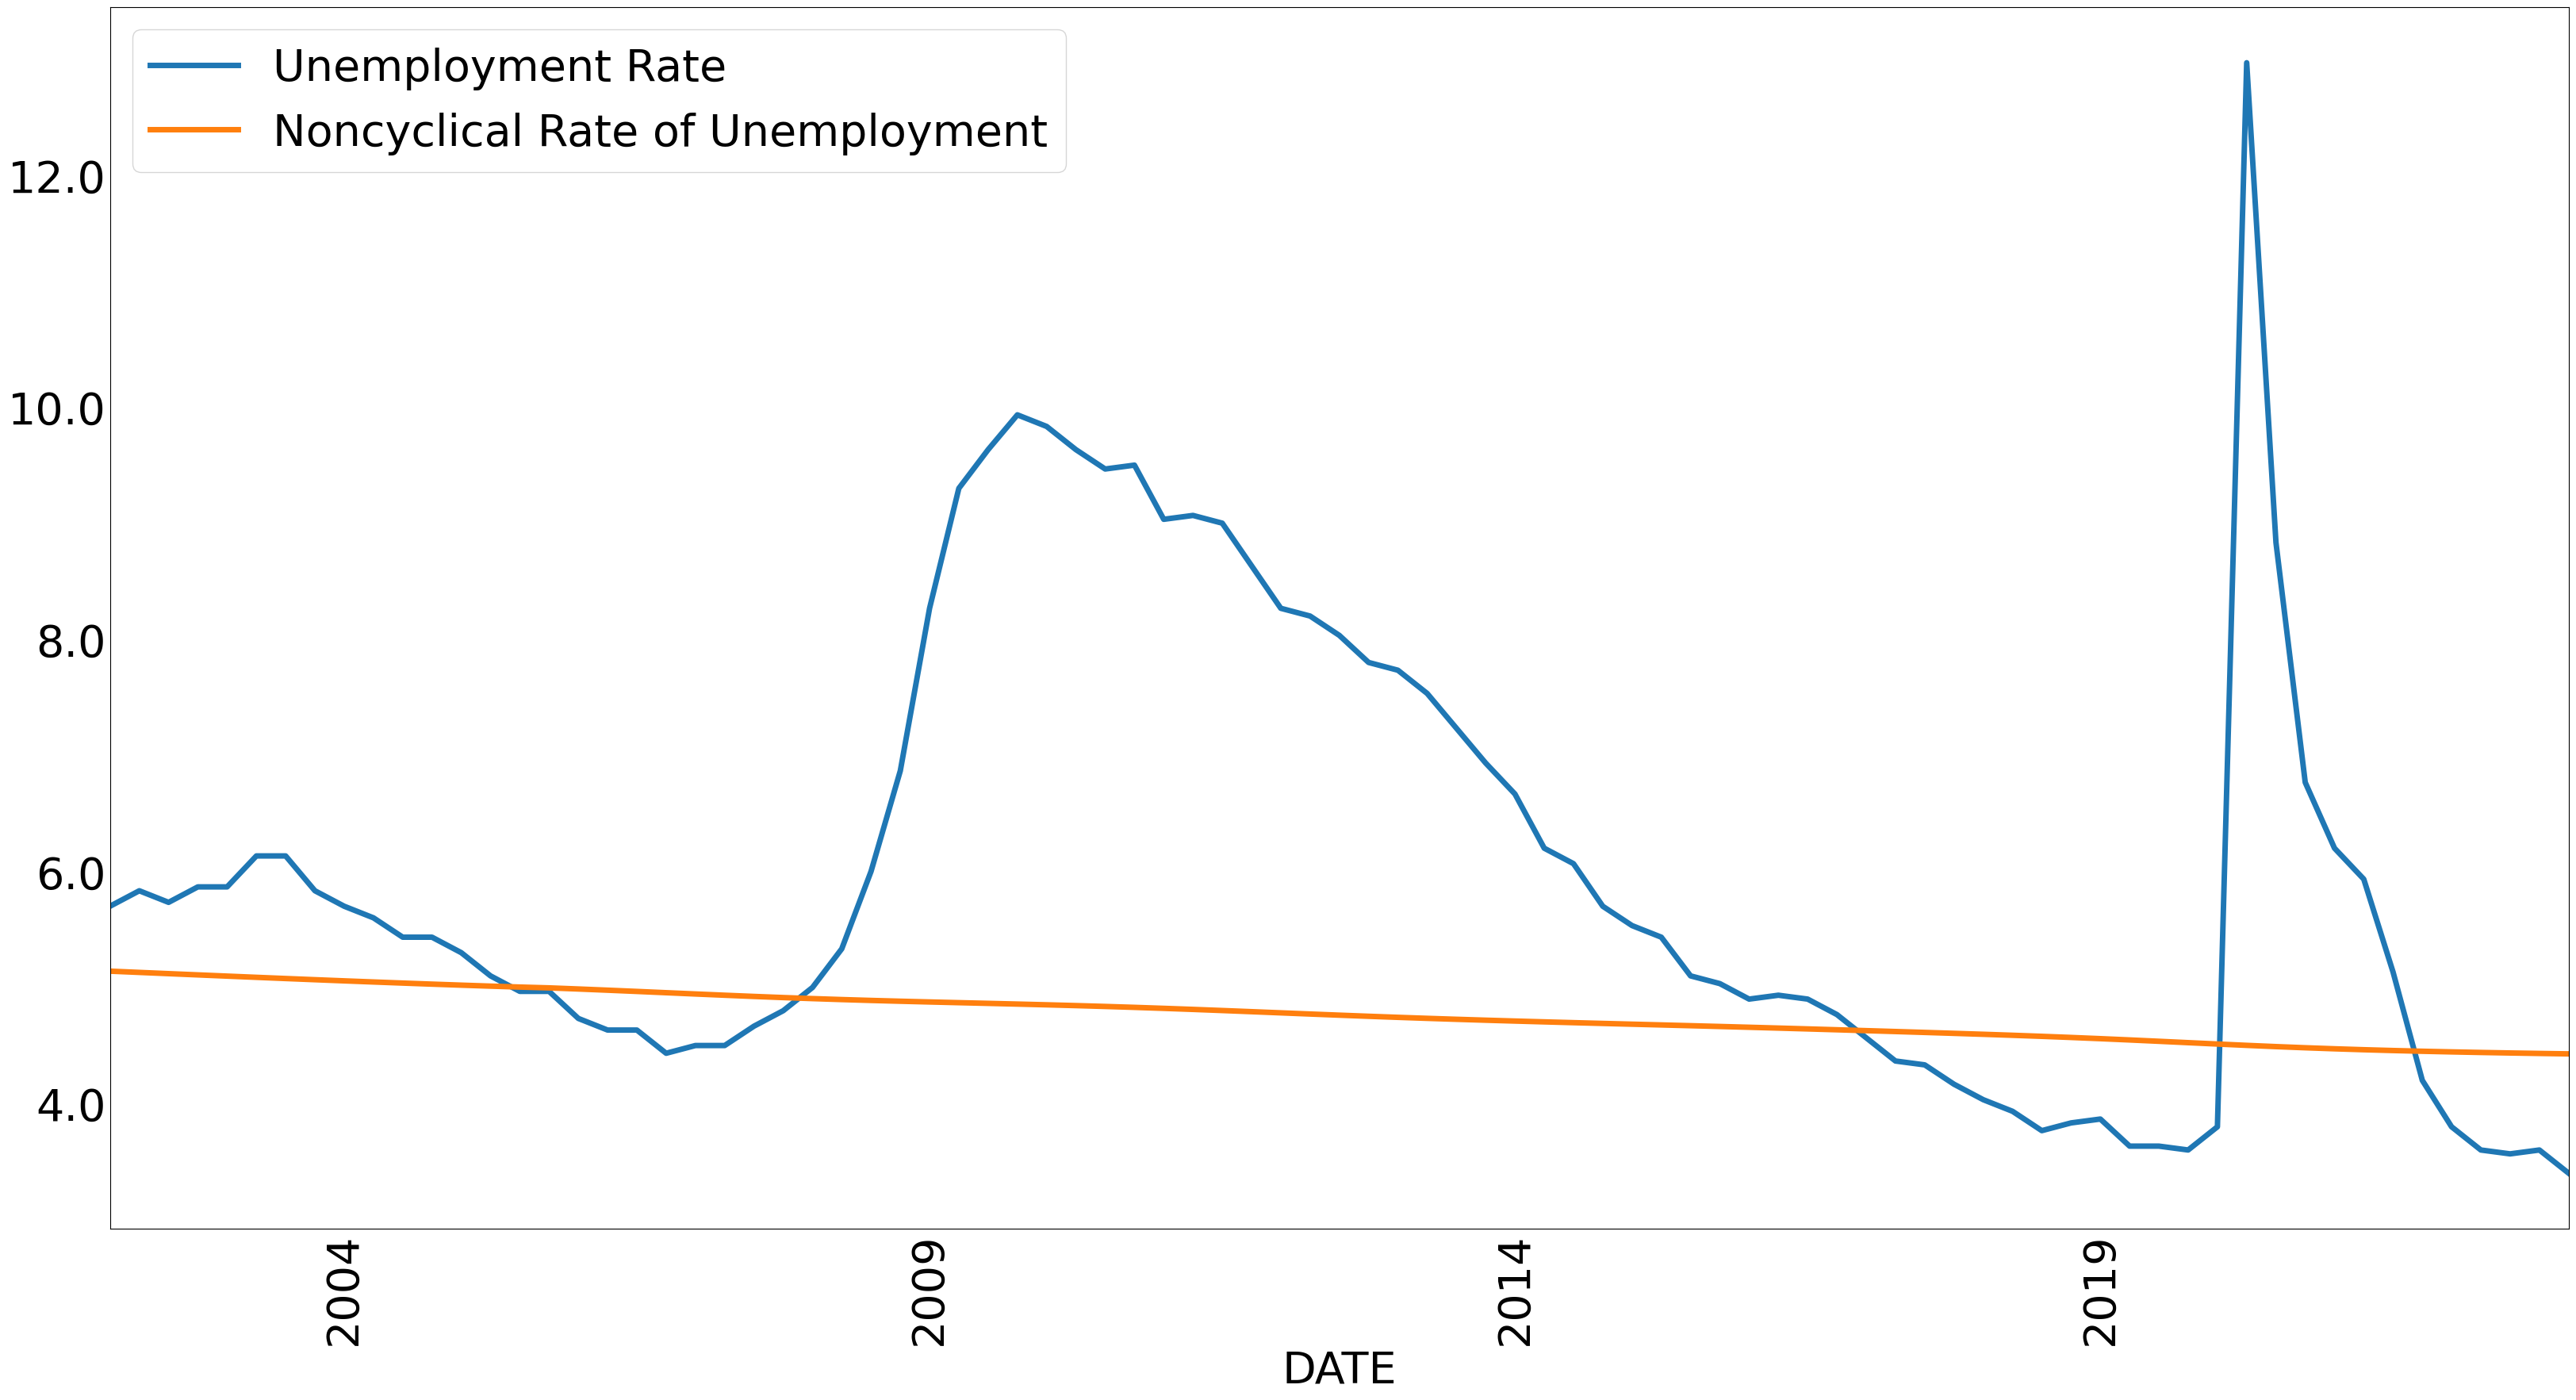

In [20]:
plt.rcParams.update({"font.size" : 40})
low_num_vars = ["Unemployment Rate",
             "Noncyclical Rate of Unemployment"]
plot_data = data[low_num_vars]
plot_lines(df = plot_data, linewidth = 5, figsize = (40, 20), pp = None)

<AxesSubplot:xlabel='Unemployment Rate', ylabel='Noncyclical Rate of Unemployment'>

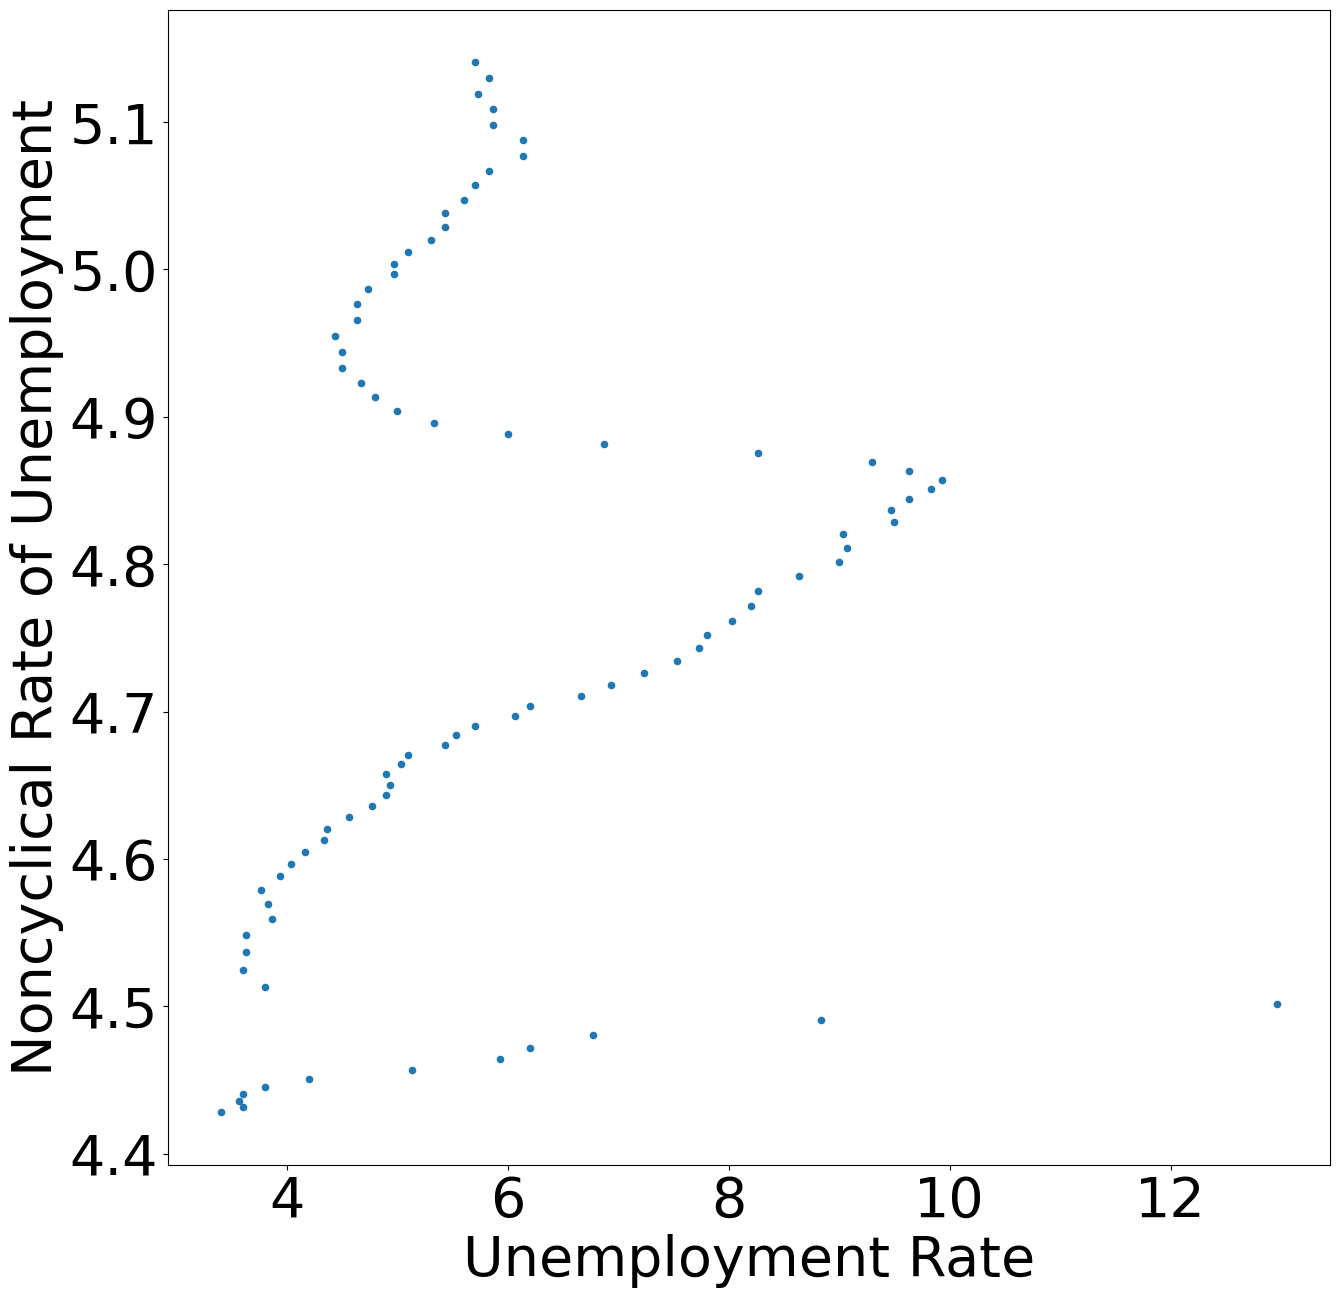

In [27]:
fig, ax = plt.subplots(figsize = (15,15))
plot_data[low_num_vars].plot.scatter(x = low_num_vars[0], y = low_num_vars[1], ax = ax)

<AxesSubplot:xlabel='DATE'>

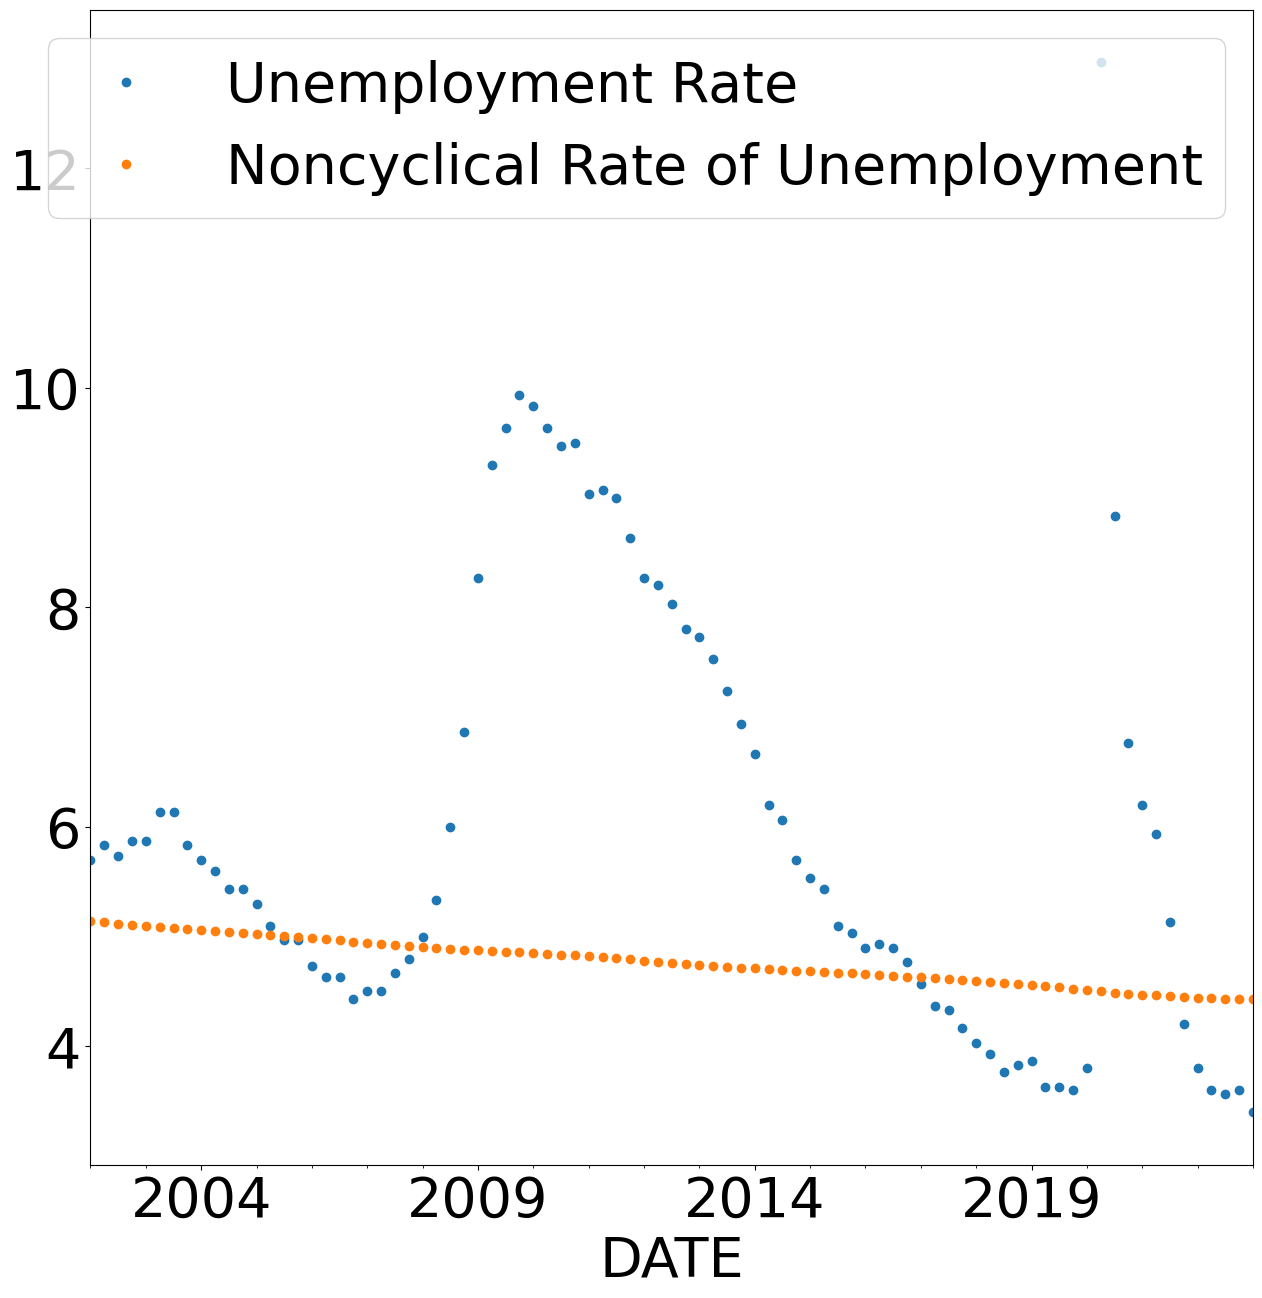

In [30]:
fig, ax = plt.subplots(figsize = (15,15))
plot_data[low_num_vars].plot.line(ls = "", marker = "o", ax = ax)

The only good variables to plot next to each other on a line graph were Unemployment Rate and Noncyclical rate of unemployment, so I decided to do that here. Above are colored scatter plots, which are much more useful since not all of these variables are in the same unit structure, and real income/CPI dwarf the other variables in lineplots

C:\Users\Bryce Grabanski\AppData\Local\Temp\ipykernel_11240\743522911.py:68: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


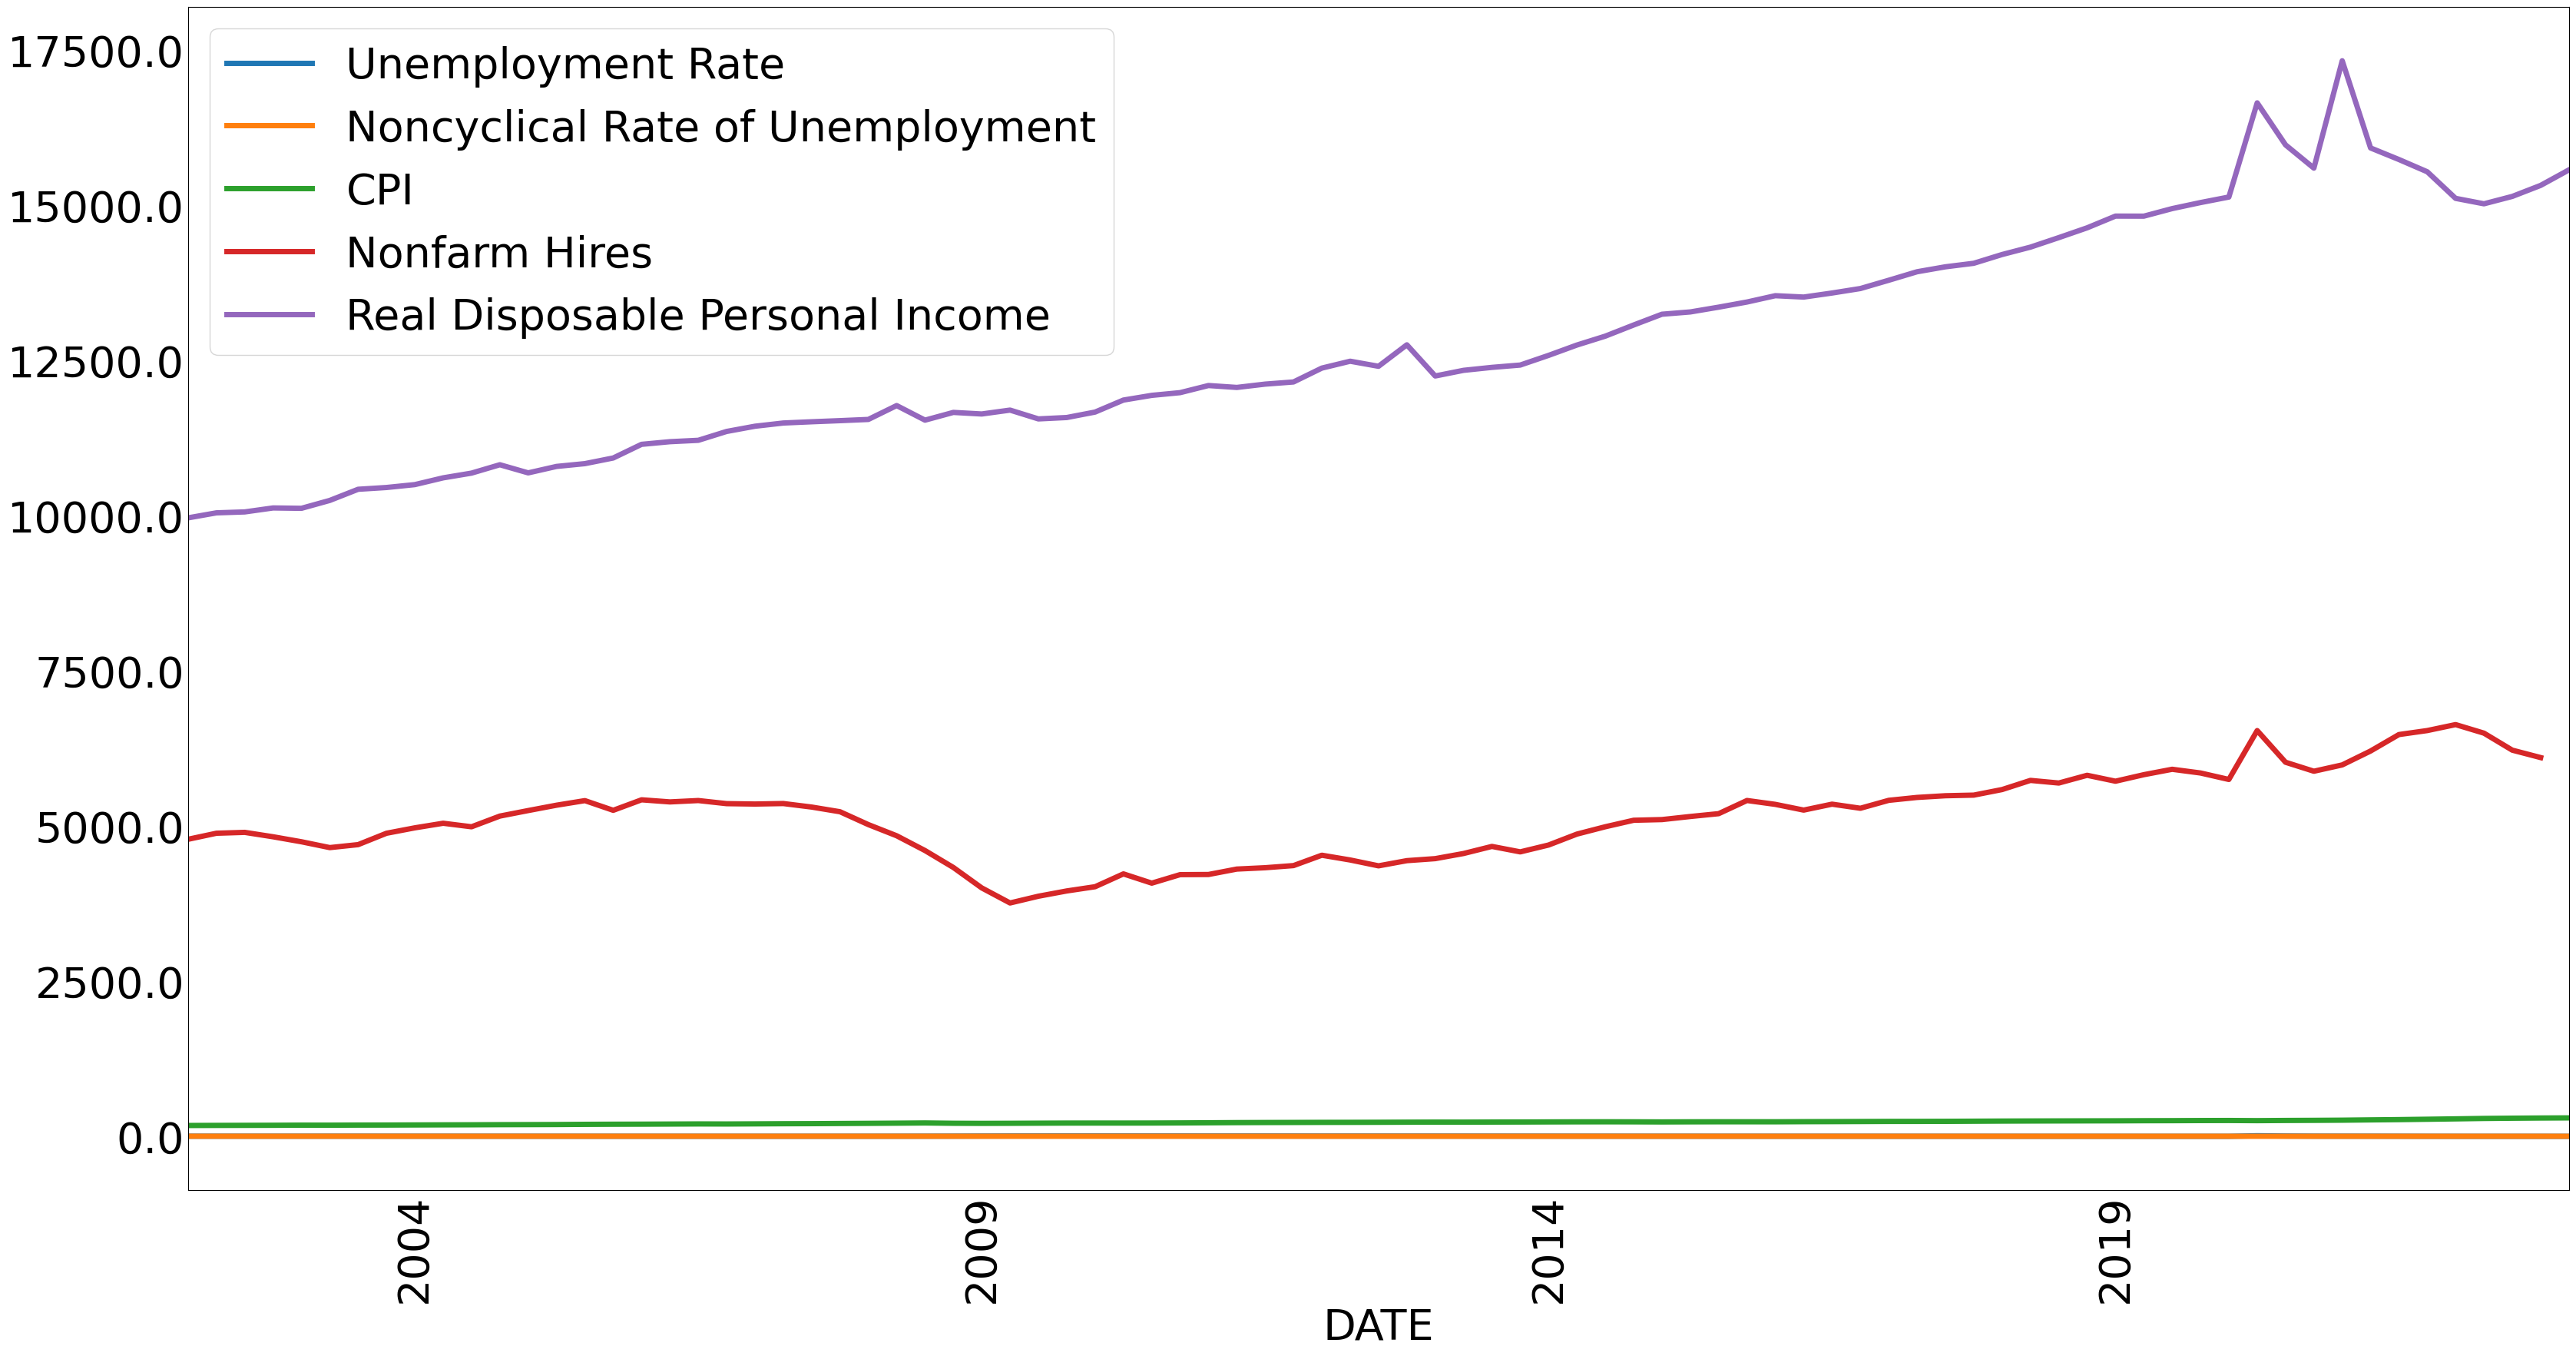

In [5]:
plot_lines(df = data, linewidth = 5, figsize = (40, 20), pp = None)

In [6]:
data_codes = {"USA Nominal GDP":"NGDPPOT",
             "Real GDP":"GDPC1",
             "CPI": "CPIAUCSL",
             "Currency in Circulation": "CURRCIR",
             "Fed Funds Effective Rate": "FEDFUNDS"}
start = datetime.datetime(2002, 1, 1)
end = datetime.datetime.today()

data = gather_data(data_codes = data_codes,
                  start = start,
                  end = datetime.datetime.today(),
                  freq = "Q")

In [7]:
pd.DataFrame(data)

USA Nominal GDP   Real GDP         CPI  Currency in Circulation  \
DATE                                                                          
2002-03-31     10982.448127  13394.910  178.066667               637.003667   
2002-06-30     11092.792828  13477.356  179.466667               648.882333   
2002-09-30     11217.550526  13531.741  180.433333               661.235667   
2002-12-31     11352.579219  13549.421  181.500000               668.718000   
2003-03-31     11480.198915  13619.434  183.366667               680.885333   
...                     ...        ...         ...                      ...   
2022-03-31     24577.000000  19924.088  284.893667              2241.041667   
2022-06-30     24971.120000  19895.271  291.535667              2273.359667   
2022-09-30     25289.620000  20054.663  295.495667              2278.160667   
2022-12-31     25591.420000  20187.495  298.525000              2290.853000   
2023-03-31     25874.050000        NaN  300.536000              2298.679000   

            Fed Funds Effective Rate  
DATE                                  
2002-03-31                  1.733333  
2002-06-30                  1.750000  
2002-09-30                  1.740000  
2002-12-31                  1.443333  
2003-03-31                  1.250000  
...                              ...  
2022-03-31                  0.120000  
2022-06-30                  0.770000  
2022-09-30                  2.190000  
2022-12-31                  3.653333  
2023-03-31                  4.450000  

[85 rows x 5 columns]

In [8]:
data_pct = data.pct_change()
data_pct

USA Nominal GDP  Real GDP       CPI  Currency in Circulation  \
DATE                                                                       
2002-03-31              NaN       NaN       NaN                      NaN   
2002-06-30         0.010047  0.006155  0.007862                 0.018648   
2002-09-30         0.011247  0.004035  0.005386                 0.019038   
2002-12-31         0.012037  0.001307  0.005912                 0.011316   
2003-03-31         0.011241  0.005167  0.010285                 0.018195   
...                     ...       ...       ...                      ...   
2022-03-31         0.018349 -0.004103  0.022199                 0.012863   
2022-06-30         0.016036 -0.001446  0.023314                 0.014421   
2022-09-30         0.012755  0.008012  0.013583                 0.002112   
2022-12-31         0.011934  0.006623  0.010252                 0.005571   
2023-03-31         0.011044  0.000000  0.006736                 0.003416   

            Fed Funds Effective Rate  
DATE                                  
2002-03-31                       NaN  
2002-06-30                  0.009615  
2002-09-30                 -0.005714  
2002-12-31                 -0.170498  
2003-03-31                 -0.133949  
...                              ...  
2022-03-31                  0.500000  
2022-06-30                  5.416667  
2022-09-30                  1.844156  
2022-12-31                  0.668189  
2023-03-31                  0.218066  

[85 rows x 5 columns]

In [9]:
data_for_stats = data.dropna(how = "any", axis = 0)
data_for_stats

USA Nominal GDP   Real GDP         CPI  Currency in Circulation  \
DATE                                                                          
2002-03-31     10982.448127  13394.910  178.066667               637.003667   
2002-06-30     11092.792828  13477.356  179.466667               648.882333   
2002-09-30     11217.550526  13531.741  180.433333               661.235667   
2002-12-31     11352.579219  13549.421  181.500000               668.718000   
2003-03-31     11480.198915  13619.434  183.366667               680.885333   
...                     ...        ...         ...                      ...   
2021-12-31     24134.160000  20006.181  278.706667              2212.581333   
2022-03-31     24577.000000  19924.088  284.893667              2241.041667   
2022-06-30     24971.120000  19895.271  291.535667              2273.359667   
2022-09-30     25289.620000  20054.663  295.495667              2278.160667   
2022-12-31     25591.420000  20187.495  298.525000              2290.853000   

            Fed Funds Effective Rate  
DATE                                  
2002-03-31                  1.733333  
2002-06-30                  1.750000  
2002-09-30                  1.740000  
2002-12-31                  1.443333  
2003-03-31                  1.250000  
...                              ...  
2021-12-31                  0.080000  
2022-03-31                  0.120000  
2022-06-30                  0.770000  
2022-09-30                  2.190000  
2022-12-31                  3.653333  

[84 rows x 5 columns]

In [10]:
stats_DF = gather_statistics(data_for_stats, sample = False)
stats_DF

USA Nominal GDP     Real GDP      CPI  Currency in Circulation  \
mean         1.718047e+04    16603.831  227.635                 1234.086   
median       1.680082e+04    16267.939  229.325                 1111.367   
variance     1.478862e+07  3381896.165  829.576               237244.850   
S.D.         3.845598e+03     1838.993   28.802                  487.078   
skewness     2.950000e-01        0.227    0.244                    0.698   
kurtosis     2.199000e+00        2.070    2.586                    2.335   

          Fed Funds Effective Rate  
mean                         1.319  
median                       0.735  
variance                     2.354  
S.D.                         1.534  
skewness                     1.313  
kurtosis                     3.705

In [11]:
cov_DF = data_for_stats.cov().round(2).sort_index(axis = 1).sort_index(axis = 0)
cov_DF

CPI  Currency in Circulation  \
CPI                          839.57                 13667.31   
Currency in Circulation    13667.31                240103.22   
Fed Funds Effective Rate     -13.64                  -222.33   
Real GDP                   52229.46                875937.07   
USA Nominal GDP           111354.15               1862578.77   

                          Fed Funds Effective Rate    Real GDP  \
CPI                                         -13.64    52229.46   
Currency in Circulation                    -222.33   875937.07   
Fed Funds Effective Rate                      2.38     -588.97   
Real GDP                                   -588.97  3422641.90   
USA Nominal GDP                           -1792.72  7055027.54   

                          USA Nominal GDP  
CPI                             111354.15  
Currency in Circulation        1862578.77  
Fed Funds Effective Rate         -1792.72  
Real GDP                       7055027.54  
USA Nominal GDP               14966800.20

In [12]:
corr_DF = data_for_stats.corr().round(2).sort_index(axis = 1).sort_index(axis = 0)
corr_DF

CPI  Currency in Circulation  \
CPI                       1.00                     0.96   
Currency in Circulation   0.96                     1.00   
Fed Funds Effective Rate -0.30                    -0.29   
Real GDP                  0.97                     0.97   
USA Nominal GDP           0.99                     0.98   

                          Fed Funds Effective Rate  Real GDP  USA Nominal GDP  
CPI                                          -0.30      0.97             0.99  
Currency in Circulation                      -0.29      0.97             0.98  
Fed Funds Effective Rate                      1.00     -0.21            -0.30  
Real GDP                                     -0.21      1.00             0.99  
USA Nominal GDP                              -0.30      0.99             1.00

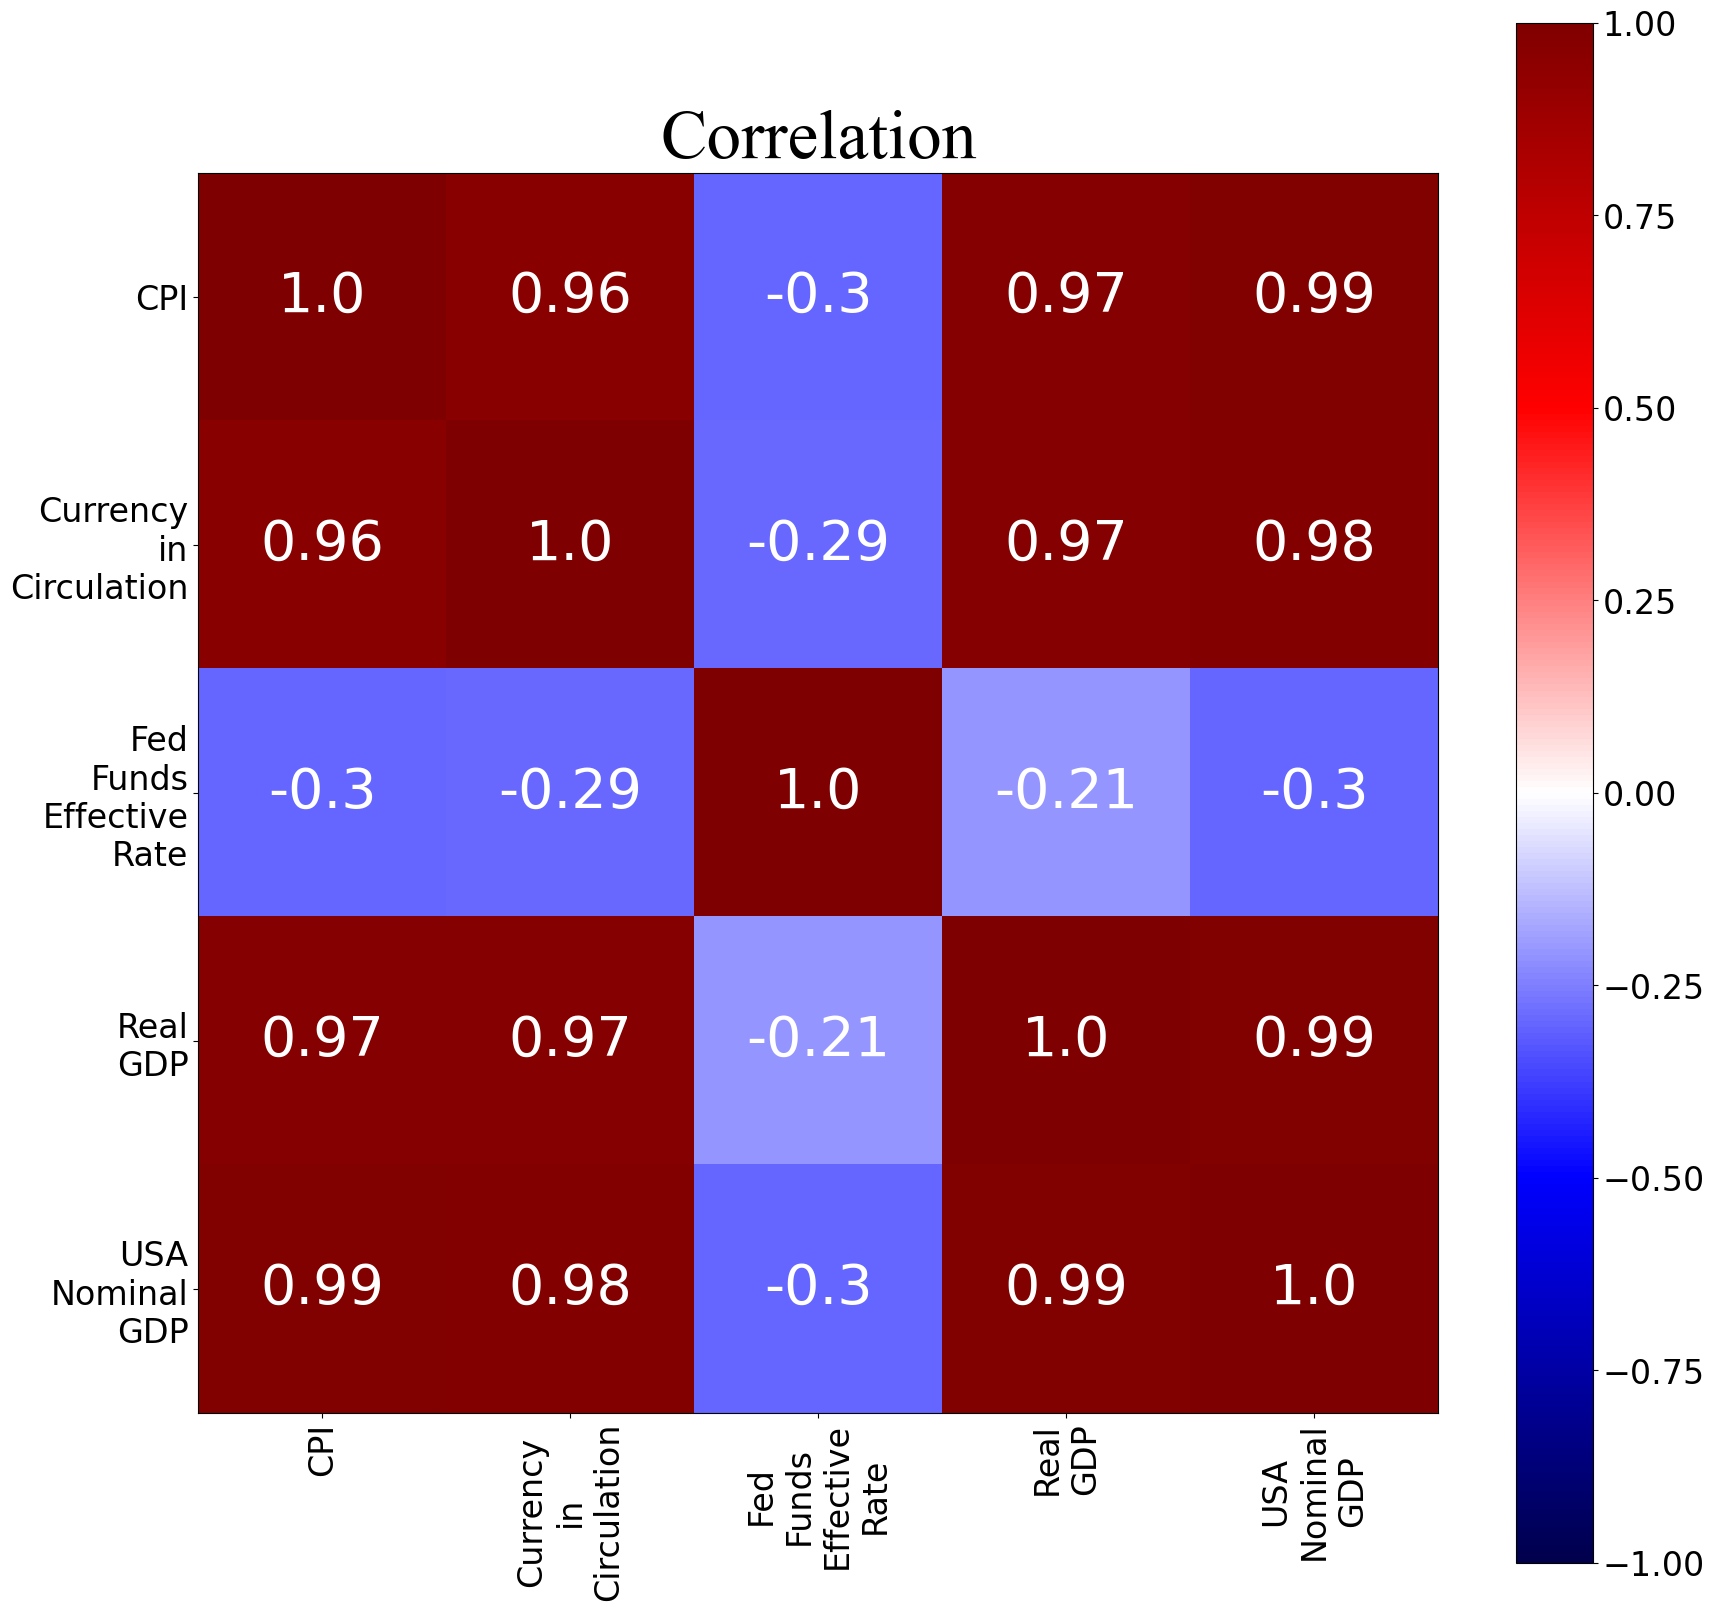

In [13]:
#econFreedomVisualizations.py
import numpy as np
# . . .
def corr_matrix_heatmap(data):  
    #Create a figure to visualize a corr matrix  
    fig, ax = plt.subplots(figsize=(20,20))  
    # use ax.imshow() to create a heatmap of correlation values  
    # seismic mapping shows negative values as blue and positive values as red  
    im = ax.imshow(data, norm = plt.cm.colors.Normalize(-1,1), cmap = "seismic")  
    # create a list of labels, stacking each word in a label by replacing " "  
    # with "\n"  
    labels = data.keys()  
    num_vars = len(labels)  
    tick_labels = [lab.replace(" ", "\n") for lab in labels]  
    # adjust font size according to the number of variables visualized  
    tick_font_size = 120 / num_vars  
    val_font_size = 200 / num_vars  
    plt.rcParams.update({'font.size': tick_font_size}) 
    # prepare space for label of each column  
    x_ticks = np.arange(num_vars)  
    # select labels and rotate them 90 degrees so that they are vertical  
    plt.xticks(x_ticks, tick_labels, fontsize = tick_font_size, rotation = 90)  
    # prepare space for label of each row  
    y_ticks = np.arange(len(labels))  
    # select labels  
    plt.yticks(y_ticks, tick_labels, fontsize = tick_font_size)  
    # show values in each tile of the heatmap  
    for i in range(len(labels)):  
        for j in range(len(labels)):  
            text = ax.text(i, j, str(round(data.values[i][j],2)),  
                           fontsize= val_font_size, ha="center",   
                           va="center", color = "w")  
    #Create title with Times New Roman Font  
    title_font = {"fontname":"Times New Roman"}  
    plt.title("Correlation", fontsize = 50, **title_font)  
    #Call scale to show value of colors 
    cbar = fig.colorbar(im)
    

#. . . 
# . . .

corr_matrix_heatmap(corr_DF)

In [14]:
data_for_stats = data_pct.dropna(how = "any", axis = 0)
data_for_stats

USA Nominal GDP  Real GDP       CPI  Currency in Circulation  \
DATE                                                                       
2002-06-30         0.010047  0.006155  0.007862                 0.018648   
2002-09-30         0.011247  0.004035  0.005386                 0.019038   
2002-12-31         0.012037  0.001307  0.005912                 0.011316   
2003-03-31         0.011241  0.005167  0.010285                 0.018195   
2003-06-30         0.009702  0.008934 -0.001636                 0.013156   
...                     ...       ...       ...                      ...   
2022-03-31         0.018349 -0.004103  0.022199                 0.012863   
2022-06-30         0.016036 -0.001446  0.023314                 0.014421   
2022-09-30         0.012755  0.008012  0.013583                 0.002112   
2022-12-31         0.011934  0.006623  0.010252                 0.005571   
2023-03-31         0.011044  0.000000  0.006736                 0.003416   

            Fed Funds Effective Rate  
DATE                                  
2002-06-30                  0.009615  
2002-09-30                 -0.005714  
2002-12-31                 -0.170498  
2003-03-31                 -0.133949  
2003-06-30                 -0.002667  
...                              ...  
2022-03-31                  0.500000  
2022-06-30                  5.416667  
2022-09-30                  1.844156  
2022-12-31                  0.668189  
2023-03-31                  0.218066  

[84 rows x 5 columns]

In [15]:
stats_DF = gather_statistics(data_for_stats, sample = False)
stats_DF


USA Nominal GDP  Real GDP    CPI  Currency in Circulation  \
mean                0.010     0.005  0.006                    0.015   
median              0.010     0.006  0.006                    0.015   
variance            0.000     0.000  0.000                    0.000   
S.D.                0.004     0.014  0.007                    0.010   
skewness            0.306    -1.511 -0.793                    1.931   
kurtosis            4.004    29.200  7.270                   10.201   

          Fed Funds Effective Rate  
mean                         0.126  
median                       0.008  
variance                     0.462  
S.D.                         0.680  
skewness                     5.763  
kurtosis                    44.470

In [16]:
cov_DF = data_for_stats.cov().round(2).sort_index(axis = 1).sort_index(axis = 0)
cov_DF

CPI  Currency in Circulation  \
CPI                       0.0                     -0.0   
Currency in Circulation  -0.0                      0.0   
Fed Funds Effective Rate  0.0                     -0.0   
Real GDP                  0.0                     -0.0   
USA Nominal GDP           0.0                     -0.0   

                          Fed Funds Effective Rate  Real GDP  USA Nominal GDP  
CPI                                           0.00       0.0              0.0  
Currency in Circulation                      -0.00      -0.0             -0.0  
Fed Funds Effective Rate                      0.47       0.0              0.0  
Real GDP                                      0.00       0.0              0.0  
USA Nominal GDP                               0.00       0.0              0.0

In [17]:
corr_DF = data_for_stats.corr().round(2).sort_index(axis = 1).sort_index(axis = 0)
corr_DF

CPI  Currency in Circulation  \
CPI                       1.00                    -0.39   
Currency in Circulation  -0.39                     1.00   
Fed Funds Effective Rate  0.38                    -0.16   
Real GDP                  0.35                    -0.28   
USA Nominal GDP           0.71                    -0.26   

                          Fed Funds Effective Rate  Real GDP  USA Nominal GDP  
CPI                                           0.38      0.35             0.71  
Currency in Circulation                      -0.16     -0.28            -0.26  
Fed Funds Effective Rate                      1.00      0.17             0.26  
Real GDP                                      0.17      1.00             0.38  
USA Nominal GDP                               0.26      0.38             1.00

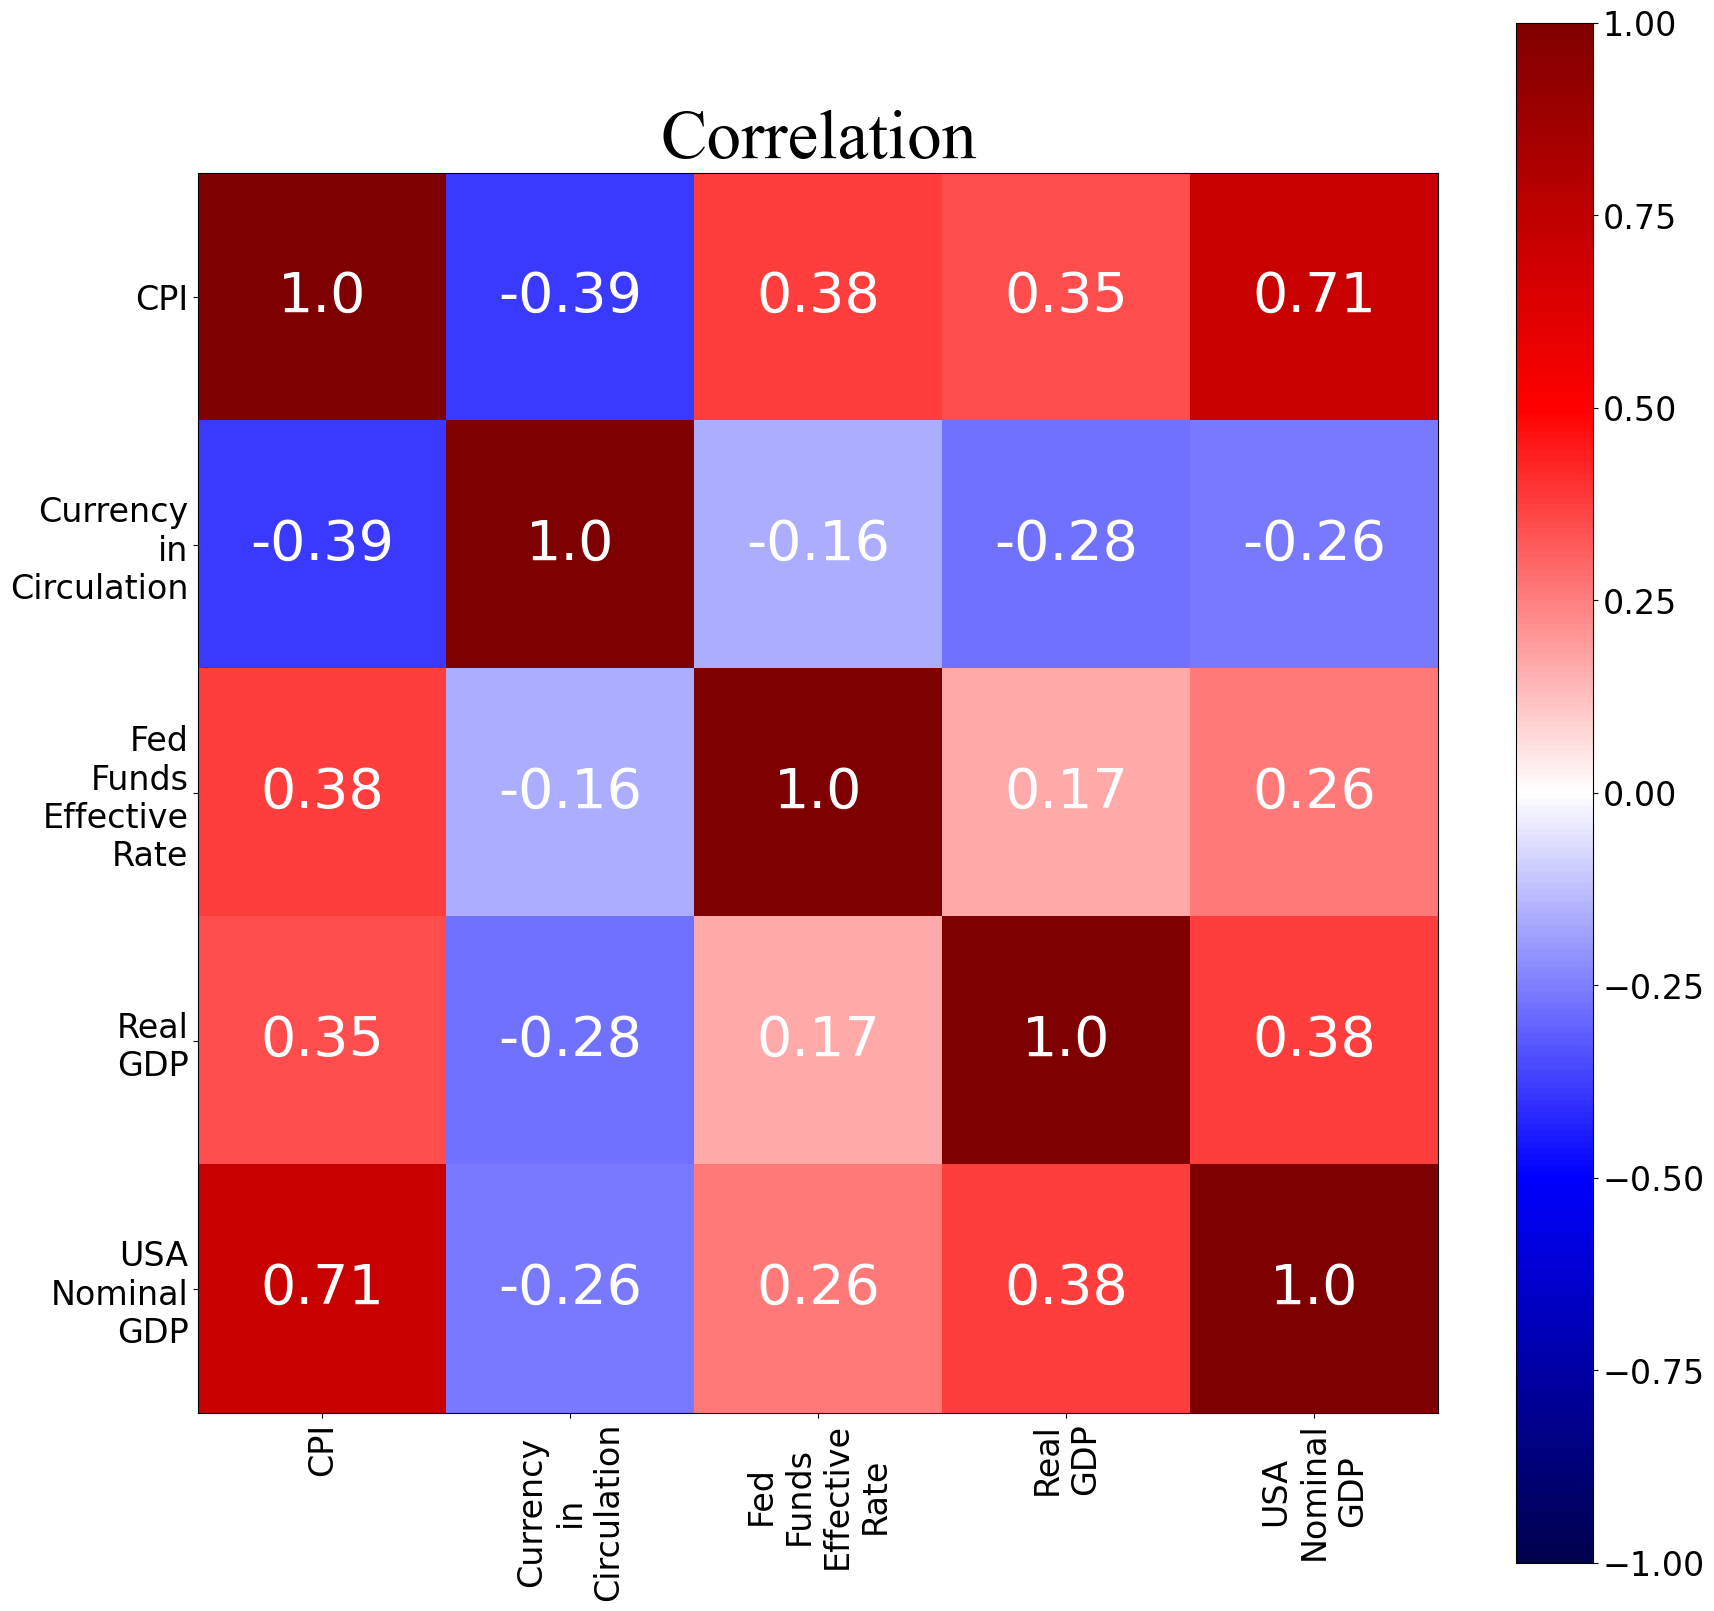

In [18]:
corr_matrix_heatmap(corr_DF)

# Corr Table Interpretations
It seems like all of these variables are extremely correlated when you look at their raw numbers, but when you change to % YOY numbers, it changes drastically. The correlation was almost 1 in the situation with all of the variables aside from the effective fed funds rate, which had a negative correlation with all of the other variables. However, when you change to % YOY it changes. My theory is that when we look at the changes in these numbers, there is a time lag between when it catches up to the other variables. For example, currency in circulation increases CPI, but the measures of CPI are calculated at a delay, and additionally it takes the currency in circulation before inflation can effectively take place. Otherwise inflation would be purely speculative in nature, but from experience we can assume it occurs after the currency is changed or effective funds rate is lowered. That's my theory, of course that's coming from a college student who took econ 202 